# Constant-Q transform spectral envelope coefficients (CQT-SEC)

## 01. Assumption and observations

### 01.1. Assumption

A log-spectrum, such as the CQT-spectrum, can be represented as the convolution of a pitch-invariant log-spectal envelope component (~ timbre) and a envelope-normalized pitch component.

`X = E * P`

### 01.2. Observation 1

A pitch change in the audio translates to a linear shift in the log-spectrum. 

This means that the same musical object at different pitches should have a similar envelope component but a shifted pitch component; while two different musical objects at the same pitch should have different envelope components but a similar pitch component.

- `X = E * P`

- `X2 = E2 * P2`

`=> E ~ E2`

#### Example 1: Two sinusoids at different pitches and their CQT-spectrogram

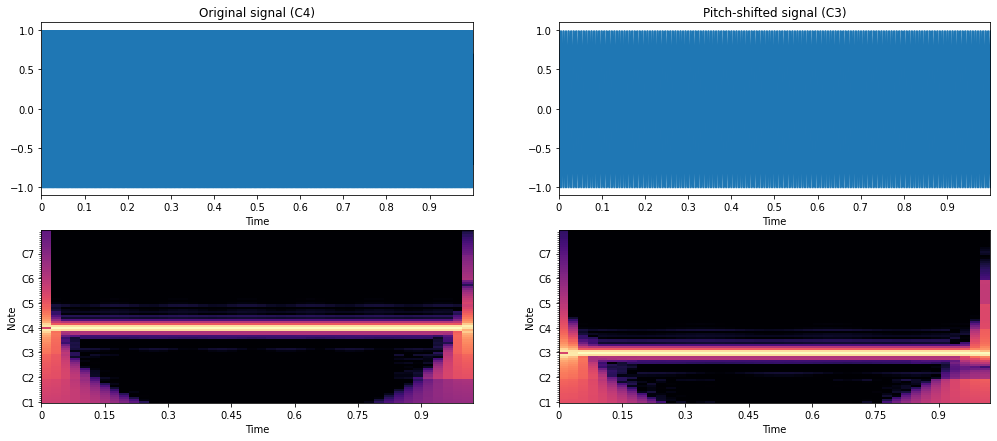

In [10]:
%matplotlib inline

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define two sinusoids, with one twice lower in frequency than the other one
sampling_frequency = 44100                                     # In Hz
time_duration = 1                                              # In seconds
time_array = np.arange(0, time_duration, 1/sampling_frequency) # In seconds
frequency_value1 = 261.63                                      # In Hz (= C4)
frequency_value2 = frequency_value1/2                          # In Hz (= C3)
audio_signal1 = np.sin(time_array*2*np.pi*frequency_value1)
audio_signal2 = np.sin(time_array*2*np.pi*frequency_value2)

# Comptute the CQT spectrogram for the signals
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
audio_spectrogram1 = np.abs(librosa.cqt(audio_signal1, sr=sampling_frequency, hop_length=step_length))
audio_spectrogram2 = np.abs(librosa.cqt(audio_signal2, sr=sampling_frequency, hop_length=step_length))

# Display their waveform in seconds and their power CQT spectrogram in seconds and notes
plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
librosa.display.waveplot(audio_signal1, sr=sampling_frequency)
plt.title('Original signal (C4)')
plt.subplot(2, 2, 2)
librosa.display.waveplot(audio_signal2, sr=sampling_frequency)
plt.title('Pitch-shifted signal (C3)')
plt.subplot(2, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram1, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.subplot(2, 2, 4)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.show()

#### Example 2: Two notes at different pitches and their CQT-spectrogram

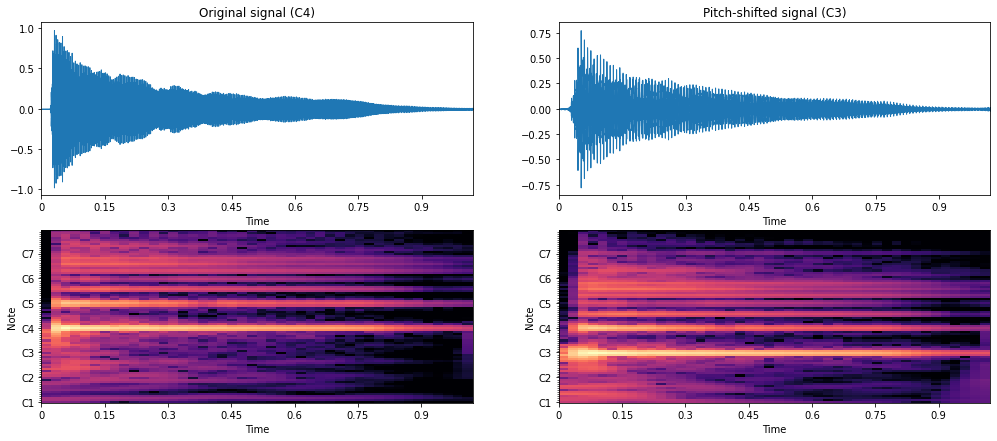

In [9]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file with its sampling frequency, and keep only one note in its left channel (= C4)
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=False)
audio_signal1 = audio_signal[0, 24000:69000]

# Shift down the note by a whole octave (2x lower in frequency) (= C3)
audio_signal2 = librosa.effects.pitch_shift(audio_signal1, sampling_frequency, n_steps=-12)

# Comptute the CQT spectrogram for the signals
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
audio_spectrogram1 = np.abs(librosa.cqt(audio_signal1, sr=sampling_frequency, hop_length=step_length))
audio_spectrogram2 = np.abs(librosa.cqt(audio_signal2, sr=sampling_frequency, hop_length=step_length))

# Display their waveform in seconds and their power CQT spectrogram in seconds and notes
plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
librosa.display.waveplot(audio_signal1, sr=sampling_frequency)
plt.title('Original signal (C4)')
plt.subplot(2, 2, 2)
librosa.display.waveplot(audio_signal2, sr=sampling_frequency)
plt.title('Pitch-shifted signal (C3)')
plt.subplot(2, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram1, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.subplot(2, 2, 4)
librosa.display.specshow(librosa.amplitude_to_db(audio_spectrogram2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, x_axis='time', y_axis='cqt_note')
plt.show()

### 01.3. Observation 2

The Fourier transform (FT) of a convolution of two functions is equal to the point-wise product of their FTs (convolution theorem).

- `F(X) = F(E) x F(P)`
- `F(X2) = F(E2) x F(P2)`

`=> F(E) ~ F(E2)`

#### Example: Direct vs indirect convolution

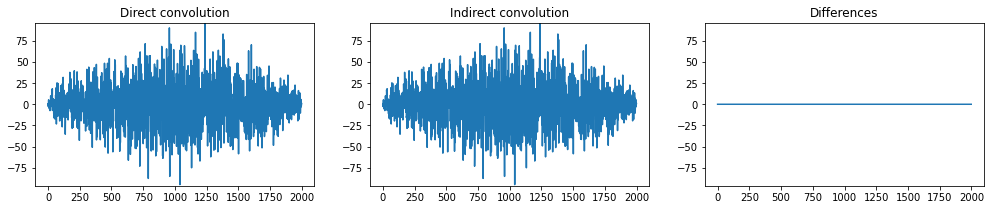

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define two arrays
number_elements = 1000
data_array1 = np.random.normal(size=number_elements)
data_array2 = np.random.normal(size=number_elements)

# Compute the direct convolution between them
data_convolution = np.convolve(data_array1, data_array2)

# Compute the convolution using the convolution theorem
ft_array1 = np.fft.fft(data_array1, 2*number_elements-1)
ft_array2 = np.fft.fft(data_array2, 2*number_elements-1)
data_convolution2 = np.real(np.fft.ifft(ft_array1*ft_array2))

# Display the convolutions and their differences
maximum_value = max(abs(data_convolution))
plt.figure(figsize=(17, 3))
plt.subplot(1, 3, 1)
plt.plot(data_convolution), plt.ylim(-maximum_value, maximum_value), plt.title('Direct convolution')
plt.subplot(1, 3, 2)
plt.plot(data_convolution2), plt.ylim(-maximum_value, maximum_value), plt.title('Indirect convolution')
plt.subplot(1, 3, 3)
plt.plot(data_convolution-data_convolution2), plt.ylim(-maximum_value, maximum_value), plt.title('Differences')
plt.show()

### 01.4. Observation 3

The magnitude FT is shift-invariant.

- `F(X) = abs(F(X)) x exp(j*angle(F(X)))`

- `F(X2) = abs(F(X2)) x exp(j*angle(F(X2)))`

`=> abs(F(X)) ~ abs(F(X2))`

Conclusion:

`=> F(E) ~ abs(F(X)) => E ~ F-1(abs(F(X))) and P ~ F-1(exp(j*angle(F(X))))`

#### Example 1: An array and a shifted version of it, and their magnitude FT

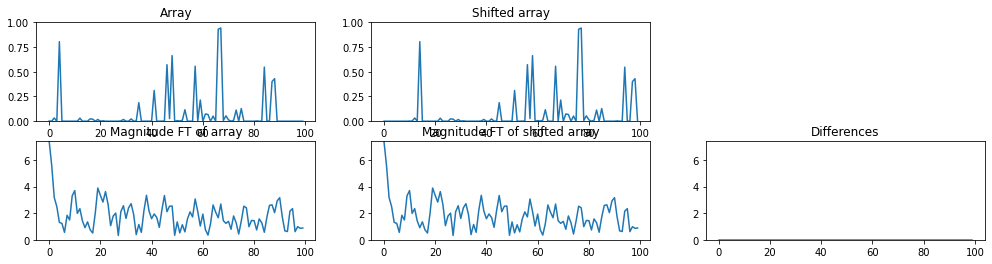

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define a non-negative array and a shifted version of it
number_elements = 100
delay_size = 10
data_array1 = np.concatenate((np.power(np.random.rand(number_elements-delay_size), 10), np.zeros(delay_size)))
data_array2 = np.concatenate((np.zeros(delay_size), data_array1[0:number_elements-delay_size]))

# Compute the magnitude FT of the arrays
absft_array1 = abs(np.fft.fft(data_array1, 2*number_elements-1))[0:number_elements]
absft_array2 = abs(np.fft.fft(data_array2, 2*number_elements-1))[0:number_elements]

# Display the arrays and magnitude FTs
maximum_value = max(np.max(absft_array1), np.max(absft_array2))
plt.figure(figsize=(17, 4))
plt.subplot(2, 3, 1), plt.plot(data_array1), plt.ylim(0, 1), plt.title('Array')
plt.subplot(2, 3, 2), plt.plot(data_array2), plt.ylim(0, 1), plt.title('Shifted array')
plt.subplot(2, 3, 4), plt.plot(absft_array1), plt.ylim(0, maximum_value), plt.title('Magnitude FT of array')
plt.subplot(2, 3, 5), plt.plot(absft_array2), plt.ylim(0, maximum_value), plt.title('Magnitude FT of shifted array')
plt.subplot(2, 3, 6), plt.plot(abs(absft_array1-absft_array2)), plt.ylim(0, maximum_value), plt.title('Differences')
plt.show()

#### Example 2: A CQT spectrum and a pitch-shifted version of it, and their magnitude FT

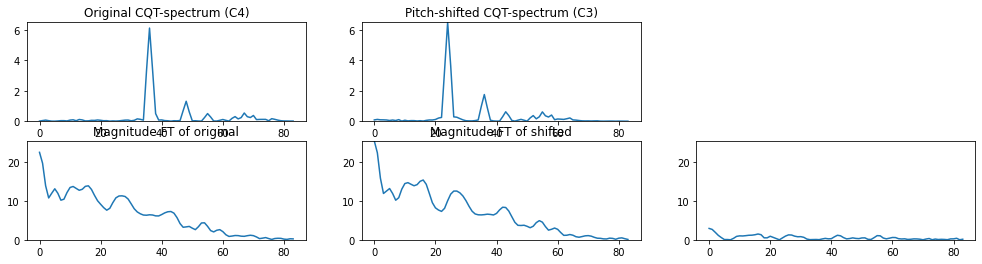

In [31]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load an audio file with its sampling frequency, and keep only one note in its left channel (= C4)
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=False)
audio_signal1 = audio_signal[0, 24000:69000]

# Shift down the note by a whole octave (2x lower in frequency) (= C3)
audio_signal2 = librosa.effects.pitch_shift(audio_signal1, sampling_frequency, n_steps=-12)

# Comptute the CQT-spectrogram for the signals
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
audio_spectrogram1 = np.abs(librosa.cqt(audio_signal1, sr=sampling_frequency, hop_length=step_length))
audio_spectrogram2 = np.abs(librosa.cqt(audio_signal2, sr=sampling_frequency, hop_length=step_length))
number_frequencies = np.shape(audio_spectrogram1)[0]

# Compute the magnitude FT of the CQT-spectrograms
absft_spectrogram1 = abs(np.fft.fft(audio_spectrogram1, 2*number_frequencies-1, axis=0))[0:number_frequencies, :]
absft_spectrogram2 = abs(np.fft.fft(audio_spectrogram2, 2*number_frequencies-1, axis=0))[0:number_frequencies, :]

# Display their waveform in seconds and their power CQT-spectrogram in seconds and notes
i = 10
audio_maximum = max(np.max(abs(audio_spectrogram1[:, i])), np.max(abs(audio_spectrogram2[:, i])))
absft_maximum = max(np.max(abs(absft_spectrogram1[:, i])), np.max(abs(absft_spectrogram2[:, i])))
plt.figure(figsize=(17, 4))
plt.subplot(2, 3, 1), plt.plot(audio_spectrogram1[:, i]), plt.ylim(0, audio_maximum), plt.title('Original CQT-spectrum (C4)')
plt.subplot(2, 3, 2), plt.plot(audio_spectrogram2[:, i]), plt.ylim(0, audio_maximum), plt.title('Pitch-shifted CQT-spectrum (C3)')
plt.subplot(2, 3, 4), plt.plot(absft_spectrogram1[:, i]), plt.ylim(0, absft_maximum), plt.title('Magnitude FT of original')
plt.subplot(2, 3, 5), plt.plot(absft_spectrogram2[:, i]), plt.ylim(0, absft_maximum), plt.title('Magnitude FT of shifted')
plt.subplot(2, 3, 6), plt.plot(abs(absft_spectrogram1[:, i]-absft_spectrogram2[:, i])), plt.ylim(0, absft_maximum)
plt.show()

## 02. Compare librosa's and zaf's CQT-spectrogram and MFCC

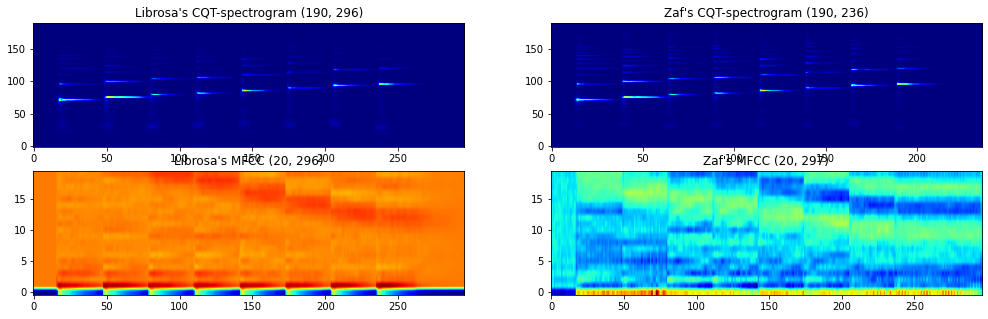

In [33]:
import numpy as np
import librosa
import zaf
import scipy.signal
import matplotlib.pyplot as plt

# Load an audio file in mono
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
sampling_frequency = 16000
audio_signal, sampling_frequency = librosa.load(file_path, sr=sampling_frequency, mono=True)

# Define some parameters
window_length = pow(2, int(np.ceil(np.log2(0.04 * sampling_frequency))))
step_length = int(window_length/2)
window_function = scipy.signal.hamming(window_length, sym=False)
minimum_frequency = 32.70
maximum_frequency = sampling_frequency/2
octave_resolution = 24
time_resolution = 25
number_mels = 40
number_coefficients = 20

# Compute the CQT-spectrogram using librosa and zaf
number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                     fmin=minimum_frequency, n_bins=number_frequencies, bins_per_octave=octave_resolution))
cqt_kernel = zaf.cqtkernel(sampling_frequency, octave_resolution, minimum_frequency, maximum_frequency)
cqt_spectrogram2 = zaf.cqtspectrogram(audio_signal, sampling_frequency, time_resolution, cqt_kernel)

# Compute the MFCCs using librosa and zaf
audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_mfcc=number_coefficients, \
                                  hop_length=step_length)
mel_filterbank = zaf.melfilterbank(sampling_frequency, window_length, number_mels)
audio_mfcc2 = zaf.mfcc(audio_signal, window_function, step_length, mel_filterbank, number_coefficients)

# Display the CQT-spectrograms and the MFCCs
plt.figure(figsize=(17, 5))
plt.subplot(2, 2, 1)
plt.imshow(cqt_spectrogram, aspect='auto', cmap='jet', origin='lower')
plt.title(f"Librosa's CQT-spectrogram {np.shape(cqt_spectrogram)}")
plt.subplot(2, 2, 2)
plt.imshow(cqt_spectrogram2, aspect='auto', cmap='jet', origin='lower')
plt.title(f"Zaf's CQT spectrogram {np.shape(cqt_spectrogram2)}")
plt.subplot(2, 2, 3)
plt.imshow(audio_mfcc, aspect='auto', cmap='jet', origin='lower')
plt.title(f"Librosa's MFCC {np.shape(audio_mfcc)}")
plt.subplot(2, 2, 4)
plt.imshow(audio_mfcc2, aspect='auto', cmap='jet', origin='lower')
plt.title(f"Zaf's MFCC {np.shape(audio_mfcc2)}")
plt.show()

## 03. Test decomposing the CQT-spectrogram into a CQT-envelope and a CQT-pitch

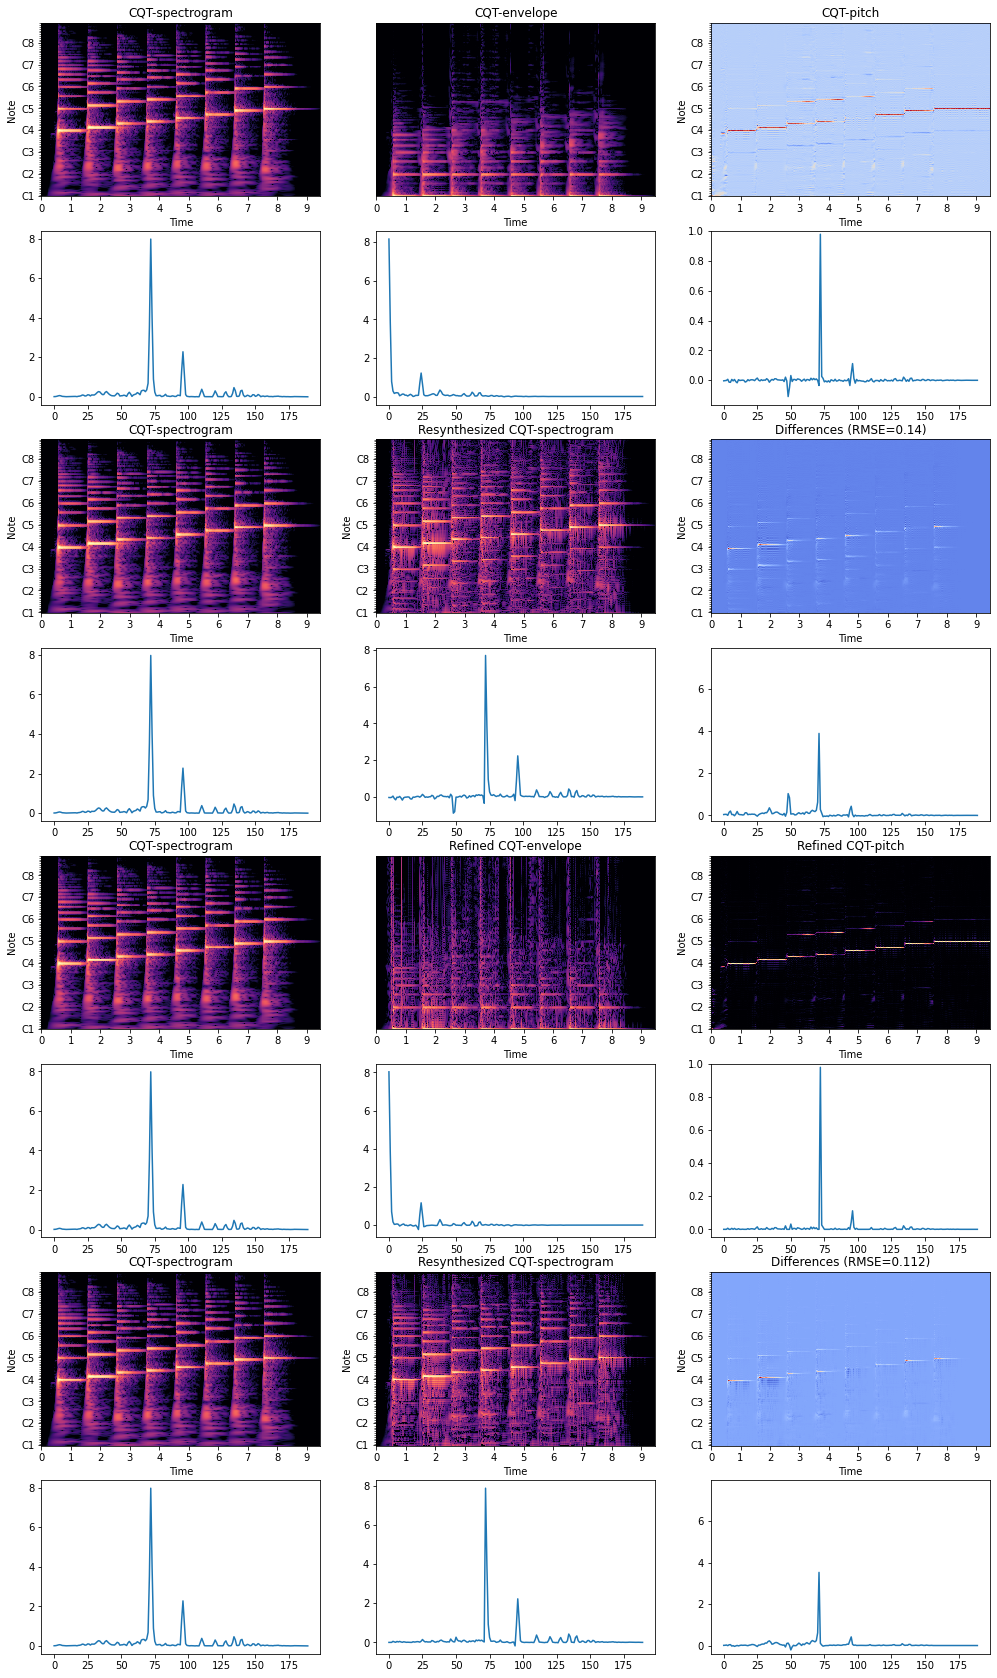

In [43]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings('ignore',category=matplotlib.cbook.mplDeprecation)

# Load an audio file with its sampling frequency, and keep only its left channel
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
# file_path = r'557469__oleviolin__d-scale-violin.wav'
sampling_frequency = 16000
audio_signal, _ = librosa.load(file_path, sr=sampling_frequency, mono=True)

# Comptute the CQT-spectrogram of the signal
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
minimum_frequency = 32.70
maximum_frequency = sampling_frequency/2
octave_resolution = 24
number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
audio_cqt = librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                        n_bins=number_frequencies, bins_per_octave=octave_resolution)
cqt_spectrogram = np.abs(audio_cqt)
number_times = np.shape(cqt_spectrogram)[1]

# Derive the CQT-envelope and the CQT-pitch
ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
absftcqt_spectrogram = abs(ftcqt_spectrogram)
cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/absftcqt_spectrogram, axis=0)[0:number_frequencies, :])

# Resynthesize the spectrogram by convolving the CQT-envelope and CQT-pitch
cqt_spectrogram2 = np.zeros((number_frequencies, number_times))
for i in range(number_times):
    cqt_spectrogram2[:, i] = np.convolve(cqt_envelope[:, i], cqt_pitch[:, i])[0:number_frequencies]

# Display the CQT-spectrogram, CQT-envelope and CQT-pitch, the resynthesized CQT-spectrogram, and the differences
j = 20
plt.figure(figsize=(17, 30))
plt.subplot(8, 3, 1)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('CQT-spectrogram')
plt.subplot(8, 3, 2)
librosa.display.specshow(librosa.amplitude_to_db(cqt_envelope, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time')
plt.title('CQT-envelope')
plt.subplot(8, 3, 3)
librosa.display.specshow(cqt_pitch, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                         bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
plt.title('CQT-pitch')
plt.subplot(8, 3, 4)
plt.plot(cqt_spectrogram[:, j])
plt.subplot(8, 3, 5)
plt.plot(cqt_envelope[:, j])
plt.subplot(8, 3, 6)
plt.plot(cqt_pitch[:, j])
plt.ylim(top=1)
plt.subplot(8, 3, 7)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('CQT-spectrogram')
plt.subplot(8, 3, 8)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('Resynthesized CQT-spectrogram')
plt.subplot(8, 3, 9)
librosa.display.specshow(cqt_spectrogram-cqt_spectrogram2, sr=sampling_frequency, hop_length=step_length, \
                         fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
rmse_value = np.round(np.sqrt(np.mean(np.power(cqt_spectrogram-cqt_spectrogram2, 2))), 3)
plt.title(f'Differences (RMSE={rmse_value})')
plt.subplot(8, 3, 10)
plt.plot(cqt_spectrogram[:, j])
plt.subplot(8, 3, 11)
plt.plot(cqt_spectrogram2[:, j])
plt.subplot(8, 3, 12)
plt.plot(cqt_spectrogram[:, j]-cqt_spectrogram2[:, j])
plt.ylim(top=max(cqt_spectrogram[:, j]))

# Refine the CQT-pitch, and then the CQT-envelope
cqt_pitch2 = np.copy(cqt_pitch)
cqt_pitch2[cqt_pitch2 < 0] = 0
cqt_envelope2 = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch2, 2*number_frequencies-1, axis=0)+1e-7), \
                                    axis=0)[0:number_frequencies, :])

# Resynthesize the spectrogram by convolving the refined CQT-envelope and CQT-pitch
cqt_spectrogram2 = np.zeros((number_frequencies, number_times))
for i in range(number_times):
    cqt_spectrogram2[:, i] = np.convolve(cqt_envelope2[:, i], cqt_pitch2[:, i])[0:number_frequencies]

# Display the CQT-spectrogram, the refined CQT-envelope and CQT-pitch, the resynthesized CQT-spectrogram, and the differences
plt.subplot(8, 3, 13)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('CQT-spectrogram')
plt.subplot(8, 3, 14)
librosa.display.specshow(librosa.amplitude_to_db(cqt_envelope2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time')
plt.title('Refined CQT-envelope')
plt.subplot(8, 3, 15)
librosa.display.specshow(cqt_pitch2, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                         bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
plt.title('Refined CQT-pitch')
plt.subplot(8, 3, 16)
plt.plot(cqt_spectrogram[:, j])
plt.subplot(8, 3, 17)
plt.plot(cqt_envelope2[:, j])
plt.subplot(8, 3, 18)
plt.plot(cqt_pitch2[:, j])
plt.ylim(top=1)
plt.subplot(8, 3, 19)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('CQT-spectrogram')
plt.subplot(8, 3, 20)
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram2, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.title('Resynthesized CQT-spectrogram')
plt.subplot(8, 3, 21)
librosa.display.specshow(cqt_spectrogram-cqt_spectrogram2, sr=sampling_frequency, hop_length=step_length, \
                         fmin=minimum_frequency, bins_per_octave=octave_resolution, x_axis='time', y_axis='cqt_note')
rmse_value = np.round(np.sqrt(np.mean(np.power(cqt_spectrogram-cqt_spectrogram2, 2))), 3)
plt.title(f'Differences (RMSE={rmse_value})')
plt.subplot(8, 3, 22)
plt.plot(cqt_spectrogram[:, j])
plt.subplot(8, 3, 23)
plt.plot(cqt_spectrogram2[:, j])
plt.subplot(8, 3, 24)
plt.plot(cqt_spectrogram[:, j]-cqt_spectrogram2[:, j])
plt.ylim(top=max(cqt_spectrogram[:, j]))
plt.show()

# # Resynthesize the signal
# audio_signal2 = librosa.icqt(cqt_spectrogram2*audio_cqt/cqt_spectrogram, sr=sampling_frequency, \
#                              hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution)
# audio_signal2 = np.max(abs(audio_signal))*audio_signal2/np.max(abs(audio_signal2))
# audio_signal2 = np.pad(audio_signal2, (0, len(audio_signal)-len(audio_signal2)), 'constant', constant_values=0)

## 04. Test extracting the CQT-spectral envelope coefficients (CQT-SEC)

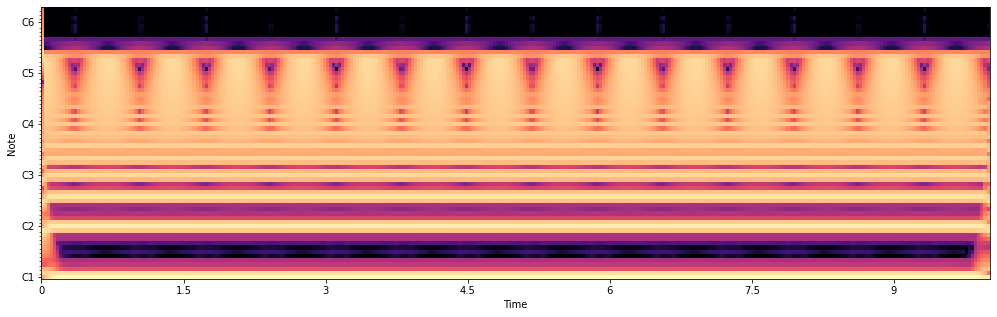

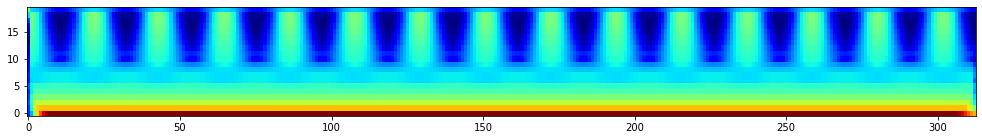

In [47]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings('ignore',category=matplotlib.cbook.mplDeprecation)

# Build a harmonic signal
sampling_frequency = 16000                                     # In Hz
time_duration = 10                                             # In seconds
time_array = np.arange(0, time_duration, 1/sampling_frequency) # In seconds
number_harmonics = 20
frequency_values = 32.70*np.arange(1, number_harmonics+1)      # in Hz
number_samples = len(time_array)
audio_signal = np.zeros(number_samples)
for frequency_value in frequency_values:
    audio_signal = audio_signal+np.sin(time_array*2*np.pi*frequency_value)

# Comptute the CQT-spectrogram of the harmonic signal
step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
minimum_frequency = frequency_values[0]
maximum_frequency = 2*frequency_values[-1]
octave_resolution = 12
number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, fmin=minimum_frequency, \
                                     n_bins=number_frequencies, bins_per_octave=octave_resolution))
plt.figure(figsize=(17, 5))
librosa.display.specshow(librosa.amplitude_to_db(cqt_spectrogram, ref=np.max), sr=sampling_frequency, \
                         hop_length=step_length, fmin=minimum_frequency, bins_per_octave=octave_resolution, \
                         x_axis='time', y_axis='cqt_note')
plt.show()

# Extract the CQT-spectral envelope coefficients (CQT-SEC)
coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_harmonics+1))).astype(int)
cqt_sec = cqt_spectrogram[coefficient_indices, :]
plt.figure(figsize=(17, 2))
plt.imshow(cqt_sec, aspect='auto', cmap='jet', origin='lower')
plt.show()

## 04. Compare the CQT-SECs to the MFCCs

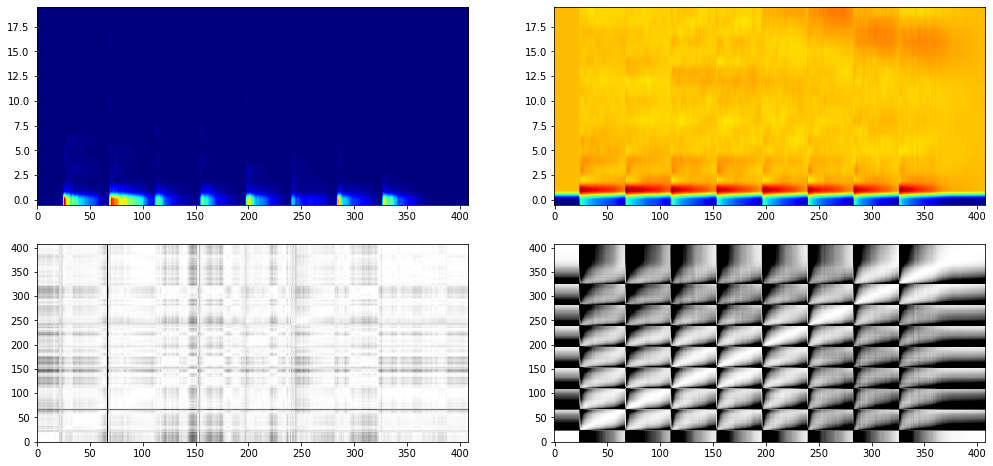

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Define a function to compute the CQT spectral envelope coefficients (CQT-SEC)
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                         fmin=minimum_frequency, n_bins=number_frequencies, \
                                         bins_per_octave=octave_resolution))
    
    # Derive the CQT-envelope and the CQT-pitch
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    
    # Refine the CQT-envelope
    cqt_pitch[cqt_pitch<0] = 0
    cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-6), \
                                       axis=0)[0:number_frequencies, :])
    cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]
    
    return cqt_sec


# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Define a function to compute a self-similarity matrix using the cosine similarity
def ssm(audio_feature):
    
    # Normalize the columns by their Euclidean norm
    audio_feature0 = audio_feature/(np.sqrt(np.sum(np.power(audio_feature, 2), axis=0))+1e-16)
    
    # Multiple the normalized columns with each other
    similarity_matrix = np.matmul(audio_feature0.T, audio_feature0)
    
    return similarity_matrix
    
    
# Load an audio file with its sampling frequency, and keep only its left channel
file_path = r'94812__digifishmusic__c4-major-scale-piano.wav'
# file_path = r'557469__oleviolin__d-scale-violin.wav'
sampling_frequency = 16000
audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
# Compute the CQT-SECs and the MFCCs
cqt_sec = cqtsec(audio_signal, sampling_frequency)
audio_mfcc = mfcc(audio_signal, sampling_frequency)

# Compute the self-similarity matrices using the cosine similarity
similarity_matrix = ssm(cqt_sec)
similarity_matrix2 = ssm(audio_mfcc)

# Display everything
plt.figure(figsize=(17, 8))
plt.subplot(2, 2, 1)
plt.imshow(cqt_sec, cmap='jet', aspect='auto', origin='lower')
plt.subplot(2, 2, 2)
plt.imshow(audio_mfcc, cmap='jet', aspect='auto', origin='lower')
plt.subplot(2, 2, 3)
plt.imshow(similarity_matrix, cmap='gray', aspect='auto', origin='lower', vmin=0.9, vmax=1)
plt.subplot(2, 2, 4)
plt.imshow(similarity_matrix2, cmap='gray', aspect='auto', origin='lower', vmin=0.9, vmax=1)
plt.show()

## 04. Compare the CQT-SECs and the MFCCs on a small dataset

In [105]:
# import os
# from shutil import copyfile

# # Create a small dataset from the large NSynth dataset
# folder_path = r'C:\Users\zarafii2001\Gracenote\Data\nsynth\nsynth-train\audio'
# folder_path2 = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
# instrument_list = [{'name':'bass_acoustic', 'number': '000', 'midi': 24}, \
#                    {'name':'brass_acoustic', 'number': '000', 'midi': 60}, \
#                    {'name':'flute_acoustic', 'number': '000', 'midi': 60}, \
#                    {'name':'guitar_acoustic', 'number': '000', 'midi': 60}, \
#                    {'name':'keyboard_acoustic', 'number': '000', 'midi': 60}, \
#                    {'name':'mallet_acoustic', 'number': '000', 'midi': 72}, \
#                    {'name':'organ_electronic', 'number': '000', 'midi': 60}, \
#                    {'name':'reed_acoustic', 'number': '000', 'midi': 60}, \
#                    {'name':'string_acoustic', 'number': '000', 'midi': 60}, \
#                    {'name':'synth_lead_synthetic', 'number': '000', 'midi': 60}, \
#                    {'name':'vocal_acoustic', 'number': '002', 'midi': 60}]
# number_semitones = 12
# for i in instrument_list:
#     for j in range(i['midi'], i['midi']+number_semitones):
#         file_name = f'{i['name']}_{i['number']}-{j:03d}-075.wav'
#         file_path = os.path.join(folder_path, file_name)
#         file_path2 = os.path.join(folder_path2, file_name)
#         copyfile(file_path, file_path2)

In [3]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution))
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
#     # Refine the CQT-envelope
#     cqt_pitch[cqt_pitch<0] = 0
#     cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
#                                        axis=0)[0:number_frequencies, :])
#     cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]


    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)

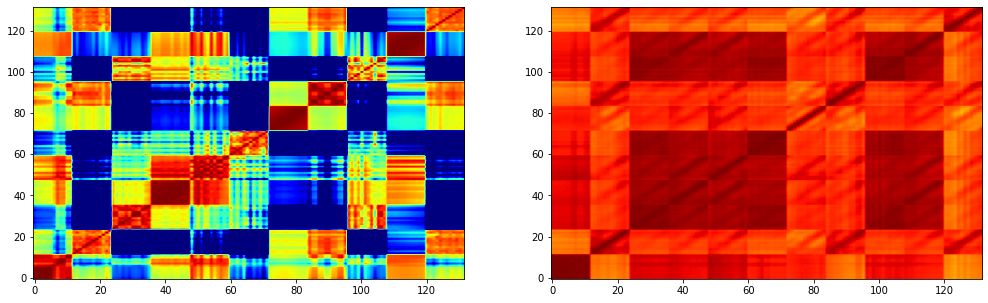

In [4]:
# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Display the similarity matrices for the CQT-SECs and the MFCCs
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.imshow(cqtsec_matrix, cmap="jet", aspect="auto", vmin=0.5, vmax=1, origin="lower")
plt.subplot(1, 2, 2)
plt.imshow(mfcc_matrix, cmap="jet", aspect="auto", vmin=0.5, vmax=1, origin="lower")
plt.show()

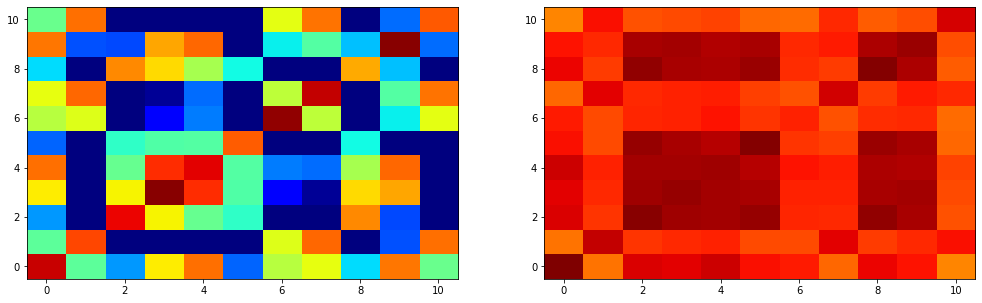

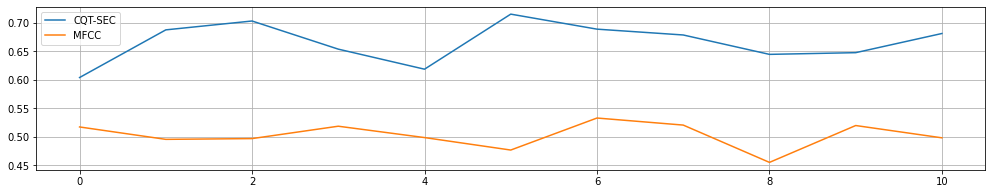

In [19]:
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Display the mean similarity matrices
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.imshow(cqtsec_matrix2, cmap="jet", aspect="auto", vmin=0.5, vmax=1, origin="lower")
plt.subplot(1, 2, 2)
plt.imshow(mfcc_matrix2, cmap="jet", aspect="auto", vmin=0.5, vmax=1, origin="lower")
plt.show()

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.figure(figsize=(17, 3))
plt.plot(cqtsec_vector2, label='CQT-SEC')
plt.plot(mfcc_vector2, label='MFCC')
plt.grid()
plt.legend()

CQT-SEC: 0.6941282494272549
MFCC: 0.4617736634558428


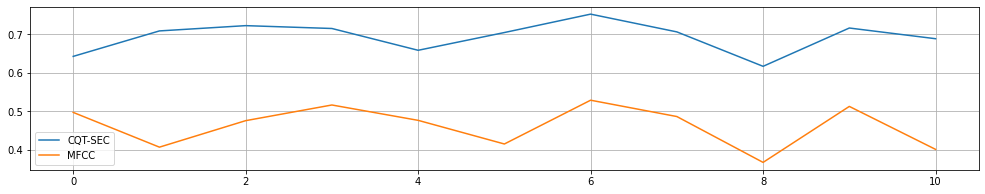

In [26]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.power(np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution)), 2)
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
#     # Refine the CQT-envelope
#     cqt_pitch[cqt_pitch<0] = 0
#     cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
#                                        axis=0)[0:number_frequencies, :])
#     cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]


    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)
    

# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.figure(figsize=(17, 3))
plt.plot(cqtsec_vector2, label='CQT-SEC')
plt.plot(mfcc_vector2, label='MFCC')
plt.grid()
plt.legend()

print(f'CQT-SEC: {np.mean(cqtsec_vector2)}')
print(f'MFCC: {np.mean(mfcc_vector2)}')

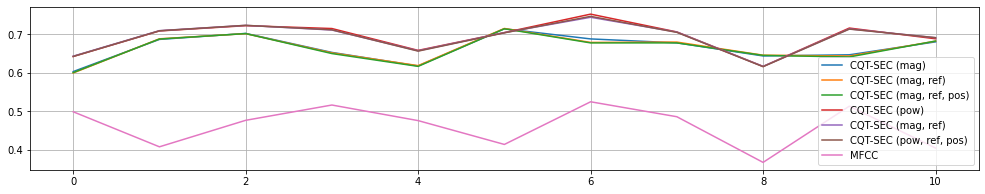

In [33]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 3))



# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution))
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
#     # Refine the CQT-envelope
#     cqt_pitch[cqt_pitch<0] = 0
#     cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
#                                        axis=0)[0:number_frequencies, :])
#     cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]
    
    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)
    

# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.plot(cqtsec_vector2, label='CQT-SEC (mag)')



# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution))
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
    # Refine the CQT-envelope
    cqt_pitch[cqt_pitch<0] = 0
    cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
                                       axis=0)[0:number_frequencies, :])
#     cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]

    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)
    

# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.plot(cqtsec_vector2, label='CQT-SEC (mag, ref)')



# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution))
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
    # Refine the CQT-envelope
    cqt_pitch[cqt_pitch<0] = 0
    cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
                                       axis=0)[0:number_frequencies, :])
    cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]

    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)
    

# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.plot(cqtsec_vector2, label='CQT-SEC (mag, ref, pos)')



# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.power(np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution)), 2)
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
#     # Refine the CQT-envelope
#     cqt_pitch[cqt_pitch<0] = 0
#     cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
#                                        axis=0)[0:number_frequencies, :])
#     cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]

    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)
    

# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.plot(cqtsec_vector2, label='CQT-SEC (pow)')



# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.power(np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution)), 2)
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
    # Refine the CQT-envelope
    cqt_pitch[cqt_pitch<0] = 0
    cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
                                       axis=0)[0:number_frequencies, :])
#     cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]

    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)
    

# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.plot(cqtsec_vector2, label='CQT-SEC (mag, ref)')



# Define a function to compute the CQT-SEC
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the CQT-spectrogram from the signal
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.power(np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution)), 2)
    
    # Compute the FT of the columns in the CQT-spectrogram and its magnitude
    ftcqt_spectrogram = np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)
    absftcqt_spectrogram = abs(ftcqt_spectrogram)
    
    # Derive the CQT-envelope and the CQT-pitch
    cqt_envelope = np.real(np.fft.ifft(absftcqt_spectrogram, axis=0)[0:number_frequencies, :])
    cqt_pitch = np.real(np.fft.ifft(ftcqt_spectrogram/(absftcqt_spectrogram+1e-16), axis=0)[0:number_frequencies, :])
    
    # Refine the CQT-envelope
    cqt_pitch[cqt_pitch<0] = 0
    cqt_envelope = np.real(np.fft.ifft(ftcqt_spectrogram/(np.fft.fft(cqt_pitch, 2*number_frequencies-1, axis=0)+1e-16), \
                                       axis=0)[0:number_frequencies, :])
    cqt_envelope[cqt_envelope<0] = 0
    
    # Get the indices of the CQT-SEC and extract them
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_sec = cqt_envelope[coefficient_indices, :]

    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Path to the folder
folder_path = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth11'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Create an empty list for storing dictionaries
audio_list = []

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
#     # Display the name of the file
#     print(f'{k}/{number_files}: {file_name}')
    
    # Get the path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current file and append it to the list
    audio_dict = {'name': file_name[0:-4], 'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    audio_list.append(audio_dict)
    

# Initialize the cosine similarity matrices for the CQT-SECs and the MFCCs
number_files = len(audio_list)
cqtsec_matrix = np.zeros((number_files, number_files))
mfcc_matrix = np.zeros((number_files, number_files))

# Loop over the rows of the matrices
for i in range(number_files):
    
    # Get the CQT-SECs and MFCCs for the current audio and normalize them
    cqt_sec0 = audio_list[i]['cqt-sec']
    cqt_sec0 = cqt_sec0/(np.sqrt(np.sum(np.power(cqt_sec0, 2), axis=None))+1e-16)
    audio_mfcc0 = audio_list[i]['mfcc']
    audio_mfcc0 = audio_mfcc0/(np.sqrt(np.sum(np.power(audio_mfcc0, 2), axis=None))+1e-16)
    
    # Loop over the columns of the matrices
    for j in range(number_files):
        
        # Get the CQT-SECs and MFCCs for the current audio and normalize them
        cqt_sec1 = audio_list[j]['cqt-sec']
        cqt_sec1 = cqt_sec1/(np.sqrt(np.sum(np.power(cqt_sec1, 2), axis=None))+1e-16)
        audio_mfcc1 = audio_list[j]['mfcc']
        audio_mfcc1 = audio_mfcc1/(np.sqrt(np.sum(np.power(audio_mfcc1, 2), axis=None))+1e-16)
        
        # Compute the cosine similarity between the CQT-SECs and between the MFCCs
        cqtsec_matrix[i, j] = np.sum(cqt_sec0*cqt_sec1, axis=None)
        mfcc_matrix[i, j] = np.sum(audio_mfcc0*audio_mfcc1, axis=None)
        
# Initialize the mean similarity matrices and final score vectors
number_instruments = 11
cqtsec_matrix2 = np.zeros((number_instruments, number_instruments))
mfcc_matrix2 = np.zeros((number_instruments, number_instruments))
cqtsec_vector2 = np.zeros(number_instruments)
mfcc_vector2 = np.zeros(number_instruments)

# Compute the similarity averaged over the instrument classes
for i in range(number_instruments):
    for j in range(number_instruments):
        cqtsec_matrix2[i, j] = np.mean(cqtsec_matrix[i*12:(i+1)*12, j*12:(j+1)*12])
        mfcc_matrix2[i, j] = np.mean(mfcc_matrix[i*12:(i+1)*12, j*12:(j+1)*12])

# Compute the final score vectors (mean between self-similarity and 1 minus the averaged cross-similarities)
for i in range(number_instruments):
    cqtsec_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(cqtsec_matrix2[i, :])-cqtsec_matrix2[i, i])/(number_instruments-1)))/2
    mfcc_vector2[i] = (cqtsec_matrix2[i, i] \
    + 1-((np.sum(mfcc_matrix2[i, :])-mfcc_matrix2[i, i])/(number_instruments-1)))/2

# Display the final score vectors
plt.plot(cqtsec_vector2, label='CQT-SEC (pow, ref, pos)')
plt.plot(mfcc_vector2, label='MFCC')



plt.grid()
plt.legend()
plt.show()

## 05. Compute the CQT-SECs and the MFCCs on the whole dataset

In [ ]:
import os
import pickle
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Define a function to compute the CQT-SECs
def cqtsec(audio_signal, sampling_frequency):
    
    # Comptute the power CQT-spectrogram
    step_length = int(pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))/2)
    minimum_frequency = 32.70
    maximum_frequency = sampling_frequency/2
    octave_resolution = 12
    number_frequencies = round(octave_resolution * np.log2(maximum_frequency / minimum_frequency))
    cqt_spectrogram = np.power(np.abs(librosa.cqt(audio_signal, sr=sampling_frequency, hop_length=step_length, \
                                                  fmin=minimum_frequency, n_bins=number_frequencies, \
                                                  bins_per_octave=octave_resolution)), 2)
    
    # Compute the CQT-SECs
    number_coefficients = 20
    coefficient_indices = np.round(octave_resolution*np.log2(np.arange(1, number_coefficients+1))).astype(int)
    cqt_envelope = np.real(np.fft.ifft(abs(np.fft.fft(cqt_spectrogram, 2*number_frequencies-1, axis=0)), axis=0) \
                           [0:number_frequencies, :])
    cqt_sec = cqt_envelope[coefficient_indices, :]
    
    return cqt_sec

# Define a function to compute the MFCCs
def mfcc(audio_signal, sampling_frequency):
    
    # Compute the MFCCs using LibROSA's function
    window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
    step_length = int(window_length/2)
    audio_mfcc = librosa.feature.mfcc(y=audio_signal, sr=sampling_frequency, n_fft=window_length, hop_length=step_length)
    
    return audio_mfcc


# Get the paths to the folders
folder_path = r'C:\Users\zarafii2001\Gracenote\Data\nsynth'
folder_path2 = r'C:\Users\zarafii2001\Documents\GitHub\CQT-SEC-Python\nsynth'
folder_listdir = os.listdir(folder_path)
number_files = len(folder_listdir)

# Loop over the files
k = 0
for file_name in folder_listdir:
    k = k+1
    
    # Display the name of the file
    print(f'{k}/{number_files}: {file_name}')
    
    # Get the full path to the audio file and load it
    file_path = os.path.join(folder_path, file_name)
    audio_signal, sampling_frequency = librosa.load(file_path, sr=None, mono=True)
    
    # Compute the CQT-SECs and the MFCCs from the audio signal
    cqt_sec = cqtsec(audio_signal, sampling_frequency)
    audio_mfcc = mfcc(audio_signal, sampling_frequency)
    
    # Create a dictionary for the current audio features and save it in a pkl file
    audio_dict = {'cqt-sec': cqt_sec, 'mfcc': audio_mfcc}
    file_path2 = os.path.join(folder_path2, file_name[0:-4]+'.pkl')
    pickle.dump(audio_dict, open(file_path2,'wb'))

1/305979: bass_acoustic_000-024-025.wav
2/305979: bass_acoustic_000-024-050.wav
3/305979: bass_acoustic_000-024-075.wav
4/305979: bass_acoustic_000-024-100.wav
5/305979: bass_acoustic_000-024-127.wav
6/305979: bass_acoustic_000-025-025.wav
7/305979: bass_acoustic_000-025-050.wav
8/305979: bass_acoustic_000-025-075.wav
9/305979: bass_acoustic_000-025-100.wav
10/305979: bass_acoustic_000-025-127.wav
11/305979: bass_acoustic_000-026-025.wav
12/305979: bass_acoustic_000-026-050.wav
13/305979: bass_acoustic_000-026-075.wav
14/305979: bass_acoustic_000-026-100.wav
15/305979: bass_acoustic_000-026-127.wav
16/305979: bass_acoustic_000-027-025.wav
17/305979: bass_acoustic_000-027-050.wav
18/305979: bass_acoustic_000-027-075.wav
19/305979: bass_acoustic_000-027-100.wav
20/305979: bass_acoustic_000-027-127.wav
21/305979: bass_acoustic_000-028-025.wav
22/305979: bass_acoustic_000-028-050.wav
23/305979: bass_acoustic_000-028-075.wav
24/305979: bass_acoustic_000-028-100.wav
25/305979: bass_acoustic_

201/305979: bass_electronic_000-022-025.wav
202/305979: bass_electronic_000-022-050.wav
203/305979: bass_electronic_000-022-075.wav
204/305979: bass_electronic_000-022-100.wav
205/305979: bass_electronic_000-022-127.wav
206/305979: bass_electronic_000-023-025.wav
207/305979: bass_electronic_000-023-050.wav
208/305979: bass_electronic_000-023-075.wav
209/305979: bass_electronic_000-023-100.wav
210/305979: bass_electronic_000-023-127.wav
211/305979: bass_electronic_000-024-025.wav
212/305979: bass_electronic_000-024-050.wav
213/305979: bass_electronic_000-024-075.wav
214/305979: bass_electronic_000-024-100.wav
215/305979: bass_electronic_000-024-127.wav
216/305979: bass_electronic_000-025-025.wav
217/305979: bass_electronic_000-025-050.wav
218/305979: bass_electronic_000-025-075.wav
219/305979: bass_electronic_000-025-100.wav
220/305979: bass_electronic_000-025-127.wav
221/305979: bass_electronic_000-026-025.wav
222/305979: bass_electronic_000-026-050.wav
223/305979: bass_electronic_000-

392/305979: bass_electronic_000-060-050.wav
393/305979: bass_electronic_000-060-075.wav
394/305979: bass_electronic_000-060-100.wav
395/305979: bass_electronic_000-060-127.wav
396/305979: bass_electronic_000-061-025.wav
397/305979: bass_electronic_000-061-050.wav
398/305979: bass_electronic_000-061-075.wav
399/305979: bass_electronic_000-061-100.wav
400/305979: bass_electronic_000-061-127.wav
401/305979: bass_electronic_000-062-025.wav
402/305979: bass_electronic_000-062-050.wav
403/305979: bass_electronic_000-062-075.wav
404/305979: bass_electronic_000-062-100.wav
405/305979: bass_electronic_000-062-127.wav
406/305979: bass_electronic_000-063-025.wav
407/305979: bass_electronic_000-063-050.wav
408/305979: bass_electronic_000-063-075.wav
409/305979: bass_electronic_000-063-100.wav
410/305979: bass_electronic_000-063-127.wav
411/305979: bass_electronic_001-022-025.wav
412/305979: bass_electronic_001-022-050.wav
413/305979: bass_electronic_001-022-075.wav
414/305979: bass_electronic_001-

579/305979: bass_electronic_001-055-100.wav
580/305979: bass_electronic_001-055-127.wav
581/305979: bass_electronic_001-056-025.wav
582/305979: bass_electronic_001-056-050.wav
583/305979: bass_electronic_001-056-075.wav
584/305979: bass_electronic_001-056-100.wav
585/305979: bass_electronic_001-056-127.wav
586/305979: bass_electronic_001-057-025.wav
587/305979: bass_electronic_001-057-050.wav
588/305979: bass_electronic_001-057-075.wav
589/305979: bass_electronic_001-057-100.wav
590/305979: bass_electronic_001-057-127.wav
591/305979: bass_electronic_001-058-025.wav
592/305979: bass_electronic_001-058-050.wav
593/305979: bass_electronic_001-058-075.wav
594/305979: bass_electronic_001-058-100.wav
595/305979: bass_electronic_001-058-127.wav
596/305979: bass_electronic_001-059-025.wav
597/305979: bass_electronic_001-059-050.wav
598/305979: bass_electronic_001-059-075.wav
599/305979: bass_electronic_001-059-100.wav
600/305979: bass_electronic_001-059-127.wav
601/305979: bass_electronic_001-

767/305979: bass_electronic_002-051-050.wav
768/305979: bass_electronic_002-051-075.wav
769/305979: bass_electronic_002-051-100.wav
770/305979: bass_electronic_002-051-127.wav
771/305979: bass_electronic_002-052-025.wav
772/305979: bass_electronic_002-052-050.wav
773/305979: bass_electronic_002-052-075.wav
774/305979: bass_electronic_002-052-100.wav
775/305979: bass_electronic_002-052-127.wav
776/305979: bass_electronic_002-053-025.wav
777/305979: bass_electronic_002-053-050.wav
778/305979: bass_electronic_002-053-075.wav
779/305979: bass_electronic_002-053-100.wav
780/305979: bass_electronic_002-053-127.wav
781/305979: bass_electronic_002-054-025.wav
782/305979: bass_electronic_002-054-050.wav
783/305979: bass_electronic_002-054-075.wav
784/305979: bass_electronic_002-054-100.wav
785/305979: bass_electronic_002-054-127.wav
786/305979: bass_electronic_002-055-025.wav
787/305979: bass_electronic_002-055-050.wav
788/305979: bass_electronic_002-055-075.wav
789/305979: bass_electronic_002-

955/305979: bass_electronic_003-046-127.wav
956/305979: bass_electronic_003-047-025.wav
957/305979: bass_electronic_003-047-050.wav
958/305979: bass_electronic_003-047-075.wav
959/305979: bass_electronic_003-047-100.wav
960/305979: bass_electronic_003-047-127.wav
961/305979: bass_electronic_003-048-025.wav
962/305979: bass_electronic_003-048-050.wav
963/305979: bass_electronic_003-048-075.wav
964/305979: bass_electronic_003-048-100.wav
965/305979: bass_electronic_003-048-127.wav
966/305979: bass_electronic_003-049-025.wav
967/305979: bass_electronic_003-049-050.wav
968/305979: bass_electronic_003-049-075.wav
969/305979: bass_electronic_003-049-100.wav
970/305979: bass_electronic_003-049-127.wav
971/305979: bass_electronic_003-050-025.wav
972/305979: bass_electronic_003-050-050.wav
973/305979: bass_electronic_003-050-075.wav
974/305979: bass_electronic_003-050-100.wav
975/305979: bass_electronic_003-050-127.wav
976/305979: bass_electronic_003-051-025.wav
977/305979: bass_electronic_003-

1142/305979: bass_electronic_004-042-050.wav
1143/305979: bass_electronic_004-042-075.wav
1144/305979: bass_electronic_004-042-100.wav
1145/305979: bass_electronic_004-042-127.wav
1146/305979: bass_electronic_004-043-025.wav
1147/305979: bass_electronic_004-043-050.wav
1148/305979: bass_electronic_004-043-075.wav
1149/305979: bass_electronic_004-043-100.wav
1150/305979: bass_electronic_004-043-127.wav
1151/305979: bass_electronic_004-044-025.wav
1152/305979: bass_electronic_004-044-050.wav
1153/305979: bass_electronic_004-044-075.wav
1154/305979: bass_electronic_004-044-100.wav
1155/305979: bass_electronic_004-044-127.wav
1156/305979: bass_electronic_004-045-025.wav
1157/305979: bass_electronic_004-045-050.wav
1158/305979: bass_electronic_004-045-075.wav
1159/305979: bass_electronic_004-045-100.wav
1160/305979: bass_electronic_004-045-127.wav
1161/305979: bass_electronic_004-046-025.wav
1162/305979: bass_electronic_004-046-050.wav
1163/305979: bass_electronic_004-046-075.wav
1164/30597

1328/305979: bass_electronic_005-037-075.wav
1329/305979: bass_electronic_005-037-100.wav
1330/305979: bass_electronic_005-037-127.wav
1331/305979: bass_electronic_005-038-025.wav
1332/305979: bass_electronic_005-038-050.wav
1333/305979: bass_electronic_005-038-075.wav
1334/305979: bass_electronic_005-038-100.wav
1335/305979: bass_electronic_005-038-127.wav
1336/305979: bass_electronic_005-039-025.wav
1337/305979: bass_electronic_005-039-050.wav
1338/305979: bass_electronic_005-039-075.wav
1339/305979: bass_electronic_005-039-100.wav
1340/305979: bass_electronic_005-039-127.wav
1341/305979: bass_electronic_005-040-025.wav
1342/305979: bass_electronic_005-040-050.wav
1343/305979: bass_electronic_005-040-075.wav
1344/305979: bass_electronic_005-040-100.wav
1345/305979: bass_electronic_005-040-127.wav
1346/305979: bass_electronic_005-041-025.wav
1347/305979: bass_electronic_005-041-050.wav
1348/305979: bass_electronic_005-041-075.wav
1349/305979: bass_electronic_005-041-100.wav
1350/30597

1512/305979: bass_electronic_006-032-050.wav
1513/305979: bass_electronic_006-032-075.wav
1514/305979: bass_electronic_006-032-100.wav
1515/305979: bass_electronic_006-032-127.wav
1516/305979: bass_electronic_006-033-025.wav
1517/305979: bass_electronic_006-033-050.wav
1518/305979: bass_electronic_006-033-075.wav
1519/305979: bass_electronic_006-033-100.wav
1520/305979: bass_electronic_006-033-127.wav
1521/305979: bass_electronic_006-034-025.wav
1522/305979: bass_electronic_006-034-050.wav
1523/305979: bass_electronic_006-034-075.wav
1524/305979: bass_electronic_006-034-100.wav
1525/305979: bass_electronic_006-034-127.wav
1526/305979: bass_electronic_006-035-025.wav
1527/305979: bass_electronic_006-035-050.wav
1528/305979: bass_electronic_006-035-075.wav
1529/305979: bass_electronic_006-035-100.wav
1530/305979: bass_electronic_006-035-127.wav
1531/305979: bass_electronic_006-036-025.wav
1532/305979: bass_electronic_006-036-050.wav
1533/305979: bass_electronic_006-036-075.wav
1534/30597

1696/305979: bass_electronic_007-027-025.wav
1697/305979: bass_electronic_007-027-050.wav
1698/305979: bass_electronic_007-027-075.wav
1699/305979: bass_electronic_007-027-100.wav
1700/305979: bass_electronic_007-027-127.wav
1701/305979: bass_electronic_007-028-025.wav
1702/305979: bass_electronic_007-028-050.wav
1703/305979: bass_electronic_007-028-075.wav
1704/305979: bass_electronic_007-028-100.wav
1705/305979: bass_electronic_007-028-127.wav
1706/305979: bass_electronic_007-029-025.wav
1707/305979: bass_electronic_007-029-050.wav
1708/305979: bass_electronic_007-029-075.wav
1709/305979: bass_electronic_007-029-100.wav
1710/305979: bass_electronic_007-029-127.wav
1711/305979: bass_electronic_007-030-025.wav
1712/305979: bass_electronic_007-030-050.wav
1713/305979: bass_electronic_007-030-075.wav
1714/305979: bass_electronic_007-030-100.wav
1715/305979: bass_electronic_007-030-127.wav
1716/305979: bass_electronic_007-031-025.wav
1717/305979: bass_electronic_007-031-050.wav
1718/30597

1882/305979: bass_electronic_008-022-050.wav
1883/305979: bass_electronic_008-022-075.wav
1884/305979: bass_electronic_008-022-100.wav
1885/305979: bass_electronic_008-022-127.wav
1886/305979: bass_electronic_008-023-025.wav
1887/305979: bass_electronic_008-023-050.wav
1888/305979: bass_electronic_008-023-075.wav
1889/305979: bass_electronic_008-023-100.wav
1890/305979: bass_electronic_008-023-127.wav
1891/305979: bass_electronic_008-024-025.wav
1892/305979: bass_electronic_008-024-050.wav
1893/305979: bass_electronic_008-024-075.wav
1894/305979: bass_electronic_008-024-100.wav
1895/305979: bass_electronic_008-024-127.wav
1896/305979: bass_electronic_008-025-025.wav
1897/305979: bass_electronic_008-025-050.wav
1898/305979: bass_electronic_008-025-075.wav
1899/305979: bass_electronic_008-025-100.wav
1900/305979: bass_electronic_008-025-127.wav
1901/305979: bass_electronic_008-026-025.wav
1902/305979: bass_electronic_008-026-050.wav
1903/305979: bass_electronic_008-026-075.wav
1904/30597

2068/305979: bass_electronic_008-059-075.wav
2069/305979: bass_electronic_008-059-100.wav
2070/305979: bass_electronic_008-059-127.wav
2071/305979: bass_electronic_008-060-025.wav
2072/305979: bass_electronic_008-060-050.wav
2073/305979: bass_electronic_008-060-075.wav
2074/305979: bass_electronic_008-060-100.wav
2075/305979: bass_electronic_008-060-127.wav
2076/305979: bass_electronic_008-061-025.wav
2077/305979: bass_electronic_008-061-050.wav
2078/305979: bass_electronic_008-061-075.wav
2079/305979: bass_electronic_008-061-100.wav
2080/305979: bass_electronic_008-061-127.wav
2081/305979: bass_electronic_008-062-025.wav
2082/305979: bass_electronic_008-062-050.wav
2083/305979: bass_electronic_008-062-075.wav
2084/305979: bass_electronic_008-062-100.wav
2085/305979: bass_electronic_008-062-127.wav
2086/305979: bass_electronic_008-063-025.wav
2087/305979: bass_electronic_008-063-050.wav
2088/305979: bass_electronic_008-063-075.wav
2089/305979: bass_electronic_008-063-100.wav
2090/30597

2252/305979: bass_electronic_009-054-050.wav
2253/305979: bass_electronic_009-054-075.wav
2254/305979: bass_electronic_009-054-100.wav
2255/305979: bass_electronic_009-054-127.wav
2256/305979: bass_electronic_009-055-025.wav
2257/305979: bass_electronic_009-055-050.wav
2258/305979: bass_electronic_009-055-075.wav
2259/305979: bass_electronic_009-055-100.wav
2260/305979: bass_electronic_009-055-127.wav
2261/305979: bass_electronic_009-056-025.wav
2262/305979: bass_electronic_009-056-050.wav
2263/305979: bass_electronic_009-056-075.wav
2264/305979: bass_electronic_009-056-100.wav
2265/305979: bass_electronic_009-056-127.wav
2266/305979: bass_electronic_009-057-025.wav
2267/305979: bass_electronic_009-057-050.wav
2268/305979: bass_electronic_009-057-075.wav
2269/305979: bass_electronic_009-057-100.wav
2270/305979: bass_electronic_009-057-127.wav
2271/305979: bass_electronic_009-058-025.wav
2272/305979: bass_electronic_009-058-050.wav
2273/305979: bass_electronic_009-058-075.wav
2274/30597

2435/305979: bass_electronic_010-048-127.wav
2436/305979: bass_electronic_010-049-025.wav
2437/305979: bass_electronic_010-049-050.wav
2438/305979: bass_electronic_010-049-075.wav
2439/305979: bass_electronic_010-049-100.wav
2440/305979: bass_electronic_010-049-127.wav
2441/305979: bass_electronic_010-050-025.wav
2442/305979: bass_electronic_010-050-050.wav
2443/305979: bass_electronic_010-050-075.wav
2444/305979: bass_electronic_010-050-100.wav
2445/305979: bass_electronic_010-050-127.wav
2446/305979: bass_electronic_010-051-025.wav
2447/305979: bass_electronic_010-051-050.wav
2448/305979: bass_electronic_010-051-075.wav
2449/305979: bass_electronic_010-051-100.wav
2450/305979: bass_electronic_010-051-127.wav
2451/305979: bass_electronic_010-052-025.wav
2452/305979: bass_electronic_010-052-050.wav
2453/305979: bass_electronic_010-052-075.wav
2454/305979: bass_electronic_010-052-100.wav
2455/305979: bass_electronic_010-052-127.wav
2456/305979: bass_electronic_010-053-025.wav
2457/30597

2621/305979: bass_electronic_011-045-025.wav
2622/305979: bass_electronic_011-045-050.wav
2623/305979: bass_electronic_011-045-075.wav
2624/305979: bass_electronic_011-045-100.wav
2625/305979: bass_electronic_011-045-127.wav
2626/305979: bass_electronic_011-046-025.wav
2627/305979: bass_electronic_011-046-050.wav
2628/305979: bass_electronic_011-046-075.wav
2629/305979: bass_electronic_011-046-100.wav
2630/305979: bass_electronic_011-046-127.wav
2631/305979: bass_electronic_011-047-025.wav
2632/305979: bass_electronic_011-047-050.wav
2633/305979: bass_electronic_011-047-075.wav
2634/305979: bass_electronic_011-047-100.wav
2635/305979: bass_electronic_011-047-127.wav
2636/305979: bass_electronic_011-048-025.wav
2637/305979: bass_electronic_011-048-050.wav
2638/305979: bass_electronic_011-048-075.wav
2639/305979: bass_electronic_011-048-100.wav
2640/305979: bass_electronic_011-048-127.wav
2641/305979: bass_electronic_011-049-025.wav
2642/305979: bass_electronic_011-049-050.wav
2643/30597

2807/305979: bass_electronic_012-036-050.wav
2808/305979: bass_electronic_012-036-075.wav
2809/305979: bass_electronic_012-036-100.wav
2810/305979: bass_electronic_012-036-127.wav
2811/305979: bass_electronic_012-037-025.wav
2812/305979: bass_electronic_012-037-050.wav
2813/305979: bass_electronic_012-037-075.wav
2814/305979: bass_electronic_012-037-100.wav
2815/305979: bass_electronic_012-037-127.wav
2816/305979: bass_electronic_012-038-025.wav
2817/305979: bass_electronic_012-038-050.wav
2818/305979: bass_electronic_012-038-075.wav
2819/305979: bass_electronic_012-038-100.wav
2820/305979: bass_electronic_012-038-127.wav
2821/305979: bass_electronic_012-039-025.wav
2822/305979: bass_electronic_012-039-050.wav
2823/305979: bass_electronic_012-039-075.wav
2824/305979: bass_electronic_012-039-100.wav
2825/305979: bass_electronic_012-039-127.wav
2826/305979: bass_electronic_012-040-025.wav
2827/305979: bass_electronic_012-040-050.wav
2828/305979: bass_electronic_012-040-075.wav
2829/30597

2992/305979: bass_electronic_013-031-050.wav
2993/305979: bass_electronic_013-031-075.wav
2994/305979: bass_electronic_013-031-100.wav
2995/305979: bass_electronic_013-031-127.wav
2996/305979: bass_electronic_013-032-025.wav
2997/305979: bass_electronic_013-032-050.wav
2998/305979: bass_electronic_013-032-075.wav
2999/305979: bass_electronic_013-032-100.wav
3000/305979: bass_electronic_013-032-127.wav
3001/305979: bass_electronic_013-033-025.wav
3002/305979: bass_electronic_013-033-050.wav
3003/305979: bass_electronic_013-033-075.wav
3004/305979: bass_electronic_013-033-100.wav
3005/305979: bass_electronic_013-033-127.wav
3006/305979: bass_electronic_013-034-025.wav
3007/305979: bass_electronic_013-034-050.wav
3008/305979: bass_electronic_013-034-075.wav
3009/305979: bass_electronic_013-034-100.wav
3010/305979: bass_electronic_013-034-127.wav
3011/305979: bass_electronic_013-035-025.wav
3012/305979: bass_electronic_013-035-050.wav
3013/305979: bass_electronic_013-035-075.wav
3014/30597

3177/305979: bass_electronic_014-022-050.wav
3178/305979: bass_electronic_014-022-075.wav
3179/305979: bass_electronic_014-022-100.wav
3180/305979: bass_electronic_014-022-127.wav
3181/305979: bass_electronic_014-023-025.wav
3182/305979: bass_electronic_014-023-050.wav
3183/305979: bass_electronic_014-023-075.wav
3184/305979: bass_electronic_014-023-100.wav
3185/305979: bass_electronic_014-023-127.wav
3186/305979: bass_electronic_014-024-025.wav
3187/305979: bass_electronic_014-024-050.wav
3188/305979: bass_electronic_014-024-075.wav
3189/305979: bass_electronic_014-024-100.wav
3190/305979: bass_electronic_014-024-127.wav
3191/305979: bass_electronic_014-025-025.wav
3192/305979: bass_electronic_014-025-050.wav
3193/305979: bass_electronic_014-025-075.wav
3194/305979: bass_electronic_014-025-100.wav
3195/305979: bass_electronic_014-025-127.wav
3196/305979: bass_electronic_014-026-025.wav
3197/305979: bass_electronic_014-026-050.wav
3198/305979: bass_electronic_014-026-075.wav
3199/30597

3362/305979: bass_electronic_014-059-050.wav
3363/305979: bass_electronic_014-059-075.wav
3364/305979: bass_electronic_014-059-100.wav
3365/305979: bass_electronic_014-059-127.wav
3366/305979: bass_electronic_014-060-025.wav
3367/305979: bass_electronic_014-060-050.wav
3368/305979: bass_electronic_014-060-075.wav
3369/305979: bass_electronic_014-060-100.wav
3370/305979: bass_electronic_014-060-127.wav
3371/305979: bass_electronic_014-061-025.wav
3372/305979: bass_electronic_014-061-050.wav
3373/305979: bass_electronic_014-061-075.wav
3374/305979: bass_electronic_014-061-100.wav
3375/305979: bass_electronic_014-061-127.wav
3376/305979: bass_electronic_014-062-025.wav
3377/305979: bass_electronic_014-062-050.wav
3378/305979: bass_electronic_014-062-075.wav
3379/305979: bass_electronic_014-062-100.wav
3380/305979: bass_electronic_014-062-127.wav
3381/305979: bass_electronic_014-063-025.wav
3382/305979: bass_electronic_014-063-050.wav
3383/305979: bass_electronic_014-063-075.wav
3384/30597

3547/305979: bass_electronic_015-051-050.wav
3548/305979: bass_electronic_015-051-075.wav
3549/305979: bass_electronic_015-051-100.wav
3550/305979: bass_electronic_015-051-127.wav
3551/305979: bass_electronic_015-052-025.wav
3552/305979: bass_electronic_015-052-050.wav
3553/305979: bass_electronic_015-052-075.wav
3554/305979: bass_electronic_015-052-100.wav
3555/305979: bass_electronic_015-052-127.wav
3556/305979: bass_electronic_015-053-025.wav
3557/305979: bass_electronic_015-053-050.wav
3558/305979: bass_electronic_015-053-075.wav
3559/305979: bass_electronic_015-053-100.wav
3560/305979: bass_electronic_015-053-127.wav
3561/305979: bass_electronic_015-054-025.wav
3562/305979: bass_electronic_015-054-050.wav
3563/305979: bass_electronic_015-054-075.wav
3564/305979: bass_electronic_015-054-100.wav
3565/305979: bass_electronic_015-054-127.wav
3566/305979: bass_electronic_015-055-025.wav
3567/305979: bass_electronic_015-055-050.wav
3568/305979: bass_electronic_015-055-075.wav
3569/30597

3733/305979: bass_electronic_016-039-075.wav
3734/305979: bass_electronic_016-039-100.wav
3735/305979: bass_electronic_016-039-127.wav
3736/305979: bass_electronic_016-040-025.wav
3737/305979: bass_electronic_016-040-050.wav
3738/305979: bass_electronic_016-040-075.wav
3739/305979: bass_electronic_016-040-100.wav
3740/305979: bass_electronic_016-040-127.wav
3741/305979: bass_electronic_016-041-025.wav
3742/305979: bass_electronic_016-041-050.wav
3743/305979: bass_electronic_016-041-075.wav
3744/305979: bass_electronic_016-041-100.wav
3745/305979: bass_electronic_016-041-127.wav
3746/305979: bass_electronic_016-042-025.wav
3747/305979: bass_electronic_016-042-050.wav
3748/305979: bass_electronic_016-042-075.wav
3749/305979: bass_electronic_016-042-100.wav
3750/305979: bass_electronic_016-042-127.wav
3751/305979: bass_electronic_016-043-025.wav
3752/305979: bass_electronic_016-043-050.wav
3753/305979: bass_electronic_016-043-075.wav
3754/305979: bass_electronic_016-043-100.wav
3755/30597

3919/305979: bass_electronic_017-035-100.wav
3920/305979: bass_electronic_017-035-127.wav
3921/305979: bass_electronic_017-036-025.wav
3922/305979: bass_electronic_017-036-050.wav
3923/305979: bass_electronic_017-036-075.wav
3924/305979: bass_electronic_017-036-100.wav
3925/305979: bass_electronic_017-036-127.wav
3926/305979: bass_electronic_017-037-025.wav
3927/305979: bass_electronic_017-037-050.wav
3928/305979: bass_electronic_017-037-075.wav
3929/305979: bass_electronic_017-037-100.wav
3930/305979: bass_electronic_017-037-127.wav
3931/305979: bass_electronic_017-038-025.wav
3932/305979: bass_electronic_017-038-050.wav
3933/305979: bass_electronic_017-038-075.wav
3934/305979: bass_electronic_017-038-100.wav
3935/305979: bass_electronic_017-038-127.wav
3936/305979: bass_electronic_017-039-025.wav
3937/305979: bass_electronic_017-039-050.wav
3938/305979: bass_electronic_017-039-075.wav
3939/305979: bass_electronic_017-039-100.wav
3940/305979: bass_electronic_017-039-127.wav
3941/30597

4103/305979: bass_electronic_018-030-075.wav
4104/305979: bass_electronic_018-030-100.wav
4105/305979: bass_electronic_018-030-127.wav
4106/305979: bass_electronic_018-031-025.wav
4107/305979: bass_electronic_018-031-050.wav
4108/305979: bass_electronic_018-031-075.wav
4109/305979: bass_electronic_018-031-100.wav
4110/305979: bass_electronic_018-031-127.wav
4111/305979: bass_electronic_018-032-025.wav
4112/305979: bass_electronic_018-032-050.wav
4113/305979: bass_electronic_018-032-075.wav
4114/305979: bass_electronic_018-032-100.wav
4115/305979: bass_electronic_018-032-127.wav
4116/305979: bass_electronic_018-033-025.wav
4117/305979: bass_electronic_018-033-050.wav
4118/305979: bass_electronic_018-033-075.wav
4119/305979: bass_electronic_018-033-100.wav
4120/305979: bass_electronic_018-033-127.wav
4121/305979: bass_electronic_018-034-025.wav
4122/305979: bass_electronic_018-034-050.wav
4123/305979: bass_electronic_018-034-075.wav
4124/305979: bass_electronic_018-034-100.wav
4125/30597

4288/305979: bass_electronic_019-025-075.wav
4289/305979: bass_electronic_019-025-100.wav
4290/305979: bass_electronic_019-025-127.wav
4291/305979: bass_electronic_019-026-025.wav
4292/305979: bass_electronic_019-026-050.wav
4293/305979: bass_electronic_019-026-075.wav
4294/305979: bass_electronic_019-026-100.wav
4295/305979: bass_electronic_019-026-127.wav
4296/305979: bass_electronic_019-027-025.wav
4297/305979: bass_electronic_019-027-050.wav
4298/305979: bass_electronic_019-027-075.wav
4299/305979: bass_electronic_019-027-100.wav
4300/305979: bass_electronic_019-027-127.wav
4301/305979: bass_electronic_019-028-025.wav
4302/305979: bass_electronic_019-028-050.wav
4303/305979: bass_electronic_019-028-075.wav
4304/305979: bass_electronic_019-028-100.wav
4305/305979: bass_electronic_019-028-127.wav
4306/305979: bass_electronic_019-029-025.wav
4307/305979: bass_electronic_019-029-050.wav
4308/305979: bass_electronic_019-029-075.wav
4309/305979: bass_electronic_019-029-100.wav
4310/30597

4473/305979: bass_electronic_019-062-075.wav
4474/305979: bass_electronic_019-062-100.wav
4475/305979: bass_electronic_019-062-127.wav
4476/305979: bass_electronic_019-063-025.wav
4477/305979: bass_electronic_019-063-050.wav
4478/305979: bass_electronic_019-063-075.wav
4479/305979: bass_electronic_019-063-100.wav
4480/305979: bass_electronic_019-063-127.wav
4481/305979: bass_electronic_019-064-025.wav
4482/305979: bass_electronic_019-064-050.wav
4483/305979: bass_electronic_019-064-075.wav
4484/305979: bass_electronic_019-064-100.wav
4485/305979: bass_electronic_019-064-127.wav
4486/305979: bass_electronic_020-022-050.wav
4487/305979: bass_electronic_020-022-075.wav
4488/305979: bass_electronic_020-022-100.wav
4489/305979: bass_electronic_020-022-127.wav
4490/305979: bass_electronic_020-023-050.wav
4491/305979: bass_electronic_020-023-075.wav
4492/305979: bass_electronic_020-023-100.wav
4493/305979: bass_electronic_020-023-127.wav
4494/305979: bass_electronic_020-024-050.wav
4495/30597

4658/305979: bass_electronic_021-022-025.wav
4659/305979: bass_electronic_021-022-050.wav
4660/305979: bass_electronic_021-022-075.wav
4661/305979: bass_electronic_021-022-100.wav
4662/305979: bass_electronic_021-022-127.wav
4663/305979: bass_electronic_021-023-025.wav
4664/305979: bass_electronic_021-023-050.wav
4665/305979: bass_electronic_021-023-075.wav
4666/305979: bass_electronic_021-023-100.wav
4667/305979: bass_electronic_021-023-127.wav
4668/305979: bass_electronic_021-024-025.wav
4669/305979: bass_electronic_021-024-050.wav
4670/305979: bass_electronic_021-024-075.wav
4671/305979: bass_electronic_021-024-100.wav
4672/305979: bass_electronic_021-024-127.wav
4673/305979: bass_electronic_021-025-025.wav
4674/305979: bass_electronic_021-025-050.wav
4675/305979: bass_electronic_021-025-075.wav
4676/305979: bass_electronic_021-025-100.wav
4677/305979: bass_electronic_021-025-127.wav
4678/305979: bass_electronic_021-026-025.wav
4679/305979: bass_electronic_021-026-050.wav
4680/30597

4843/305979: bass_electronic_021-059-025.wav
4844/305979: bass_electronic_021-059-050.wav
4845/305979: bass_electronic_021-059-075.wav
4846/305979: bass_electronic_021-059-100.wav
4847/305979: bass_electronic_021-059-127.wav
4848/305979: bass_electronic_021-060-025.wav
4849/305979: bass_electronic_021-060-050.wav
4850/305979: bass_electronic_021-060-075.wav
4851/305979: bass_electronic_021-060-100.wav
4852/305979: bass_electronic_021-060-127.wav
4853/305979: bass_electronic_021-061-025.wav
4854/305979: bass_electronic_021-061-050.wav
4855/305979: bass_electronic_021-061-075.wav
4856/305979: bass_electronic_021-061-100.wav
4857/305979: bass_electronic_021-061-127.wav
4858/305979: bass_electronic_021-062-025.wav
4859/305979: bass_electronic_021-062-050.wav
4860/305979: bass_electronic_021-062-075.wav
4861/305979: bass_electronic_021-062-100.wav
4862/305979: bass_electronic_021-062-127.wav
4863/305979: bass_electronic_021-063-025.wav
4864/305979: bass_electronic_021-063-050.wav
4865/30597

5028/305979: bass_electronic_022-054-025.wav
5029/305979: bass_electronic_022-054-050.wav
5030/305979: bass_electronic_022-054-075.wav
5031/305979: bass_electronic_022-054-100.wav
5032/305979: bass_electronic_022-054-127.wav
5033/305979: bass_electronic_022-055-025.wav
5034/305979: bass_electronic_022-055-050.wav
5035/305979: bass_electronic_022-055-075.wav
5036/305979: bass_electronic_022-055-100.wav
5037/305979: bass_electronic_022-055-127.wav
5038/305979: bass_electronic_022-056-025.wav
5039/305979: bass_electronic_022-056-050.wav
5040/305979: bass_electronic_022-056-075.wav
5041/305979: bass_electronic_022-056-100.wav
5042/305979: bass_electronic_022-056-127.wav
5043/305979: bass_electronic_022-057-025.wav
5044/305979: bass_electronic_022-057-050.wav
5045/305979: bass_electronic_022-057-075.wav
5046/305979: bass_electronic_022-057-100.wav
5047/305979: bass_electronic_022-057-127.wav
5048/305979: bass_electronic_022-058-025.wav
5049/305979: bass_electronic_022-058-050.wav
5050/30597

5211/305979: bass_electronic_023-047-100.wav
5212/305979: bass_electronic_023-047-127.wav
5213/305979: bass_electronic_023-048-025.wav
5214/305979: bass_electronic_023-048-050.wav
5215/305979: bass_electronic_023-048-075.wav
5216/305979: bass_electronic_023-048-100.wav
5217/305979: bass_electronic_023-048-127.wav
5218/305979: bass_electronic_023-049-025.wav
5219/305979: bass_electronic_023-049-050.wav
5220/305979: bass_electronic_023-049-075.wav
5221/305979: bass_electronic_023-049-100.wav
5222/305979: bass_electronic_023-049-127.wav
5223/305979: bass_electronic_023-050-025.wav
5224/305979: bass_electronic_023-050-050.wav
5225/305979: bass_electronic_023-050-075.wav
5226/305979: bass_electronic_023-050-100.wav
5227/305979: bass_electronic_023-050-127.wav
5228/305979: bass_electronic_023-051-025.wav
5229/305979: bass_electronic_023-051-050.wav
5230/305979: bass_electronic_023-051-075.wav
5231/305979: bass_electronic_023-051-100.wav
5232/305979: bass_electronic_023-051-127.wav
5233/30597

5397/305979: bass_electronic_024-042-127.wav
5398/305979: bass_electronic_024-043-025.wav
5399/305979: bass_electronic_024-043-050.wav
5400/305979: bass_electronic_024-043-075.wav
5401/305979: bass_electronic_024-043-100.wav
5402/305979: bass_electronic_024-043-127.wav
5403/305979: bass_electronic_024-044-025.wav
5404/305979: bass_electronic_024-044-050.wav
5405/305979: bass_electronic_024-044-075.wav
5406/305979: bass_electronic_024-044-100.wav
5407/305979: bass_electronic_024-044-127.wav
5408/305979: bass_electronic_024-045-025.wav
5409/305979: bass_electronic_024-045-050.wav
5410/305979: bass_electronic_024-045-075.wav
5411/305979: bass_electronic_024-045-100.wav
5412/305979: bass_electronic_024-045-127.wav
5413/305979: bass_electronic_024-046-025.wav
5414/305979: bass_electronic_024-046-050.wav
5415/305979: bass_electronic_024-046-075.wav
5416/305979: bass_electronic_024-046-100.wav
5417/305979: bass_electronic_024-046-127.wav
5418/305979: bass_electronic_024-047-025.wav
5419/30597

5581/305979: bass_electronic_025-037-100.wav
5582/305979: bass_electronic_025-037-127.wav
5583/305979: bass_electronic_025-038-025.wav
5584/305979: bass_electronic_025-038-050.wav
5585/305979: bass_electronic_025-038-075.wav
5586/305979: bass_electronic_025-038-100.wav
5587/305979: bass_electronic_025-038-127.wav
5588/305979: bass_electronic_025-039-025.wav
5589/305979: bass_electronic_025-039-050.wav
5590/305979: bass_electronic_025-039-075.wav
5591/305979: bass_electronic_025-039-100.wav
5592/305979: bass_electronic_025-039-127.wav
5593/305979: bass_electronic_025-040-025.wav
5594/305979: bass_electronic_025-040-050.wav
5595/305979: bass_electronic_025-040-075.wav
5596/305979: bass_electronic_025-040-100.wav
5597/305979: bass_electronic_025-040-127.wav
5598/305979: bass_electronic_025-041-025.wav
5599/305979: bass_electronic_025-041-050.wav
5600/305979: bass_electronic_025-041-075.wav
5601/305979: bass_electronic_025-041-100.wav
5602/305979: bass_electronic_025-041-127.wav
5603/30597

5764/305979: bass_electronic_026-032-050.wav
5765/305979: bass_electronic_026-032-075.wav
5766/305979: bass_electronic_026-032-100.wav
5767/305979: bass_electronic_026-032-127.wav
5768/305979: bass_electronic_026-033-025.wav
5769/305979: bass_electronic_026-033-050.wav
5770/305979: bass_electronic_026-033-075.wav
5771/305979: bass_electronic_026-033-100.wav
5772/305979: bass_electronic_026-033-127.wav
5773/305979: bass_electronic_026-034-025.wav
5774/305979: bass_electronic_026-034-050.wav
5775/305979: bass_electronic_026-034-075.wav
5776/305979: bass_electronic_026-034-100.wav
5777/305979: bass_electronic_026-034-127.wav
5778/305979: bass_electronic_026-035-025.wav
5779/305979: bass_electronic_026-035-050.wav
5780/305979: bass_electronic_026-035-075.wav
5781/305979: bass_electronic_026-035-100.wav
5782/305979: bass_electronic_026-035-127.wav
5783/305979: bass_electronic_026-036-025.wav
5784/305979: bass_electronic_026-036-050.wav
5785/305979: bass_electronic_026-036-075.wav
5786/30597

5949/305979: bass_electronic_027-027-050.wav
5950/305979: bass_electronic_027-027-075.wav
5951/305979: bass_electronic_027-027-100.wav
5952/305979: bass_electronic_027-027-127.wav
5953/305979: bass_electronic_027-028-025.wav
5954/305979: bass_electronic_027-028-050.wav
5955/305979: bass_electronic_027-028-075.wav
5956/305979: bass_electronic_027-028-100.wav
5957/305979: bass_electronic_027-028-127.wav
5958/305979: bass_electronic_027-029-025.wav
5959/305979: bass_electronic_027-029-050.wav
5960/305979: bass_electronic_027-029-075.wav
5961/305979: bass_electronic_027-029-100.wav
5962/305979: bass_electronic_027-029-127.wav
5963/305979: bass_electronic_027-030-025.wav
5964/305979: bass_electronic_027-030-050.wav
5965/305979: bass_electronic_027-030-075.wav
5966/305979: bass_electronic_027-030-100.wav
5967/305979: bass_electronic_027-030-127.wav
5968/305979: bass_electronic_027-031-025.wav
5969/305979: bass_electronic_027-031-050.wav
5970/305979: bass_electronic_027-031-075.wav
5971/30597

6133/305979: bass_electronic_028-022-025.wav
6134/305979: bass_electronic_028-022-050.wav
6135/305979: bass_electronic_028-022-075.wav
6136/305979: bass_electronic_028-022-100.wav
6137/305979: bass_electronic_028-022-127.wav
6138/305979: bass_electronic_028-023-025.wav
6139/305979: bass_electronic_028-023-050.wav
6140/305979: bass_electronic_028-023-075.wav
6141/305979: bass_electronic_028-023-100.wav
6142/305979: bass_electronic_028-023-127.wav
6143/305979: bass_electronic_028-024-025.wav
6144/305979: bass_electronic_028-024-050.wav
6145/305979: bass_electronic_028-024-075.wav
6146/305979: bass_electronic_028-024-100.wav
6147/305979: bass_electronic_028-024-127.wav
6148/305979: bass_electronic_028-025-025.wav
6149/305979: bass_electronic_028-025-050.wav
6150/305979: bass_electronic_028-025-075.wav
6151/305979: bass_electronic_028-025-100.wav
6152/305979: bass_electronic_028-025-127.wav
6153/305979: bass_electronic_028-026-025.wav
6154/305979: bass_electronic_028-026-050.wav
6155/30597

6317/305979: bass_electronic_028-058-127.wav
6318/305979: bass_electronic_028-059-025.wav
6319/305979: bass_electronic_028-059-050.wav
6320/305979: bass_electronic_028-059-075.wav
6321/305979: bass_electronic_028-059-100.wav
6322/305979: bass_electronic_028-059-127.wav
6323/305979: bass_electronic_028-060-025.wav
6324/305979: bass_electronic_028-060-050.wav
6325/305979: bass_electronic_028-060-075.wav
6326/305979: bass_electronic_028-060-100.wav
6327/305979: bass_electronic_028-060-127.wav
6328/305979: bass_electronic_028-061-025.wav
6329/305979: bass_electronic_028-061-050.wav
6330/305979: bass_electronic_028-061-075.wav
6331/305979: bass_electronic_028-061-100.wav
6332/305979: bass_electronic_028-061-127.wav
6333/305979: bass_electronic_028-062-025.wav
6334/305979: bass_electronic_028-062-050.wav
6335/305979: bass_electronic_028-062-075.wav
6336/305979: bass_electronic_028-062-100.wav
6337/305979: bass_electronic_028-062-127.wav
6338/305979: bass_electronic_028-063-025.wav
6339/30597

6502/305979: bass_electronic_029-053-127.wav
6503/305979: bass_electronic_029-054-025.wav
6504/305979: bass_electronic_029-054-050.wav
6505/305979: bass_electronic_029-054-075.wav
6506/305979: bass_electronic_029-054-100.wav
6507/305979: bass_electronic_029-054-127.wav
6508/305979: bass_electronic_029-055-025.wav
6509/305979: bass_electronic_029-055-050.wav
6510/305979: bass_electronic_029-055-075.wav
6511/305979: bass_electronic_029-055-100.wav
6512/305979: bass_electronic_029-055-127.wav
6513/305979: bass_electronic_029-056-025.wav
6514/305979: bass_electronic_029-056-050.wav
6515/305979: bass_electronic_029-056-075.wav
6516/305979: bass_electronic_029-056-100.wav
6517/305979: bass_electronic_029-056-127.wav
6518/305979: bass_electronic_029-057-025.wav
6519/305979: bass_electronic_029-057-050.wav
6520/305979: bass_electronic_029-057-075.wav
6521/305979: bass_electronic_029-057-100.wav
6522/305979: bass_electronic_029-057-127.wav
6523/305979: bass_electronic_029-058-025.wav
6524/30597

6687/305979: bass_electronic_030-049-100.wav
6688/305979: bass_electronic_030-049-127.wav
6689/305979: bass_electronic_030-050-025.wav
6690/305979: bass_electronic_030-050-050.wav
6691/305979: bass_electronic_030-050-075.wav
6692/305979: bass_electronic_030-050-100.wav
6693/305979: bass_electronic_030-050-127.wav
6694/305979: bass_electronic_030-051-025.wav
6695/305979: bass_electronic_030-051-050.wav
6696/305979: bass_electronic_030-051-075.wav
6697/305979: bass_electronic_030-051-100.wav
6698/305979: bass_electronic_030-051-127.wav
6699/305979: bass_electronic_030-052-025.wav
6700/305979: bass_electronic_030-052-050.wav
6701/305979: bass_electronic_030-052-075.wav
6702/305979: bass_electronic_030-052-100.wav
6703/305979: bass_electronic_030-052-127.wav
6704/305979: bass_electronic_030-053-025.wav
6705/305979: bass_electronic_030-053-050.wav
6706/305979: bass_electronic_030-053-075.wav
6707/305979: bass_electronic_030-053-100.wav
6708/305979: bass_electronic_030-053-127.wav
6709/30597

6872/305979: bass_electronic_031-041-100.wav
6873/305979: bass_electronic_031-041-127.wav
6874/305979: bass_electronic_031-042-025.wav
6875/305979: bass_electronic_031-042-050.wav
6876/305979: bass_electronic_031-042-075.wav
6877/305979: bass_electronic_031-042-100.wav
6878/305979: bass_electronic_031-042-127.wav
6879/305979: bass_electronic_031-043-025.wav
6880/305979: bass_electronic_031-043-050.wav
6881/305979: bass_electronic_031-043-075.wav
6882/305979: bass_electronic_031-043-100.wav
6883/305979: bass_electronic_031-043-127.wav
6884/305979: bass_electronic_031-044-025.wav
6885/305979: bass_electronic_031-044-050.wav
6886/305979: bass_electronic_031-044-075.wav
6887/305979: bass_electronic_031-044-100.wav
6888/305979: bass_electronic_031-044-127.wav
6889/305979: bass_electronic_031-045-025.wav
6890/305979: bass_electronic_031-045-050.wav
6891/305979: bass_electronic_031-045-075.wav
6892/305979: bass_electronic_031-045-100.wav
6893/305979: bass_electronic_031-045-127.wav
6894/30597

7057/305979: bass_electronic_032-035-100.wav
7058/305979: bass_electronic_032-035-127.wav
7059/305979: bass_electronic_032-036-025.wav
7060/305979: bass_electronic_032-036-050.wav
7061/305979: bass_electronic_032-036-075.wav
7062/305979: bass_electronic_032-036-100.wav
7063/305979: bass_electronic_032-036-127.wav
7064/305979: bass_electronic_032-037-025.wav
7065/305979: bass_electronic_032-037-050.wav
7066/305979: bass_electronic_032-037-075.wav
7067/305979: bass_electronic_032-037-100.wav
7068/305979: bass_electronic_032-037-127.wav
7069/305979: bass_electronic_032-038-025.wav
7070/305979: bass_electronic_032-038-050.wav
7071/305979: bass_electronic_032-038-075.wav
7072/305979: bass_electronic_032-038-100.wav
7073/305979: bass_electronic_032-038-127.wav
7074/305979: bass_electronic_032-039-025.wav
7075/305979: bass_electronic_032-039-050.wav
7076/305979: bass_electronic_032-039-075.wav
7077/305979: bass_electronic_032-039-100.wav
7078/305979: bass_electronic_032-039-127.wav
7079/30597

7240/305979: bass_electronic_033-030-050.wav
7241/305979: bass_electronic_033-030-075.wav
7242/305979: bass_electronic_033-030-100.wav
7243/305979: bass_electronic_033-030-127.wav
7244/305979: bass_electronic_033-031-025.wav
7245/305979: bass_electronic_033-031-050.wav
7246/305979: bass_electronic_033-031-075.wav
7247/305979: bass_electronic_033-031-100.wav
7248/305979: bass_electronic_033-031-127.wav
7249/305979: bass_electronic_033-032-025.wav
7250/305979: bass_electronic_033-032-050.wav
7251/305979: bass_electronic_033-032-075.wav
7252/305979: bass_electronic_033-032-100.wav
7253/305979: bass_electronic_033-032-127.wav
7254/305979: bass_electronic_033-033-025.wav
7255/305979: bass_electronic_033-033-050.wav
7256/305979: bass_electronic_033-033-075.wav
7257/305979: bass_electronic_033-033-100.wav
7258/305979: bass_electronic_033-033-127.wav
7259/305979: bass_electronic_033-034-025.wav
7260/305979: bass_electronic_033-034-050.wav
7261/305979: bass_electronic_033-034-075.wav
7262/30597

7425/305979: bass_electronic_034-025-050.wav
7426/305979: bass_electronic_034-025-075.wav
7427/305979: bass_electronic_034-025-100.wav
7428/305979: bass_electronic_034-025-127.wav
7429/305979: bass_electronic_034-026-025.wav
7430/305979: bass_electronic_034-026-050.wav
7431/305979: bass_electronic_034-026-075.wav
7432/305979: bass_electronic_034-026-100.wav
7433/305979: bass_electronic_034-026-127.wav
7434/305979: bass_electronic_034-027-025.wav
7435/305979: bass_electronic_034-027-050.wav
7436/305979: bass_electronic_034-027-075.wav
7437/305979: bass_electronic_034-027-100.wav
7438/305979: bass_electronic_034-027-127.wav
7439/305979: bass_electronic_034-028-025.wav
7440/305979: bass_electronic_034-028-050.wav
7441/305979: bass_electronic_034-028-075.wav
7442/305979: bass_electronic_034-028-100.wav
7443/305979: bass_electronic_034-028-127.wav
7444/305979: bass_electronic_034-029-025.wav
7445/305979: bass_electronic_034-029-050.wav
7446/305979: bass_electronic_034-029-075.wav
7447/30597

7609/305979: bass_electronic_034-062-025.wav
7610/305979: bass_electronic_034-062-050.wav
7611/305979: bass_electronic_034-062-075.wav
7612/305979: bass_electronic_034-062-100.wav
7613/305979: bass_electronic_034-062-127.wav
7614/305979: bass_electronic_034-063-025.wav
7615/305979: bass_electronic_034-063-050.wav
7616/305979: bass_electronic_034-063-075.wav
7617/305979: bass_electronic_034-063-100.wav
7618/305979: bass_electronic_034-063-127.wav
7619/305979: bass_electronic_035-022-050.wav
7620/305979: bass_electronic_035-022-075.wav
7621/305979: bass_electronic_035-022-100.wav
7622/305979: bass_electronic_035-022-127.wav
7623/305979: bass_electronic_035-023-050.wav
7624/305979: bass_electronic_035-023-075.wav
7625/305979: bass_electronic_035-023-100.wav
7626/305979: bass_electronic_035-023-127.wav
7627/305979: bass_electronic_035-024-050.wav
7628/305979: bass_electronic_035-024-075.wav
7629/305979: bass_electronic_035-024-100.wav
7630/305979: bass_electronic_035-024-127.wav
7631/30597

7793/305979: bass_electronic_036-022-075.wav
7794/305979: bass_electronic_036-022-100.wav
7795/305979: bass_electronic_036-022-127.wav
7796/305979: bass_electronic_036-023-025.wav
7797/305979: bass_electronic_036-023-050.wav
7798/305979: bass_electronic_036-023-075.wav
7799/305979: bass_electronic_036-023-100.wav
7800/305979: bass_electronic_036-023-127.wav
7801/305979: bass_electronic_036-024-025.wav
7802/305979: bass_electronic_036-024-050.wav
7803/305979: bass_electronic_036-024-075.wav
7804/305979: bass_electronic_036-024-100.wav
7805/305979: bass_electronic_036-024-127.wav
7806/305979: bass_electronic_036-025-025.wav
7807/305979: bass_electronic_036-025-050.wav
7808/305979: bass_electronic_036-025-075.wav
7809/305979: bass_electronic_036-025-100.wav
7810/305979: bass_electronic_036-025-127.wav
7811/305979: bass_electronic_036-026-025.wav
7812/305979: bass_electronic_036-026-050.wav
7813/305979: bass_electronic_036-026-075.wav
7814/305979: bass_electronic_036-026-100.wav
7815/30597

7977/305979: bass_electronic_036-059-050.wav
7978/305979: bass_electronic_036-059-075.wav
7979/305979: bass_electronic_036-059-100.wav
7980/305979: bass_electronic_036-059-127.wav
7981/305979: bass_electronic_036-060-025.wav
7982/305979: bass_electronic_036-060-050.wav
7983/305979: bass_electronic_036-060-075.wav
7984/305979: bass_electronic_036-060-100.wav
7985/305979: bass_electronic_036-060-127.wav
7986/305979: bass_electronic_036-061-025.wav
7987/305979: bass_electronic_036-061-050.wav
7988/305979: bass_electronic_036-061-075.wav
7989/305979: bass_electronic_036-061-100.wav
7990/305979: bass_electronic_036-061-127.wav
7991/305979: bass_electronic_036-062-025.wav
7992/305979: bass_electronic_036-062-050.wav
7993/305979: bass_electronic_036-062-075.wav
7994/305979: bass_electronic_036-062-100.wav
7995/305979: bass_electronic_036-062-127.wav
7996/305979: bass_electronic_036-063-025.wav
7997/305979: bass_electronic_036-063-050.wav
7998/305979: bass_electronic_036-063-075.wav
7999/30597

8161/305979: bass_electronic_037-054-025.wav
8162/305979: bass_electronic_037-054-050.wav
8163/305979: bass_electronic_037-054-075.wav
8164/305979: bass_electronic_037-054-100.wav
8165/305979: bass_electronic_037-054-127.wav
8166/305979: bass_electronic_037-055-025.wav
8167/305979: bass_electronic_037-055-050.wav
8168/305979: bass_electronic_037-055-075.wav
8169/305979: bass_electronic_037-055-100.wav
8170/305979: bass_electronic_037-055-127.wav
8171/305979: bass_electronic_037-056-025.wav
8172/305979: bass_electronic_037-056-050.wav
8173/305979: bass_electronic_037-056-075.wav
8174/305979: bass_electronic_037-056-100.wav
8175/305979: bass_electronic_037-056-127.wav
8176/305979: bass_electronic_037-057-025.wav
8177/305979: bass_electronic_037-057-050.wav
8178/305979: bass_electronic_037-057-075.wav
8179/305979: bass_electronic_037-057-100.wav
8180/305979: bass_electronic_037-057-127.wav
8181/305979: bass_electronic_037-058-025.wav
8182/305979: bass_electronic_037-058-050.wav
8183/30597

8345/305979: bass_electronic_038-055-100.wav
8346/305979: bass_electronic_038-055-127.wav
8347/305979: bass_electronic_038-056-050.wav
8348/305979: bass_electronic_038-056-075.wav
8349/305979: bass_electronic_038-056-100.wav
8350/305979: bass_electronic_038-056-127.wav
8351/305979: bass_electronic_038-057-050.wav
8352/305979: bass_electronic_038-057-075.wav
8353/305979: bass_electronic_038-057-100.wav
8354/305979: bass_electronic_038-057-127.wav
8355/305979: bass_electronic_038-058-050.wav
8356/305979: bass_electronic_038-058-075.wav
8357/305979: bass_electronic_038-058-100.wav
8358/305979: bass_electronic_038-058-127.wav
8359/305979: bass_electronic_038-059-050.wav
8360/305979: bass_electronic_038-059-075.wav
8361/305979: bass_electronic_038-059-100.wav
8362/305979: bass_electronic_038-059-127.wav
8363/305979: bass_electronic_038-060-050.wav
8364/305979: bass_electronic_038-060-075.wav
8365/305979: bass_electronic_038-060-100.wav
8366/305979: bass_electronic_038-060-127.wav
8367/30597

8529/305979: bass_electronic_039-052-050.wav
8530/305979: bass_electronic_039-052-075.wav
8531/305979: bass_electronic_039-052-100.wav
8532/305979: bass_electronic_039-052-127.wav
8533/305979: bass_electronic_039-053-025.wav
8534/305979: bass_electronic_039-053-050.wav
8535/305979: bass_electronic_039-053-075.wav
8536/305979: bass_electronic_039-053-100.wav
8537/305979: bass_electronic_039-053-127.wav
8538/305979: bass_electronic_039-054-025.wav
8539/305979: bass_electronic_039-054-050.wav
8540/305979: bass_electronic_039-054-075.wav
8541/305979: bass_electronic_039-054-100.wav
8542/305979: bass_electronic_039-054-127.wav
8543/305979: bass_electronic_039-055-025.wav
8544/305979: bass_electronic_039-055-050.wav
8545/305979: bass_electronic_039-055-075.wav
8546/305979: bass_electronic_039-055-100.wav
8547/305979: bass_electronic_039-055-127.wav
8548/305979: bass_electronic_039-056-025.wav
8549/305979: bass_electronic_039-056-050.wav
8550/305979: bass_electronic_039-056-075.wav
8551/30597

8717/305979: bass_synthetic_000-046-127.wav
8718/305979: bass_synthetic_000-047-025.wav
8719/305979: bass_synthetic_000-047-050.wav
8720/305979: bass_synthetic_000-047-075.wav
8721/305979: bass_synthetic_000-047-100.wav
8722/305979: bass_synthetic_000-047-127.wav
8723/305979: bass_synthetic_000-048-025.wav
8724/305979: bass_synthetic_000-048-050.wav
8725/305979: bass_synthetic_000-048-075.wav
8726/305979: bass_synthetic_000-048-100.wav
8727/305979: bass_synthetic_000-048-127.wav
8728/305979: bass_synthetic_000-049-025.wav
8729/305979: bass_synthetic_000-049-050.wav
8730/305979: bass_synthetic_000-049-075.wav
8731/305979: bass_synthetic_000-049-100.wav
8732/305979: bass_synthetic_000-049-127.wav
8733/305979: bass_synthetic_000-050-025.wav
8734/305979: bass_synthetic_000-050-050.wav
8735/305979: bass_synthetic_000-050-075.wav
8736/305979: bass_synthetic_000-050-100.wav
8737/305979: bass_synthetic_000-050-127.wav
8738/305979: bass_synthetic_000-051-025.wav
8739/305979: bass_synthetic_000-

8906/305979: bass_synthetic_000-084-100.wav
8907/305979: bass_synthetic_000-084-127.wav
8908/305979: bass_synthetic_000-085-025.wav
8909/305979: bass_synthetic_000-085-050.wav
8910/305979: bass_synthetic_000-085-075.wav
8911/305979: bass_synthetic_000-085-100.wav
8912/305979: bass_synthetic_000-085-127.wav
8913/305979: bass_synthetic_000-086-025.wav
8914/305979: bass_synthetic_000-086-050.wav
8915/305979: bass_synthetic_000-086-075.wav
8916/305979: bass_synthetic_000-086-100.wav
8917/305979: bass_synthetic_000-086-127.wav
8918/305979: bass_synthetic_000-087-025.wav
8919/305979: bass_synthetic_000-087-050.wav
8920/305979: bass_synthetic_000-087-075.wav
8921/305979: bass_synthetic_000-087-100.wav
8922/305979: bass_synthetic_000-087-127.wav
8923/305979: bass_synthetic_000-088-025.wav
8924/305979: bass_synthetic_000-088-050.wav
8925/305979: bass_synthetic_000-088-075.wav
8926/305979: bass_synthetic_000-088-100.wav
8927/305979: bass_synthetic_000-088-127.wav
8928/305979: bass_synthetic_000-

9094/305979: bass_synthetic_001-022-050.wav
9095/305979: bass_synthetic_001-022-075.wav
9096/305979: bass_synthetic_001-022-100.wav
9097/305979: bass_synthetic_001-022-127.wav
9098/305979: bass_synthetic_001-023-025.wav
9099/305979: bass_synthetic_001-023-050.wav
9100/305979: bass_synthetic_001-023-075.wav
9101/305979: bass_synthetic_001-023-100.wav
9102/305979: bass_synthetic_001-023-127.wav
9103/305979: bass_synthetic_001-024-025.wav
9104/305979: bass_synthetic_001-024-050.wav
9105/305979: bass_synthetic_001-024-075.wav
9106/305979: bass_synthetic_001-024-100.wav
9107/305979: bass_synthetic_001-024-127.wav
9108/305979: bass_synthetic_001-025-025.wav
9109/305979: bass_synthetic_001-025-050.wav
9110/305979: bass_synthetic_001-025-075.wav
9111/305979: bass_synthetic_001-025-100.wav
9112/305979: bass_synthetic_001-025-127.wav
9113/305979: bass_synthetic_001-026-025.wav
9114/305979: bass_synthetic_001-026-050.wav
9115/305979: bass_synthetic_001-026-075.wav
9116/305979: bass_synthetic_001-

9284/305979: bass_synthetic_001-060-050.wav
9285/305979: bass_synthetic_001-060-075.wav
9286/305979: bass_synthetic_001-060-100.wav
9287/305979: bass_synthetic_001-060-127.wav
9288/305979: bass_synthetic_001-061-025.wav
9289/305979: bass_synthetic_001-061-050.wav
9290/305979: bass_synthetic_001-061-075.wav
9291/305979: bass_synthetic_001-061-100.wav
9292/305979: bass_synthetic_001-061-127.wav
9293/305979: bass_synthetic_001-062-025.wav
9294/305979: bass_synthetic_001-062-050.wav
9295/305979: bass_synthetic_001-062-075.wav
9296/305979: bass_synthetic_001-062-100.wav
9297/305979: bass_synthetic_001-062-127.wav
9298/305979: bass_synthetic_001-063-025.wav
9299/305979: bass_synthetic_001-063-050.wav
9300/305979: bass_synthetic_001-063-075.wav
9301/305979: bass_synthetic_001-063-100.wav
9302/305979: bass_synthetic_001-063-127.wav
9303/305979: bass_synthetic_001-064-025.wav
9304/305979: bass_synthetic_001-064-050.wav
9305/305979: bass_synthetic_001-064-075.wav
9306/305979: bass_synthetic_001-

9473/305979: bass_synthetic_002-022-025.wav
9474/305979: bass_synthetic_002-022-050.wav
9475/305979: bass_synthetic_002-022-075.wav
9476/305979: bass_synthetic_002-022-100.wav
9477/305979: bass_synthetic_002-022-127.wav
9478/305979: bass_synthetic_002-023-025.wav
9479/305979: bass_synthetic_002-023-050.wav
9480/305979: bass_synthetic_002-023-075.wav
9481/305979: bass_synthetic_002-023-100.wav
9482/305979: bass_synthetic_002-023-127.wav
9483/305979: bass_synthetic_002-024-025.wav
9484/305979: bass_synthetic_002-024-050.wav
9485/305979: bass_synthetic_002-024-075.wav
9486/305979: bass_synthetic_002-024-100.wav
9487/305979: bass_synthetic_002-024-127.wav
9488/305979: bass_synthetic_002-025-025.wav
9489/305979: bass_synthetic_002-025-050.wav
9490/305979: bass_synthetic_002-025-075.wav
9491/305979: bass_synthetic_002-025-100.wav
9492/305979: bass_synthetic_002-025-127.wav
9493/305979: bass_synthetic_002-026-025.wav
9494/305979: bass_synthetic_002-026-050.wav
9495/305979: bass_synthetic_002-

9661/305979: bass_synthetic_002-059-100.wav
9662/305979: bass_synthetic_002-059-127.wav
9663/305979: bass_synthetic_002-060-025.wav
9664/305979: bass_synthetic_002-060-050.wav
9665/305979: bass_synthetic_002-060-075.wav
9666/305979: bass_synthetic_002-060-100.wav
9667/305979: bass_synthetic_002-060-127.wav
9668/305979: bass_synthetic_002-061-025.wav
9669/305979: bass_synthetic_002-061-050.wav
9670/305979: bass_synthetic_002-061-075.wav
9671/305979: bass_synthetic_002-061-100.wav
9672/305979: bass_synthetic_002-061-127.wav
9673/305979: bass_synthetic_002-062-025.wav
9674/305979: bass_synthetic_002-062-050.wav
9675/305979: bass_synthetic_002-062-075.wav
9676/305979: bass_synthetic_002-062-100.wav
9677/305979: bass_synthetic_002-062-127.wav
9678/305979: bass_synthetic_002-063-025.wav
9679/305979: bass_synthetic_002-063-050.wav
9680/305979: bass_synthetic_002-063-075.wav
9681/305979: bass_synthetic_002-063-100.wav
9682/305979: bass_synthetic_002-063-127.wav
9683/305979: bass_synthetic_002-

9849/305979: bass_synthetic_002-097-050.wav
9850/305979: bass_synthetic_002-097-075.wav
9851/305979: bass_synthetic_002-097-100.wav
9852/305979: bass_synthetic_002-097-127.wav
9853/305979: bass_synthetic_002-098-025.wav
9854/305979: bass_synthetic_002-098-050.wav
9855/305979: bass_synthetic_002-098-075.wav
9856/305979: bass_synthetic_002-098-100.wav
9857/305979: bass_synthetic_002-098-127.wav
9858/305979: bass_synthetic_002-099-025.wav
9859/305979: bass_synthetic_002-099-050.wav
9860/305979: bass_synthetic_002-099-075.wav
9861/305979: bass_synthetic_002-099-100.wav
9862/305979: bass_synthetic_002-099-127.wav
9863/305979: bass_synthetic_002-100-025.wav
9864/305979: bass_synthetic_002-100-050.wav
9865/305979: bass_synthetic_002-100-075.wav
9866/305979: bass_synthetic_002-100-100.wav
9867/305979: bass_synthetic_002-100-127.wav
9868/305979: bass_synthetic_002-101-025.wav
9869/305979: bass_synthetic_002-101-050.wav
9870/305979: bass_synthetic_002-101-075.wav
9871/305979: bass_synthetic_002-

10037/305979: bass_synthetic_003-046-127.wav
10038/305979: bass_synthetic_003-047-025.wav
10039/305979: bass_synthetic_003-047-050.wav
10040/305979: bass_synthetic_003-047-075.wav
10041/305979: bass_synthetic_003-047-100.wav
10042/305979: bass_synthetic_003-047-127.wav
10043/305979: bass_synthetic_003-048-025.wav
10044/305979: bass_synthetic_003-048-050.wav
10045/305979: bass_synthetic_003-048-075.wav
10046/305979: bass_synthetic_003-048-100.wav
10047/305979: bass_synthetic_003-048-127.wav
10048/305979: bass_synthetic_003-049-025.wav
10049/305979: bass_synthetic_003-049-050.wav
10050/305979: bass_synthetic_003-049-075.wav
10051/305979: bass_synthetic_003-049-100.wav
10052/305979: bass_synthetic_003-049-127.wav
10053/305979: bass_synthetic_003-050-025.wav
10054/305979: bass_synthetic_003-050-050.wav
10055/305979: bass_synthetic_003-050-075.wav
10056/305979: bass_synthetic_003-050-100.wav
10057/305979: bass_synthetic_003-050-127.wav
10058/305979: bass_synthetic_003-051-025.wav
10059/3059

10221/305979: bass_synthetic_003-083-100.wav
10222/305979: bass_synthetic_003-083-127.wav
10223/305979: bass_synthetic_003-084-025.wav
10224/305979: bass_synthetic_003-084-050.wav
10225/305979: bass_synthetic_003-084-075.wav
10226/305979: bass_synthetic_003-084-100.wav
10227/305979: bass_synthetic_003-084-127.wav
10228/305979: bass_synthetic_003-085-025.wav
10229/305979: bass_synthetic_003-085-050.wav
10230/305979: bass_synthetic_003-085-075.wav
10231/305979: bass_synthetic_003-085-100.wav
10232/305979: bass_synthetic_003-085-127.wav
10233/305979: bass_synthetic_003-086-025.wav
10234/305979: bass_synthetic_003-086-050.wav
10235/305979: bass_synthetic_003-086-075.wav
10236/305979: bass_synthetic_003-086-100.wav
10237/305979: bass_synthetic_003-086-127.wav
10238/305979: bass_synthetic_003-087-025.wav
10239/305979: bass_synthetic_003-087-050.wav
10240/305979: bass_synthetic_003-087-075.wav
10241/305979: bass_synthetic_003-087-100.wav
10242/305979: bass_synthetic_003-087-127.wav
10243/3059

10405/305979: bass_synthetic_004-020-075.wav
10406/305979: bass_synthetic_004-020-100.wav
10407/305979: bass_synthetic_004-020-127.wav
10408/305979: bass_synthetic_004-021-025.wav
10409/305979: bass_synthetic_004-021-050.wav
10410/305979: bass_synthetic_004-021-075.wav
10411/305979: bass_synthetic_004-021-100.wav
10412/305979: bass_synthetic_004-021-127.wav
10413/305979: bass_synthetic_004-022-025.wav
10414/305979: bass_synthetic_004-022-050.wav
10415/305979: bass_synthetic_004-022-075.wav
10416/305979: bass_synthetic_004-022-100.wav
10417/305979: bass_synthetic_004-022-127.wav
10418/305979: bass_synthetic_004-023-025.wav
10419/305979: bass_synthetic_004-023-050.wav
10420/305979: bass_synthetic_004-023-075.wav
10421/305979: bass_synthetic_004-023-100.wav
10422/305979: bass_synthetic_004-023-127.wav
10423/305979: bass_synthetic_004-024-025.wav
10424/305979: bass_synthetic_004-024-050.wav
10425/305979: bass_synthetic_004-024-075.wav
10426/305979: bass_synthetic_004-024-100.wav
10427/3059

10589/305979: bass_synthetic_004-057-050.wav
10590/305979: bass_synthetic_004-057-075.wav
10591/305979: bass_synthetic_004-057-100.wav
10592/305979: bass_synthetic_004-057-127.wav
10593/305979: bass_synthetic_004-058-025.wav
10594/305979: bass_synthetic_004-058-050.wav
10595/305979: bass_synthetic_004-058-075.wav
10596/305979: bass_synthetic_004-058-100.wav
10597/305979: bass_synthetic_004-058-127.wav
10598/305979: bass_synthetic_004-059-025.wav
10599/305979: bass_synthetic_004-059-050.wav
10600/305979: bass_synthetic_004-059-075.wav
10601/305979: bass_synthetic_004-059-100.wav
10602/305979: bass_synthetic_004-059-127.wav
10603/305979: bass_synthetic_004-060-025.wav
10604/305979: bass_synthetic_004-060-050.wav
10605/305979: bass_synthetic_004-060-075.wav
10606/305979: bass_synthetic_004-060-100.wav
10607/305979: bass_synthetic_004-060-127.wav
10608/305979: bass_synthetic_004-061-025.wav
10609/305979: bass_synthetic_004-061-050.wav
10610/305979: bass_synthetic_004-061-075.wav
10611/3059

10773/305979: bass_synthetic_004-094-025.wav
10774/305979: bass_synthetic_004-094-050.wav
10775/305979: bass_synthetic_004-094-075.wav
10776/305979: bass_synthetic_004-094-100.wav
10777/305979: bass_synthetic_004-094-127.wav
10778/305979: bass_synthetic_004-095-025.wav
10779/305979: bass_synthetic_004-095-050.wav
10780/305979: bass_synthetic_004-095-075.wav
10781/305979: bass_synthetic_004-095-100.wav
10782/305979: bass_synthetic_004-095-127.wav
10783/305979: bass_synthetic_004-096-025.wav
10784/305979: bass_synthetic_004-096-050.wav
10785/305979: bass_synthetic_004-096-075.wav
10786/305979: bass_synthetic_004-096-100.wav
10787/305979: bass_synthetic_004-096-127.wav
10788/305979: bass_synthetic_005-021-025.wav
10789/305979: bass_synthetic_005-021-050.wav
10790/305979: bass_synthetic_005-021-075.wav
10791/305979: bass_synthetic_005-021-100.wav
10792/305979: bass_synthetic_005-021-127.wav
10793/305979: bass_synthetic_005-022-025.wav
10794/305979: bass_synthetic_005-022-050.wav
10795/3059

10956/305979: bass_synthetic_005-054-100.wav
10957/305979: bass_synthetic_005-054-127.wav
10958/305979: bass_synthetic_005-055-025.wav
10959/305979: bass_synthetic_005-055-050.wav
10960/305979: bass_synthetic_005-055-075.wav
10961/305979: bass_synthetic_005-055-100.wav
10962/305979: bass_synthetic_005-055-127.wav
10963/305979: bass_synthetic_005-056-025.wav
10964/305979: bass_synthetic_005-056-050.wav
10965/305979: bass_synthetic_005-056-075.wav
10966/305979: bass_synthetic_005-056-100.wav
10967/305979: bass_synthetic_005-056-127.wav
10968/305979: bass_synthetic_005-057-025.wav
10969/305979: bass_synthetic_005-057-050.wav
10970/305979: bass_synthetic_005-057-075.wav
10971/305979: bass_synthetic_005-057-100.wav
10972/305979: bass_synthetic_005-057-127.wav
10973/305979: bass_synthetic_005-058-025.wav
10974/305979: bass_synthetic_005-058-050.wav
10975/305979: bass_synthetic_005-058-075.wav
10976/305979: bass_synthetic_005-058-100.wav
10977/305979: bass_synthetic_005-058-127.wav
10978/3059

11140/305979: bass_synthetic_005-091-075.wav
11141/305979: bass_synthetic_005-091-100.wav
11142/305979: bass_synthetic_005-091-127.wav
11143/305979: bass_synthetic_005-092-025.wav
11144/305979: bass_synthetic_005-092-050.wav
11145/305979: bass_synthetic_005-092-075.wav
11146/305979: bass_synthetic_005-092-100.wav
11147/305979: bass_synthetic_005-092-127.wav
11148/305979: bass_synthetic_005-093-025.wav
11149/305979: bass_synthetic_005-093-050.wav
11150/305979: bass_synthetic_005-093-075.wav
11151/305979: bass_synthetic_005-093-100.wav
11152/305979: bass_synthetic_005-093-127.wav
11153/305979: bass_synthetic_005-094-025.wav
11154/305979: bass_synthetic_005-094-050.wav
11155/305979: bass_synthetic_005-094-075.wav
11156/305979: bass_synthetic_005-094-100.wav
11157/305979: bass_synthetic_005-094-127.wav
11158/305979: bass_synthetic_005-095-025.wav
11159/305979: bass_synthetic_005-095-050.wav
11160/305979: bass_synthetic_005-095-075.wav
11161/305979: bass_synthetic_005-095-100.wav
11162/3059

11324/305979: bass_synthetic_006-028-050.wav
11325/305979: bass_synthetic_006-028-075.wav
11326/305979: bass_synthetic_006-028-100.wav
11327/305979: bass_synthetic_006-028-127.wav
11328/305979: bass_synthetic_006-029-025.wav
11329/305979: bass_synthetic_006-029-050.wav
11330/305979: bass_synthetic_006-029-075.wav
11331/305979: bass_synthetic_006-029-100.wav
11332/305979: bass_synthetic_006-029-127.wav
11333/305979: bass_synthetic_006-030-025.wav
11334/305979: bass_synthetic_006-030-050.wav
11335/305979: bass_synthetic_006-030-075.wav
11336/305979: bass_synthetic_006-030-100.wav
11337/305979: bass_synthetic_006-030-127.wav
11338/305979: bass_synthetic_006-031-025.wav
11339/305979: bass_synthetic_006-031-050.wav
11340/305979: bass_synthetic_006-031-075.wav
11341/305979: bass_synthetic_006-031-100.wav
11342/305979: bass_synthetic_006-031-127.wav
11343/305979: bass_synthetic_006-032-025.wav
11344/305979: bass_synthetic_006-032-050.wav
11345/305979: bass_synthetic_006-032-075.wav
11346/3059

11508/305979: bass_synthetic_006-065-025.wav
11509/305979: bass_synthetic_006-065-050.wav
11510/305979: bass_synthetic_006-065-075.wav
11511/305979: bass_synthetic_006-065-100.wav
11512/305979: bass_synthetic_006-065-127.wav
11513/305979: bass_synthetic_006-066-025.wav
11514/305979: bass_synthetic_006-066-050.wav
11515/305979: bass_synthetic_006-066-075.wav
11516/305979: bass_synthetic_006-066-100.wav
11517/305979: bass_synthetic_006-066-127.wav
11518/305979: bass_synthetic_006-067-025.wav
11519/305979: bass_synthetic_006-067-050.wav
11520/305979: bass_synthetic_006-067-075.wav
11521/305979: bass_synthetic_006-067-100.wav
11522/305979: bass_synthetic_006-067-127.wav
11523/305979: bass_synthetic_006-068-025.wav
11524/305979: bass_synthetic_006-068-050.wav
11525/305979: bass_synthetic_006-068-075.wav
11526/305979: bass_synthetic_006-068-100.wav
11527/305979: bass_synthetic_006-068-127.wav
11528/305979: bass_synthetic_006-069-025.wav
11529/305979: bass_synthetic_006-069-050.wav
11530/3059

11692/305979: bass_synthetic_007-025-127.wav
11693/305979: bass_synthetic_007-026-025.wav
11694/305979: bass_synthetic_007-026-050.wav
11695/305979: bass_synthetic_007-026-075.wav
11696/305979: bass_synthetic_007-026-100.wav
11697/305979: bass_synthetic_007-026-127.wav
11698/305979: bass_synthetic_007-027-025.wav
11699/305979: bass_synthetic_007-027-050.wav
11700/305979: bass_synthetic_007-027-075.wav
11701/305979: bass_synthetic_007-027-100.wav
11702/305979: bass_synthetic_007-027-127.wav
11703/305979: bass_synthetic_007-028-025.wav
11704/305979: bass_synthetic_007-028-050.wav
11705/305979: bass_synthetic_007-028-075.wav
11706/305979: bass_synthetic_007-028-100.wav
11707/305979: bass_synthetic_007-028-127.wav
11708/305979: bass_synthetic_007-029-025.wav
11709/305979: bass_synthetic_007-029-050.wav
11710/305979: bass_synthetic_007-029-075.wav
11711/305979: bass_synthetic_007-029-100.wav
11712/305979: bass_synthetic_007-029-127.wav
11713/305979: bass_synthetic_007-030-025.wav
11714/3059

11876/305979: bass_synthetic_007-062-100.wav
11877/305979: bass_synthetic_007-062-127.wav
11878/305979: bass_synthetic_007-063-025.wav
11879/305979: bass_synthetic_007-063-050.wav
11880/305979: bass_synthetic_007-063-075.wav
11881/305979: bass_synthetic_007-063-100.wav
11882/305979: bass_synthetic_007-063-127.wav
11883/305979: bass_synthetic_007-064-025.wav
11884/305979: bass_synthetic_007-064-050.wav
11885/305979: bass_synthetic_007-064-075.wav
11886/305979: bass_synthetic_007-064-100.wav
11887/305979: bass_synthetic_007-064-127.wav
11888/305979: bass_synthetic_007-065-025.wav
11889/305979: bass_synthetic_007-065-050.wav
11890/305979: bass_synthetic_007-065-075.wav
11891/305979: bass_synthetic_007-065-100.wav
11892/305979: bass_synthetic_007-065-127.wav
11893/305979: bass_synthetic_007-066-025.wav
11894/305979: bass_synthetic_007-066-050.wav
11895/305979: bass_synthetic_007-066-075.wav
11896/305979: bass_synthetic_007-066-100.wav
11897/305979: bass_synthetic_007-066-127.wav
11898/3059

12061/305979: bass_synthetic_007-099-100.wav
12062/305979: bass_synthetic_007-099-127.wav
12063/305979: bass_synthetic_007-100-025.wav
12064/305979: bass_synthetic_007-100-050.wav
12065/305979: bass_synthetic_007-100-075.wav
12066/305979: bass_synthetic_007-100-100.wav
12067/305979: bass_synthetic_007-100-127.wav
12068/305979: bass_synthetic_007-101-025.wav
12069/305979: bass_synthetic_007-101-050.wav
12070/305979: bass_synthetic_007-101-075.wav
12071/305979: bass_synthetic_007-101-100.wav
12072/305979: bass_synthetic_007-101-127.wav
12073/305979: bass_synthetic_007-102-025.wav
12074/305979: bass_synthetic_007-102-050.wav
12075/305979: bass_synthetic_007-102-075.wav
12076/305979: bass_synthetic_007-102-100.wav
12077/305979: bass_synthetic_007-102-127.wav
12078/305979: bass_synthetic_007-103-025.wav
12079/305979: bass_synthetic_007-103-050.wav
12080/305979: bass_synthetic_007-103-075.wav
12081/305979: bass_synthetic_007-103-100.wav
12082/305979: bass_synthetic_007-103-127.wav
12083/3059

12245/305979: bass_synthetic_008-048-075.wav
12246/305979: bass_synthetic_008-048-100.wav
12247/305979: bass_synthetic_008-048-127.wav
12248/305979: bass_synthetic_008-049-025.wav
12249/305979: bass_synthetic_008-049-050.wav
12250/305979: bass_synthetic_008-049-075.wav
12251/305979: bass_synthetic_008-049-100.wav
12252/305979: bass_synthetic_008-049-127.wav
12253/305979: bass_synthetic_008-050-025.wav
12254/305979: bass_synthetic_008-050-050.wav
12255/305979: bass_synthetic_008-050-075.wav
12256/305979: bass_synthetic_008-050-100.wav
12257/305979: bass_synthetic_008-050-127.wav
12258/305979: bass_synthetic_008-051-025.wav
12259/305979: bass_synthetic_008-051-050.wav
12260/305979: bass_synthetic_008-051-075.wav
12261/305979: bass_synthetic_008-051-100.wav
12262/305979: bass_synthetic_008-051-127.wav
12263/305979: bass_synthetic_008-052-025.wav
12264/305979: bass_synthetic_008-052-050.wav
12265/305979: bass_synthetic_008-052-075.wav
12266/305979: bass_synthetic_008-052-100.wav
12267/3059

12429/305979: bass_synthetic_008-085-050.wav
12430/305979: bass_synthetic_008-085-075.wav
12431/305979: bass_synthetic_008-085-100.wav
12432/305979: bass_synthetic_008-085-127.wav
12433/305979: bass_synthetic_008-086-025.wav
12434/305979: bass_synthetic_008-086-050.wav
12435/305979: bass_synthetic_008-086-075.wav
12436/305979: bass_synthetic_008-086-100.wav
12437/305979: bass_synthetic_008-086-127.wav
12438/305979: bass_synthetic_008-087-025.wav
12439/305979: bass_synthetic_008-087-050.wav
12440/305979: bass_synthetic_008-087-075.wav
12441/305979: bass_synthetic_008-087-100.wav
12442/305979: bass_synthetic_008-087-127.wav
12443/305979: bass_synthetic_008-088-025.wav
12444/305979: bass_synthetic_008-088-050.wav
12445/305979: bass_synthetic_008-088-075.wav
12446/305979: bass_synthetic_008-088-100.wav
12447/305979: bass_synthetic_008-088-127.wav
12448/305979: bass_synthetic_008-089-025.wav
12449/305979: bass_synthetic_008-089-050.wav
12450/305979: bass_synthetic_008-089-075.wav
12451/3059

12613/305979: bass_synthetic_009-022-025.wav
12614/305979: bass_synthetic_009-022-050.wav
12615/305979: bass_synthetic_009-022-075.wav
12616/305979: bass_synthetic_009-022-100.wav
12617/305979: bass_synthetic_009-022-127.wav
12618/305979: bass_synthetic_009-023-025.wav
12619/305979: bass_synthetic_009-023-050.wav
12620/305979: bass_synthetic_009-023-075.wav
12621/305979: bass_synthetic_009-023-100.wav
12622/305979: bass_synthetic_009-023-127.wav
12623/305979: bass_synthetic_009-024-025.wav
12624/305979: bass_synthetic_009-024-050.wav
12625/305979: bass_synthetic_009-024-075.wav
12626/305979: bass_synthetic_009-024-100.wav
12627/305979: bass_synthetic_009-024-127.wav
12628/305979: bass_synthetic_009-025-025.wav
12629/305979: bass_synthetic_009-025-050.wav
12630/305979: bass_synthetic_009-025-075.wav
12631/305979: bass_synthetic_009-025-100.wav
12632/305979: bass_synthetic_009-025-127.wav
12633/305979: bass_synthetic_009-026-025.wav
12634/305979: bass_synthetic_009-026-050.wav
12635/3059

12797/305979: bass_synthetic_009-058-127.wav
12798/305979: bass_synthetic_009-059-025.wav
12799/305979: bass_synthetic_009-059-050.wav
12800/305979: bass_synthetic_009-059-075.wav
12801/305979: bass_synthetic_009-059-100.wav
12802/305979: bass_synthetic_009-059-127.wav
12803/305979: bass_synthetic_009-060-025.wav
12804/305979: bass_synthetic_009-060-050.wav
12805/305979: bass_synthetic_009-060-075.wav
12806/305979: bass_synthetic_009-060-100.wav
12807/305979: bass_synthetic_009-060-127.wav
12808/305979: bass_synthetic_009-061-025.wav
12809/305979: bass_synthetic_009-061-050.wav
12810/305979: bass_synthetic_009-061-075.wav
12811/305979: bass_synthetic_009-061-100.wav
12812/305979: bass_synthetic_009-061-127.wav
12813/305979: bass_synthetic_009-062-025.wav
12814/305979: bass_synthetic_009-062-050.wav
12815/305979: bass_synthetic_009-062-075.wav
12816/305979: bass_synthetic_009-062-100.wav
12817/305979: bass_synthetic_009-062-127.wav
12818/305979: bass_synthetic_009-063-025.wav
12819/3059

12981/305979: bass_synthetic_009-095-100.wav
12982/305979: bass_synthetic_009-095-127.wav
12983/305979: bass_synthetic_009-096-025.wav
12984/305979: bass_synthetic_009-096-050.wav
12985/305979: bass_synthetic_009-096-075.wav
12986/305979: bass_synthetic_009-096-100.wav
12987/305979: bass_synthetic_009-096-127.wav
12988/305979: bass_synthetic_010-021-025.wav
12989/305979: bass_synthetic_010-021-050.wav
12990/305979: bass_synthetic_010-021-075.wav
12991/305979: bass_synthetic_010-021-100.wav
12992/305979: bass_synthetic_010-021-127.wav
12993/305979: bass_synthetic_010-022-025.wav
12994/305979: bass_synthetic_010-022-050.wav
12995/305979: bass_synthetic_010-022-075.wav
12996/305979: bass_synthetic_010-022-100.wav
12997/305979: bass_synthetic_010-022-127.wav
12998/305979: bass_synthetic_010-023-025.wav
12999/305979: bass_synthetic_010-023-050.wav
13000/305979: bass_synthetic_010-023-075.wav
13001/305979: bass_synthetic_010-023-100.wav
13002/305979: bass_synthetic_010-023-127.wav
13003/3059

13165/305979: bass_synthetic_010-056-075.wav
13166/305979: bass_synthetic_010-056-100.wav
13167/305979: bass_synthetic_010-056-127.wav
13168/305979: bass_synthetic_010-057-025.wav
13169/305979: bass_synthetic_010-057-050.wav
13170/305979: bass_synthetic_010-057-075.wav
13171/305979: bass_synthetic_010-057-100.wav
13172/305979: bass_synthetic_010-057-127.wav
13173/305979: bass_synthetic_010-058-025.wav
13174/305979: bass_synthetic_010-058-050.wav
13175/305979: bass_synthetic_010-058-075.wav
13176/305979: bass_synthetic_010-058-100.wav
13177/305979: bass_synthetic_010-058-127.wav
13178/305979: bass_synthetic_010-059-025.wav
13179/305979: bass_synthetic_010-059-050.wav
13180/305979: bass_synthetic_010-059-075.wav
13181/305979: bass_synthetic_010-059-100.wav
13182/305979: bass_synthetic_010-059-127.wav
13183/305979: bass_synthetic_010-060-025.wav
13184/305979: bass_synthetic_010-060-050.wav
13185/305979: bass_synthetic_010-060-075.wav
13186/305979: bass_synthetic_010-060-100.wav
13187/3059

13349/305979: bass_synthetic_010-093-050.wav
13350/305979: bass_synthetic_010-093-075.wav
13351/305979: bass_synthetic_010-093-100.wav
13352/305979: bass_synthetic_010-093-127.wav
13353/305979: bass_synthetic_010-094-025.wav
13354/305979: bass_synthetic_010-094-050.wav
13355/305979: bass_synthetic_010-094-075.wav
13356/305979: bass_synthetic_010-094-100.wav
13357/305979: bass_synthetic_010-094-127.wav
13358/305979: bass_synthetic_010-095-025.wav
13359/305979: bass_synthetic_010-095-050.wav
13360/305979: bass_synthetic_010-095-075.wav
13361/305979: bass_synthetic_010-095-100.wav
13362/305979: bass_synthetic_010-095-127.wav
13363/305979: bass_synthetic_010-096-025.wav
13364/305979: bass_synthetic_010-096-050.wav
13365/305979: bass_synthetic_010-096-075.wav
13366/305979: bass_synthetic_010-096-100.wav
13367/305979: bass_synthetic_010-096-127.wav
13368/305979: bass_synthetic_010-097-025.wav
13369/305979: bass_synthetic_010-097-050.wav
13370/305979: bass_synthetic_010-097-075.wav
13371/3059

13534/305979: bass_synthetic_011-042-050.wav
13535/305979: bass_synthetic_011-042-075.wav
13536/305979: bass_synthetic_011-042-100.wav
13537/305979: bass_synthetic_011-042-127.wav
13538/305979: bass_synthetic_011-043-025.wav
13539/305979: bass_synthetic_011-043-050.wav
13540/305979: bass_synthetic_011-043-075.wav
13541/305979: bass_synthetic_011-043-100.wav
13542/305979: bass_synthetic_011-043-127.wav
13543/305979: bass_synthetic_011-044-025.wav
13544/305979: bass_synthetic_011-044-050.wav
13545/305979: bass_synthetic_011-044-075.wav
13546/305979: bass_synthetic_011-044-100.wav
13547/305979: bass_synthetic_011-044-127.wav
13548/305979: bass_synthetic_011-045-025.wav
13549/305979: bass_synthetic_011-045-050.wav
13550/305979: bass_synthetic_011-045-075.wav
13551/305979: bass_synthetic_011-045-100.wav
13552/305979: bass_synthetic_011-045-127.wav
13553/305979: bass_synthetic_011-046-025.wav
13554/305979: bass_synthetic_011-046-050.wav
13555/305979: bass_synthetic_011-046-075.wav
13556/3059

13719/305979: bass_synthetic_011-079-050.wav
13720/305979: bass_synthetic_011-079-075.wav
13721/305979: bass_synthetic_011-079-100.wav
13722/305979: bass_synthetic_011-079-127.wav
13723/305979: bass_synthetic_011-080-025.wav
13724/305979: bass_synthetic_011-080-050.wav
13725/305979: bass_synthetic_011-080-075.wav
13726/305979: bass_synthetic_011-080-100.wav
13727/305979: bass_synthetic_011-080-127.wav
13728/305979: bass_synthetic_011-081-025.wav
13729/305979: bass_synthetic_011-081-050.wav
13730/305979: bass_synthetic_011-081-075.wav
13731/305979: bass_synthetic_011-081-100.wav
13732/305979: bass_synthetic_011-081-127.wav
13733/305979: bass_synthetic_011-082-025.wav
13734/305979: bass_synthetic_011-082-050.wav
13735/305979: bass_synthetic_011-082-075.wav
13736/305979: bass_synthetic_011-082-100.wav
13737/305979: bass_synthetic_011-082-127.wav
13738/305979: bass_synthetic_011-083-025.wav
13739/305979: bass_synthetic_011-083-050.wav
13740/305979: bass_synthetic_011-083-075.wav
13741/3059

13905/305979: bass_synthetic_012-028-075.wav
13906/305979: bass_synthetic_012-028-100.wav
13907/305979: bass_synthetic_012-028-127.wav
13908/305979: bass_synthetic_012-029-025.wav
13909/305979: bass_synthetic_012-029-050.wav
13910/305979: bass_synthetic_012-029-075.wav
13911/305979: bass_synthetic_012-029-100.wav
13912/305979: bass_synthetic_012-029-127.wav
13913/305979: bass_synthetic_012-030-025.wav
13914/305979: bass_synthetic_012-030-050.wav
13915/305979: bass_synthetic_012-030-075.wav
13916/305979: bass_synthetic_012-030-100.wav
13917/305979: bass_synthetic_012-030-127.wav
13918/305979: bass_synthetic_012-031-025.wav
13919/305979: bass_synthetic_012-031-050.wav
13920/305979: bass_synthetic_012-031-075.wav
13921/305979: bass_synthetic_012-031-100.wav
13922/305979: bass_synthetic_012-031-127.wav
13923/305979: bass_synthetic_012-032-025.wav
13924/305979: bass_synthetic_012-032-050.wav
13925/305979: bass_synthetic_012-032-075.wav
13926/305979: bass_synthetic_012-032-100.wav
13927/3059

14089/305979: bass_synthetic_012-065-050.wav
14090/305979: bass_synthetic_012-065-075.wav
14091/305979: bass_synthetic_012-065-100.wav
14092/305979: bass_synthetic_012-065-127.wav
14093/305979: bass_synthetic_012-066-025.wav
14094/305979: bass_synthetic_012-066-050.wav
14095/305979: bass_synthetic_012-066-075.wav
14096/305979: bass_synthetic_012-066-100.wav
14097/305979: bass_synthetic_012-066-127.wav
14098/305979: bass_synthetic_012-067-025.wav
14099/305979: bass_synthetic_012-067-050.wav
14100/305979: bass_synthetic_012-067-075.wav
14101/305979: bass_synthetic_012-067-100.wav
14102/305979: bass_synthetic_012-067-127.wav
14103/305979: bass_synthetic_012-068-025.wav
14104/305979: bass_synthetic_012-068-050.wav
14105/305979: bass_synthetic_012-068-075.wav
14106/305979: bass_synthetic_012-068-100.wav
14107/305979: bass_synthetic_012-068-127.wav
14108/305979: bass_synthetic_012-069-025.wav
14109/305979: bass_synthetic_012-069-050.wav
14110/305979: bass_synthetic_012-069-075.wav
14111/3059

14273/305979: bass_synthetic_012-102-025.wav
14274/305979: bass_synthetic_012-102-050.wav
14275/305979: bass_synthetic_012-102-075.wav
14276/305979: bass_synthetic_012-102-100.wav
14277/305979: bass_synthetic_012-102-127.wav
14278/305979: bass_synthetic_012-103-025.wav
14279/305979: bass_synthetic_012-103-050.wav
14280/305979: bass_synthetic_012-103-075.wav
14281/305979: bass_synthetic_012-103-100.wav
14282/305979: bass_synthetic_012-103-127.wav
14283/305979: bass_synthetic_012-104-025.wav
14284/305979: bass_synthetic_012-104-050.wav
14285/305979: bass_synthetic_012-104-075.wav
14286/305979: bass_synthetic_012-104-100.wav
14287/305979: bass_synthetic_012-104-127.wav
14288/305979: bass_synthetic_012-105-025.wav
14289/305979: bass_synthetic_012-105-050.wav
14290/305979: bass_synthetic_012-105-075.wav
14291/305979: bass_synthetic_012-105-100.wav
14292/305979: bass_synthetic_012-105-127.wav
14293/305979: bass_synthetic_012-106-025.wav
14294/305979: bass_synthetic_012-106-050.wav
14295/3059

14457/305979: bass_synthetic_013-050-127.wav
14458/305979: bass_synthetic_013-051-025.wav
14459/305979: bass_synthetic_013-051-050.wav
14460/305979: bass_synthetic_013-051-075.wav
14461/305979: bass_synthetic_013-051-100.wav
14462/305979: bass_synthetic_013-051-127.wav
14463/305979: bass_synthetic_013-052-025.wav
14464/305979: bass_synthetic_013-052-050.wav
14465/305979: bass_synthetic_013-052-075.wav
14466/305979: bass_synthetic_013-052-100.wav
14467/305979: bass_synthetic_013-052-127.wav
14468/305979: bass_synthetic_013-053-025.wav
14469/305979: bass_synthetic_013-053-050.wav
14470/305979: bass_synthetic_013-053-075.wav
14471/305979: bass_synthetic_013-053-100.wav
14472/305979: bass_synthetic_013-053-127.wav
14473/305979: bass_synthetic_013-054-025.wav
14474/305979: bass_synthetic_013-054-050.wav
14475/305979: bass_synthetic_013-054-075.wav
14476/305979: bass_synthetic_013-054-100.wav
14477/305979: bass_synthetic_013-054-127.wav
14478/305979: bass_synthetic_013-055-025.wav
14479/3059

14641/305979: bass_synthetic_013-087-100.wav
14642/305979: bass_synthetic_013-087-127.wav
14643/305979: bass_synthetic_013-088-025.wav
14644/305979: bass_synthetic_013-088-050.wav
14645/305979: bass_synthetic_013-088-075.wav
14646/305979: bass_synthetic_013-088-100.wav
14647/305979: bass_synthetic_013-088-127.wav
14648/305979: bass_synthetic_013-089-025.wav
14649/305979: bass_synthetic_013-089-050.wav
14650/305979: bass_synthetic_013-089-075.wav
14651/305979: bass_synthetic_013-089-100.wav
14652/305979: bass_synthetic_013-089-127.wav
14653/305979: bass_synthetic_013-090-025.wav
14654/305979: bass_synthetic_013-090-050.wav
14655/305979: bass_synthetic_013-090-075.wav
14656/305979: bass_synthetic_013-090-100.wav
14657/305979: bass_synthetic_013-090-127.wav
14658/305979: bass_synthetic_013-091-025.wav
14659/305979: bass_synthetic_013-091-050.wav
14660/305979: bass_synthetic_013-091-075.wav
14661/305979: bass_synthetic_013-091-100.wav
14662/305979: bass_synthetic_013-091-127.wav
14663/3059

14825/305979: bass_synthetic_014-024-075.wav
14826/305979: bass_synthetic_014-024-100.wav
14827/305979: bass_synthetic_014-024-127.wav
14828/305979: bass_synthetic_014-025-025.wav
14829/305979: bass_synthetic_014-025-050.wav
14830/305979: bass_synthetic_014-025-075.wav
14831/305979: bass_synthetic_014-025-100.wav
14832/305979: bass_synthetic_014-025-127.wav
14833/305979: bass_synthetic_014-026-025.wav
14834/305979: bass_synthetic_014-026-050.wav
14835/305979: bass_synthetic_014-026-075.wav
14836/305979: bass_synthetic_014-026-100.wav
14837/305979: bass_synthetic_014-026-127.wav
14838/305979: bass_synthetic_014-027-025.wav
14839/305979: bass_synthetic_014-027-050.wav
14840/305979: bass_synthetic_014-027-075.wav
14841/305979: bass_synthetic_014-027-100.wav
14842/305979: bass_synthetic_014-027-127.wav
14843/305979: bass_synthetic_014-028-025.wav
14844/305979: bass_synthetic_014-028-050.wav
14845/305979: bass_synthetic_014-028-075.wav
14846/305979: bass_synthetic_014-028-100.wav
14847/3059

15009/305979: bass_synthetic_014-061-050.wav
15010/305979: bass_synthetic_014-061-075.wav
15011/305979: bass_synthetic_014-061-100.wav
15012/305979: bass_synthetic_014-061-127.wav
15013/305979: bass_synthetic_014-062-025.wav
15014/305979: bass_synthetic_014-062-050.wav
15015/305979: bass_synthetic_014-062-075.wav
15016/305979: bass_synthetic_014-062-100.wav
15017/305979: bass_synthetic_014-062-127.wav
15018/305979: bass_synthetic_014-063-025.wav
15019/305979: bass_synthetic_014-063-050.wav
15020/305979: bass_synthetic_014-063-075.wav
15021/305979: bass_synthetic_014-063-100.wav
15022/305979: bass_synthetic_014-063-127.wav
15023/305979: bass_synthetic_014-064-025.wav
15024/305979: bass_synthetic_014-064-050.wav
15025/305979: bass_synthetic_014-064-075.wav
15026/305979: bass_synthetic_014-064-100.wav
15027/305979: bass_synthetic_014-064-127.wav
15028/305979: bass_synthetic_014-065-025.wav
15029/305979: bass_synthetic_014-065-050.wav
15030/305979: bass_synthetic_014-065-075.wav
15031/3059

15193/305979: bass_synthetic_015-022-025.wav
15194/305979: bass_synthetic_015-022-050.wav
15195/305979: bass_synthetic_015-022-075.wav
15196/305979: bass_synthetic_015-022-100.wav
15197/305979: bass_synthetic_015-022-127.wav
15198/305979: bass_synthetic_015-023-025.wav
15199/305979: bass_synthetic_015-023-050.wav
15200/305979: bass_synthetic_015-023-075.wav
15201/305979: bass_synthetic_015-023-100.wav
15202/305979: bass_synthetic_015-023-127.wav
15203/305979: bass_synthetic_015-024-025.wav
15204/305979: bass_synthetic_015-024-050.wav
15205/305979: bass_synthetic_015-024-075.wav
15206/305979: bass_synthetic_015-024-100.wav
15207/305979: bass_synthetic_015-024-127.wav
15208/305979: bass_synthetic_015-025-025.wav
15209/305979: bass_synthetic_015-025-050.wav
15210/305979: bass_synthetic_015-025-075.wav
15211/305979: bass_synthetic_015-025-100.wav
15212/305979: bass_synthetic_015-025-127.wav
15213/305979: bass_synthetic_015-026-025.wav
15214/305979: bass_synthetic_015-026-050.wav
15215/3059

15377/305979: bass_synthetic_015-058-127.wav
15378/305979: bass_synthetic_015-059-025.wav
15379/305979: bass_synthetic_015-059-050.wav
15380/305979: bass_synthetic_015-059-075.wav
15381/305979: bass_synthetic_015-059-100.wav
15382/305979: bass_synthetic_015-059-127.wav
15383/305979: bass_synthetic_015-060-025.wav
15384/305979: bass_synthetic_015-060-050.wav
15385/305979: bass_synthetic_015-060-075.wav
15386/305979: bass_synthetic_015-060-100.wav
15387/305979: bass_synthetic_015-060-127.wav
15388/305979: bass_synthetic_015-061-025.wav
15389/305979: bass_synthetic_015-061-050.wav
15390/305979: bass_synthetic_015-061-075.wav
15391/305979: bass_synthetic_015-061-100.wav
15392/305979: bass_synthetic_015-061-127.wav
15393/305979: bass_synthetic_015-062-025.wav
15394/305979: bass_synthetic_015-062-050.wav
15395/305979: bass_synthetic_015-062-075.wav
15396/305979: bass_synthetic_015-062-100.wav
15397/305979: bass_synthetic_015-062-127.wav
15398/305979: bass_synthetic_015-063-025.wav
15399/3059

15562/305979: bass_synthetic_015-095-127.wav
15563/305979: bass_synthetic_015-096-025.wav
15564/305979: bass_synthetic_015-096-050.wav
15565/305979: bass_synthetic_015-096-075.wav
15566/305979: bass_synthetic_015-096-100.wav
15567/305979: bass_synthetic_015-096-127.wav
15568/305979: bass_synthetic_015-097-025.wav
15569/305979: bass_synthetic_015-097-050.wav
15570/305979: bass_synthetic_015-097-075.wav
15571/305979: bass_synthetic_015-097-100.wav
15572/305979: bass_synthetic_015-097-127.wav
15573/305979: bass_synthetic_015-098-025.wav
15574/305979: bass_synthetic_015-098-050.wav
15575/305979: bass_synthetic_015-098-075.wav
15576/305979: bass_synthetic_015-098-100.wav
15577/305979: bass_synthetic_015-098-127.wav
15578/305979: bass_synthetic_015-099-025.wav
15579/305979: bass_synthetic_015-099-050.wav
15580/305979: bass_synthetic_015-099-075.wav
15581/305979: bass_synthetic_015-099-100.wav
15582/305979: bass_synthetic_015-099-127.wav
15583/305979: bass_synthetic_015-100-025.wav
15584/3059

15746/305979: bass_synthetic_017-027-025.wav
15747/305979: bass_synthetic_017-027-050.wav
15748/305979: bass_synthetic_017-027-075.wav
15749/305979: bass_synthetic_017-027-100.wav
15750/305979: bass_synthetic_017-027-127.wav
15751/305979: bass_synthetic_017-028-025.wav
15752/305979: bass_synthetic_017-028-050.wav
15753/305979: bass_synthetic_017-028-075.wav
15754/305979: bass_synthetic_017-028-100.wav
15755/305979: bass_synthetic_017-028-127.wav
15756/305979: bass_synthetic_017-029-025.wav
15757/305979: bass_synthetic_017-029-050.wav
15758/305979: bass_synthetic_017-029-075.wav
15759/305979: bass_synthetic_017-029-100.wav
15760/305979: bass_synthetic_017-029-127.wav
15761/305979: bass_synthetic_017-030-025.wav
15762/305979: bass_synthetic_017-030-050.wav
15763/305979: bass_synthetic_017-030-075.wav
15764/305979: bass_synthetic_017-030-100.wav
15765/305979: bass_synthetic_017-030-127.wav
15766/305979: bass_synthetic_017-031-025.wav
15767/305979: bass_synthetic_017-031-050.wav
15768/3059

15931/305979: bass_synthetic_017-064-025.wav
15932/305979: bass_synthetic_017-064-050.wav
15933/305979: bass_synthetic_017-064-075.wav
15934/305979: bass_synthetic_017-064-100.wav
15935/305979: bass_synthetic_017-064-127.wav
15936/305979: bass_synthetic_017-065-025.wav
15937/305979: bass_synthetic_017-065-050.wav
15938/305979: bass_synthetic_017-065-075.wav
15939/305979: bass_synthetic_017-065-100.wav
15940/305979: bass_synthetic_017-065-127.wav
15941/305979: bass_synthetic_017-066-025.wav
15942/305979: bass_synthetic_017-066-050.wav
15943/305979: bass_synthetic_017-066-075.wav
15944/305979: bass_synthetic_017-066-100.wav
15945/305979: bass_synthetic_017-066-127.wav
15946/305979: bass_synthetic_017-067-025.wav
15947/305979: bass_synthetic_017-067-050.wav
15948/305979: bass_synthetic_017-067-075.wav
15949/305979: bass_synthetic_017-067-100.wav
15950/305979: bass_synthetic_017-067-127.wav
15951/305979: bass_synthetic_017-068-025.wav
15952/305979: bass_synthetic_017-068-050.wav
15953/3059

16115/305979: bass_synthetic_017-100-127.wav
16116/305979: bass_synthetic_017-101-025.wav
16117/305979: bass_synthetic_017-101-050.wav
16118/305979: bass_synthetic_017-101-075.wav
16119/305979: bass_synthetic_017-101-100.wav
16120/305979: bass_synthetic_017-101-127.wav
16121/305979: bass_synthetic_017-102-025.wav
16122/305979: bass_synthetic_017-102-050.wav
16123/305979: bass_synthetic_017-102-075.wav
16124/305979: bass_synthetic_017-102-100.wav
16125/305979: bass_synthetic_017-102-127.wav
16126/305979: bass_synthetic_017-103-025.wav
16127/305979: bass_synthetic_017-103-050.wav
16128/305979: bass_synthetic_017-103-075.wav
16129/305979: bass_synthetic_017-103-100.wav
16130/305979: bass_synthetic_017-103-127.wav
16131/305979: bass_synthetic_017-104-025.wav
16132/305979: bass_synthetic_017-104-050.wav
16133/305979: bass_synthetic_017-104-075.wav
16134/305979: bass_synthetic_017-104-100.wav
16135/305979: bass_synthetic_017-104-127.wav
16136/305979: bass_synthetic_017-105-025.wav
16137/3059

16299/305979: bass_synthetic_018-049-100.wav
16300/305979: bass_synthetic_018-049-127.wav
16301/305979: bass_synthetic_018-050-025.wav
16302/305979: bass_synthetic_018-050-050.wav
16303/305979: bass_synthetic_018-050-075.wav
16304/305979: bass_synthetic_018-050-100.wav
16305/305979: bass_synthetic_018-050-127.wav
16306/305979: bass_synthetic_018-051-025.wav
16307/305979: bass_synthetic_018-051-050.wav
16308/305979: bass_synthetic_018-051-075.wav
16309/305979: bass_synthetic_018-051-100.wav
16310/305979: bass_synthetic_018-051-127.wav
16311/305979: bass_synthetic_018-052-025.wav
16312/305979: bass_synthetic_018-052-050.wav
16313/305979: bass_synthetic_018-052-075.wav
16314/305979: bass_synthetic_018-052-100.wav
16315/305979: bass_synthetic_018-052-127.wav
16316/305979: bass_synthetic_018-053-025.wav
16317/305979: bass_synthetic_018-053-050.wav
16318/305979: bass_synthetic_018-053-075.wav
16319/305979: bass_synthetic_018-053-100.wav
16320/305979: bass_synthetic_018-053-127.wav
16321/3059

16483/305979: bass_synthetic_018-086-075.wav
16484/305979: bass_synthetic_018-086-100.wav
16485/305979: bass_synthetic_018-086-127.wav
16486/305979: bass_synthetic_018-087-025.wav
16487/305979: bass_synthetic_018-087-050.wav
16488/305979: bass_synthetic_018-087-075.wav
16489/305979: bass_synthetic_018-087-100.wav
16490/305979: bass_synthetic_018-087-127.wav
16491/305979: bass_synthetic_018-088-025.wav
16492/305979: bass_synthetic_018-088-050.wav
16493/305979: bass_synthetic_018-088-075.wav
16494/305979: bass_synthetic_018-088-100.wav
16495/305979: bass_synthetic_018-088-127.wav
16496/305979: bass_synthetic_018-089-025.wav
16497/305979: bass_synthetic_018-089-050.wav
16498/305979: bass_synthetic_018-089-075.wav
16499/305979: bass_synthetic_018-089-100.wav
16500/305979: bass_synthetic_018-089-127.wav
16501/305979: bass_synthetic_018-090-025.wav
16502/305979: bass_synthetic_018-090-050.wav
16503/305979: bass_synthetic_018-090-075.wav
16504/305979: bass_synthetic_018-090-100.wav
16505/3059

16667/305979: bass_synthetic_019-036-050.wav
16668/305979: bass_synthetic_019-036-075.wav
16669/305979: bass_synthetic_019-036-100.wav
16670/305979: bass_synthetic_019-036-127.wav
16671/305979: bass_synthetic_019-037-025.wav
16672/305979: bass_synthetic_019-037-050.wav
16673/305979: bass_synthetic_019-037-075.wav
16674/305979: bass_synthetic_019-037-100.wav
16675/305979: bass_synthetic_019-037-127.wav
16676/305979: bass_synthetic_019-038-025.wav
16677/305979: bass_synthetic_019-038-050.wav
16678/305979: bass_synthetic_019-038-075.wav
16679/305979: bass_synthetic_019-038-100.wav
16680/305979: bass_synthetic_019-038-127.wav
16681/305979: bass_synthetic_019-039-025.wav
16682/305979: bass_synthetic_019-039-050.wav
16683/305979: bass_synthetic_019-039-075.wav
16684/305979: bass_synthetic_019-039-100.wav
16685/305979: bass_synthetic_019-039-127.wav
16686/305979: bass_synthetic_019-040-025.wav
16687/305979: bass_synthetic_019-040-050.wav
16688/305979: bass_synthetic_019-040-075.wav
16689/3059

16851/305979: bass_synthetic_019-073-025.wav
16852/305979: bass_synthetic_019-073-050.wav
16853/305979: bass_synthetic_019-073-075.wav
16854/305979: bass_synthetic_019-073-100.wav
16855/305979: bass_synthetic_019-073-127.wav
16856/305979: bass_synthetic_019-074-025.wav
16857/305979: bass_synthetic_019-074-050.wav
16858/305979: bass_synthetic_019-074-075.wav
16859/305979: bass_synthetic_019-074-100.wav
16860/305979: bass_synthetic_019-074-127.wav
16861/305979: bass_synthetic_019-075-025.wav
16862/305979: bass_synthetic_019-075-050.wav
16863/305979: bass_synthetic_019-075-075.wav
16864/305979: bass_synthetic_019-075-100.wav
16865/305979: bass_synthetic_019-075-127.wav
16866/305979: bass_synthetic_019-076-025.wav
16867/305979: bass_synthetic_019-076-050.wav
16868/305979: bass_synthetic_019-076-075.wav
16869/305979: bass_synthetic_019-076-100.wav
16870/305979: bass_synthetic_019-076-127.wav
16871/305979: bass_synthetic_019-077-025.wav
16872/305979: bass_synthetic_019-077-050.wav
16873/3059

17035/305979: bass_synthetic_019-109-127.wav
17036/305979: bass_synthetic_020-021-025.wav
17037/305979: bass_synthetic_020-021-050.wav
17038/305979: bass_synthetic_020-021-075.wav
17039/305979: bass_synthetic_020-021-100.wav
17040/305979: bass_synthetic_020-021-127.wav
17041/305979: bass_synthetic_020-022-025.wav
17042/305979: bass_synthetic_020-022-050.wav
17043/305979: bass_synthetic_020-022-075.wav
17044/305979: bass_synthetic_020-022-100.wav
17045/305979: bass_synthetic_020-022-127.wav
17046/305979: bass_synthetic_020-023-025.wav
17047/305979: bass_synthetic_020-023-050.wav
17048/305979: bass_synthetic_020-023-075.wav
17049/305979: bass_synthetic_020-023-100.wav
17050/305979: bass_synthetic_020-023-127.wav
17051/305979: bass_synthetic_020-024-025.wav
17052/305979: bass_synthetic_020-024-050.wav
17053/305979: bass_synthetic_020-024-075.wav
17054/305979: bass_synthetic_020-024-100.wav
17055/305979: bass_synthetic_020-024-127.wav
17056/305979: bass_synthetic_020-025-025.wav
17057/3059

17219/305979: bass_synthetic_020-057-100.wav
17220/305979: bass_synthetic_020-057-127.wav
17221/305979: bass_synthetic_020-058-025.wav
17222/305979: bass_synthetic_020-058-050.wav
17223/305979: bass_synthetic_020-058-075.wav
17224/305979: bass_synthetic_020-058-100.wav
17225/305979: bass_synthetic_020-058-127.wav
17226/305979: bass_synthetic_020-059-025.wav
17227/305979: bass_synthetic_020-059-050.wav
17228/305979: bass_synthetic_020-059-075.wav
17229/305979: bass_synthetic_020-059-100.wav
17230/305979: bass_synthetic_020-059-127.wav
17231/305979: bass_synthetic_020-060-025.wav
17232/305979: bass_synthetic_020-060-050.wav
17233/305979: bass_synthetic_020-060-075.wav
17234/305979: bass_synthetic_020-060-100.wav
17235/305979: bass_synthetic_020-060-127.wav
17236/305979: bass_synthetic_020-061-025.wav
17237/305979: bass_synthetic_020-061-050.wav
17238/305979: bass_synthetic_020-061-075.wav
17239/305979: bass_synthetic_020-061-100.wav
17240/305979: bass_synthetic_020-061-127.wav
17241/3059

17403/305979: bass_synthetic_020-094-075.wav
17404/305979: bass_synthetic_020-094-100.wav
17405/305979: bass_synthetic_020-094-127.wav
17406/305979: bass_synthetic_020-095-025.wav
17407/305979: bass_synthetic_020-095-050.wav
17408/305979: bass_synthetic_020-095-075.wav
17409/305979: bass_synthetic_020-095-100.wav
17410/305979: bass_synthetic_020-095-127.wav
17411/305979: bass_synthetic_020-096-025.wav
17412/305979: bass_synthetic_020-096-050.wav
17413/305979: bass_synthetic_020-096-075.wav
17414/305979: bass_synthetic_020-096-100.wav
17415/305979: bass_synthetic_020-096-127.wav
17416/305979: bass_synthetic_020-097-025.wav
17417/305979: bass_synthetic_020-097-050.wav
17418/305979: bass_synthetic_020-097-075.wav
17419/305979: bass_synthetic_020-097-100.wav
17420/305979: bass_synthetic_020-097-127.wav
17421/305979: bass_synthetic_020-098-025.wav
17422/305979: bass_synthetic_020-098-050.wav
17423/305979: bass_synthetic_020-098-075.wav
17424/305979: bass_synthetic_020-098-100.wav
17425/3059

17587/305979: bass_synthetic_021-043-050.wav
17588/305979: bass_synthetic_021-043-075.wav
17589/305979: bass_synthetic_021-043-100.wav
17590/305979: bass_synthetic_021-043-127.wav
17591/305979: bass_synthetic_021-044-025.wav
17592/305979: bass_synthetic_021-044-050.wav
17593/305979: bass_synthetic_021-044-075.wav
17594/305979: bass_synthetic_021-044-100.wav
17595/305979: bass_synthetic_021-044-127.wav
17596/305979: bass_synthetic_021-045-025.wav
17597/305979: bass_synthetic_021-045-050.wav
17598/305979: bass_synthetic_021-045-075.wav
17599/305979: bass_synthetic_021-045-100.wav
17600/305979: bass_synthetic_021-045-127.wav
17601/305979: bass_synthetic_021-046-025.wav
17602/305979: bass_synthetic_021-046-050.wav
17603/305979: bass_synthetic_021-046-075.wav
17604/305979: bass_synthetic_021-046-100.wav
17605/305979: bass_synthetic_021-046-127.wav
17606/305979: bass_synthetic_021-047-025.wav
17607/305979: bass_synthetic_021-047-050.wav
17608/305979: bass_synthetic_021-047-075.wav
17609/3059

17773/305979: bass_synthetic_021-080-075.wav
17774/305979: bass_synthetic_021-080-100.wav
17775/305979: bass_synthetic_021-080-127.wav
17776/305979: bass_synthetic_021-081-025.wav
17777/305979: bass_synthetic_021-081-050.wav
17778/305979: bass_synthetic_021-081-075.wav
17779/305979: bass_synthetic_021-081-100.wav
17780/305979: bass_synthetic_021-081-127.wav
17781/305979: bass_synthetic_021-082-025.wav
17782/305979: bass_synthetic_021-082-050.wav
17783/305979: bass_synthetic_021-082-075.wav
17784/305979: bass_synthetic_021-082-100.wav
17785/305979: bass_synthetic_021-082-127.wav
17786/305979: bass_synthetic_021-083-025.wav
17787/305979: bass_synthetic_021-083-050.wav
17788/305979: bass_synthetic_021-083-075.wav
17789/305979: bass_synthetic_021-083-100.wav
17790/305979: bass_synthetic_021-083-127.wav
17791/305979: bass_synthetic_021-084-025.wav
17792/305979: bass_synthetic_021-084-050.wav
17793/305979: bass_synthetic_021-084-075.wav
17794/305979: bass_synthetic_021-084-100.wav
17795/3059

17956/305979: bass_synthetic_022-030-100.wav
17957/305979: bass_synthetic_022-030-127.wav
17958/305979: bass_synthetic_022-031-025.wav
17959/305979: bass_synthetic_022-031-050.wav
17960/305979: bass_synthetic_022-031-075.wav
17961/305979: bass_synthetic_022-031-100.wav
17962/305979: bass_synthetic_022-031-127.wav
17963/305979: bass_synthetic_022-032-025.wav
17964/305979: bass_synthetic_022-032-050.wav
17965/305979: bass_synthetic_022-032-075.wav
17966/305979: bass_synthetic_022-032-100.wav
17967/305979: bass_synthetic_022-032-127.wav
17968/305979: bass_synthetic_022-033-025.wav
17969/305979: bass_synthetic_022-033-050.wav
17970/305979: bass_synthetic_022-033-075.wav
17971/305979: bass_synthetic_022-033-100.wav
17972/305979: bass_synthetic_022-033-127.wav
17973/305979: bass_synthetic_022-034-025.wav
17974/305979: bass_synthetic_022-034-050.wav
17975/305979: bass_synthetic_022-034-075.wav
17976/305979: bass_synthetic_022-034-100.wav
17977/305979: bass_synthetic_022-034-127.wav
17978/3059

18142/305979: bass_synthetic_022-067-127.wav
18143/305979: bass_synthetic_022-068-025.wav
18144/305979: bass_synthetic_022-068-050.wav
18145/305979: bass_synthetic_022-068-075.wav
18146/305979: bass_synthetic_022-068-100.wav
18147/305979: bass_synthetic_022-068-127.wav
18148/305979: bass_synthetic_022-069-025.wav
18149/305979: bass_synthetic_022-069-050.wav
18150/305979: bass_synthetic_022-069-075.wav
18151/305979: bass_synthetic_022-069-100.wav
18152/305979: bass_synthetic_022-069-127.wav
18153/305979: bass_synthetic_022-070-025.wav
18154/305979: bass_synthetic_022-070-050.wav
18155/305979: bass_synthetic_022-070-075.wav
18156/305979: bass_synthetic_022-070-100.wav
18157/305979: bass_synthetic_022-070-127.wav
18158/305979: bass_synthetic_022-071-025.wav
18159/305979: bass_synthetic_022-071-050.wav
18160/305979: bass_synthetic_022-071-075.wav
18161/305979: bass_synthetic_022-071-100.wav
18162/305979: bass_synthetic_022-071-127.wav
18163/305979: bass_synthetic_022-072-025.wav
18164/3059

18326/305979: bass_synthetic_022-104-100.wav
18327/305979: bass_synthetic_022-104-127.wav
18328/305979: bass_synthetic_022-105-025.wav
18329/305979: bass_synthetic_022-105-050.wav
18330/305979: bass_synthetic_022-105-075.wav
18331/305979: bass_synthetic_022-105-100.wav
18332/305979: bass_synthetic_022-105-127.wav
18333/305979: bass_synthetic_022-106-025.wav
18334/305979: bass_synthetic_022-106-050.wav
18335/305979: bass_synthetic_022-106-075.wav
18336/305979: bass_synthetic_022-106-100.wav
18337/305979: bass_synthetic_022-106-127.wav
18338/305979: bass_synthetic_022-107-025.wav
18339/305979: bass_synthetic_022-107-050.wav
18340/305979: bass_synthetic_022-107-075.wav
18341/305979: bass_synthetic_022-107-100.wav
18342/305979: bass_synthetic_022-107-127.wav
18343/305979: bass_synthetic_022-108-025.wav
18344/305979: bass_synthetic_022-108-050.wav
18345/305979: bass_synthetic_022-108-075.wav
18346/305979: bass_synthetic_022-108-100.wav
18347/305979: bass_synthetic_022-108-127.wav
18348/3059

18510/305979: bass_synthetic_023-053-075.wav
18511/305979: bass_synthetic_023-053-100.wav
18512/305979: bass_synthetic_023-053-127.wav
18513/305979: bass_synthetic_023-054-025.wav
18514/305979: bass_synthetic_023-054-050.wav
18515/305979: bass_synthetic_023-054-075.wav
18516/305979: bass_synthetic_023-054-100.wav
18517/305979: bass_synthetic_023-054-127.wav
18518/305979: bass_synthetic_023-055-025.wav
18519/305979: bass_synthetic_023-055-050.wav
18520/305979: bass_synthetic_023-055-075.wav
18521/305979: bass_synthetic_023-055-100.wav
18522/305979: bass_synthetic_023-055-127.wav
18523/305979: bass_synthetic_023-056-025.wav
18524/305979: bass_synthetic_023-056-050.wav
18525/305979: bass_synthetic_023-056-075.wav
18526/305979: bass_synthetic_023-056-100.wav
18527/305979: bass_synthetic_023-056-127.wav
18528/305979: bass_synthetic_023-057-025.wav
18529/305979: bass_synthetic_023-057-050.wav
18530/305979: bass_synthetic_023-057-075.wav
18531/305979: bass_synthetic_023-057-100.wav
18532/3059

18695/305979: bass_synthetic_023-090-075.wav
18696/305979: bass_synthetic_023-090-100.wav
18697/305979: bass_synthetic_023-090-127.wav
18698/305979: bass_synthetic_023-091-025.wav
18699/305979: bass_synthetic_023-091-050.wav
18700/305979: bass_synthetic_023-091-075.wav
18701/305979: bass_synthetic_023-091-100.wav
18702/305979: bass_synthetic_023-091-127.wav
18703/305979: bass_synthetic_023-092-025.wav
18704/305979: bass_synthetic_023-092-050.wav
18705/305979: bass_synthetic_023-092-075.wav
18706/305979: bass_synthetic_023-092-100.wav
18707/305979: bass_synthetic_023-092-127.wav
18708/305979: bass_synthetic_023-093-025.wav
18709/305979: bass_synthetic_023-093-050.wav
18710/305979: bass_synthetic_023-093-075.wav
18711/305979: bass_synthetic_023-093-100.wav
18712/305979: bass_synthetic_023-093-127.wav
18713/305979: bass_synthetic_023-094-025.wav
18714/305979: bass_synthetic_023-094-050.wav
18715/305979: bass_synthetic_023-094-075.wav
18716/305979: bass_synthetic_023-094-100.wav
18717/3059

18878/305979: bass_synthetic_024-039-025.wav
18879/305979: bass_synthetic_024-039-050.wav
18880/305979: bass_synthetic_024-039-075.wav
18881/305979: bass_synthetic_024-039-100.wav
18882/305979: bass_synthetic_024-039-127.wav
18883/305979: bass_synthetic_024-040-025.wav
18884/305979: bass_synthetic_024-040-050.wav
18885/305979: bass_synthetic_024-040-075.wav
18886/305979: bass_synthetic_024-040-100.wav
18887/305979: bass_synthetic_024-040-127.wav
18888/305979: bass_synthetic_024-041-025.wav
18889/305979: bass_synthetic_024-041-050.wav
18890/305979: bass_synthetic_024-041-075.wav
18891/305979: bass_synthetic_024-041-100.wav
18892/305979: bass_synthetic_024-041-127.wav
18893/305979: bass_synthetic_024-042-025.wav
18894/305979: bass_synthetic_024-042-050.wav
18895/305979: bass_synthetic_024-042-075.wav
18896/305979: bass_synthetic_024-042-100.wav
18897/305979: bass_synthetic_024-042-127.wav
18898/305979: bass_synthetic_024-043-025.wav
18899/305979: bass_synthetic_024-043-050.wav
18900/3059

19061/305979: bass_synthetic_024-075-100.wav
19062/305979: bass_synthetic_024-075-127.wav
19063/305979: bass_synthetic_024-076-025.wav
19064/305979: bass_synthetic_024-076-050.wav
19065/305979: bass_synthetic_024-076-075.wav
19066/305979: bass_synthetic_024-076-100.wav
19067/305979: bass_synthetic_024-076-127.wav
19068/305979: bass_synthetic_024-077-025.wav
19069/305979: bass_synthetic_024-077-050.wav
19070/305979: bass_synthetic_024-077-075.wav
19071/305979: bass_synthetic_024-077-100.wav
19072/305979: bass_synthetic_024-077-127.wav
19073/305979: bass_synthetic_024-078-025.wav
19074/305979: bass_synthetic_024-078-050.wav
19075/305979: bass_synthetic_024-078-075.wav
19076/305979: bass_synthetic_024-078-100.wav
19077/305979: bass_synthetic_024-078-127.wav
19078/305979: bass_synthetic_024-079-025.wav
19079/305979: bass_synthetic_024-079-050.wav
19080/305979: bass_synthetic_024-079-075.wav
19081/305979: bass_synthetic_024-079-100.wav
19082/305979: bass_synthetic_024-079-127.wav
19083/3059

19245/305979: bass_synthetic_025-024-075.wav
19246/305979: bass_synthetic_025-024-100.wav
19247/305979: bass_synthetic_025-024-127.wav
19248/305979: bass_synthetic_025-025-025.wav
19249/305979: bass_synthetic_025-025-050.wav
19250/305979: bass_synthetic_025-025-075.wav
19251/305979: bass_synthetic_025-025-100.wav
19252/305979: bass_synthetic_025-025-127.wav
19253/305979: bass_synthetic_025-026-025.wav
19254/305979: bass_synthetic_025-026-050.wav
19255/305979: bass_synthetic_025-026-075.wav
19256/305979: bass_synthetic_025-026-100.wav
19257/305979: bass_synthetic_025-026-127.wav
19258/305979: bass_synthetic_025-027-025.wav
19259/305979: bass_synthetic_025-027-050.wav
19260/305979: bass_synthetic_025-027-075.wav
19261/305979: bass_synthetic_025-027-100.wav
19262/305979: bass_synthetic_025-027-127.wav
19263/305979: bass_synthetic_025-028-025.wav
19264/305979: bass_synthetic_025-028-050.wav
19265/305979: bass_synthetic_025-028-075.wav
19266/305979: bass_synthetic_025-028-100.wav
19267/3059

19429/305979: bass_synthetic_025-061-050.wav
19430/305979: bass_synthetic_025-061-075.wav
19431/305979: bass_synthetic_025-061-100.wav
19432/305979: bass_synthetic_025-061-127.wav
19433/305979: bass_synthetic_025-062-025.wav
19434/305979: bass_synthetic_025-062-050.wav
19435/305979: bass_synthetic_025-062-075.wav
19436/305979: bass_synthetic_025-062-100.wav
19437/305979: bass_synthetic_025-062-127.wav
19438/305979: bass_synthetic_025-063-025.wav
19439/305979: bass_synthetic_025-063-050.wav
19440/305979: bass_synthetic_025-063-075.wav
19441/305979: bass_synthetic_025-063-100.wav
19442/305979: bass_synthetic_025-063-127.wav
19443/305979: bass_synthetic_025-064-025.wav
19444/305979: bass_synthetic_025-064-050.wav
19445/305979: bass_synthetic_025-064-075.wav
19446/305979: bass_synthetic_025-064-100.wav
19447/305979: bass_synthetic_025-064-127.wav
19448/305979: bass_synthetic_025-065-025.wav
19449/305979: bass_synthetic_025-065-050.wav
19450/305979: bass_synthetic_025-065-075.wav
19451/3059

19613/305979: bass_synthetic_025-098-025.wav
19614/305979: bass_synthetic_025-098-050.wav
19615/305979: bass_synthetic_025-098-075.wav
19616/305979: bass_synthetic_025-098-100.wav
19617/305979: bass_synthetic_025-098-127.wav
19618/305979: bass_synthetic_025-099-025.wav
19619/305979: bass_synthetic_025-099-050.wav
19620/305979: bass_synthetic_025-099-075.wav
19621/305979: bass_synthetic_025-099-100.wav
19622/305979: bass_synthetic_025-099-127.wav
19623/305979: bass_synthetic_025-100-025.wav
19624/305979: bass_synthetic_025-100-050.wav
19625/305979: bass_synthetic_025-100-075.wav
19626/305979: bass_synthetic_025-100-100.wav
19627/305979: bass_synthetic_025-100-127.wav
19628/305979: bass_synthetic_025-101-025.wav
19629/305979: bass_synthetic_025-101-050.wav
19630/305979: bass_synthetic_025-101-075.wav
19631/305979: bass_synthetic_025-101-100.wav
19632/305979: bass_synthetic_025-101-127.wav
19633/305979: bass_synthetic_025-102-025.wav
19634/305979: bass_synthetic_025-102-050.wav
19635/3059

19798/305979: bass_synthetic_026-035-025.wav
19799/305979: bass_synthetic_026-035-050.wav
19800/305979: bass_synthetic_026-035-075.wav
19801/305979: bass_synthetic_026-035-100.wav
19802/305979: bass_synthetic_026-035-127.wav
19803/305979: bass_synthetic_026-036-025.wav
19804/305979: bass_synthetic_026-036-050.wav
19805/305979: bass_synthetic_026-036-075.wav
19806/305979: bass_synthetic_026-036-100.wav
19807/305979: bass_synthetic_026-036-127.wav
19808/305979: bass_synthetic_026-037-025.wav
19809/305979: bass_synthetic_026-037-050.wav
19810/305979: bass_synthetic_026-037-075.wav
19811/305979: bass_synthetic_026-037-100.wav
19812/305979: bass_synthetic_026-037-127.wav
19813/305979: bass_synthetic_026-038-025.wav
19814/305979: bass_synthetic_026-038-050.wav
19815/305979: bass_synthetic_026-038-075.wav
19816/305979: bass_synthetic_026-038-100.wav
19817/305979: bass_synthetic_026-038-127.wav
19818/305979: bass_synthetic_026-039-025.wav
19819/305979: bass_synthetic_026-039-050.wav
19820/3059

19982/305979: bass_synthetic_026-071-127.wav
19983/305979: bass_synthetic_026-072-025.wav
19984/305979: bass_synthetic_026-072-050.wav
19985/305979: bass_synthetic_026-072-075.wav
19986/305979: bass_synthetic_026-072-100.wav
19987/305979: bass_synthetic_026-072-127.wav
19988/305979: bass_synthetic_026-073-025.wav
19989/305979: bass_synthetic_026-073-050.wav
19990/305979: bass_synthetic_026-073-075.wav
19991/305979: bass_synthetic_026-073-100.wav
19992/305979: bass_synthetic_026-073-127.wav
19993/305979: bass_synthetic_026-074-025.wav
19994/305979: bass_synthetic_026-074-050.wav
19995/305979: bass_synthetic_026-074-075.wav
19996/305979: bass_synthetic_026-074-100.wav
19997/305979: bass_synthetic_026-074-127.wav
19998/305979: bass_synthetic_026-075-025.wav
19999/305979: bass_synthetic_026-075-050.wav
20000/305979: bass_synthetic_026-075-075.wav
20001/305979: bass_synthetic_026-075-100.wav
20002/305979: bass_synthetic_026-075-127.wav
20003/305979: bass_synthetic_026-076-025.wav
20004/3059

20166/305979: bass_synthetic_027-032-100.wav
20167/305979: bass_synthetic_027-032-127.wav
20168/305979: bass_synthetic_027-033-025.wav
20169/305979: bass_synthetic_027-033-050.wav
20170/305979: bass_synthetic_027-033-075.wav
20171/305979: bass_synthetic_027-033-100.wav
20172/305979: bass_synthetic_027-033-127.wav
20173/305979: bass_synthetic_027-034-025.wav
20174/305979: bass_synthetic_027-034-050.wav
20175/305979: bass_synthetic_027-034-075.wav
20176/305979: bass_synthetic_027-034-100.wav
20177/305979: bass_synthetic_027-034-127.wav
20178/305979: bass_synthetic_027-035-025.wav
20179/305979: bass_synthetic_027-035-050.wav
20180/305979: bass_synthetic_027-035-075.wav
20181/305979: bass_synthetic_027-035-100.wav
20182/305979: bass_synthetic_027-035-127.wav
20183/305979: bass_synthetic_027-036-025.wav
20184/305979: bass_synthetic_027-036-050.wav
20185/305979: bass_synthetic_027-036-075.wav
20186/305979: bass_synthetic_027-036-100.wav
20187/305979: bass_synthetic_027-036-127.wav
20188/3059

20350/305979: bass_synthetic_027-069-075.wav
20351/305979: bass_synthetic_027-069-100.wav
20352/305979: bass_synthetic_027-069-127.wav
20353/305979: bass_synthetic_027-070-025.wav
20354/305979: bass_synthetic_027-070-050.wav
20355/305979: bass_synthetic_027-070-075.wav
20356/305979: bass_synthetic_027-070-100.wav
20357/305979: bass_synthetic_027-070-127.wav
20358/305979: bass_synthetic_027-071-025.wav
20359/305979: bass_synthetic_027-071-050.wav
20360/305979: bass_synthetic_027-071-075.wav
20361/305979: bass_synthetic_027-071-100.wav
20362/305979: bass_synthetic_027-071-127.wav
20363/305979: bass_synthetic_027-072-025.wav
20364/305979: bass_synthetic_027-072-050.wav
20365/305979: bass_synthetic_027-072-075.wav
20366/305979: bass_synthetic_027-072-100.wav
20367/305979: bass_synthetic_027-072-127.wav
20368/305979: bass_synthetic_027-073-025.wav
20369/305979: bass_synthetic_027-073-050.wav
20370/305979: bass_synthetic_027-073-075.wav
20371/305979: bass_synthetic_027-073-100.wav
20372/3059

20535/305979: bass_synthetic_027-106-075.wav
20536/305979: bass_synthetic_027-106-100.wav
20537/305979: bass_synthetic_027-106-127.wav
20538/305979: bass_synthetic_027-107-025.wav
20539/305979: bass_synthetic_027-107-050.wav
20540/305979: bass_synthetic_027-107-075.wav
20541/305979: bass_synthetic_027-107-100.wav
20542/305979: bass_synthetic_027-107-127.wav
20543/305979: bass_synthetic_027-108-025.wav
20544/305979: bass_synthetic_027-108-050.wav
20545/305979: bass_synthetic_027-108-075.wav
20546/305979: bass_synthetic_027-108-100.wav
20547/305979: bass_synthetic_027-108-127.wav
20548/305979: bass_synthetic_028-021-025.wav
20549/305979: bass_synthetic_028-021-050.wav
20550/305979: bass_synthetic_028-021-075.wav
20551/305979: bass_synthetic_028-021-100.wav
20552/305979: bass_synthetic_028-021-127.wav
20553/305979: bass_synthetic_028-022-025.wav
20554/305979: bass_synthetic_028-022-050.wav
20555/305979: bass_synthetic_028-022-075.wav
20556/305979: bass_synthetic_028-022-100.wav
20557/3059

20719/305979: bass_synthetic_028-055-050.wav
20720/305979: bass_synthetic_028-055-075.wav
20721/305979: bass_synthetic_028-055-100.wav
20722/305979: bass_synthetic_028-055-127.wav
20723/305979: bass_synthetic_028-056-025.wav
20724/305979: bass_synthetic_028-056-050.wav
20725/305979: bass_synthetic_028-056-075.wav
20726/305979: bass_synthetic_028-056-100.wav
20727/305979: bass_synthetic_028-056-127.wav
20728/305979: bass_synthetic_028-057-025.wav
20729/305979: bass_synthetic_028-057-050.wav
20730/305979: bass_synthetic_028-057-075.wav
20731/305979: bass_synthetic_028-057-100.wav
20732/305979: bass_synthetic_028-057-127.wav
20733/305979: bass_synthetic_028-058-025.wav
20734/305979: bass_synthetic_028-058-050.wav
20735/305979: bass_synthetic_028-058-075.wav
20736/305979: bass_synthetic_028-058-100.wav
20737/305979: bass_synthetic_028-058-127.wav
20738/305979: bass_synthetic_028-059-025.wav
20739/305979: bass_synthetic_028-059-050.wav
20740/305979: bass_synthetic_028-059-075.wav
20741/3059

20903/305979: bass_synthetic_028-092-025.wav
20904/305979: bass_synthetic_028-092-050.wav
20905/305979: bass_synthetic_028-092-075.wav
20906/305979: bass_synthetic_028-092-100.wav
20907/305979: bass_synthetic_028-092-127.wav
20908/305979: bass_synthetic_028-093-025.wav
20909/305979: bass_synthetic_028-093-050.wav
20910/305979: bass_synthetic_028-093-075.wav
20911/305979: bass_synthetic_028-093-100.wav
20912/305979: bass_synthetic_028-093-127.wav
20913/305979: bass_synthetic_028-094-025.wav
20914/305979: bass_synthetic_028-094-050.wav
20915/305979: bass_synthetic_028-094-075.wav
20916/305979: bass_synthetic_028-094-100.wav
20917/305979: bass_synthetic_028-094-127.wav
20918/305979: bass_synthetic_028-095-025.wav
20919/305979: bass_synthetic_028-095-050.wav
20920/305979: bass_synthetic_028-095-075.wav
20921/305979: bass_synthetic_028-095-100.wav
20922/305979: bass_synthetic_028-095-127.wav
20923/305979: bass_synthetic_028-096-025.wav
20924/305979: bass_synthetic_028-096-050.wav
20925/3059

21087/305979: bass_synthetic_029-040-127.wav
21088/305979: bass_synthetic_029-041-025.wav
21089/305979: bass_synthetic_029-041-050.wav
21090/305979: bass_synthetic_029-041-075.wav
21091/305979: bass_synthetic_029-041-100.wav
21092/305979: bass_synthetic_029-041-127.wav
21093/305979: bass_synthetic_029-042-025.wav
21094/305979: bass_synthetic_029-042-050.wav
21095/305979: bass_synthetic_029-042-075.wav
21096/305979: bass_synthetic_029-042-100.wav
21097/305979: bass_synthetic_029-042-127.wav
21098/305979: bass_synthetic_029-043-025.wav
21099/305979: bass_synthetic_029-043-050.wav
21100/305979: bass_synthetic_029-043-075.wav
21101/305979: bass_synthetic_029-043-100.wav
21102/305979: bass_synthetic_029-043-127.wav
21103/305979: bass_synthetic_029-044-025.wav
21104/305979: bass_synthetic_029-044-050.wav
21105/305979: bass_synthetic_029-044-075.wav
21106/305979: bass_synthetic_029-044-100.wav
21107/305979: bass_synthetic_029-044-127.wav
21108/305979: bass_synthetic_029-045-025.wav
21109/3059

21271/305979: bass_synthetic_029-077-100.wav
21272/305979: bass_synthetic_029-077-127.wav
21273/305979: bass_synthetic_029-078-025.wav
21274/305979: bass_synthetic_029-078-050.wav
21275/305979: bass_synthetic_029-078-075.wav
21276/305979: bass_synthetic_029-078-100.wav
21277/305979: bass_synthetic_029-078-127.wav
21278/305979: bass_synthetic_029-079-025.wav
21279/305979: bass_synthetic_029-079-050.wav
21280/305979: bass_synthetic_029-079-075.wav
21281/305979: bass_synthetic_029-079-100.wav
21282/305979: bass_synthetic_029-079-127.wav
21283/305979: bass_synthetic_029-080-025.wav
21284/305979: bass_synthetic_029-080-050.wav
21285/305979: bass_synthetic_029-080-075.wav
21286/305979: bass_synthetic_029-080-100.wav
21287/305979: bass_synthetic_029-080-127.wav
21288/305979: bass_synthetic_029-081-025.wav
21289/305979: bass_synthetic_029-081-050.wav
21290/305979: bass_synthetic_029-081-075.wav
21291/305979: bass_synthetic_029-081-100.wav
21292/305979: bass_synthetic_029-081-127.wav
21293/3059

21455/305979: bass_synthetic_030-026-075.wav
21456/305979: bass_synthetic_030-026-100.wav
21457/305979: bass_synthetic_030-026-127.wav
21458/305979: bass_synthetic_030-027-025.wav
21459/305979: bass_synthetic_030-027-050.wav
21460/305979: bass_synthetic_030-027-075.wav
21461/305979: bass_synthetic_030-027-100.wav
21462/305979: bass_synthetic_030-027-127.wav
21463/305979: bass_synthetic_030-028-025.wav
21464/305979: bass_synthetic_030-028-050.wav
21465/305979: bass_synthetic_030-028-075.wav
21466/305979: bass_synthetic_030-028-100.wav
21467/305979: bass_synthetic_030-028-127.wav
21468/305979: bass_synthetic_030-029-025.wav
21469/305979: bass_synthetic_030-029-050.wav
21470/305979: bass_synthetic_030-029-075.wav
21471/305979: bass_synthetic_030-029-100.wav
21472/305979: bass_synthetic_030-029-127.wav
21473/305979: bass_synthetic_030-030-025.wav
21474/305979: bass_synthetic_030-030-050.wav
21475/305979: bass_synthetic_030-030-075.wav
21476/305979: bass_synthetic_030-030-100.wav
21477/3059

21639/305979: bass_synthetic_030-063-050.wav
21640/305979: bass_synthetic_030-063-075.wav
21641/305979: bass_synthetic_030-063-100.wav
21642/305979: bass_synthetic_030-063-127.wav
21643/305979: bass_synthetic_030-064-025.wav
21644/305979: bass_synthetic_030-064-050.wav
21645/305979: bass_synthetic_030-064-075.wav
21646/305979: bass_synthetic_030-064-100.wav
21647/305979: bass_synthetic_030-064-127.wav
21648/305979: bass_synthetic_030-065-025.wav
21649/305979: bass_synthetic_030-065-050.wav
21650/305979: bass_synthetic_030-065-075.wav
21651/305979: bass_synthetic_030-065-100.wav
21652/305979: bass_synthetic_030-065-127.wav
21653/305979: bass_synthetic_030-066-025.wav
21654/305979: bass_synthetic_030-066-050.wav
21655/305979: bass_synthetic_030-066-075.wav
21656/305979: bass_synthetic_030-066-100.wav
21657/305979: bass_synthetic_030-066-127.wav
21658/305979: bass_synthetic_030-067-025.wav
21659/305979: bass_synthetic_030-067-050.wav
21660/305979: bass_synthetic_030-067-075.wav
21661/3059

21823/305979: bass_synthetic_030-100-025.wav
21824/305979: bass_synthetic_030-100-050.wav
21825/305979: bass_synthetic_030-100-075.wav
21826/305979: bass_synthetic_030-100-100.wav
21827/305979: bass_synthetic_030-100-127.wav
21828/305979: bass_synthetic_030-101-025.wav
21829/305979: bass_synthetic_030-101-050.wav
21830/305979: bass_synthetic_030-101-075.wav
21831/305979: bass_synthetic_030-101-100.wav
21832/305979: bass_synthetic_030-101-127.wav
21833/305979: bass_synthetic_030-102-025.wav
21834/305979: bass_synthetic_030-102-050.wav
21835/305979: bass_synthetic_030-102-075.wav
21836/305979: bass_synthetic_030-102-100.wav
21837/305979: bass_synthetic_030-102-127.wav
21838/305979: bass_synthetic_030-103-025.wav
21839/305979: bass_synthetic_030-103-050.wav
21840/305979: bass_synthetic_030-103-075.wav
21841/305979: bass_synthetic_030-103-100.wav
21842/305979: bass_synthetic_030-103-127.wav
21843/305979: bass_synthetic_030-104-025.wav
21844/305979: bass_synthetic_030-104-050.wav
21845/3059

22007/305979: bass_synthetic_031-048-127.wav
22008/305979: bass_synthetic_031-049-025.wav
22009/305979: bass_synthetic_031-049-050.wav
22010/305979: bass_synthetic_031-049-075.wav
22011/305979: bass_synthetic_031-049-100.wav
22012/305979: bass_synthetic_031-049-127.wav
22013/305979: bass_synthetic_031-050-025.wav
22014/305979: bass_synthetic_031-050-050.wav
22015/305979: bass_synthetic_031-050-075.wav
22016/305979: bass_synthetic_031-050-100.wav
22017/305979: bass_synthetic_031-050-127.wav
22018/305979: bass_synthetic_031-051-025.wav
22019/305979: bass_synthetic_031-051-050.wav
22020/305979: bass_synthetic_031-051-075.wav
22021/305979: bass_synthetic_031-051-100.wav
22022/305979: bass_synthetic_031-051-127.wav
22023/305979: bass_synthetic_031-052-025.wav
22024/305979: bass_synthetic_031-052-050.wav
22025/305979: bass_synthetic_031-052-075.wav
22026/305979: bass_synthetic_031-052-100.wav
22027/305979: bass_synthetic_031-052-127.wav
22028/305979: bass_synthetic_031-053-025.wav
22029/3059

22191/305979: bass_synthetic_031-085-100.wav
22192/305979: bass_synthetic_031-085-127.wav
22193/305979: bass_synthetic_031-086-025.wav
22194/305979: bass_synthetic_031-086-050.wav
22195/305979: bass_synthetic_031-086-075.wav
22196/305979: bass_synthetic_031-086-100.wav
22197/305979: bass_synthetic_031-086-127.wav
22198/305979: bass_synthetic_031-087-025.wav
22199/305979: bass_synthetic_031-087-050.wav
22200/305979: bass_synthetic_031-087-075.wav
22201/305979: bass_synthetic_031-087-100.wav
22202/305979: bass_synthetic_031-087-127.wav
22203/305979: bass_synthetic_031-088-025.wav
22204/305979: bass_synthetic_031-088-050.wav
22205/305979: bass_synthetic_031-088-075.wav
22206/305979: bass_synthetic_031-088-100.wav
22207/305979: bass_synthetic_031-088-127.wav
22208/305979: bass_synthetic_031-089-025.wav
22209/305979: bass_synthetic_031-089-050.wav
22210/305979: bass_synthetic_031-089-075.wav
22211/305979: bass_synthetic_031-089-100.wav
22212/305979: bass_synthetic_031-089-127.wav
22213/3059

22375/305979: bass_synthetic_032-034-075.wav
22376/305979: bass_synthetic_032-034-100.wav
22377/305979: bass_synthetic_032-034-127.wav
22378/305979: bass_synthetic_032-035-025.wav
22379/305979: bass_synthetic_032-035-050.wav
22380/305979: bass_synthetic_032-035-075.wav
22381/305979: bass_synthetic_032-035-100.wav
22382/305979: bass_synthetic_032-035-127.wav
22383/305979: bass_synthetic_032-036-025.wav
22384/305979: bass_synthetic_032-036-050.wav
22385/305979: bass_synthetic_032-036-075.wav
22386/305979: bass_synthetic_032-036-100.wav
22387/305979: bass_synthetic_032-036-127.wav
22388/305979: bass_synthetic_032-037-025.wav
22389/305979: bass_synthetic_032-037-050.wav
22390/305979: bass_synthetic_032-037-075.wav
22391/305979: bass_synthetic_032-037-100.wav
22392/305979: bass_synthetic_032-037-127.wav
22393/305979: bass_synthetic_032-038-025.wav
22394/305979: bass_synthetic_032-038-050.wav
22395/305979: bass_synthetic_032-038-075.wav
22396/305979: bass_synthetic_032-038-100.wav
22397/3059

22559/305979: bass_synthetic_032-071-050.wav
22560/305979: bass_synthetic_032-071-075.wav
22561/305979: bass_synthetic_032-071-100.wav
22562/305979: bass_synthetic_032-071-127.wav
22563/305979: bass_synthetic_032-072-025.wav
22564/305979: bass_synthetic_032-072-050.wav
22565/305979: bass_synthetic_032-072-075.wav
22566/305979: bass_synthetic_032-072-100.wav
22567/305979: bass_synthetic_032-072-127.wav
22568/305979: bass_synthetic_032-073-025.wav
22569/305979: bass_synthetic_032-073-050.wav
22570/305979: bass_synthetic_032-073-075.wav
22571/305979: bass_synthetic_032-073-100.wav
22572/305979: bass_synthetic_032-073-127.wav
22573/305979: bass_synthetic_032-074-025.wav
22574/305979: bass_synthetic_032-074-050.wav
22575/305979: bass_synthetic_032-074-075.wav
22576/305979: bass_synthetic_032-074-100.wav
22577/305979: bass_synthetic_032-074-127.wav
22578/305979: bass_synthetic_032-075-025.wav
22579/305979: bass_synthetic_032-075-050.wav
22580/305979: bass_synthetic_032-075-075.wav
22581/3059

22743/305979: bass_synthetic_032-108-025.wav
22744/305979: bass_synthetic_032-108-050.wav
22745/305979: bass_synthetic_032-108-075.wav
22746/305979: bass_synthetic_032-108-100.wav
22747/305979: bass_synthetic_032-108-127.wav
22748/305979: bass_synthetic_033-021-025.wav
22749/305979: bass_synthetic_033-021-050.wav
22750/305979: bass_synthetic_033-021-075.wav
22751/305979: bass_synthetic_033-021-100.wav
22752/305979: bass_synthetic_033-021-127.wav
22753/305979: bass_synthetic_033-022-025.wav
22754/305979: bass_synthetic_033-022-050.wav
22755/305979: bass_synthetic_033-022-075.wav
22756/305979: bass_synthetic_033-022-100.wav
22757/305979: bass_synthetic_033-022-127.wav
22758/305979: bass_synthetic_033-023-025.wav
22759/305979: bass_synthetic_033-023-050.wav
22760/305979: bass_synthetic_033-023-075.wav
22761/305979: bass_synthetic_033-023-100.wav
22762/305979: bass_synthetic_033-023-127.wav
22763/305979: bass_synthetic_033-024-025.wav
22764/305979: bass_synthetic_033-024-050.wav
22765/3059

22928/305979: bass_synthetic_033-057-025.wav
22929/305979: bass_synthetic_033-057-050.wav
22930/305979: bass_synthetic_033-057-075.wav
22931/305979: bass_synthetic_033-057-100.wav
22932/305979: bass_synthetic_033-057-127.wav
22933/305979: bass_synthetic_033-058-025.wav
22934/305979: bass_synthetic_033-058-050.wav
22935/305979: bass_synthetic_033-058-075.wav
22936/305979: bass_synthetic_033-058-100.wav
22937/305979: bass_synthetic_033-058-127.wav
22938/305979: bass_synthetic_033-059-025.wav
22939/305979: bass_synthetic_033-059-050.wav
22940/305979: bass_synthetic_033-059-075.wav
22941/305979: bass_synthetic_033-059-100.wav
22942/305979: bass_synthetic_033-059-127.wav
22943/305979: bass_synthetic_033-060-025.wav
22944/305979: bass_synthetic_033-060-050.wav
22945/305979: bass_synthetic_033-060-075.wav
22946/305979: bass_synthetic_033-060-100.wav
22947/305979: bass_synthetic_033-060-127.wav
22948/305979: bass_synthetic_033-061-025.wav
22949/305979: bass_synthetic_033-061-050.wav
22950/3059

23112/305979: bass_synthetic_033-093-127.wav
23113/305979: bass_synthetic_033-094-025.wav
23114/305979: bass_synthetic_033-094-050.wav
23115/305979: bass_synthetic_033-094-075.wav
23116/305979: bass_synthetic_033-094-100.wav
23117/305979: bass_synthetic_033-094-127.wav
23118/305979: bass_synthetic_033-095-025.wav
23119/305979: bass_synthetic_033-095-050.wav
23120/305979: bass_synthetic_033-095-075.wav
23121/305979: bass_synthetic_033-095-100.wav
23122/305979: bass_synthetic_033-095-127.wav
23123/305979: bass_synthetic_033-096-025.wav
23124/305979: bass_synthetic_033-096-050.wav
23125/305979: bass_synthetic_033-096-075.wav
23126/305979: bass_synthetic_033-096-100.wav
23127/305979: bass_synthetic_033-096-127.wav
23128/305979: bass_synthetic_033-097-025.wav
23129/305979: bass_synthetic_033-097-050.wav
23130/305979: bass_synthetic_033-097-075.wav
23131/305979: bass_synthetic_033-097-100.wav
23132/305979: bass_synthetic_033-097-127.wav
23133/305979: bass_synthetic_033-098-025.wav
23134/3059

23296/305979: bass_synthetic_034-065-100.wav
23297/305979: bass_synthetic_034-065-127.wav
23298/305979: bass_synthetic_034-066-025.wav
23299/305979: bass_synthetic_034-066-075.wav
23300/305979: bass_synthetic_034-066-127.wav
23301/305979: bass_synthetic_034-067-025.wav
23302/305979: bass_synthetic_034-067-100.wav
23303/305979: bass_synthetic_034-067-127.wav
23304/305979: bass_synthetic_034-068-025.wav
23305/305979: bass_synthetic_034-068-075.wav
23306/305979: bass_synthetic_034-068-100.wav
23307/305979: bass_synthetic_034-069-025.wav
23308/305979: bass_synthetic_034-069-075.wav
23309/305979: bass_synthetic_034-070-025.wav
23310/305979: bass_synthetic_034-071-025.wav
23311/305979: bass_synthetic_034-071-075.wav
23312/305979: bass_synthetic_034-072-075.wav
23313/305979: bass_synthetic_034-073-050.wav
23314/305979: bass_synthetic_034-073-075.wav
23315/305979: bass_synthetic_034-073-100.wav
23316/305979: bass_synthetic_034-073-127.wav
23317/305979: bass_synthetic_034-074-025.wav
23318/3059

23481/305979: bass_synthetic_035-037-075.wav
23482/305979: bass_synthetic_035-037-100.wav
23483/305979: bass_synthetic_035-037-127.wav
23484/305979: bass_synthetic_035-038-025.wav
23485/305979: bass_synthetic_035-038-050.wav
23486/305979: bass_synthetic_035-038-075.wav
23487/305979: bass_synthetic_035-038-100.wav
23488/305979: bass_synthetic_035-038-127.wav
23489/305979: bass_synthetic_035-039-025.wav
23490/305979: bass_synthetic_035-039-050.wav
23491/305979: bass_synthetic_035-039-075.wav
23492/305979: bass_synthetic_035-039-100.wav
23493/305979: bass_synthetic_035-039-127.wav
23494/305979: bass_synthetic_035-040-025.wav
23495/305979: bass_synthetic_035-040-050.wav
23496/305979: bass_synthetic_035-040-075.wav
23497/305979: bass_synthetic_035-040-100.wav
23498/305979: bass_synthetic_035-040-127.wav
23499/305979: bass_synthetic_035-041-025.wav
23500/305979: bass_synthetic_035-041-050.wav
23501/305979: bass_synthetic_035-041-075.wav
23502/305979: bass_synthetic_035-041-100.wav
23503/3059

23664/305979: bass_synthetic_035-074-025.wav
23665/305979: bass_synthetic_035-074-050.wav
23666/305979: bass_synthetic_035-074-075.wav
23667/305979: bass_synthetic_035-074-100.wav
23668/305979: bass_synthetic_035-074-127.wav
23669/305979: bass_synthetic_035-075-025.wav
23670/305979: bass_synthetic_035-075-050.wav
23671/305979: bass_synthetic_035-075-075.wav
23672/305979: bass_synthetic_035-075-100.wav
23673/305979: bass_synthetic_035-075-127.wav
23674/305979: bass_synthetic_035-076-025.wav
23675/305979: bass_synthetic_035-076-050.wav
23676/305979: bass_synthetic_035-076-075.wav
23677/305979: bass_synthetic_035-076-100.wav
23678/305979: bass_synthetic_035-076-127.wav
23679/305979: bass_synthetic_035-077-025.wav
23680/305979: bass_synthetic_035-077-050.wav
23681/305979: bass_synthetic_035-077-075.wav
23682/305979: bass_synthetic_035-077-100.wav
23683/305979: bass_synthetic_035-077-127.wav
23684/305979: bass_synthetic_035-078-025.wav
23685/305979: bass_synthetic_035-078-050.wav
23686/3059

23849/305979: bass_synthetic_036-023-025.wav
23850/305979: bass_synthetic_036-023-050.wav
23851/305979: bass_synthetic_036-023-075.wav
23852/305979: bass_synthetic_036-023-100.wav
23853/305979: bass_synthetic_036-023-127.wav
23854/305979: bass_synthetic_036-024-025.wav
23855/305979: bass_synthetic_036-024-050.wav
23856/305979: bass_synthetic_036-024-075.wav
23857/305979: bass_synthetic_036-024-100.wav
23858/305979: bass_synthetic_036-024-127.wav
23859/305979: bass_synthetic_036-025-025.wav
23860/305979: bass_synthetic_036-025-050.wav
23861/305979: bass_synthetic_036-025-075.wav
23862/305979: bass_synthetic_036-025-100.wav
23863/305979: bass_synthetic_036-025-127.wav
23864/305979: bass_synthetic_036-026-025.wav
23865/305979: bass_synthetic_036-026-050.wav
23866/305979: bass_synthetic_036-026-075.wav
23867/305979: bass_synthetic_036-026-100.wav
23868/305979: bass_synthetic_036-026-127.wav
23869/305979: bass_synthetic_036-027-025.wav
23870/305979: bass_synthetic_036-027-050.wav
23871/3059

24032/305979: bass_synthetic_036-059-100.wav
24033/305979: bass_synthetic_036-059-127.wav
24034/305979: bass_synthetic_036-060-025.wav
24035/305979: bass_synthetic_036-060-050.wav
24036/305979: bass_synthetic_036-060-075.wav
24037/305979: bass_synthetic_036-060-100.wav
24038/305979: bass_synthetic_036-060-127.wav
24039/305979: bass_synthetic_036-061-025.wav
24040/305979: bass_synthetic_036-061-050.wav
24041/305979: bass_synthetic_036-061-075.wav
24042/305979: bass_synthetic_036-061-100.wav
24043/305979: bass_synthetic_036-061-127.wav
24044/305979: bass_synthetic_036-062-025.wav
24045/305979: bass_synthetic_036-062-050.wav
24046/305979: bass_synthetic_036-062-075.wav
24047/305979: bass_synthetic_036-062-100.wav
24048/305979: bass_synthetic_036-062-127.wav
24049/305979: bass_synthetic_036-063-025.wav
24050/305979: bass_synthetic_036-063-050.wav
24051/305979: bass_synthetic_036-063-075.wav
24052/305979: bass_synthetic_036-063-100.wav
24053/305979: bass_synthetic_036-063-127.wav
24054/3059

24216/305979: bass_synthetic_036-096-075.wav
24217/305979: bass_synthetic_036-096-100.wav
24218/305979: bass_synthetic_036-096-127.wav
24219/305979: bass_synthetic_036-097-025.wav
24220/305979: bass_synthetic_036-097-050.wav
24221/305979: bass_synthetic_036-097-075.wav
24222/305979: bass_synthetic_036-097-100.wav
24223/305979: bass_synthetic_036-097-127.wav
24224/305979: bass_synthetic_036-098-025.wav
24225/305979: bass_synthetic_036-098-050.wav
24226/305979: bass_synthetic_036-098-075.wav
24227/305979: bass_synthetic_036-098-100.wav
24228/305979: bass_synthetic_036-098-127.wav
24229/305979: bass_synthetic_036-099-025.wav
24230/305979: bass_synthetic_036-099-050.wav
24231/305979: bass_synthetic_036-099-075.wav
24232/305979: bass_synthetic_036-099-100.wav
24233/305979: bass_synthetic_036-099-127.wav
24234/305979: bass_synthetic_036-100-025.wav
24235/305979: bass_synthetic_036-100-050.wav
24236/305979: bass_synthetic_036-100-075.wav
24237/305979: bass_synthetic_036-100-100.wav
24238/3059

24402/305979: bass_synthetic_037-045-100.wav
24403/305979: bass_synthetic_037-045-127.wav
24404/305979: bass_synthetic_037-046-025.wav
24405/305979: bass_synthetic_037-046-050.wav
24406/305979: bass_synthetic_037-046-075.wav
24407/305979: bass_synthetic_037-046-100.wav
24408/305979: bass_synthetic_037-046-127.wav
24409/305979: bass_synthetic_037-047-025.wav
24410/305979: bass_synthetic_037-047-050.wav
24411/305979: bass_synthetic_037-047-075.wav
24412/305979: bass_synthetic_037-047-100.wav
24413/305979: bass_synthetic_037-047-127.wav
24414/305979: bass_synthetic_037-048-025.wav
24415/305979: bass_synthetic_037-048-050.wav
24416/305979: bass_synthetic_037-048-075.wav
24417/305979: bass_synthetic_037-048-100.wav
24418/305979: bass_synthetic_037-048-127.wav
24419/305979: bass_synthetic_037-049-025.wav
24420/305979: bass_synthetic_037-049-050.wav
24421/305979: bass_synthetic_037-049-075.wav
24422/305979: bass_synthetic_037-049-100.wav
24423/305979: bass_synthetic_037-049-127.wav
24424/3059

24588/305979: bass_synthetic_037-082-127.wav
24589/305979: bass_synthetic_037-083-025.wav
24590/305979: bass_synthetic_037-083-050.wav
24591/305979: bass_synthetic_037-083-075.wav
24592/305979: bass_synthetic_037-083-100.wav
24593/305979: bass_synthetic_037-083-127.wav
24594/305979: bass_synthetic_037-084-025.wav
24595/305979: bass_synthetic_037-084-050.wav
24596/305979: bass_synthetic_037-084-075.wav
24597/305979: bass_synthetic_037-084-100.wav
24598/305979: bass_synthetic_037-084-127.wav
24599/305979: bass_synthetic_037-085-025.wav
24600/305979: bass_synthetic_037-085-050.wav
24601/305979: bass_synthetic_037-085-075.wav
24602/305979: bass_synthetic_037-085-100.wav
24603/305979: bass_synthetic_037-085-127.wav
24604/305979: bass_synthetic_037-086-025.wav
24605/305979: bass_synthetic_037-086-050.wav
24606/305979: bass_synthetic_037-086-075.wav
24607/305979: bass_synthetic_037-086-100.wav
24608/305979: bass_synthetic_037-086-127.wav
24609/305979: bass_synthetic_037-087-025.wav
24610/3059

24772/305979: bass_synthetic_038-031-100.wav
24773/305979: bass_synthetic_038-031-127.wav
24774/305979: bass_synthetic_038-032-025.wav
24775/305979: bass_synthetic_038-032-050.wav
24776/305979: bass_synthetic_038-032-075.wav
24777/305979: bass_synthetic_038-032-100.wav
24778/305979: bass_synthetic_038-032-127.wav
24779/305979: bass_synthetic_038-033-025.wav
24780/305979: bass_synthetic_038-033-050.wav
24781/305979: bass_synthetic_038-033-075.wav
24782/305979: bass_synthetic_038-033-100.wav
24783/305979: bass_synthetic_038-033-127.wav
24784/305979: bass_synthetic_038-034-025.wav
24785/305979: bass_synthetic_038-034-050.wav
24786/305979: bass_synthetic_038-034-075.wav
24787/305979: bass_synthetic_038-034-100.wav
24788/305979: bass_synthetic_038-034-127.wav
24789/305979: bass_synthetic_038-035-025.wav
24790/305979: bass_synthetic_038-035-050.wav
24791/305979: bass_synthetic_038-035-075.wav
24792/305979: bass_synthetic_038-035-100.wav
24793/305979: bass_synthetic_038-035-127.wav
24794/3059

24958/305979: bass_synthetic_038-068-127.wav
24959/305979: bass_synthetic_038-069-025.wav
24960/305979: bass_synthetic_038-069-050.wav
24961/305979: bass_synthetic_038-069-075.wav
24962/305979: bass_synthetic_038-069-100.wav
24963/305979: bass_synthetic_038-069-127.wav
24964/305979: bass_synthetic_038-070-025.wav
24965/305979: bass_synthetic_038-070-050.wav
24966/305979: bass_synthetic_038-070-075.wav
24967/305979: bass_synthetic_038-070-100.wav
24968/305979: bass_synthetic_038-070-127.wav
24969/305979: bass_synthetic_038-071-025.wav
24970/305979: bass_synthetic_038-071-050.wav
24971/305979: bass_synthetic_038-071-075.wav
24972/305979: bass_synthetic_038-071-100.wav
24973/305979: bass_synthetic_038-071-127.wav
24974/305979: bass_synthetic_038-072-025.wav
24975/305979: bass_synthetic_038-072-050.wav
24976/305979: bass_synthetic_038-072-075.wav
24977/305979: bass_synthetic_038-072-100.wav
24978/305979: bass_synthetic_038-072-127.wav
24979/305979: bass_synthetic_038-073-025.wav
24980/3059

25141/305979: bass_synthetic_039-010-075.wav
25142/305979: bass_synthetic_039-010-100.wav
25143/305979: bass_synthetic_039-010-127.wav
25144/305979: bass_synthetic_039-011-025.wav
25145/305979: bass_synthetic_039-011-050.wav
25146/305979: bass_synthetic_039-011-075.wav
25147/305979: bass_synthetic_039-011-100.wav
25148/305979: bass_synthetic_039-011-127.wav
25149/305979: bass_synthetic_039-012-025.wav
25150/305979: bass_synthetic_039-012-050.wav
25151/305979: bass_synthetic_039-012-075.wav
25152/305979: bass_synthetic_039-012-100.wav
25153/305979: bass_synthetic_039-012-127.wav
25154/305979: bass_synthetic_039-013-025.wav
25155/305979: bass_synthetic_039-013-050.wav
25156/305979: bass_synthetic_039-013-075.wav
25157/305979: bass_synthetic_039-013-100.wav
25158/305979: bass_synthetic_039-013-127.wav
25159/305979: bass_synthetic_039-014-025.wav
25160/305979: bass_synthetic_039-014-050.wav
25161/305979: bass_synthetic_039-014-075.wav
25162/305979: bass_synthetic_039-014-100.wav
25163/3059

25324/305979: bass_synthetic_039-047-025.wav
25325/305979: bass_synthetic_039-047-050.wav
25326/305979: bass_synthetic_039-047-075.wav
25327/305979: bass_synthetic_039-047-100.wav
25328/305979: bass_synthetic_039-047-127.wav
25329/305979: bass_synthetic_039-048-025.wav
25330/305979: bass_synthetic_039-048-050.wav
25331/305979: bass_synthetic_039-048-075.wav
25332/305979: bass_synthetic_039-048-100.wav
25333/305979: bass_synthetic_039-048-127.wav
25334/305979: bass_synthetic_039-049-025.wav
25335/305979: bass_synthetic_039-049-050.wav
25336/305979: bass_synthetic_039-049-075.wav
25337/305979: bass_synthetic_039-049-100.wav
25338/305979: bass_synthetic_039-049-127.wav
25339/305979: bass_synthetic_039-050-025.wav
25340/305979: bass_synthetic_039-050-050.wav
25341/305979: bass_synthetic_039-050-075.wav
25342/305979: bass_synthetic_039-050-100.wav
25343/305979: bass_synthetic_039-050-127.wav
25344/305979: bass_synthetic_039-051-025.wav
25345/305979: bass_synthetic_039-051-050.wav
25346/3059

25509/305979: bass_synthetic_039-084-025.wav
25510/305979: bass_synthetic_039-084-050.wav
25511/305979: bass_synthetic_039-084-075.wav
25512/305979: bass_synthetic_039-084-100.wav
25513/305979: bass_synthetic_039-084-127.wav
25514/305979: bass_synthetic_039-085-025.wav
25515/305979: bass_synthetic_039-085-050.wav
25516/305979: bass_synthetic_039-085-075.wav
25517/305979: bass_synthetic_039-085-100.wav
25518/305979: bass_synthetic_039-085-127.wav
25519/305979: bass_synthetic_039-086-025.wav
25520/305979: bass_synthetic_039-086-050.wav
25521/305979: bass_synthetic_039-086-075.wav
25522/305979: bass_synthetic_039-086-100.wav
25523/305979: bass_synthetic_039-086-127.wav
25524/305979: bass_synthetic_039-087-025.wav
25525/305979: bass_synthetic_039-087-050.wav
25526/305979: bass_synthetic_039-087-075.wav
25527/305979: bass_synthetic_039-087-100.wav
25528/305979: bass_synthetic_039-087-127.wav
25529/305979: bass_synthetic_039-088-025.wav
25530/305979: bass_synthetic_039-088-050.wav
25531/3059

25692/305979: bass_synthetic_040-044-100.wav
25693/305979: bass_synthetic_040-044-127.wav
25694/305979: bass_synthetic_040-045-025.wav
25695/305979: bass_synthetic_040-045-050.wav
25696/305979: bass_synthetic_040-045-075.wav
25697/305979: bass_synthetic_040-045-100.wav
25698/305979: bass_synthetic_040-045-127.wav
25699/305979: bass_synthetic_040-046-025.wav
25700/305979: bass_synthetic_040-046-050.wav
25701/305979: bass_synthetic_040-046-075.wav
25702/305979: bass_synthetic_040-046-100.wav
25703/305979: bass_synthetic_040-046-127.wav
25704/305979: bass_synthetic_040-047-025.wav
25705/305979: bass_synthetic_040-047-050.wav
25706/305979: bass_synthetic_040-047-075.wav
25707/305979: bass_synthetic_040-047-100.wav
25708/305979: bass_synthetic_040-047-127.wav
25709/305979: bass_synthetic_040-048-025.wav
25710/305979: bass_synthetic_040-048-050.wav
25711/305979: bass_synthetic_040-048-075.wav
25712/305979: bass_synthetic_040-048-100.wav
25713/305979: bass_synthetic_040-048-127.wav
25714/3059

25876/305979: bass_synthetic_040-081-075.wav
25877/305979: bass_synthetic_040-081-100.wav
25878/305979: bass_synthetic_040-081-127.wav
25879/305979: bass_synthetic_040-082-025.wav
25880/305979: bass_synthetic_040-082-050.wav
25881/305979: bass_synthetic_040-082-075.wav
25882/305979: bass_synthetic_040-082-100.wav
25883/305979: bass_synthetic_040-082-127.wav
25884/305979: bass_synthetic_040-083-025.wav
25885/305979: bass_synthetic_040-083-050.wav
25886/305979: bass_synthetic_040-083-075.wav
25887/305979: bass_synthetic_040-083-100.wav
25888/305979: bass_synthetic_040-083-127.wav
25889/305979: bass_synthetic_040-084-025.wav
25890/305979: bass_synthetic_040-084-050.wav
25891/305979: bass_synthetic_040-084-075.wav
25892/305979: bass_synthetic_040-084-100.wav
25893/305979: bass_synthetic_040-084-127.wav
25894/305979: bass_synthetic_040-085-025.wav
25895/305979: bass_synthetic_040-085-050.wav
25896/305979: bass_synthetic_040-085-075.wav
25897/305979: bass_synthetic_040-085-100.wav
25898/3059

26060/305979: bass_synthetic_041-030-050.wav
26061/305979: bass_synthetic_041-030-075.wav
26062/305979: bass_synthetic_041-030-100.wav
26063/305979: bass_synthetic_041-030-127.wav
26064/305979: bass_synthetic_041-031-025.wav
26065/305979: bass_synthetic_041-031-050.wav
26066/305979: bass_synthetic_041-031-075.wav
26067/305979: bass_synthetic_041-031-100.wav
26068/305979: bass_synthetic_041-031-127.wav
26069/305979: bass_synthetic_041-032-025.wav
26070/305979: bass_synthetic_041-032-050.wav
26071/305979: bass_synthetic_041-032-075.wav
26072/305979: bass_synthetic_041-032-100.wav
26073/305979: bass_synthetic_041-032-127.wav
26074/305979: bass_synthetic_041-033-025.wav
26075/305979: bass_synthetic_041-033-050.wav
26076/305979: bass_synthetic_041-033-075.wav
26077/305979: bass_synthetic_041-033-100.wav
26078/305979: bass_synthetic_041-033-127.wav
26079/305979: bass_synthetic_041-034-025.wav
26080/305979: bass_synthetic_041-034-050.wav
26081/305979: bass_synthetic_041-034-075.wav
26082/3059

26246/305979: bass_synthetic_041-067-075.wav
26247/305979: bass_synthetic_041-067-100.wav
26248/305979: bass_synthetic_041-067-127.wav
26249/305979: bass_synthetic_041-068-025.wav
26250/305979: bass_synthetic_041-068-050.wav
26251/305979: bass_synthetic_041-068-075.wav
26252/305979: bass_synthetic_041-068-100.wav
26253/305979: bass_synthetic_041-068-127.wav
26254/305979: bass_synthetic_041-069-025.wav
26255/305979: bass_synthetic_041-069-050.wav
26256/305979: bass_synthetic_041-069-075.wav
26257/305979: bass_synthetic_041-069-100.wav
26258/305979: bass_synthetic_041-069-127.wav
26259/305979: bass_synthetic_041-070-025.wav
26260/305979: bass_synthetic_041-070-050.wav
26261/305979: bass_synthetic_041-070-075.wav
26262/305979: bass_synthetic_041-070-100.wav
26263/305979: bass_synthetic_041-070-127.wav
26264/305979: bass_synthetic_041-071-025.wav
26265/305979: bass_synthetic_041-071-050.wav
26266/305979: bass_synthetic_041-071-075.wav
26267/305979: bass_synthetic_041-071-100.wav
26268/3059

26431/305979: bass_synthetic_041-104-075.wav
26432/305979: bass_synthetic_041-104-100.wav
26433/305979: bass_synthetic_041-104-127.wav
26434/305979: bass_synthetic_041-105-025.wav
26435/305979: bass_synthetic_041-105-050.wav
26436/305979: bass_synthetic_041-105-075.wav
26437/305979: bass_synthetic_041-105-100.wav
26438/305979: bass_synthetic_041-105-127.wav
26439/305979: bass_synthetic_041-106-025.wav
26440/305979: bass_synthetic_041-106-050.wav
26441/305979: bass_synthetic_041-106-075.wav
26442/305979: bass_synthetic_041-106-100.wav
26443/305979: bass_synthetic_041-106-127.wav
26444/305979: bass_synthetic_041-107-025.wav
26445/305979: bass_synthetic_041-107-050.wav
26446/305979: bass_synthetic_041-107-075.wav
26447/305979: bass_synthetic_041-107-100.wav
26448/305979: bass_synthetic_041-107-127.wav
26449/305979: bass_synthetic_041-108-025.wav
26450/305979: bass_synthetic_041-108-050.wav
26451/305979: bass_synthetic_041-108-075.wav
26452/305979: bass_synthetic_041-108-100.wav
26453/3059

26614/305979: bass_synthetic_042-053-025.wav
26615/305979: bass_synthetic_042-053-050.wav
26616/305979: bass_synthetic_042-053-075.wav
26617/305979: bass_synthetic_042-053-100.wav
26618/305979: bass_synthetic_042-053-127.wav
26619/305979: bass_synthetic_042-054-025.wav
26620/305979: bass_synthetic_042-054-050.wav
26621/305979: bass_synthetic_042-054-075.wav
26622/305979: bass_synthetic_042-054-100.wav
26623/305979: bass_synthetic_042-054-127.wav
26624/305979: bass_synthetic_042-055-025.wav
26625/305979: bass_synthetic_042-055-050.wav
26626/305979: bass_synthetic_042-055-075.wav
26627/305979: bass_synthetic_042-055-100.wav
26628/305979: bass_synthetic_042-055-127.wav
26629/305979: bass_synthetic_042-056-025.wav
26630/305979: bass_synthetic_042-056-050.wav
26631/305979: bass_synthetic_042-056-075.wav
26632/305979: bass_synthetic_042-056-100.wav
26633/305979: bass_synthetic_042-056-127.wav
26634/305979: bass_synthetic_042-057-025.wav
26635/305979: bass_synthetic_042-057-050.wav
26636/3059

26797/305979: bass_synthetic_042-089-100.wav
26798/305979: bass_synthetic_042-089-127.wav
26799/305979: bass_synthetic_042-090-025.wav
26800/305979: bass_synthetic_042-090-050.wav
26801/305979: bass_synthetic_042-090-075.wav
26802/305979: bass_synthetic_042-090-100.wav
26803/305979: bass_synthetic_042-090-127.wav
26804/305979: bass_synthetic_042-091-025.wav
26805/305979: bass_synthetic_042-091-050.wav
26806/305979: bass_synthetic_042-091-075.wav
26807/305979: bass_synthetic_042-091-100.wav
26808/305979: bass_synthetic_042-091-127.wav
26809/305979: bass_synthetic_042-092-025.wav
26810/305979: bass_synthetic_042-092-050.wav
26811/305979: bass_synthetic_042-092-075.wav
26812/305979: bass_synthetic_042-092-100.wav
26813/305979: bass_synthetic_042-092-127.wav
26814/305979: bass_synthetic_042-093-025.wav
26815/305979: bass_synthetic_042-093-050.wav
26816/305979: bass_synthetic_042-093-075.wav
26817/305979: bass_synthetic_042-093-100.wav
26818/305979: bass_synthetic_042-093-127.wav
26819/3059

26981/305979: bass_synthetic_043-038-075.wav
26982/305979: bass_synthetic_043-038-100.wav
26983/305979: bass_synthetic_043-038-127.wav
26984/305979: bass_synthetic_043-039-025.wav
26985/305979: bass_synthetic_043-039-050.wav
26986/305979: bass_synthetic_043-039-075.wav
26987/305979: bass_synthetic_043-039-100.wav
26988/305979: bass_synthetic_043-039-127.wav
26989/305979: bass_synthetic_043-040-025.wav
26990/305979: bass_synthetic_043-040-050.wav
26991/305979: bass_synthetic_043-040-075.wav
26992/305979: bass_synthetic_043-040-100.wav
26993/305979: bass_synthetic_043-040-127.wav
26994/305979: bass_synthetic_043-041-025.wav
26995/305979: bass_synthetic_043-041-050.wav
26996/305979: bass_synthetic_043-041-075.wav
26997/305979: bass_synthetic_043-041-100.wav
26998/305979: bass_synthetic_043-041-127.wav
26999/305979: bass_synthetic_043-042-025.wav
27000/305979: bass_synthetic_043-042-050.wav
27001/305979: bass_synthetic_043-042-075.wav
27002/305979: bass_synthetic_043-042-100.wav
27003/3059

27164/305979: bass_synthetic_043-075-025.wav
27165/305979: bass_synthetic_043-075-050.wav
27166/305979: bass_synthetic_043-075-075.wav
27167/305979: bass_synthetic_043-075-100.wav
27168/305979: bass_synthetic_043-075-127.wav
27169/305979: bass_synthetic_043-076-025.wav
27170/305979: bass_synthetic_043-076-050.wav
27171/305979: bass_synthetic_043-076-075.wav
27172/305979: bass_synthetic_043-076-100.wav
27173/305979: bass_synthetic_043-076-127.wav
27174/305979: bass_synthetic_043-077-025.wav
27175/305979: bass_synthetic_043-077-050.wav
27176/305979: bass_synthetic_043-077-075.wav
27177/305979: bass_synthetic_043-077-100.wav
27178/305979: bass_synthetic_043-077-127.wav
27179/305979: bass_synthetic_043-078-025.wav
27180/305979: bass_synthetic_043-078-050.wav
27181/305979: bass_synthetic_043-078-075.wav
27182/305979: bass_synthetic_043-078-100.wav
27183/305979: bass_synthetic_043-078-127.wav
27184/305979: bass_synthetic_043-079-025.wav
27185/305979: bass_synthetic_043-079-050.wav
27186/3059

27347/305979: bass_synthetic_044-023-100.wav
27348/305979: bass_synthetic_044-023-127.wav
27349/305979: bass_synthetic_044-024-025.wav
27350/305979: bass_synthetic_044-024-050.wav
27351/305979: bass_synthetic_044-024-075.wav
27352/305979: bass_synthetic_044-024-100.wav
27353/305979: bass_synthetic_044-024-127.wav
27354/305979: bass_synthetic_044-025-025.wav
27355/305979: bass_synthetic_044-025-050.wav
27356/305979: bass_synthetic_044-025-075.wav
27357/305979: bass_synthetic_044-025-100.wav
27358/305979: bass_synthetic_044-025-127.wav
27359/305979: bass_synthetic_044-026-025.wav
27360/305979: bass_synthetic_044-026-050.wav
27361/305979: bass_synthetic_044-026-075.wav
27362/305979: bass_synthetic_044-026-100.wav
27363/305979: bass_synthetic_044-026-127.wav
27364/305979: bass_synthetic_044-027-025.wav
27365/305979: bass_synthetic_044-027-050.wav
27366/305979: bass_synthetic_044-027-075.wav
27367/305979: bass_synthetic_044-027-100.wav
27368/305979: bass_synthetic_044-027-127.wav
27369/3059

27531/305979: bass_synthetic_044-060-075.wav
27532/305979: bass_synthetic_044-060-100.wav
27533/305979: bass_synthetic_044-060-127.wav
27534/305979: bass_synthetic_044-061-025.wav
27535/305979: bass_synthetic_044-061-050.wav
27536/305979: bass_synthetic_044-061-075.wav
27537/305979: bass_synthetic_044-061-100.wav
27538/305979: bass_synthetic_044-061-127.wav
27539/305979: bass_synthetic_044-062-025.wav
27540/305979: bass_synthetic_044-062-050.wav
27541/305979: bass_synthetic_044-062-075.wav
27542/305979: bass_synthetic_044-062-100.wav
27543/305979: bass_synthetic_044-062-127.wav
27544/305979: bass_synthetic_044-063-025.wav
27545/305979: bass_synthetic_044-063-050.wav
27546/305979: bass_synthetic_044-063-075.wav
27547/305979: bass_synthetic_044-063-100.wav
27548/305979: bass_synthetic_044-063-127.wav
27549/305979: bass_synthetic_044-064-025.wav
27550/305979: bass_synthetic_044-064-050.wav
27551/305979: bass_synthetic_044-064-075.wav
27552/305979: bass_synthetic_044-064-100.wav
27553/3059

27714/305979: bass_synthetic_044-097-025.wav
27715/305979: bass_synthetic_044-097-050.wav
27716/305979: bass_synthetic_044-097-075.wav
27717/305979: bass_synthetic_044-097-100.wav
27718/305979: bass_synthetic_044-097-127.wav
27719/305979: bass_synthetic_044-098-025.wav
27720/305979: bass_synthetic_044-098-050.wav
27721/305979: bass_synthetic_044-098-075.wav
27722/305979: bass_synthetic_044-098-100.wav
27723/305979: bass_synthetic_044-098-127.wav
27724/305979: bass_synthetic_044-099-025.wav
27725/305979: bass_synthetic_044-099-050.wav
27726/305979: bass_synthetic_044-099-075.wav
27727/305979: bass_synthetic_044-099-100.wav
27728/305979: bass_synthetic_044-099-127.wav
27729/305979: bass_synthetic_044-100-025.wav
27730/305979: bass_synthetic_044-100-050.wav
27731/305979: bass_synthetic_044-100-075.wav
27732/305979: bass_synthetic_044-100-100.wav
27733/305979: bass_synthetic_044-100-127.wav
27734/305979: bass_synthetic_044-101-025.wav
27735/305979: bass_synthetic_044-101-050.wav
27736/3059

27898/305979: bass_synthetic_045-045-127.wav
27899/305979: bass_synthetic_045-046-025.wav
27900/305979: bass_synthetic_045-046-050.wav
27901/305979: bass_synthetic_045-046-075.wav
27902/305979: bass_synthetic_045-046-100.wav
27903/305979: bass_synthetic_045-046-127.wav
27904/305979: bass_synthetic_045-047-025.wav
27905/305979: bass_synthetic_045-047-050.wav
27906/305979: bass_synthetic_045-047-075.wav
27907/305979: bass_synthetic_045-047-100.wav
27908/305979: bass_synthetic_045-047-127.wav
27909/305979: bass_synthetic_045-048-025.wav
27910/305979: bass_synthetic_045-048-050.wav
27911/305979: bass_synthetic_045-048-075.wav
27912/305979: bass_synthetic_045-048-100.wav
27913/305979: bass_synthetic_045-048-127.wav
27914/305979: bass_synthetic_045-049-025.wav
27915/305979: bass_synthetic_045-049-050.wav
27916/305979: bass_synthetic_045-049-075.wav
27917/305979: bass_synthetic_045-049-100.wav
27918/305979: bass_synthetic_045-049-127.wav
27919/305979: bass_synthetic_045-050-025.wav
27920/3059

28081/305979: bass_synthetic_045-082-075.wav
28082/305979: bass_synthetic_045-082-100.wav
28083/305979: bass_synthetic_045-082-127.wav
28084/305979: bass_synthetic_045-083-025.wav
28085/305979: bass_synthetic_045-083-050.wav
28086/305979: bass_synthetic_045-083-075.wav
28087/305979: bass_synthetic_045-083-100.wav
28088/305979: bass_synthetic_045-083-127.wav
28089/305979: bass_synthetic_045-084-025.wav
28090/305979: bass_synthetic_045-084-050.wav
28091/305979: bass_synthetic_045-084-075.wav
28092/305979: bass_synthetic_045-084-100.wav
28093/305979: bass_synthetic_045-084-127.wav
28094/305979: bass_synthetic_045-085-025.wav
28095/305979: bass_synthetic_045-085-050.wav
28096/305979: bass_synthetic_045-085-075.wav
28097/305979: bass_synthetic_045-085-100.wav
28098/305979: bass_synthetic_045-085-127.wav
28099/305979: bass_synthetic_045-086-025.wav
28100/305979: bass_synthetic_045-086-050.wav
28101/305979: bass_synthetic_045-086-075.wav
28102/305979: bass_synthetic_045-086-100.wav
28103/3059

28265/305979: bass_synthetic_046-031-050.wav
28266/305979: bass_synthetic_046-031-075.wav
28267/305979: bass_synthetic_046-031-100.wav
28268/305979: bass_synthetic_046-031-127.wav
28269/305979: bass_synthetic_046-032-025.wav
28270/305979: bass_synthetic_046-032-050.wav
28271/305979: bass_synthetic_046-032-075.wav
28272/305979: bass_synthetic_046-032-100.wav
28273/305979: bass_synthetic_046-032-127.wav
28274/305979: bass_synthetic_046-033-025.wav
28275/305979: bass_synthetic_046-033-050.wav
28276/305979: bass_synthetic_046-033-075.wav
28277/305979: bass_synthetic_046-033-100.wav
28278/305979: bass_synthetic_046-033-127.wav
28279/305979: bass_synthetic_046-034-025.wav
28280/305979: bass_synthetic_046-034-050.wav
28281/305979: bass_synthetic_046-034-075.wav
28282/305979: bass_synthetic_046-034-100.wav
28283/305979: bass_synthetic_046-034-127.wav
28284/305979: bass_synthetic_046-035-025.wav
28285/305979: bass_synthetic_046-035-050.wav
28286/305979: bass_synthetic_046-035-075.wav
28287/3059

28449/305979: bass_synthetic_046-068-025.wav
28450/305979: bass_synthetic_046-068-050.wav
28451/305979: bass_synthetic_046-068-075.wav
28452/305979: bass_synthetic_046-068-100.wav
28453/305979: bass_synthetic_046-068-127.wav
28454/305979: bass_synthetic_046-069-025.wav
28455/305979: bass_synthetic_046-069-050.wav
28456/305979: bass_synthetic_046-069-075.wav
28457/305979: bass_synthetic_046-069-100.wav
28458/305979: bass_synthetic_046-069-127.wav
28459/305979: bass_synthetic_046-070-025.wav
28460/305979: bass_synthetic_046-070-050.wav
28461/305979: bass_synthetic_046-070-075.wav
28462/305979: bass_synthetic_046-070-100.wav
28463/305979: bass_synthetic_046-070-127.wav
28464/305979: bass_synthetic_046-071-025.wav
28465/305979: bass_synthetic_046-071-050.wav
28466/305979: bass_synthetic_046-071-075.wav
28467/305979: bass_synthetic_046-071-100.wav
28468/305979: bass_synthetic_046-071-127.wav
28469/305979: bass_synthetic_046-072-025.wav
28470/305979: bass_synthetic_046-072-050.wav
28471/3059

28633/305979: bass_synthetic_046-104-127.wav
28634/305979: bass_synthetic_046-105-025.wav
28635/305979: bass_synthetic_046-105-050.wav
28636/305979: bass_synthetic_046-105-075.wav
28637/305979: bass_synthetic_046-105-100.wav
28638/305979: bass_synthetic_046-105-127.wav
28639/305979: bass_synthetic_046-106-025.wav
28640/305979: bass_synthetic_046-106-050.wav
28641/305979: bass_synthetic_046-106-075.wav
28642/305979: bass_synthetic_046-106-100.wav
28643/305979: bass_synthetic_046-106-127.wav
28644/305979: bass_synthetic_046-107-025.wav
28645/305979: bass_synthetic_046-107-050.wav
28646/305979: bass_synthetic_046-107-075.wav
28647/305979: bass_synthetic_046-107-100.wav
28648/305979: bass_synthetic_046-107-127.wav
28649/305979: bass_synthetic_046-108-025.wav
28650/305979: bass_synthetic_046-108-050.wav
28651/305979: bass_synthetic_046-108-075.wav
28652/305979: bass_synthetic_046-108-100.wav
28653/305979: bass_synthetic_046-108-127.wav
28654/305979: bass_synthetic_047-021-127.wav
28655/3059

28817/305979: bass_synthetic_048-036-025.wav
28818/305979: bass_synthetic_048-036-050.wav
28819/305979: bass_synthetic_048-036-075.wav
28820/305979: bass_synthetic_048-036-100.wav
28821/305979: bass_synthetic_048-036-127.wav
28822/305979: bass_synthetic_048-037-025.wav
28823/305979: bass_synthetic_048-037-050.wav
28824/305979: bass_synthetic_048-037-075.wav
28825/305979: bass_synthetic_048-037-100.wav
28826/305979: bass_synthetic_048-037-127.wav
28827/305979: bass_synthetic_048-038-025.wav
28828/305979: bass_synthetic_048-038-050.wav
28829/305979: bass_synthetic_048-038-075.wav
28830/305979: bass_synthetic_048-038-100.wav
28831/305979: bass_synthetic_048-038-127.wav
28832/305979: bass_synthetic_048-039-025.wav
28833/305979: bass_synthetic_048-039-050.wav
28834/305979: bass_synthetic_048-039-075.wav
28835/305979: bass_synthetic_048-039-100.wav
28836/305979: bass_synthetic_048-039-127.wav
28837/305979: bass_synthetic_048-040-025.wav
28838/305979: bass_synthetic_048-040-050.wav
28839/3059

29001/305979: bass_synthetic_048-072-127.wav
29002/305979: bass_synthetic_048-073-025.wav
29003/305979: bass_synthetic_048-073-050.wav
29004/305979: bass_synthetic_048-073-075.wav
29005/305979: bass_synthetic_048-073-100.wav
29006/305979: bass_synthetic_048-073-127.wav
29007/305979: bass_synthetic_048-074-025.wav
29008/305979: bass_synthetic_048-074-050.wav
29009/305979: bass_synthetic_048-074-075.wav
29010/305979: bass_synthetic_048-074-100.wav
29011/305979: bass_synthetic_048-074-127.wav
29012/305979: bass_synthetic_048-075-025.wav
29013/305979: bass_synthetic_048-075-050.wav
29014/305979: bass_synthetic_048-075-075.wav
29015/305979: bass_synthetic_048-075-100.wav
29016/305979: bass_synthetic_048-075-127.wav
29017/305979: bass_synthetic_048-076-025.wav
29018/305979: bass_synthetic_048-076-050.wav
29019/305979: bass_synthetic_048-076-075.wav
29020/305979: bass_synthetic_048-076-100.wav
29021/305979: bass_synthetic_048-076-127.wav
29022/305979: bass_synthetic_048-077-025.wav
29023/3059

29185/305979: bass_synthetic_049-024-127.wav
29186/305979: bass_synthetic_049-025-127.wav
29187/305979: bass_synthetic_049-026-127.wav
29188/305979: bass_synthetic_049-027-127.wav
29189/305979: bass_synthetic_049-028-127.wav
29190/305979: bass_synthetic_049-029-127.wav
29191/305979: bass_synthetic_049-030-127.wav
29192/305979: bass_synthetic_049-031-127.wav
29193/305979: bass_synthetic_049-032-127.wav
29194/305979: bass_synthetic_049-033-127.wav
29195/305979: bass_synthetic_049-034-127.wav
29196/305979: bass_synthetic_049-035-127.wav
29197/305979: bass_synthetic_049-036-127.wav
29198/305979: bass_synthetic_049-037-127.wav
29199/305979: bass_synthetic_049-038-127.wav
29200/305979: bass_synthetic_049-039-127.wav
29201/305979: bass_synthetic_049-040-127.wav
29202/305979: bass_synthetic_049-041-127.wav
29203/305979: bass_synthetic_049-042-127.wav
29204/305979: bass_synthetic_049-043-127.wav
29205/305979: bass_synthetic_049-044-127.wav
29206/305979: bass_synthetic_049-045-127.wav
29207/3059

29369/305979: bass_synthetic_050-063-075.wav
29370/305979: bass_synthetic_050-063-100.wav
29371/305979: bass_synthetic_050-063-127.wav
29372/305979: bass_synthetic_050-064-050.wav
29373/305979: bass_synthetic_050-064-100.wav
29374/305979: bass_synthetic_050-065-025.wav
29375/305979: bass_synthetic_050-065-127.wav
29376/305979: bass_synthetic_050-067-025.wav
29377/305979: bass_synthetic_050-067-075.wav
29378/305979: bass_synthetic_050-067-100.wav
29379/305979: bass_synthetic_050-068-127.wav
29380/305979: bass_synthetic_050-070-050.wav
29381/305979: bass_synthetic_050-070-075.wav
29382/305979: bass_synthetic_050-070-127.wav
29383/305979: bass_synthetic_050-071-075.wav
29384/305979: bass_synthetic_050-071-100.wav
29385/305979: bass_synthetic_050-071-127.wav
29386/305979: bass_synthetic_050-072-025.wav
29387/305979: bass_synthetic_050-072-075.wav
29388/305979: bass_synthetic_050-072-127.wav
29389/305979: bass_synthetic_050-073-100.wav
29390/305979: bass_synthetic_050-074-025.wav
29391/3059

29552/305979: bass_synthetic_051-037-050.wav
29553/305979: bass_synthetic_051-037-075.wav
29554/305979: bass_synthetic_051-037-100.wav
29555/305979: bass_synthetic_051-037-127.wav
29556/305979: bass_synthetic_051-038-025.wav
29557/305979: bass_synthetic_051-038-050.wav
29558/305979: bass_synthetic_051-038-075.wav
29559/305979: bass_synthetic_051-038-100.wav
29560/305979: bass_synthetic_051-038-127.wav
29561/305979: bass_synthetic_051-039-025.wav
29562/305979: bass_synthetic_051-039-050.wav
29563/305979: bass_synthetic_051-039-075.wav
29564/305979: bass_synthetic_051-039-100.wav
29565/305979: bass_synthetic_051-039-127.wav
29566/305979: bass_synthetic_051-040-025.wav
29567/305979: bass_synthetic_051-040-050.wav
29568/305979: bass_synthetic_051-040-075.wav
29569/305979: bass_synthetic_051-040-100.wav
29570/305979: bass_synthetic_051-040-127.wav
29571/305979: bass_synthetic_051-041-025.wav
29572/305979: bass_synthetic_051-041-050.wav
29573/305979: bass_synthetic_051-041-075.wav
29574/3059

29738/305979: bass_synthetic_051-074-075.wav
29739/305979: bass_synthetic_051-074-100.wav
29740/305979: bass_synthetic_051-074-127.wav
29741/305979: bass_synthetic_051-075-025.wav
29742/305979: bass_synthetic_051-075-050.wav
29743/305979: bass_synthetic_051-075-075.wav
29744/305979: bass_synthetic_051-075-100.wav
29745/305979: bass_synthetic_051-075-127.wav
29746/305979: bass_synthetic_051-076-025.wav
29747/305979: bass_synthetic_051-076-050.wav
29748/305979: bass_synthetic_051-076-075.wav
29749/305979: bass_synthetic_051-076-100.wav
29750/305979: bass_synthetic_051-076-127.wav
29751/305979: bass_synthetic_051-077-025.wav
29752/305979: bass_synthetic_051-077-050.wav
29753/305979: bass_synthetic_051-077-075.wav
29754/305979: bass_synthetic_051-077-100.wav
29755/305979: bass_synthetic_051-077-127.wav
29756/305979: bass_synthetic_051-078-025.wav
29757/305979: bass_synthetic_051-078-050.wav
29758/305979: bass_synthetic_051-078-075.wav
29759/305979: bass_synthetic_051-078-100.wav
29760/3059

29924/305979: bass_synthetic_052-023-100.wav
29925/305979: bass_synthetic_052-023-127.wav
29926/305979: bass_synthetic_052-024-025.wav
29927/305979: bass_synthetic_052-024-050.wav
29928/305979: bass_synthetic_052-024-075.wav
29929/305979: bass_synthetic_052-024-100.wav
29930/305979: bass_synthetic_052-024-127.wav
29931/305979: bass_synthetic_052-025-025.wav
29932/305979: bass_synthetic_052-025-050.wav
29933/305979: bass_synthetic_052-025-075.wav
29934/305979: bass_synthetic_052-025-100.wav
29935/305979: bass_synthetic_052-025-127.wav
29936/305979: bass_synthetic_052-026-025.wav
29937/305979: bass_synthetic_052-026-050.wav
29938/305979: bass_synthetic_052-026-075.wav
29939/305979: bass_synthetic_052-026-100.wav
29940/305979: bass_synthetic_052-026-127.wav
29941/305979: bass_synthetic_052-027-025.wav
29942/305979: bass_synthetic_052-027-050.wav
29943/305979: bass_synthetic_052-027-075.wav
29944/305979: bass_synthetic_052-027-100.wav
29945/305979: bass_synthetic_052-027-127.wav
29946/3059

30108/305979: bass_synthetic_052-060-075.wav
30109/305979: bass_synthetic_052-060-100.wav
30110/305979: bass_synthetic_052-060-127.wav
30111/305979: bass_synthetic_052-061-025.wav
30112/305979: bass_synthetic_052-061-050.wav
30113/305979: bass_synthetic_052-061-075.wav
30114/305979: bass_synthetic_052-061-100.wav
30115/305979: bass_synthetic_052-061-127.wav
30116/305979: bass_synthetic_052-062-025.wav
30117/305979: bass_synthetic_052-062-050.wav
30118/305979: bass_synthetic_052-062-075.wav
30119/305979: bass_synthetic_052-062-100.wav
30120/305979: bass_synthetic_052-062-127.wav
30121/305979: bass_synthetic_052-063-025.wav
30122/305979: bass_synthetic_052-063-050.wav
30123/305979: bass_synthetic_052-063-075.wav
30124/305979: bass_synthetic_052-063-100.wav
30125/305979: bass_synthetic_052-063-127.wav
30126/305979: bass_synthetic_052-064-025.wav
30127/305979: bass_synthetic_052-064-050.wav
30128/305979: bass_synthetic_052-064-075.wav
30129/305979: bass_synthetic_052-064-100.wav
30130/3059

30294/305979: bass_synthetic_052-097-100.wav
30295/305979: bass_synthetic_052-097-127.wav
30296/305979: bass_synthetic_052-098-025.wav
30297/305979: bass_synthetic_052-098-050.wav
30298/305979: bass_synthetic_052-098-075.wav
30299/305979: bass_synthetic_052-098-100.wav
30300/305979: bass_synthetic_052-098-127.wav
30301/305979: bass_synthetic_052-099-025.wav
30302/305979: bass_synthetic_052-099-050.wav
30303/305979: bass_synthetic_052-099-075.wav
30304/305979: bass_synthetic_052-099-100.wav
30305/305979: bass_synthetic_052-099-127.wav
30306/305979: bass_synthetic_052-100-025.wav
30307/305979: bass_synthetic_052-100-050.wav
30308/305979: bass_synthetic_052-100-075.wav
30309/305979: bass_synthetic_052-100-100.wav
30310/305979: bass_synthetic_052-100-127.wav
30311/305979: bass_synthetic_052-101-025.wav
30312/305979: bass_synthetic_052-101-050.wav
30313/305979: bass_synthetic_052-101-075.wav
30314/305979: bass_synthetic_052-101-100.wav
30315/305979: bass_synthetic_052-101-127.wav
30316/3059

30479/305979: bass_synthetic_053-046-100.wav
30480/305979: bass_synthetic_053-046-127.wav
30481/305979: bass_synthetic_053-047-025.wav
30482/305979: bass_synthetic_053-047-050.wav
30483/305979: bass_synthetic_053-047-075.wav
30484/305979: bass_synthetic_053-047-100.wav
30485/305979: bass_synthetic_053-047-127.wav
30486/305979: bass_synthetic_053-048-025.wav
30487/305979: bass_synthetic_053-048-050.wav
30488/305979: bass_synthetic_053-048-075.wav
30489/305979: bass_synthetic_053-048-100.wav
30490/305979: bass_synthetic_053-048-127.wav
30491/305979: bass_synthetic_053-049-025.wav
30492/305979: bass_synthetic_053-049-050.wav
30493/305979: bass_synthetic_053-049-075.wav
30494/305979: bass_synthetic_053-049-100.wav
30495/305979: bass_synthetic_053-049-127.wav
30496/305979: bass_synthetic_053-050-025.wav
30497/305979: bass_synthetic_053-050-050.wav
30498/305979: bass_synthetic_053-050-075.wav
30499/305979: bass_synthetic_053-050-100.wav
30500/305979: bass_synthetic_053-050-127.wav
30501/3059

30662/305979: bass_synthetic_053-083-050.wav
30663/305979: bass_synthetic_053-083-075.wav
30664/305979: bass_synthetic_053-083-100.wav
30665/305979: bass_synthetic_053-083-127.wav
30666/305979: bass_synthetic_053-084-025.wav
30667/305979: bass_synthetic_053-084-050.wav
30668/305979: bass_synthetic_053-084-075.wav
30669/305979: bass_synthetic_053-084-100.wav
30670/305979: bass_synthetic_053-084-127.wav
30671/305979: bass_synthetic_053-085-025.wav
30672/305979: bass_synthetic_053-085-050.wav
30673/305979: bass_synthetic_053-085-075.wav
30674/305979: bass_synthetic_053-085-100.wav
30675/305979: bass_synthetic_053-085-127.wav
30676/305979: bass_synthetic_053-086-025.wav
30677/305979: bass_synthetic_053-086-050.wav
30678/305979: bass_synthetic_053-086-075.wav
30679/305979: bass_synthetic_053-086-100.wav
30680/305979: bass_synthetic_053-086-127.wav
30681/305979: bass_synthetic_053-087-025.wav
30682/305979: bass_synthetic_053-087-050.wav
30683/305979: bass_synthetic_053-087-075.wav
30684/3059

30845/305979: bass_synthetic_054-033-075.wav
30846/305979: bass_synthetic_054-033-100.wav
30847/305979: bass_synthetic_054-033-127.wav
30848/305979: bass_synthetic_054-034-025.wav
30849/305979: bass_synthetic_054-034-050.wav
30850/305979: bass_synthetic_054-034-075.wav
30851/305979: bass_synthetic_054-034-100.wav
30852/305979: bass_synthetic_054-034-127.wav
30853/305979: bass_synthetic_054-035-025.wav
30854/305979: bass_synthetic_054-035-050.wav
30855/305979: bass_synthetic_054-035-075.wav
30856/305979: bass_synthetic_054-035-100.wav
30857/305979: bass_synthetic_054-035-127.wav
30858/305979: bass_synthetic_054-036-025.wav
30859/305979: bass_synthetic_054-036-050.wav
30860/305979: bass_synthetic_054-036-075.wav
30861/305979: bass_synthetic_054-036-100.wav
30862/305979: bass_synthetic_054-036-127.wav
30863/305979: bass_synthetic_054-037-025.wav
30864/305979: bass_synthetic_054-037-050.wav
30865/305979: bass_synthetic_054-037-075.wav
30866/305979: bass_synthetic_054-037-100.wav
30867/3059

31028/305979: bass_synthetic_054-070-025.wav
31029/305979: bass_synthetic_054-070-050.wav
31030/305979: bass_synthetic_054-070-075.wav
31031/305979: bass_synthetic_054-070-100.wav
31032/305979: bass_synthetic_054-070-127.wav
31033/305979: bass_synthetic_054-071-025.wav
31034/305979: bass_synthetic_054-071-050.wav
31035/305979: bass_synthetic_054-071-075.wav
31036/305979: bass_synthetic_054-071-100.wav
31037/305979: bass_synthetic_054-071-127.wav
31038/305979: bass_synthetic_054-072-025.wav
31039/305979: bass_synthetic_054-072-050.wav
31040/305979: bass_synthetic_054-072-075.wav
31041/305979: bass_synthetic_054-072-100.wav
31042/305979: bass_synthetic_054-072-127.wav
31043/305979: bass_synthetic_054-073-025.wav
31044/305979: bass_synthetic_054-073-050.wav
31045/305979: bass_synthetic_054-073-075.wav
31046/305979: bass_synthetic_054-073-100.wav
31047/305979: bass_synthetic_054-073-127.wav
31048/305979: bass_synthetic_054-074-025.wav
31049/305979: bass_synthetic_054-074-050.wav
31050/3059

31212/305979: bass_synthetic_054-106-127.wav
31213/305979: bass_synthetic_054-107-025.wav
31214/305979: bass_synthetic_054-107-050.wav
31215/305979: bass_synthetic_054-107-075.wav
31216/305979: bass_synthetic_054-107-100.wav
31217/305979: bass_synthetic_054-107-127.wav
31218/305979: bass_synthetic_054-108-025.wav
31219/305979: bass_synthetic_054-108-050.wav
31220/305979: bass_synthetic_054-108-075.wav
31221/305979: bass_synthetic_054-108-100.wav
31222/305979: bass_synthetic_054-108-127.wav
31223/305979: bass_synthetic_055-021-025.wav
31224/305979: bass_synthetic_055-021-050.wav
31225/305979: bass_synthetic_055-021-075.wav
31226/305979: bass_synthetic_055-021-100.wav
31227/305979: bass_synthetic_055-021-127.wav
31228/305979: bass_synthetic_055-022-025.wav
31229/305979: bass_synthetic_055-022-050.wav
31230/305979: bass_synthetic_055-022-075.wav
31231/305979: bass_synthetic_055-022-100.wav
31232/305979: bass_synthetic_055-022-127.wav
31233/305979: bass_synthetic_055-023-025.wav
31234/3059

31396/305979: bass_synthetic_055-055-100.wav
31397/305979: bass_synthetic_055-055-127.wav
31398/305979: bass_synthetic_055-056-025.wav
31399/305979: bass_synthetic_055-056-050.wav
31400/305979: bass_synthetic_055-056-075.wav
31401/305979: bass_synthetic_055-056-100.wav
31402/305979: bass_synthetic_055-056-127.wav
31403/305979: bass_synthetic_055-057-025.wav
31404/305979: bass_synthetic_055-057-050.wav
31405/305979: bass_synthetic_055-057-075.wav
31406/305979: bass_synthetic_055-057-100.wav
31407/305979: bass_synthetic_055-057-127.wav
31408/305979: bass_synthetic_055-058-025.wav
31409/305979: bass_synthetic_055-058-050.wav
31410/305979: bass_synthetic_055-058-075.wav
31411/305979: bass_synthetic_055-058-100.wav
31412/305979: bass_synthetic_055-058-127.wav
31413/305979: bass_synthetic_055-059-025.wav
31414/305979: bass_synthetic_055-059-050.wav
31415/305979: bass_synthetic_055-059-075.wav
31416/305979: bass_synthetic_055-059-100.wav
31417/305979: bass_synthetic_055-059-127.wav
31418/3059

31580/305979: bass_synthetic_055-092-075.wav
31581/305979: bass_synthetic_055-092-100.wav
31582/305979: bass_synthetic_055-092-127.wav
31583/305979: bass_synthetic_055-093-025.wav
31584/305979: bass_synthetic_055-093-050.wav
31585/305979: bass_synthetic_055-093-075.wav
31586/305979: bass_synthetic_055-093-100.wav
31587/305979: bass_synthetic_055-093-127.wav
31588/305979: bass_synthetic_055-094-025.wav
31589/305979: bass_synthetic_055-094-050.wav
31590/305979: bass_synthetic_055-094-075.wav
31591/305979: bass_synthetic_055-094-100.wav
31592/305979: bass_synthetic_055-094-127.wav
31593/305979: bass_synthetic_055-095-025.wav
31594/305979: bass_synthetic_055-095-050.wav
31595/305979: bass_synthetic_055-095-075.wav
31596/305979: bass_synthetic_055-095-100.wav
31597/305979: bass_synthetic_055-095-127.wav
31598/305979: bass_synthetic_055-096-025.wav
31599/305979: bass_synthetic_055-096-050.wav
31600/305979: bass_synthetic_055-096-075.wav
31601/305979: bass_synthetic_055-096-100.wav
31602/3059

31764/305979: bass_synthetic_056-041-050.wav
31765/305979: bass_synthetic_056-041-075.wav
31766/305979: bass_synthetic_056-041-100.wav
31767/305979: bass_synthetic_056-041-127.wav
31768/305979: bass_synthetic_056-042-025.wav
31769/305979: bass_synthetic_056-042-050.wav
31770/305979: bass_synthetic_056-042-075.wav
31771/305979: bass_synthetic_056-042-100.wav
31772/305979: bass_synthetic_056-042-127.wav
31773/305979: bass_synthetic_056-043-025.wav
31774/305979: bass_synthetic_056-043-050.wav
31775/305979: bass_synthetic_056-043-075.wav
31776/305979: bass_synthetic_056-043-100.wav
31777/305979: bass_synthetic_056-043-127.wav
31778/305979: bass_synthetic_056-044-025.wav
31779/305979: bass_synthetic_056-044-050.wav
31780/305979: bass_synthetic_056-044-075.wav
31781/305979: bass_synthetic_056-044-100.wav
31782/305979: bass_synthetic_056-044-127.wav
31783/305979: bass_synthetic_056-045-025.wav
31784/305979: bass_synthetic_056-045-050.wav
31785/305979: bass_synthetic_056-045-075.wav
31786/3059

31948/305979: bass_synthetic_056-078-025.wav
31949/305979: bass_synthetic_056-078-050.wav
31950/305979: bass_synthetic_056-078-075.wav
31951/305979: bass_synthetic_056-078-100.wav
31952/305979: bass_synthetic_056-078-127.wav
31953/305979: bass_synthetic_056-079-025.wav
31954/305979: bass_synthetic_056-079-050.wav
31955/305979: bass_synthetic_056-079-075.wav
31956/305979: bass_synthetic_056-079-100.wav
31957/305979: bass_synthetic_056-079-127.wav
31958/305979: bass_synthetic_056-080-025.wav
31959/305979: bass_synthetic_056-080-050.wav
31960/305979: bass_synthetic_056-080-075.wav
31961/305979: bass_synthetic_056-080-100.wav
31962/305979: bass_synthetic_056-080-127.wav
31963/305979: bass_synthetic_056-081-025.wav
31964/305979: bass_synthetic_056-081-050.wav
31965/305979: bass_synthetic_056-081-075.wav
31966/305979: bass_synthetic_056-081-100.wav
31967/305979: bass_synthetic_056-081-127.wav
31968/305979: bass_synthetic_056-082-025.wav
31969/305979: bass_synthetic_056-082-050.wav
31970/3059

32132/305979: bass_synthetic_057-026-127.wav
32133/305979: bass_synthetic_057-027-025.wav
32134/305979: bass_synthetic_057-027-050.wav
32135/305979: bass_synthetic_057-027-075.wav
32136/305979: bass_synthetic_057-027-100.wav
32137/305979: bass_synthetic_057-027-127.wav
32138/305979: bass_synthetic_057-028-025.wav
32139/305979: bass_synthetic_057-028-050.wav
32140/305979: bass_synthetic_057-028-075.wav
32141/305979: bass_synthetic_057-028-100.wav
32142/305979: bass_synthetic_057-028-127.wav
32143/305979: bass_synthetic_057-029-025.wav
32144/305979: bass_synthetic_057-029-050.wav
32145/305979: bass_synthetic_057-029-075.wav
32146/305979: bass_synthetic_057-029-100.wav
32147/305979: bass_synthetic_057-029-127.wav
32148/305979: bass_synthetic_057-030-025.wav
32149/305979: bass_synthetic_057-030-050.wav
32150/305979: bass_synthetic_057-030-075.wav
32151/305979: bass_synthetic_057-030-100.wav
32152/305979: bass_synthetic_057-030-127.wav
32153/305979: bass_synthetic_057-031-025.wav
32154/3059

32315/305979: bass_synthetic_057-063-075.wav
32316/305979: bass_synthetic_057-063-100.wav
32317/305979: bass_synthetic_057-063-127.wav
32318/305979: bass_synthetic_057-064-025.wav
32319/305979: bass_synthetic_057-064-050.wav
32320/305979: bass_synthetic_057-064-075.wav
32321/305979: bass_synthetic_057-064-100.wav
32322/305979: bass_synthetic_057-064-127.wav
32323/305979: bass_synthetic_057-065-025.wav
32324/305979: bass_synthetic_057-065-050.wav
32325/305979: bass_synthetic_057-065-075.wav
32326/305979: bass_synthetic_057-065-100.wav
32327/305979: bass_synthetic_057-065-127.wav
32328/305979: bass_synthetic_057-066-025.wav
32329/305979: bass_synthetic_057-066-050.wav
32330/305979: bass_synthetic_057-066-075.wav
32331/305979: bass_synthetic_057-066-100.wav
32332/305979: bass_synthetic_057-066-127.wav
32333/305979: bass_synthetic_057-067-025.wav
32334/305979: bass_synthetic_057-067-050.wav
32335/305979: bass_synthetic_057-067-075.wav
32336/305979: bass_synthetic_057-067-100.wav
32337/3059

32499/305979: bass_synthetic_057-100-050.wav
32500/305979: bass_synthetic_057-100-075.wav
32501/305979: bass_synthetic_057-100-100.wav
32502/305979: bass_synthetic_057-100-127.wav
32503/305979: bass_synthetic_057-101-025.wav
32504/305979: bass_synthetic_057-101-050.wav
32505/305979: bass_synthetic_057-101-075.wav
32506/305979: bass_synthetic_057-101-100.wav
32507/305979: bass_synthetic_057-101-127.wav
32508/305979: bass_synthetic_057-102-025.wav
32509/305979: bass_synthetic_057-102-050.wav
32510/305979: bass_synthetic_057-102-075.wav
32511/305979: bass_synthetic_057-102-100.wav
32512/305979: bass_synthetic_057-102-127.wav
32513/305979: bass_synthetic_057-103-025.wav
32514/305979: bass_synthetic_057-103-050.wav
32515/305979: bass_synthetic_057-103-075.wav
32516/305979: bass_synthetic_057-103-100.wav
32517/305979: bass_synthetic_057-103-127.wav
32518/305979: bass_synthetic_057-104-025.wav
32519/305979: bass_synthetic_057-104-050.wav
32520/305979: bass_synthetic_057-104-075.wav
32521/3059

32683/305979: bass_synthetic_058-049-025.wav
32684/305979: bass_synthetic_058-049-050.wav
32685/305979: bass_synthetic_058-049-075.wav
32686/305979: bass_synthetic_058-049-100.wav
32687/305979: bass_synthetic_058-049-127.wav
32688/305979: bass_synthetic_058-050-025.wav
32689/305979: bass_synthetic_058-050-050.wav
32690/305979: bass_synthetic_058-050-075.wav
32691/305979: bass_synthetic_058-050-100.wav
32692/305979: bass_synthetic_058-050-127.wav
32693/305979: bass_synthetic_058-051-025.wav
32694/305979: bass_synthetic_058-051-050.wav
32695/305979: bass_synthetic_058-051-075.wav
32696/305979: bass_synthetic_058-051-100.wav
32697/305979: bass_synthetic_058-051-127.wav
32698/305979: bass_synthetic_058-052-025.wav
32699/305979: bass_synthetic_058-052-050.wav
32700/305979: bass_synthetic_058-052-075.wav
32701/305979: bass_synthetic_058-052-100.wav
32702/305979: bass_synthetic_058-052-127.wav
32703/305979: bass_synthetic_058-053-025.wav
32704/305979: bass_synthetic_058-053-050.wav
32705/3059

32867/305979: bass_synthetic_058-085-127.wav
32868/305979: bass_synthetic_058-086-025.wav
32869/305979: bass_synthetic_058-086-050.wav
32870/305979: bass_synthetic_058-086-075.wav
32871/305979: bass_synthetic_058-086-100.wav
32872/305979: bass_synthetic_058-086-127.wav
32873/305979: bass_synthetic_058-087-025.wav
32874/305979: bass_synthetic_058-087-050.wav
32875/305979: bass_synthetic_058-087-075.wav
32876/305979: bass_synthetic_058-087-100.wav
32877/305979: bass_synthetic_058-087-127.wav
32878/305979: bass_synthetic_058-088-025.wav
32879/305979: bass_synthetic_058-088-050.wav
32880/305979: bass_synthetic_058-088-075.wav
32881/305979: bass_synthetic_058-088-100.wav
32882/305979: bass_synthetic_058-088-127.wav
32883/305979: bass_synthetic_058-089-025.wav
32884/305979: bass_synthetic_058-089-050.wav
32885/305979: bass_synthetic_058-089-075.wav
32886/305979: bass_synthetic_058-089-100.wav
32887/305979: bass_synthetic_058-089-127.wav
32888/305979: bass_synthetic_058-090-025.wav
32889/3059

33052/305979: bass_synthetic_059-034-127.wav
33053/305979: bass_synthetic_059-035-025.wav
33054/305979: bass_synthetic_059-035-050.wav
33055/305979: bass_synthetic_059-035-075.wav
33056/305979: bass_synthetic_059-035-100.wav
33057/305979: bass_synthetic_059-035-127.wav
33058/305979: bass_synthetic_059-036-025.wav
33059/305979: bass_synthetic_059-036-050.wav
33060/305979: bass_synthetic_059-036-075.wav
33061/305979: bass_synthetic_059-036-100.wav
33062/305979: bass_synthetic_059-036-127.wav
33063/305979: bass_synthetic_059-037-025.wav
33064/305979: bass_synthetic_059-037-050.wav
33065/305979: bass_synthetic_059-037-075.wav
33066/305979: bass_synthetic_059-037-100.wav
33067/305979: bass_synthetic_059-037-127.wav
33068/305979: bass_synthetic_059-038-025.wav
33069/305979: bass_synthetic_059-038-050.wav
33070/305979: bass_synthetic_059-038-075.wav
33071/305979: bass_synthetic_059-038-100.wav
33072/305979: bass_synthetic_059-038-127.wav
33073/305979: bass_synthetic_059-039-025.wav
33074/3059

33236/305979: bass_synthetic_059-071-100.wav
33237/305979: bass_synthetic_059-071-127.wav
33238/305979: bass_synthetic_059-072-025.wav
33239/305979: bass_synthetic_059-072-050.wav
33240/305979: bass_synthetic_059-072-075.wav
33241/305979: bass_synthetic_059-072-100.wav
33242/305979: bass_synthetic_059-072-127.wav
33243/305979: bass_synthetic_059-073-025.wav
33244/305979: bass_synthetic_059-073-050.wav
33245/305979: bass_synthetic_059-073-075.wav
33246/305979: bass_synthetic_059-073-100.wav
33247/305979: bass_synthetic_059-073-127.wav
33248/305979: bass_synthetic_059-074-025.wav
33249/305979: bass_synthetic_059-074-050.wav
33250/305979: bass_synthetic_059-074-075.wav
33251/305979: bass_synthetic_059-074-100.wav
33252/305979: bass_synthetic_059-074-127.wav
33253/305979: bass_synthetic_059-075-025.wav
33254/305979: bass_synthetic_059-075-050.wav
33255/305979: bass_synthetic_059-075-075.wav
33256/305979: bass_synthetic_059-075-100.wav
33257/305979: bass_synthetic_059-075-127.wav
33258/3059

33420/305979: bass_synthetic_060-053-075.wav
33421/305979: bass_synthetic_060-053-100.wav
33422/305979: bass_synthetic_060-053-127.wav
33423/305979: bass_synthetic_060-054-025.wav
33424/305979: bass_synthetic_060-054-050.wav
33425/305979: bass_synthetic_060-054-075.wav
33426/305979: bass_synthetic_060-054-100.wav
33427/305979: bass_synthetic_060-054-127.wav
33428/305979: bass_synthetic_060-055-025.wav
33429/305979: bass_synthetic_060-055-050.wav
33430/305979: bass_synthetic_060-055-075.wav
33431/305979: bass_synthetic_060-055-100.wav
33432/305979: bass_synthetic_060-055-127.wav
33433/305979: bass_synthetic_060-056-025.wav
33434/305979: bass_synthetic_060-056-050.wav
33435/305979: bass_synthetic_060-056-075.wav
33436/305979: bass_synthetic_060-056-100.wav
33437/305979: bass_synthetic_060-056-127.wav
33438/305979: bass_synthetic_060-057-025.wav
33439/305979: bass_synthetic_060-057-050.wav
33440/305979: bass_synthetic_060-057-075.wav
33441/305979: bass_synthetic_060-057-100.wav
33442/3059

33604/305979: bass_synthetic_060-090-050.wav
33605/305979: bass_synthetic_060-090-075.wav
33606/305979: bass_synthetic_060-090-100.wav
33607/305979: bass_synthetic_060-090-127.wav
33608/305979: bass_synthetic_060-091-025.wav
33609/305979: bass_synthetic_060-091-050.wav
33610/305979: bass_synthetic_060-091-075.wav
33611/305979: bass_synthetic_060-091-100.wav
33612/305979: bass_synthetic_060-091-127.wav
33613/305979: bass_synthetic_060-092-025.wav
33614/305979: bass_synthetic_060-092-050.wav
33615/305979: bass_synthetic_060-092-075.wav
33616/305979: bass_synthetic_060-092-100.wav
33617/305979: bass_synthetic_060-092-127.wav
33618/305979: bass_synthetic_060-093-025.wav
33619/305979: bass_synthetic_060-093-050.wav
33620/305979: bass_synthetic_060-093-075.wav
33621/305979: bass_synthetic_060-093-100.wav
33622/305979: bass_synthetic_060-093-127.wav
33623/305979: bass_synthetic_060-094-025.wav
33624/305979: bass_synthetic_060-094-050.wav
33625/305979: bass_synthetic_060-094-075.wav
33626/3059

33788/305979: bass_synthetic_061-039-025.wav
33789/305979: bass_synthetic_061-039-050.wav
33790/305979: bass_synthetic_061-039-075.wav
33791/305979: bass_synthetic_061-039-100.wav
33792/305979: bass_synthetic_061-039-127.wav
33793/305979: bass_synthetic_061-040-025.wav
33794/305979: bass_synthetic_061-040-050.wav
33795/305979: bass_synthetic_061-040-075.wav
33796/305979: bass_synthetic_061-040-100.wav
33797/305979: bass_synthetic_061-040-127.wav
33798/305979: bass_synthetic_061-041-025.wav
33799/305979: bass_synthetic_061-041-050.wav
33800/305979: bass_synthetic_061-041-075.wav
33801/305979: bass_synthetic_061-041-100.wav
33802/305979: bass_synthetic_061-041-127.wav
33803/305979: bass_synthetic_061-042-025.wav
33804/305979: bass_synthetic_061-042-050.wav
33805/305979: bass_synthetic_061-042-075.wav
33806/305979: bass_synthetic_061-042-100.wav
33807/305979: bass_synthetic_061-042-127.wav
33808/305979: bass_synthetic_061-043-025.wav
33809/305979: bass_synthetic_061-043-050.wav
33810/3059

33972/305979: bass_synthetic_061-075-127.wav
33973/305979: bass_synthetic_061-076-025.wav
33974/305979: bass_synthetic_061-076-050.wav
33975/305979: bass_synthetic_061-076-075.wav
33976/305979: bass_synthetic_061-076-100.wav
33977/305979: bass_synthetic_061-076-127.wav
33978/305979: bass_synthetic_061-077-025.wav
33979/305979: bass_synthetic_061-077-050.wav
33980/305979: bass_synthetic_061-077-075.wav
33981/305979: bass_synthetic_061-077-100.wav
33982/305979: bass_synthetic_061-077-127.wav
33983/305979: bass_synthetic_061-078-025.wav
33984/305979: bass_synthetic_061-078-050.wav
33985/305979: bass_synthetic_061-078-075.wav
33986/305979: bass_synthetic_061-078-100.wav
33987/305979: bass_synthetic_061-078-127.wav
33988/305979: bass_synthetic_061-079-025.wav
33989/305979: bass_synthetic_061-079-050.wav
33990/305979: bass_synthetic_061-079-075.wav
33991/305979: bass_synthetic_061-079-100.wav
33992/305979: bass_synthetic_061-079-127.wav
33993/305979: bass_synthetic_061-080-025.wav
33994/3059

34156/305979: bass_synthetic_062-012-100.wav
34157/305979: bass_synthetic_062-012-127.wav
34158/305979: bass_synthetic_062-013-025.wav
34159/305979: bass_synthetic_062-013-050.wav
34160/305979: bass_synthetic_062-013-075.wav
34161/305979: bass_synthetic_062-013-100.wav
34162/305979: bass_synthetic_062-013-127.wav
34163/305979: bass_synthetic_062-014-025.wav
34164/305979: bass_synthetic_062-014-050.wav
34165/305979: bass_synthetic_062-014-075.wav
34166/305979: bass_synthetic_062-014-100.wav
34167/305979: bass_synthetic_062-014-127.wav
34168/305979: bass_synthetic_062-015-025.wav
34169/305979: bass_synthetic_062-015-050.wav
34170/305979: bass_synthetic_062-015-075.wav
34171/305979: bass_synthetic_062-015-100.wav
34172/305979: bass_synthetic_062-015-127.wav
34173/305979: bass_synthetic_062-016-025.wav
34174/305979: bass_synthetic_062-016-050.wav
34175/305979: bass_synthetic_062-016-075.wav
34176/305979: bass_synthetic_062-016-100.wav
34177/305979: bass_synthetic_062-016-127.wav
34178/3059

34340/305979: bass_synthetic_062-049-075.wav
34341/305979: bass_synthetic_062-049-100.wav
34342/305979: bass_synthetic_062-049-127.wav
34343/305979: bass_synthetic_062-050-025.wav
34344/305979: bass_synthetic_062-050-050.wav
34345/305979: bass_synthetic_062-050-075.wav
34346/305979: bass_synthetic_062-050-100.wav
34347/305979: bass_synthetic_062-050-127.wav
34348/305979: bass_synthetic_062-051-025.wav
34349/305979: bass_synthetic_062-051-050.wav
34350/305979: bass_synthetic_062-051-075.wav
34351/305979: bass_synthetic_062-051-100.wav
34352/305979: bass_synthetic_062-051-127.wav
34353/305979: bass_synthetic_062-052-025.wav
34354/305979: bass_synthetic_062-052-050.wav
34355/305979: bass_synthetic_062-052-075.wav
34356/305979: bass_synthetic_062-052-100.wav
34357/305979: bass_synthetic_062-052-127.wav
34358/305979: bass_synthetic_062-053-025.wav
34359/305979: bass_synthetic_062-053-050.wav
34360/305979: bass_synthetic_062-053-075.wav
34361/305979: bass_synthetic_062-053-100.wav
34362/3059

34524/305979: bass_synthetic_062-086-050.wav
34525/305979: bass_synthetic_062-086-075.wav
34526/305979: bass_synthetic_062-086-100.wav
34527/305979: bass_synthetic_062-086-127.wav
34528/305979: bass_synthetic_062-087-025.wav
34529/305979: bass_synthetic_062-087-050.wav
34530/305979: bass_synthetic_062-087-075.wav
34531/305979: bass_synthetic_062-087-100.wav
34532/305979: bass_synthetic_062-087-127.wav
34533/305979: bass_synthetic_062-088-025.wav
34534/305979: bass_synthetic_062-088-050.wav
34535/305979: bass_synthetic_062-088-075.wav
34536/305979: bass_synthetic_062-088-100.wav
34537/305979: bass_synthetic_062-088-127.wav
34538/305979: bass_synthetic_062-089-025.wav
34539/305979: bass_synthetic_062-089-050.wav
34540/305979: bass_synthetic_062-089-075.wav
34541/305979: bass_synthetic_062-089-100.wav
34542/305979: bass_synthetic_062-089-127.wav
34543/305979: bass_synthetic_062-090-025.wav
34544/305979: bass_synthetic_062-090-050.wav
34545/305979: bass_synthetic_062-090-075.wav
34546/3059

34708/305979: bass_synthetic_063-047-025.wav
34709/305979: bass_synthetic_063-047-050.wav
34710/305979: bass_synthetic_063-047-075.wav
34711/305979: bass_synthetic_063-047-100.wav
34712/305979: bass_synthetic_063-047-127.wav
34713/305979: bass_synthetic_063-048-025.wav
34714/305979: bass_synthetic_063-048-050.wav
34715/305979: bass_synthetic_063-048-075.wav
34716/305979: bass_synthetic_063-048-100.wav
34717/305979: bass_synthetic_063-048-127.wav
34718/305979: bass_synthetic_063-049-025.wav
34719/305979: bass_synthetic_063-049-050.wav
34720/305979: bass_synthetic_063-049-075.wav
34721/305979: bass_synthetic_063-049-100.wav
34722/305979: bass_synthetic_063-049-127.wav
34723/305979: bass_synthetic_063-050-025.wav
34724/305979: bass_synthetic_063-050-050.wav
34725/305979: bass_synthetic_063-050-075.wav
34726/305979: bass_synthetic_063-050-100.wav
34727/305979: bass_synthetic_063-050-127.wav
34728/305979: bass_synthetic_063-051-025.wav
34729/305979: bass_synthetic_063-051-050.wav
34730/3059

34892/305979: bass_synthetic_063-083-127.wav
34893/305979: bass_synthetic_063-084-025.wav
34894/305979: bass_synthetic_063-084-050.wav
34895/305979: bass_synthetic_063-084-075.wav
34896/305979: bass_synthetic_063-084-100.wav
34897/305979: bass_synthetic_063-084-127.wav
34898/305979: bass_synthetic_063-085-025.wav
34899/305979: bass_synthetic_063-085-050.wav
34900/305979: bass_synthetic_063-085-075.wav
34901/305979: bass_synthetic_063-085-100.wav
34902/305979: bass_synthetic_063-085-127.wav
34903/305979: bass_synthetic_063-086-025.wav
34904/305979: bass_synthetic_063-086-050.wav
34905/305979: bass_synthetic_063-086-075.wav
34906/305979: bass_synthetic_063-086-100.wav
34907/305979: bass_synthetic_063-086-127.wav
34908/305979: bass_synthetic_063-087-025.wav
34909/305979: bass_synthetic_063-087-050.wav
34910/305979: bass_synthetic_063-087-075.wav
34911/305979: bass_synthetic_063-087-100.wav
34912/305979: bass_synthetic_063-087-127.wav
34913/305979: bass_synthetic_063-088-025.wav
34914/3059

35076/305979: bass_synthetic_064-020-100.wav
35077/305979: bass_synthetic_064-020-127.wav
35078/305979: bass_synthetic_064-021-025.wav
35079/305979: bass_synthetic_064-021-050.wav
35080/305979: bass_synthetic_064-021-075.wav
35081/305979: bass_synthetic_064-021-100.wav
35082/305979: bass_synthetic_064-021-127.wav
35083/305979: bass_synthetic_064-022-025.wav
35084/305979: bass_synthetic_064-022-050.wav
35085/305979: bass_synthetic_064-022-075.wav
35086/305979: bass_synthetic_064-022-100.wav
35087/305979: bass_synthetic_064-022-127.wav
35088/305979: bass_synthetic_064-023-025.wav
35089/305979: bass_synthetic_064-023-050.wav
35090/305979: bass_synthetic_064-023-075.wav
35091/305979: bass_synthetic_064-023-100.wav
35092/305979: bass_synthetic_064-023-127.wav
35093/305979: bass_synthetic_064-024-025.wav
35094/305979: bass_synthetic_064-024-050.wav
35095/305979: bass_synthetic_064-024-075.wav
35096/305979: bass_synthetic_064-024-100.wav
35097/305979: bass_synthetic_064-024-127.wav
35098/3059

35260/305979: bass_synthetic_064-057-075.wav
35261/305979: bass_synthetic_064-057-100.wav
35262/305979: bass_synthetic_064-057-127.wav
35263/305979: bass_synthetic_064-058-025.wav
35264/305979: bass_synthetic_064-058-050.wav
35265/305979: bass_synthetic_064-058-075.wav
35266/305979: bass_synthetic_064-058-100.wav
35267/305979: bass_synthetic_064-058-127.wav
35268/305979: bass_synthetic_064-059-025.wav
35269/305979: bass_synthetic_064-059-050.wav
35270/305979: bass_synthetic_064-059-075.wav
35271/305979: bass_synthetic_064-059-100.wav
35272/305979: bass_synthetic_064-059-127.wav
35273/305979: bass_synthetic_064-060-025.wav
35274/305979: bass_synthetic_064-060-050.wav
35275/305979: bass_synthetic_064-060-075.wav
35276/305979: bass_synthetic_064-060-100.wav
35277/305979: bass_synthetic_064-060-127.wav
35278/305979: bass_synthetic_064-061-025.wav
35279/305979: bass_synthetic_064-061-050.wav
35280/305979: bass_synthetic_064-061-075.wav
35281/305979: bass_synthetic_064-061-100.wav
35282/3059

35444/305979: bass_synthetic_064-094-050.wav
35445/305979: bass_synthetic_064-094-075.wav
35446/305979: bass_synthetic_064-094-100.wav
35447/305979: bass_synthetic_064-094-127.wav
35448/305979: bass_synthetic_064-095-025.wav
35449/305979: bass_synthetic_064-095-050.wav
35450/305979: bass_synthetic_064-095-075.wav
35451/305979: bass_synthetic_064-095-100.wav
35452/305979: bass_synthetic_064-095-127.wav
35453/305979: bass_synthetic_064-096-025.wav
35454/305979: bass_synthetic_064-096-050.wav
35455/305979: bass_synthetic_064-096-075.wav
35456/305979: bass_synthetic_064-096-100.wav
35457/305979: bass_synthetic_064-096-127.wav
35458/305979: bass_synthetic_065-009-025.wav
35459/305979: bass_synthetic_065-009-050.wav
35460/305979: bass_synthetic_065-009-075.wav
35461/305979: bass_synthetic_065-009-100.wav
35462/305979: bass_synthetic_065-009-127.wav
35463/305979: bass_synthetic_065-010-025.wav
35464/305979: bass_synthetic_065-010-050.wav
35465/305979: bass_synthetic_065-010-075.wav
35466/3059

35628/305979: bass_synthetic_065-043-025.wav
35629/305979: bass_synthetic_065-043-050.wav
35630/305979: bass_synthetic_065-043-075.wav
35631/305979: bass_synthetic_065-043-100.wav
35632/305979: bass_synthetic_065-043-127.wav
35633/305979: bass_synthetic_065-044-025.wav
35634/305979: bass_synthetic_065-044-050.wav
35635/305979: bass_synthetic_065-044-075.wav
35636/305979: bass_synthetic_065-044-100.wav
35637/305979: bass_synthetic_065-044-127.wav
35638/305979: bass_synthetic_065-045-025.wav
35639/305979: bass_synthetic_065-045-050.wav
35640/305979: bass_synthetic_065-045-075.wav
35641/305979: bass_synthetic_065-045-100.wav
35642/305979: bass_synthetic_065-045-127.wav
35643/305979: bass_synthetic_065-046-025.wav
35644/305979: bass_synthetic_065-046-050.wav
35645/305979: bass_synthetic_065-046-075.wav
35646/305979: bass_synthetic_065-046-100.wav
35647/305979: bass_synthetic_065-046-127.wav
35648/305979: bass_synthetic_065-047-025.wav
35649/305979: bass_synthetic_065-047-050.wav
35650/3059

35812/305979: bass_synthetic_065-079-127.wav
35813/305979: bass_synthetic_065-080-025.wav
35814/305979: bass_synthetic_065-080-050.wav
35815/305979: bass_synthetic_065-080-075.wav
35816/305979: bass_synthetic_065-080-100.wav
35817/305979: bass_synthetic_065-080-127.wav
35818/305979: bass_synthetic_065-081-025.wav
35819/305979: bass_synthetic_065-081-050.wav
35820/305979: bass_synthetic_065-081-075.wav
35821/305979: bass_synthetic_065-081-100.wav
35822/305979: bass_synthetic_065-081-127.wav
35823/305979: bass_synthetic_065-082-025.wav
35824/305979: bass_synthetic_065-082-050.wav
35825/305979: bass_synthetic_065-082-075.wav
35826/305979: bass_synthetic_065-082-100.wav
35827/305979: bass_synthetic_065-082-127.wav
35828/305979: bass_synthetic_065-083-025.wav
35829/305979: bass_synthetic_065-083-050.wav
35830/305979: bass_synthetic_065-083-075.wav
35831/305979: bass_synthetic_065-083-100.wav
35832/305979: bass_synthetic_065-083-127.wav
35833/305979: bass_synthetic_065-084-025.wav
35834/3059

35997/305979: bass_synthetic_066-040-127.wav
35998/305979: bass_synthetic_066-041-025.wav
35999/305979: bass_synthetic_066-041-050.wav
36000/305979: bass_synthetic_066-041-075.wav
36001/305979: bass_synthetic_066-041-100.wav
36002/305979: bass_synthetic_066-041-127.wav
36003/305979: bass_synthetic_066-042-025.wav
36004/305979: bass_synthetic_066-042-050.wav
36005/305979: bass_synthetic_066-042-075.wav
36006/305979: bass_synthetic_066-042-100.wav
36007/305979: bass_synthetic_066-042-127.wav
36008/305979: bass_synthetic_066-043-025.wav
36009/305979: bass_synthetic_066-043-050.wav
36010/305979: bass_synthetic_066-043-075.wav
36011/305979: bass_synthetic_066-043-100.wav
36012/305979: bass_synthetic_066-043-127.wav
36013/305979: bass_synthetic_066-044-025.wav
36014/305979: bass_synthetic_066-044-050.wav
36015/305979: bass_synthetic_066-044-075.wav
36016/305979: bass_synthetic_066-044-100.wav
36017/305979: bass_synthetic_066-044-127.wav
36018/305979: bass_synthetic_066-045-025.wav
36019/3059

36181/305979: bass_synthetic_066-077-100.wav
36182/305979: bass_synthetic_066-077-127.wav
36183/305979: bass_synthetic_066-078-025.wav
36184/305979: bass_synthetic_066-078-050.wav
36185/305979: bass_synthetic_066-078-075.wav
36186/305979: bass_synthetic_066-078-100.wav
36187/305979: bass_synthetic_066-078-127.wav
36188/305979: bass_synthetic_066-079-025.wav
36189/305979: bass_synthetic_066-079-050.wav
36190/305979: bass_synthetic_066-079-075.wav
36191/305979: bass_synthetic_066-079-100.wav
36192/305979: bass_synthetic_066-079-127.wav
36193/305979: bass_synthetic_066-080-025.wav
36194/305979: bass_synthetic_066-080-050.wav
36195/305979: bass_synthetic_066-080-075.wav
36196/305979: bass_synthetic_066-080-100.wav
36197/305979: bass_synthetic_066-080-127.wav
36198/305979: bass_synthetic_066-081-025.wav
36199/305979: bass_synthetic_066-081-050.wav
36200/305979: bass_synthetic_066-081-075.wav
36201/305979: bass_synthetic_066-081-100.wav
36202/305979: bass_synthetic_066-081-127.wav
36203/3059

36365/305979: bass_synthetic_067-026-075.wav
36366/305979: bass_synthetic_067-026-100.wav
36367/305979: bass_synthetic_067-026-127.wav
36368/305979: bass_synthetic_067-027-025.wav
36369/305979: bass_synthetic_067-027-050.wav
36370/305979: bass_synthetic_067-027-075.wav
36371/305979: bass_synthetic_067-027-100.wav
36372/305979: bass_synthetic_067-027-127.wav
36373/305979: bass_synthetic_067-028-025.wav
36374/305979: bass_synthetic_067-028-050.wav
36375/305979: bass_synthetic_067-028-075.wav
36376/305979: bass_synthetic_067-028-100.wav
36377/305979: bass_synthetic_067-028-127.wav
36378/305979: bass_synthetic_067-029-025.wav
36379/305979: bass_synthetic_067-029-050.wav
36380/305979: bass_synthetic_067-029-075.wav
36381/305979: bass_synthetic_067-029-100.wav
36382/305979: bass_synthetic_067-029-127.wav
36383/305979: bass_synthetic_067-030-025.wav
36384/305979: bass_synthetic_067-030-050.wav
36385/305979: bass_synthetic_067-030-075.wav
36386/305979: bass_synthetic_067-030-100.wav
36387/3059

36550/305979: bass_synthetic_067-063-075.wav
36551/305979: bass_synthetic_067-063-100.wav
36552/305979: bass_synthetic_067-063-127.wav
36553/305979: bass_synthetic_067-064-025.wav
36554/305979: bass_synthetic_067-064-050.wav
36555/305979: bass_synthetic_067-064-075.wav
36556/305979: bass_synthetic_067-064-100.wav
36557/305979: bass_synthetic_067-064-127.wav
36558/305979: bass_synthetic_067-065-025.wav
36559/305979: bass_synthetic_067-065-050.wav
36560/305979: bass_synthetic_067-065-075.wav
36561/305979: bass_synthetic_067-065-100.wav
36562/305979: bass_synthetic_067-065-127.wav
36563/305979: bass_synthetic_067-066-025.wav
36564/305979: bass_synthetic_067-066-050.wav
36565/305979: bass_synthetic_067-066-075.wav
36566/305979: bass_synthetic_067-066-100.wav
36567/305979: bass_synthetic_067-066-127.wav
36568/305979: bass_synthetic_067-067-025.wav
36569/305979: bass_synthetic_067-067-050.wav
36570/305979: bass_synthetic_067-067-075.wav
36571/305979: bass_synthetic_067-067-100.wav
36572/3059

36735/305979: bass_synthetic_067-100-075.wav
36736/305979: bass_synthetic_067-100-100.wav
36737/305979: bass_synthetic_067-100-127.wav
36738/305979: bass_synthetic_067-101-025.wav
36739/305979: bass_synthetic_067-101-050.wav
36740/305979: bass_synthetic_067-101-075.wav
36741/305979: bass_synthetic_067-101-100.wav
36742/305979: bass_synthetic_067-101-127.wav
36743/305979: bass_synthetic_067-102-025.wav
36744/305979: bass_synthetic_067-102-050.wav
36745/305979: bass_synthetic_067-102-075.wav
36746/305979: bass_synthetic_067-102-100.wav
36747/305979: bass_synthetic_067-102-127.wav
36748/305979: bass_synthetic_067-103-025.wav
36749/305979: bass_synthetic_067-103-050.wav
36750/305979: bass_synthetic_067-103-075.wav
36751/305979: bass_synthetic_067-103-100.wav
36752/305979: bass_synthetic_067-103-127.wav
36753/305979: bass_synthetic_067-104-025.wav
36754/305979: bass_synthetic_067-104-050.wav
36755/305979: bass_synthetic_067-104-075.wav
36756/305979: bass_synthetic_067-104-100.wav
36757/3059

36920/305979: bass_synthetic_068-049-075.wav
36921/305979: bass_synthetic_068-049-100.wav
36922/305979: bass_synthetic_068-049-127.wav
36923/305979: bass_synthetic_068-050-025.wav
36924/305979: bass_synthetic_068-050-050.wav
36925/305979: bass_synthetic_068-050-075.wav
36926/305979: bass_synthetic_068-050-100.wav
36927/305979: bass_synthetic_068-050-127.wav
36928/305979: bass_synthetic_068-051-025.wav
36929/305979: bass_synthetic_068-051-050.wav
36930/305979: bass_synthetic_068-051-075.wav
36931/305979: bass_synthetic_068-051-100.wav
36932/305979: bass_synthetic_068-051-127.wav
36933/305979: bass_synthetic_068-052-025.wav
36934/305979: bass_synthetic_068-052-050.wav
36935/305979: bass_synthetic_068-052-075.wav
36936/305979: bass_synthetic_068-052-100.wav
36937/305979: bass_synthetic_068-052-127.wav
36938/305979: bass_synthetic_068-053-025.wav
36939/305979: bass_synthetic_068-053-050.wav
36940/305979: bass_synthetic_068-053-075.wav
36941/305979: bass_synthetic_068-053-100.wav
36942/3059

37104/305979: bass_synthetic_068-086-050.wav
37105/305979: bass_synthetic_068-086-075.wav
37106/305979: bass_synthetic_068-086-100.wav
37107/305979: bass_synthetic_068-086-127.wav
37108/305979: bass_synthetic_068-087-025.wav
37109/305979: bass_synthetic_068-087-050.wav
37110/305979: bass_synthetic_068-087-075.wav
37111/305979: bass_synthetic_068-087-100.wav
37112/305979: bass_synthetic_068-087-127.wav
37113/305979: bass_synthetic_068-088-025.wav
37114/305979: bass_synthetic_068-088-050.wav
37115/305979: bass_synthetic_068-088-075.wav
37116/305979: bass_synthetic_068-088-100.wav
37117/305979: bass_synthetic_068-088-127.wav
37118/305979: bass_synthetic_068-089-025.wav
37119/305979: bass_synthetic_068-089-050.wav
37120/305979: bass_synthetic_068-089-075.wav
37121/305979: bass_synthetic_068-089-100.wav
37122/305979: bass_synthetic_068-089-127.wav
37123/305979: bass_synthetic_068-090-025.wav
37124/305979: bass_synthetic_068-090-050.wav
37125/305979: bass_synthetic_068-090-075.wav
37126/3059

37288/305979: bass_synthetic_069-023-025.wav
37289/305979: bass_synthetic_069-023-050.wav
37290/305979: bass_synthetic_069-023-075.wav
37291/305979: bass_synthetic_069-023-100.wav
37292/305979: bass_synthetic_069-023-127.wav
37293/305979: bass_synthetic_069-024-025.wav
37294/305979: bass_synthetic_069-024-050.wav
37295/305979: bass_synthetic_069-024-075.wav
37296/305979: bass_synthetic_069-024-100.wav
37297/305979: bass_synthetic_069-024-127.wav
37298/305979: bass_synthetic_069-025-025.wav
37299/305979: bass_synthetic_069-025-050.wav
37300/305979: bass_synthetic_069-025-075.wav
37301/305979: bass_synthetic_069-025-100.wav
37302/305979: bass_synthetic_069-025-127.wav
37303/305979: bass_synthetic_069-026-025.wav
37304/305979: bass_synthetic_069-026-050.wav
37305/305979: bass_synthetic_069-026-075.wav
37306/305979: bass_synthetic_069-026-100.wav
37307/305979: bass_synthetic_069-026-127.wav
37308/305979: bass_synthetic_069-027-025.wav
37309/305979: bass_synthetic_069-027-050.wav
37310/3059

37472/305979: bass_synthetic_069-059-127.wav
37473/305979: bass_synthetic_069-060-025.wav
37474/305979: bass_synthetic_069-060-050.wav
37475/305979: bass_synthetic_069-060-075.wav
37476/305979: bass_synthetic_069-060-100.wav
37477/305979: bass_synthetic_069-060-127.wav
37478/305979: bass_synthetic_069-061-025.wav
37479/305979: bass_synthetic_069-061-050.wav
37480/305979: bass_synthetic_069-061-075.wav
37481/305979: bass_synthetic_069-061-100.wav
37482/305979: bass_synthetic_069-061-127.wav
37483/305979: bass_synthetic_069-062-025.wav
37484/305979: bass_synthetic_069-062-050.wav
37485/305979: bass_synthetic_069-062-075.wav
37486/305979: bass_synthetic_069-062-100.wav
37487/305979: bass_synthetic_069-062-127.wav
37488/305979: bass_synthetic_069-063-025.wav
37489/305979: bass_synthetic_069-063-050.wav
37490/305979: bass_synthetic_069-063-075.wav
37491/305979: bass_synthetic_069-063-100.wav
37492/305979: bass_synthetic_069-063-127.wav
37493/305979: bass_synthetic_069-064-025.wav
37494/3059

37656/305979: bass_synthetic_069-096-100.wav
37657/305979: bass_synthetic_069-096-127.wav
37658/305979: bass_synthetic_070-021-025.wav
37659/305979: bass_synthetic_070-021-050.wav
37660/305979: bass_synthetic_070-021-075.wav
37661/305979: bass_synthetic_070-021-100.wav
37662/305979: bass_synthetic_070-021-127.wav
37663/305979: bass_synthetic_070-022-025.wav
37664/305979: bass_synthetic_070-022-050.wav
37665/305979: bass_synthetic_070-022-075.wav
37666/305979: bass_synthetic_070-022-100.wav
37667/305979: bass_synthetic_070-022-127.wav
37668/305979: bass_synthetic_070-023-025.wav
37669/305979: bass_synthetic_070-023-050.wav
37670/305979: bass_synthetic_070-023-075.wav
37671/305979: bass_synthetic_070-023-100.wav
37672/305979: bass_synthetic_070-023-127.wav
37673/305979: bass_synthetic_070-024-025.wav
37674/305979: bass_synthetic_070-024-050.wav
37675/305979: bass_synthetic_070-024-075.wav
37676/305979: bass_synthetic_070-024-100.wav
37677/305979: bass_synthetic_070-024-127.wav
37678/3059

37841/305979: bass_synthetic_070-057-100.wav
37842/305979: bass_synthetic_070-057-127.wav
37843/305979: bass_synthetic_070-058-025.wav
37844/305979: bass_synthetic_070-058-050.wav
37845/305979: bass_synthetic_070-058-075.wav
37846/305979: bass_synthetic_070-058-100.wav
37847/305979: bass_synthetic_070-058-127.wav
37848/305979: bass_synthetic_070-059-025.wav
37849/305979: bass_synthetic_070-059-050.wav
37850/305979: bass_synthetic_070-059-075.wav
37851/305979: bass_synthetic_070-059-100.wav
37852/305979: bass_synthetic_070-059-127.wav
37853/305979: bass_synthetic_070-060-025.wav
37854/305979: bass_synthetic_070-060-050.wav
37855/305979: bass_synthetic_070-060-075.wav
37856/305979: bass_synthetic_070-060-100.wav
37857/305979: bass_synthetic_070-060-127.wav
37858/305979: bass_synthetic_070-061-025.wav
37859/305979: bass_synthetic_070-061-050.wav
37860/305979: bass_synthetic_070-061-075.wav
37861/305979: bass_synthetic_070-061-100.wav
37862/305979: bass_synthetic_070-061-127.wav
37863/3059

38025/305979: bass_synthetic_070-094-075.wav
38026/305979: bass_synthetic_070-094-100.wav
38027/305979: bass_synthetic_070-094-127.wav
38028/305979: bass_synthetic_070-095-025.wav
38029/305979: bass_synthetic_070-095-050.wav
38030/305979: bass_synthetic_070-095-075.wav
38031/305979: bass_synthetic_070-095-100.wav
38032/305979: bass_synthetic_070-095-127.wav
38033/305979: bass_synthetic_070-096-025.wav
38034/305979: bass_synthetic_070-096-050.wav
38035/305979: bass_synthetic_070-096-075.wav
38036/305979: bass_synthetic_070-096-100.wav
38037/305979: bass_synthetic_070-096-127.wav
38038/305979: bass_synthetic_070-097-025.wav
38039/305979: bass_synthetic_070-097-050.wav
38040/305979: bass_synthetic_070-097-075.wav
38041/305979: bass_synthetic_070-097-100.wav
38042/305979: bass_synthetic_070-097-127.wav
38043/305979: bass_synthetic_070-098-025.wav
38044/305979: bass_synthetic_070-098-050.wav
38045/305979: bass_synthetic_070-098-075.wav
38046/305979: bass_synthetic_070-098-100.wav
38047/3059

38209/305979: bass_synthetic_071-043-050.wav
38210/305979: bass_synthetic_071-043-075.wav
38211/305979: bass_synthetic_071-043-100.wav
38212/305979: bass_synthetic_071-043-127.wav
38213/305979: bass_synthetic_071-044-025.wav
38214/305979: bass_synthetic_071-044-050.wav
38215/305979: bass_synthetic_071-044-075.wav
38216/305979: bass_synthetic_071-044-100.wav
38217/305979: bass_synthetic_071-044-127.wav
38218/305979: bass_synthetic_071-045-025.wav
38219/305979: bass_synthetic_071-045-050.wav
38220/305979: bass_synthetic_071-045-075.wav
38221/305979: bass_synthetic_071-045-100.wav
38222/305979: bass_synthetic_071-045-127.wav
38223/305979: bass_synthetic_071-046-025.wav
38224/305979: bass_synthetic_071-046-050.wav
38225/305979: bass_synthetic_071-046-075.wav
38226/305979: bass_synthetic_071-046-100.wav
38227/305979: bass_synthetic_071-046-127.wav
38228/305979: bass_synthetic_071-047-025.wav
38229/305979: bass_synthetic_071-047-050.wav
38230/305979: bass_synthetic_071-047-075.wav
38231/3059

38393/305979: bass_synthetic_071-080-025.wav
38394/305979: bass_synthetic_071-080-050.wav
38395/305979: bass_synthetic_071-080-075.wav
38396/305979: bass_synthetic_071-080-100.wav
38397/305979: bass_synthetic_071-080-127.wav
38398/305979: bass_synthetic_071-081-025.wav
38399/305979: bass_synthetic_071-081-050.wav
38400/305979: bass_synthetic_071-081-075.wav
38401/305979: bass_synthetic_071-081-100.wav
38402/305979: bass_synthetic_071-081-127.wav
38403/305979: bass_synthetic_071-082-025.wav
38404/305979: bass_synthetic_071-082-050.wav
38405/305979: bass_synthetic_071-082-075.wav
38406/305979: bass_synthetic_071-082-100.wav
38407/305979: bass_synthetic_071-082-127.wav
38408/305979: bass_synthetic_071-083-025.wav
38409/305979: bass_synthetic_071-083-050.wav
38410/305979: bass_synthetic_071-083-075.wav
38411/305979: bass_synthetic_071-083-100.wav
38412/305979: bass_synthetic_071-083-127.wav
38413/305979: bass_synthetic_071-084-025.wav
38414/305979: bass_synthetic_071-084-050.wav
38415/3059

38577/305979: bass_synthetic_072-028-127.wav
38578/305979: bass_synthetic_072-029-025.wav
38579/305979: bass_synthetic_072-029-050.wav
38580/305979: bass_synthetic_072-029-075.wav
38581/305979: bass_synthetic_072-029-100.wav
38582/305979: bass_synthetic_072-029-127.wav
38583/305979: bass_synthetic_072-030-025.wav
38584/305979: bass_synthetic_072-030-050.wav
38585/305979: bass_synthetic_072-030-075.wav
38586/305979: bass_synthetic_072-030-100.wav
38587/305979: bass_synthetic_072-030-127.wav
38588/305979: bass_synthetic_072-031-025.wav
38589/305979: bass_synthetic_072-031-050.wav
38590/305979: bass_synthetic_072-031-075.wav
38591/305979: bass_synthetic_072-031-100.wav
38592/305979: bass_synthetic_072-031-127.wav
38593/305979: bass_synthetic_072-032-025.wav
38594/305979: bass_synthetic_072-032-050.wav
38595/305979: bass_synthetic_072-032-075.wav
38596/305979: bass_synthetic_072-032-100.wav
38597/305979: bass_synthetic_072-032-127.wav
38598/305979: bass_synthetic_072-033-025.wav
38599/3059

38761/305979: bass_synthetic_072-065-100.wav
38762/305979: bass_synthetic_072-065-127.wav
38763/305979: bass_synthetic_072-066-025.wav
38764/305979: bass_synthetic_072-066-050.wav
38765/305979: bass_synthetic_072-066-075.wav
38766/305979: bass_synthetic_072-066-100.wav
38767/305979: bass_synthetic_072-066-127.wav
38768/305979: bass_synthetic_072-067-025.wav
38769/305979: bass_synthetic_072-067-050.wav
38770/305979: bass_synthetic_072-067-075.wav
38771/305979: bass_synthetic_072-067-100.wav
38772/305979: bass_synthetic_072-067-127.wav
38773/305979: bass_synthetic_072-068-025.wav
38774/305979: bass_synthetic_072-068-050.wav
38775/305979: bass_synthetic_072-068-075.wav
38776/305979: bass_synthetic_072-068-100.wav
38777/305979: bass_synthetic_072-068-127.wav
38778/305979: bass_synthetic_072-069-025.wav
38779/305979: bass_synthetic_072-069-050.wav
38780/305979: bass_synthetic_072-069-075.wav
38781/305979: bass_synthetic_072-069-100.wav
38782/305979: bass_synthetic_072-069-127.wav
38783/3059

38945/305979: bass_synthetic_072-102-075.wav
38946/305979: bass_synthetic_072-102-100.wav
38947/305979: bass_synthetic_072-102-127.wav
38948/305979: bass_synthetic_072-103-025.wav
38949/305979: bass_synthetic_072-103-050.wav
38950/305979: bass_synthetic_072-103-075.wav
38951/305979: bass_synthetic_072-103-100.wav
38952/305979: bass_synthetic_072-103-127.wav
38953/305979: bass_synthetic_072-104-025.wav
38954/305979: bass_synthetic_072-104-050.wav
38955/305979: bass_synthetic_072-104-075.wav
38956/305979: bass_synthetic_072-104-100.wav
38957/305979: bass_synthetic_072-104-127.wav
38958/305979: bass_synthetic_072-105-025.wav
38959/305979: bass_synthetic_072-105-050.wav
38960/305979: bass_synthetic_072-105-075.wav
38961/305979: bass_synthetic_072-105-100.wav
38962/305979: bass_synthetic_072-105-127.wav
38963/305979: bass_synthetic_072-106-025.wav
38964/305979: bass_synthetic_072-106-050.wav
38965/305979: bass_synthetic_072-106-075.wav
38966/305979: bass_synthetic_072-106-100.wav
38967/3059

39129/305979: bass_synthetic_073-051-050.wav
39130/305979: bass_synthetic_073-051-075.wav
39131/305979: bass_synthetic_073-051-100.wav
39132/305979: bass_synthetic_073-051-127.wav
39133/305979: bass_synthetic_073-052-025.wav
39134/305979: bass_synthetic_073-052-050.wav
39135/305979: bass_synthetic_073-052-075.wav
39136/305979: bass_synthetic_073-052-100.wav
39137/305979: bass_synthetic_073-052-127.wav
39138/305979: bass_synthetic_073-053-025.wav
39139/305979: bass_synthetic_073-053-050.wav
39140/305979: bass_synthetic_073-053-075.wav
39141/305979: bass_synthetic_073-053-100.wav
39142/305979: bass_synthetic_073-053-127.wav
39143/305979: bass_synthetic_073-054-025.wav
39144/305979: bass_synthetic_073-054-050.wav
39145/305979: bass_synthetic_073-054-075.wav
39146/305979: bass_synthetic_073-054-100.wav
39147/305979: bass_synthetic_073-054-127.wav
39148/305979: bass_synthetic_073-055-025.wav
39149/305979: bass_synthetic_073-055-050.wav
39150/305979: bass_synthetic_073-055-075.wav
39151/3059

39313/305979: bass_synthetic_073-088-025.wav
39314/305979: bass_synthetic_073-088-050.wav
39315/305979: bass_synthetic_073-088-075.wav
39316/305979: bass_synthetic_073-088-100.wav
39317/305979: bass_synthetic_073-088-127.wav
39318/305979: bass_synthetic_073-089-025.wav
39319/305979: bass_synthetic_073-089-050.wav
39320/305979: bass_synthetic_073-089-075.wav
39321/305979: bass_synthetic_073-089-100.wav
39322/305979: bass_synthetic_073-089-127.wav
39323/305979: bass_synthetic_073-090-025.wav
39324/305979: bass_synthetic_073-090-050.wav
39325/305979: bass_synthetic_073-090-075.wav
39326/305979: bass_synthetic_073-090-100.wav
39327/305979: bass_synthetic_073-090-127.wav
39328/305979: bass_synthetic_073-091-025.wav
39329/305979: bass_synthetic_073-091-050.wav
39330/305979: bass_synthetic_073-091-075.wav
39331/305979: bass_synthetic_073-091-100.wav
39332/305979: bass_synthetic_073-091-127.wav
39333/305979: bass_synthetic_073-092-025.wav
39334/305979: bass_synthetic_073-092-050.wav
39335/3059

39497/305979: bass_synthetic_074-036-127.wav
39498/305979: bass_synthetic_074-037-025.wav
39499/305979: bass_synthetic_074-037-050.wav
39500/305979: bass_synthetic_074-037-075.wav
39501/305979: bass_synthetic_074-037-100.wav
39502/305979: bass_synthetic_074-037-127.wav
39503/305979: bass_synthetic_074-038-025.wav
39504/305979: bass_synthetic_074-038-050.wav
39505/305979: bass_synthetic_074-038-075.wav
39506/305979: bass_synthetic_074-038-100.wav
39507/305979: bass_synthetic_074-038-127.wav
39508/305979: bass_synthetic_074-039-025.wav
39509/305979: bass_synthetic_074-039-050.wav
39510/305979: bass_synthetic_074-039-075.wav
39511/305979: bass_synthetic_074-039-100.wav
39512/305979: bass_synthetic_074-039-127.wav
39513/305979: bass_synthetic_074-040-025.wav
39514/305979: bass_synthetic_074-040-050.wav
39515/305979: bass_synthetic_074-040-075.wav
39516/305979: bass_synthetic_074-040-100.wav
39517/305979: bass_synthetic_074-040-127.wav
39518/305979: bass_synthetic_074-041-025.wav
39519/3059

39681/305979: bass_synthetic_074-073-100.wav
39682/305979: bass_synthetic_074-073-127.wav
39683/305979: bass_synthetic_074-074-025.wav
39684/305979: bass_synthetic_074-074-050.wav
39685/305979: bass_synthetic_074-074-075.wav
39686/305979: bass_synthetic_074-074-100.wav
39687/305979: bass_synthetic_074-074-127.wav
39688/305979: bass_synthetic_074-075-025.wav
39689/305979: bass_synthetic_074-075-050.wav
39690/305979: bass_synthetic_074-075-075.wav
39691/305979: bass_synthetic_074-075-100.wav
39692/305979: bass_synthetic_074-075-127.wav
39693/305979: bass_synthetic_074-076-025.wav
39694/305979: bass_synthetic_074-076-050.wav
39695/305979: bass_synthetic_074-076-075.wav
39696/305979: bass_synthetic_074-076-100.wav
39697/305979: bass_synthetic_074-076-127.wav
39698/305979: bass_synthetic_074-077-025.wav
39699/305979: bass_synthetic_074-077-050.wav
39700/305979: bass_synthetic_074-077-075.wav
39701/305979: bass_synthetic_074-077-100.wav
39702/305979: bass_synthetic_074-077-127.wav
39703/3059

39865/305979: bass_synthetic_075-022-075.wav
39866/305979: bass_synthetic_075-022-100.wav
39867/305979: bass_synthetic_075-022-127.wav
39868/305979: bass_synthetic_075-023-025.wav
39869/305979: bass_synthetic_075-023-050.wav
39870/305979: bass_synthetic_075-023-075.wav
39871/305979: bass_synthetic_075-023-100.wav
39872/305979: bass_synthetic_075-023-127.wav
39873/305979: bass_synthetic_075-024-025.wav
39874/305979: bass_synthetic_075-024-050.wav
39875/305979: bass_synthetic_075-024-075.wav
39876/305979: bass_synthetic_075-024-100.wav
39877/305979: bass_synthetic_075-024-127.wav
39878/305979: bass_synthetic_075-025-025.wav
39879/305979: bass_synthetic_075-025-050.wav
39880/305979: bass_synthetic_075-025-075.wav
39881/305979: bass_synthetic_075-025-100.wav
39882/305979: bass_synthetic_075-025-127.wav
39883/305979: bass_synthetic_075-026-025.wav
39884/305979: bass_synthetic_075-026-050.wav
39885/305979: bass_synthetic_075-026-075.wav
39886/305979: bass_synthetic_075-026-100.wav
39887/3059

40049/305979: bass_synthetic_075-059-050.wav
40050/305979: bass_synthetic_075-059-075.wav
40051/305979: bass_synthetic_075-059-100.wav
40052/305979: bass_synthetic_075-059-127.wav
40053/305979: bass_synthetic_075-060-025.wav
40054/305979: bass_synthetic_075-060-050.wav
40055/305979: bass_synthetic_075-060-075.wav
40056/305979: bass_synthetic_075-060-100.wav
40057/305979: bass_synthetic_075-060-127.wav
40058/305979: bass_synthetic_075-061-025.wav
40059/305979: bass_synthetic_075-061-050.wav
40060/305979: bass_synthetic_075-061-075.wav
40061/305979: bass_synthetic_075-061-100.wav
40062/305979: bass_synthetic_075-061-127.wav
40063/305979: bass_synthetic_075-062-025.wav
40064/305979: bass_synthetic_075-062-050.wav
40065/305979: bass_synthetic_075-062-075.wav
40066/305979: bass_synthetic_075-062-100.wav
40067/305979: bass_synthetic_075-062-127.wav
40068/305979: bass_synthetic_075-063-025.wav
40069/305979: bass_synthetic_075-063-050.wav
40070/305979: bass_synthetic_075-063-075.wav
40071/3059

40233/305979: bass_synthetic_075-096-025.wav
40234/305979: bass_synthetic_075-096-050.wav
40235/305979: bass_synthetic_075-096-075.wav
40236/305979: bass_synthetic_075-096-100.wav
40237/305979: bass_synthetic_075-096-127.wav
40238/305979: bass_synthetic_075-097-025.wav
40239/305979: bass_synthetic_075-097-050.wav
40240/305979: bass_synthetic_075-097-075.wav
40241/305979: bass_synthetic_075-097-100.wav
40242/305979: bass_synthetic_075-097-127.wav
40243/305979: bass_synthetic_075-098-025.wav
40244/305979: bass_synthetic_075-098-050.wav
40245/305979: bass_synthetic_075-098-075.wav
40246/305979: bass_synthetic_075-098-100.wav
40247/305979: bass_synthetic_075-098-127.wav
40248/305979: bass_synthetic_075-099-025.wav
40249/305979: bass_synthetic_075-099-050.wav
40250/305979: bass_synthetic_075-099-075.wav
40251/305979: bass_synthetic_075-099-100.wav
40252/305979: bass_synthetic_075-099-127.wav
40253/305979: bass_synthetic_075-100-025.wav
40254/305979: bass_synthetic_075-100-050.wav
40255/3059

40417/305979: bass_synthetic_076-044-127.wav
40418/305979: bass_synthetic_076-045-025.wav
40419/305979: bass_synthetic_076-045-050.wav
40420/305979: bass_synthetic_076-045-075.wav
40421/305979: bass_synthetic_076-045-100.wav
40422/305979: bass_synthetic_076-045-127.wav
40423/305979: bass_synthetic_076-046-025.wav
40424/305979: bass_synthetic_076-046-050.wav
40425/305979: bass_synthetic_076-046-075.wav
40426/305979: bass_synthetic_076-046-100.wav
40427/305979: bass_synthetic_076-046-127.wav
40428/305979: bass_synthetic_076-047-025.wav
40429/305979: bass_synthetic_076-047-050.wav
40430/305979: bass_synthetic_076-047-075.wav
40431/305979: bass_synthetic_076-047-100.wav
40432/305979: bass_synthetic_076-047-127.wav
40433/305979: bass_synthetic_076-048-025.wav
40434/305979: bass_synthetic_076-048-050.wav
40435/305979: bass_synthetic_076-048-075.wav
40436/305979: bass_synthetic_076-048-100.wav
40437/305979: bass_synthetic_076-048-127.wav
40438/305979: bass_synthetic_076-049-025.wav
40439/3059

40600/305979: bass_synthetic_076-081-075.wav
40601/305979: bass_synthetic_076-081-100.wav
40602/305979: bass_synthetic_076-081-127.wav
40603/305979: bass_synthetic_076-082-025.wav
40604/305979: bass_synthetic_076-082-050.wav
40605/305979: bass_synthetic_076-082-075.wav
40606/305979: bass_synthetic_076-082-100.wav
40607/305979: bass_synthetic_076-082-127.wav
40608/305979: bass_synthetic_076-083-025.wav
40609/305979: bass_synthetic_076-083-050.wav
40610/305979: bass_synthetic_076-083-075.wav
40611/305979: bass_synthetic_076-083-100.wav
40612/305979: bass_synthetic_076-083-127.wav
40613/305979: bass_synthetic_076-084-025.wav
40614/305979: bass_synthetic_076-084-050.wav
40615/305979: bass_synthetic_076-084-075.wav
40616/305979: bass_synthetic_076-084-100.wav
40617/305979: bass_synthetic_076-084-127.wav
40618/305979: bass_synthetic_076-085-025.wav
40619/305979: bass_synthetic_076-085-050.wav
40620/305979: bass_synthetic_076-085-075.wav
40621/305979: bass_synthetic_076-085-100.wav
40622/3059

40784/305979: bass_synthetic_077-030-050.wav
40785/305979: bass_synthetic_077-030-075.wav
40786/305979: bass_synthetic_077-030-100.wav
40787/305979: bass_synthetic_077-030-127.wav
40788/305979: bass_synthetic_077-031-025.wav
40789/305979: bass_synthetic_077-031-050.wav
40790/305979: bass_synthetic_077-031-075.wav
40791/305979: bass_synthetic_077-031-100.wav
40792/305979: bass_synthetic_077-031-127.wav
40793/305979: bass_synthetic_077-032-025.wav
40794/305979: bass_synthetic_077-032-050.wav
40795/305979: bass_synthetic_077-032-075.wav
40796/305979: bass_synthetic_077-032-100.wav
40797/305979: bass_synthetic_077-032-127.wav
40798/305979: bass_synthetic_077-033-025.wav
40799/305979: bass_synthetic_077-033-050.wav
40800/305979: bass_synthetic_077-033-075.wav
40801/305979: bass_synthetic_077-033-100.wav
40802/305979: bass_synthetic_077-033-127.wav
40803/305979: bass_synthetic_077-034-025.wav
40804/305979: bass_synthetic_077-034-050.wav
40805/305979: bass_synthetic_077-034-075.wav
40806/3059

40967/305979: bass_synthetic_077-066-127.wav
40968/305979: bass_synthetic_077-067-025.wav
40969/305979: bass_synthetic_077-067-050.wav
40970/305979: bass_synthetic_077-067-075.wav
40971/305979: bass_synthetic_077-067-100.wav
40972/305979: bass_synthetic_077-067-127.wav
40973/305979: bass_synthetic_077-068-025.wav
40974/305979: bass_synthetic_077-068-050.wav
40975/305979: bass_synthetic_077-068-075.wav
40976/305979: bass_synthetic_077-068-100.wav
40977/305979: bass_synthetic_077-068-127.wav
40978/305979: bass_synthetic_077-069-025.wav
40979/305979: bass_synthetic_077-069-050.wav
40980/305979: bass_synthetic_077-069-075.wav
40981/305979: bass_synthetic_077-069-100.wav
40982/305979: bass_synthetic_077-069-127.wav
40983/305979: bass_synthetic_077-070-025.wav
40984/305979: bass_synthetic_077-070-050.wav
40985/305979: bass_synthetic_077-070-075.wav
40986/305979: bass_synthetic_077-070-100.wav
40987/305979: bass_synthetic_077-070-127.wav
40988/305979: bass_synthetic_077-071-025.wav
40989/3059

41152/305979: bass_synthetic_077-103-127.wav
41153/305979: bass_synthetic_077-104-025.wav
41154/305979: bass_synthetic_077-104-050.wav
41155/305979: bass_synthetic_077-104-075.wav
41156/305979: bass_synthetic_077-104-100.wav
41157/305979: bass_synthetic_077-104-127.wav
41158/305979: bass_synthetic_077-105-025.wav
41159/305979: bass_synthetic_077-105-050.wav
41160/305979: bass_synthetic_077-105-075.wav
41161/305979: bass_synthetic_077-105-100.wav
41162/305979: bass_synthetic_077-105-127.wav
41163/305979: bass_synthetic_077-106-025.wav
41164/305979: bass_synthetic_077-106-050.wav
41165/305979: bass_synthetic_077-106-075.wav
41166/305979: bass_synthetic_077-106-100.wav
41167/305979: bass_synthetic_077-106-127.wav
41168/305979: bass_synthetic_077-107-025.wav
41169/305979: bass_synthetic_077-107-050.wav
41170/305979: bass_synthetic_077-107-075.wav
41171/305979: bass_synthetic_077-107-100.wav
41172/305979: bass_synthetic_077-107-127.wav
41173/305979: bass_synthetic_077-108-025.wav
41174/3059

41336/305979: bass_synthetic_078-052-100.wav
41337/305979: bass_synthetic_078-052-127.wav
41338/305979: bass_synthetic_078-053-025.wav
41339/305979: bass_synthetic_078-053-050.wav
41340/305979: bass_synthetic_078-053-075.wav
41341/305979: bass_synthetic_078-053-100.wav
41342/305979: bass_synthetic_078-053-127.wav
41343/305979: bass_synthetic_078-054-025.wav
41344/305979: bass_synthetic_078-054-050.wav
41345/305979: bass_synthetic_078-054-075.wav
41346/305979: bass_synthetic_078-054-100.wav
41347/305979: bass_synthetic_078-054-127.wav
41348/305979: bass_synthetic_078-055-025.wav
41349/305979: bass_synthetic_078-055-050.wav
41350/305979: bass_synthetic_078-055-075.wav
41351/305979: bass_synthetic_078-055-100.wav
41352/305979: bass_synthetic_078-055-127.wav
41353/305979: bass_synthetic_078-056-025.wav
41354/305979: bass_synthetic_078-056-050.wav
41355/305979: bass_synthetic_078-056-075.wav
41356/305979: bass_synthetic_078-056-100.wav
41357/305979: bass_synthetic_078-056-127.wav
41358/3059

41520/305979: bass_synthetic_078-089-075.wav
41521/305979: bass_synthetic_078-089-100.wav
41522/305979: bass_synthetic_078-089-127.wav
41523/305979: bass_synthetic_078-090-025.wav
41524/305979: bass_synthetic_078-090-050.wav
41525/305979: bass_synthetic_078-090-075.wav
41526/305979: bass_synthetic_078-090-100.wav
41527/305979: bass_synthetic_078-090-127.wav
41528/305979: bass_synthetic_078-091-025.wav
41529/305979: bass_synthetic_078-091-050.wav
41530/305979: bass_synthetic_078-091-075.wav
41531/305979: bass_synthetic_078-091-100.wav
41532/305979: bass_synthetic_078-091-127.wav
41533/305979: bass_synthetic_078-092-025.wav
41534/305979: bass_synthetic_078-092-050.wav
41535/305979: bass_synthetic_078-092-075.wav
41536/305979: bass_synthetic_078-092-100.wav
41537/305979: bass_synthetic_078-092-127.wav
41538/305979: bass_synthetic_078-093-025.wav
41539/305979: bass_synthetic_078-093-050.wav
41540/305979: bass_synthetic_078-093-075.wav
41541/305979: bass_synthetic_078-093-100.wav
41542/3059

41704/305979: bass_synthetic_079-038-050.wav
41705/305979: bass_synthetic_079-038-075.wav
41706/305979: bass_synthetic_079-038-100.wav
41707/305979: bass_synthetic_079-038-127.wav
41708/305979: bass_synthetic_079-039-025.wav
41709/305979: bass_synthetic_079-039-050.wav
41710/305979: bass_synthetic_079-039-075.wav
41711/305979: bass_synthetic_079-039-100.wav
41712/305979: bass_synthetic_079-039-127.wav
41713/305979: bass_synthetic_079-040-025.wav
41714/305979: bass_synthetic_079-040-050.wav
41715/305979: bass_synthetic_079-040-075.wav
41716/305979: bass_synthetic_079-040-100.wav
41717/305979: bass_synthetic_079-040-127.wav
41718/305979: bass_synthetic_079-041-025.wav
41719/305979: bass_synthetic_079-041-050.wav
41720/305979: bass_synthetic_079-041-075.wav
41721/305979: bass_synthetic_079-041-100.wav
41722/305979: bass_synthetic_079-041-127.wav
41723/305979: bass_synthetic_079-042-025.wav
41724/305979: bass_synthetic_079-042-050.wav
41725/305979: bass_synthetic_079-042-075.wav
41726/3059

41888/305979: bass_synthetic_079-075-025.wav
41889/305979: bass_synthetic_079-075-050.wav
41890/305979: bass_synthetic_079-075-075.wav
41891/305979: bass_synthetic_079-075-100.wav
41892/305979: bass_synthetic_079-075-127.wav
41893/305979: bass_synthetic_079-076-025.wav
41894/305979: bass_synthetic_079-076-050.wav
41895/305979: bass_synthetic_079-076-075.wav
41896/305979: bass_synthetic_079-076-100.wav
41897/305979: bass_synthetic_079-076-127.wav
41898/305979: bass_synthetic_079-077-025.wav
41899/305979: bass_synthetic_079-077-050.wav
41900/305979: bass_synthetic_079-077-075.wav
41901/305979: bass_synthetic_079-077-100.wav
41902/305979: bass_synthetic_079-077-127.wav
41903/305979: bass_synthetic_079-078-025.wav
41904/305979: bass_synthetic_079-078-050.wav
41905/305979: bass_synthetic_079-078-075.wav
41906/305979: bass_synthetic_079-078-100.wav
41907/305979: bass_synthetic_079-078-127.wav
41908/305979: bass_synthetic_079-079-025.wav
41909/305979: bass_synthetic_079-079-050.wav
41910/3059

42073/305979: bass_synthetic_080-024-025.wav
42074/305979: bass_synthetic_080-024-050.wav
42075/305979: bass_synthetic_080-024-075.wav
42076/305979: bass_synthetic_080-024-100.wav
42077/305979: bass_synthetic_080-024-127.wav
42078/305979: bass_synthetic_080-025-025.wav
42079/305979: bass_synthetic_080-025-050.wav
42080/305979: bass_synthetic_080-025-075.wav
42081/305979: bass_synthetic_080-025-100.wav
42082/305979: bass_synthetic_080-025-127.wav
42083/305979: bass_synthetic_080-026-025.wav
42084/305979: bass_synthetic_080-026-050.wav
42085/305979: bass_synthetic_080-026-075.wav
42086/305979: bass_synthetic_080-026-100.wav
42087/305979: bass_synthetic_080-026-127.wav
42088/305979: bass_synthetic_080-027-025.wav
42089/305979: bass_synthetic_080-027-050.wav
42090/305979: bass_synthetic_080-027-075.wav
42091/305979: bass_synthetic_080-027-100.wav
42092/305979: bass_synthetic_080-027-127.wav
42093/305979: bass_synthetic_080-028-025.wav
42094/305979: bass_synthetic_080-028-050.wav
42095/3059

42258/305979: bass_synthetic_080-061-025.wav
42259/305979: bass_synthetic_080-061-050.wav
42260/305979: bass_synthetic_080-061-075.wav
42261/305979: bass_synthetic_080-061-100.wav
42262/305979: bass_synthetic_080-061-127.wav
42263/305979: bass_synthetic_080-062-025.wav
42264/305979: bass_synthetic_080-062-050.wav
42265/305979: bass_synthetic_080-062-075.wav
42266/305979: bass_synthetic_080-062-100.wav
42267/305979: bass_synthetic_080-062-127.wav
42268/305979: bass_synthetic_080-063-025.wav
42269/305979: bass_synthetic_080-063-050.wav
42270/305979: bass_synthetic_080-063-075.wav
42271/305979: bass_synthetic_080-063-100.wav
42272/305979: bass_synthetic_080-063-127.wav
42273/305979: bass_synthetic_080-064-025.wav
42274/305979: bass_synthetic_080-064-050.wav
42275/305979: bass_synthetic_080-064-075.wav
42276/305979: bass_synthetic_080-064-100.wav
42277/305979: bass_synthetic_080-064-127.wav
42278/305979: bass_synthetic_080-065-025.wav
42279/305979: bass_synthetic_080-065-050.wav
42280/3059

42442/305979: bass_synthetic_080-097-127.wav
42443/305979: bass_synthetic_080-098-025.wav
42444/305979: bass_synthetic_080-098-050.wav
42445/305979: bass_synthetic_080-098-075.wav
42446/305979: bass_synthetic_080-098-100.wav
42447/305979: bass_synthetic_080-098-127.wav
42448/305979: bass_synthetic_080-099-025.wav
42449/305979: bass_synthetic_080-099-050.wav
42450/305979: bass_synthetic_080-099-075.wav
42451/305979: bass_synthetic_080-099-100.wav
42452/305979: bass_synthetic_080-099-127.wav
42453/305979: bass_synthetic_080-100-025.wav
42454/305979: bass_synthetic_080-100-050.wav
42455/305979: bass_synthetic_080-100-075.wav
42456/305979: bass_synthetic_080-100-100.wav
42457/305979: bass_synthetic_080-100-127.wav
42458/305979: bass_synthetic_080-101-025.wav
42459/305979: bass_synthetic_080-101-050.wav
42460/305979: bass_synthetic_080-101-075.wav
42461/305979: bass_synthetic_080-101-100.wav
42462/305979: bass_synthetic_080-101-127.wav
42463/305979: bass_synthetic_080-102-025.wav
42464/3059

42627/305979: bass_synthetic_081-046-127.wav
42628/305979: bass_synthetic_081-047-025.wav
42629/305979: bass_synthetic_081-047-050.wav
42630/305979: bass_synthetic_081-047-075.wav
42631/305979: bass_synthetic_081-047-100.wav
42632/305979: bass_synthetic_081-047-127.wav
42633/305979: bass_synthetic_081-048-025.wav
42634/305979: bass_synthetic_081-048-050.wav
42635/305979: bass_synthetic_081-048-075.wav
42636/305979: bass_synthetic_081-048-100.wav
42637/305979: bass_synthetic_081-048-127.wav
42638/305979: bass_synthetic_081-049-025.wav
42639/305979: bass_synthetic_081-049-050.wav
42640/305979: bass_synthetic_081-049-075.wav
42641/305979: bass_synthetic_081-049-100.wav
42642/305979: bass_synthetic_081-049-127.wav
42643/305979: bass_synthetic_081-050-025.wav
42644/305979: bass_synthetic_081-050-050.wav
42645/305979: bass_synthetic_081-050-075.wav
42646/305979: bass_synthetic_081-050-100.wav
42647/305979: bass_synthetic_081-050-127.wav
42648/305979: bass_synthetic_081-051-025.wav
42649/3059

42812/305979: bass_synthetic_081-083-127.wav
42813/305979: bass_synthetic_081-084-025.wav
42814/305979: bass_synthetic_081-084-050.wav
42815/305979: bass_synthetic_081-084-075.wav
42816/305979: bass_synthetic_081-084-100.wav
42817/305979: bass_synthetic_081-084-127.wav
42818/305979: bass_synthetic_081-085-025.wav
42819/305979: bass_synthetic_081-085-050.wav
42820/305979: bass_synthetic_081-085-075.wav
42821/305979: bass_synthetic_081-085-100.wav
42822/305979: bass_synthetic_081-085-127.wav
42823/305979: bass_synthetic_081-086-025.wav
42824/305979: bass_synthetic_081-086-050.wav
42825/305979: bass_synthetic_081-086-075.wav
42826/305979: bass_synthetic_081-086-100.wav
42827/305979: bass_synthetic_081-086-127.wav
42828/305979: bass_synthetic_081-087-025.wav
42829/305979: bass_synthetic_081-087-050.wav
42830/305979: bass_synthetic_081-087-075.wav
42831/305979: bass_synthetic_081-087-100.wav
42832/305979: bass_synthetic_081-087-127.wav
42833/305979: bass_synthetic_081-088-025.wav
42834/3059

42996/305979: bass_synthetic_082-032-100.wav
42997/305979: bass_synthetic_082-032-127.wav
42998/305979: bass_synthetic_082-033-025.wav
42999/305979: bass_synthetic_082-033-050.wav
43000/305979: bass_synthetic_082-033-075.wav
43001/305979: bass_synthetic_082-033-100.wav
43002/305979: bass_synthetic_082-033-127.wav
43003/305979: bass_synthetic_082-034-025.wav
43004/305979: bass_synthetic_082-034-050.wav
43005/305979: bass_synthetic_082-034-075.wav
43006/305979: bass_synthetic_082-034-100.wav
43007/305979: bass_synthetic_082-034-127.wav
43008/305979: bass_synthetic_082-035-025.wav
43009/305979: bass_synthetic_082-035-050.wav
43010/305979: bass_synthetic_082-035-075.wav
43011/305979: bass_synthetic_082-035-100.wav
43012/305979: bass_synthetic_082-035-127.wav
43013/305979: bass_synthetic_082-036-025.wav
43014/305979: bass_synthetic_082-036-050.wav
43015/305979: bass_synthetic_082-036-075.wav
43016/305979: bass_synthetic_082-036-100.wav
43017/305979: bass_synthetic_082-036-127.wav
43018/3059

43180/305979: bass_synthetic_082-069-075.wav
43181/305979: bass_synthetic_082-069-100.wav
43182/305979: bass_synthetic_082-069-127.wav
43183/305979: bass_synthetic_082-070-025.wav
43184/305979: bass_synthetic_082-070-050.wav
43185/305979: bass_synthetic_082-070-075.wav
43186/305979: bass_synthetic_082-070-100.wav
43187/305979: bass_synthetic_082-070-127.wav
43188/305979: bass_synthetic_082-071-025.wav
43189/305979: bass_synthetic_082-071-050.wav
43190/305979: bass_synthetic_082-071-075.wav
43191/305979: bass_synthetic_082-071-100.wav
43192/305979: bass_synthetic_082-071-127.wav
43193/305979: bass_synthetic_082-072-025.wav
43194/305979: bass_synthetic_082-072-050.wav
43195/305979: bass_synthetic_082-072-075.wav
43196/305979: bass_synthetic_082-072-100.wav
43197/305979: bass_synthetic_082-072-127.wav
43198/305979: bass_synthetic_082-073-025.wav
43199/305979: bass_synthetic_082-073-050.wav
43200/305979: bass_synthetic_082-073-075.wav
43201/305979: bass_synthetic_082-073-100.wav
43202/3059

43364/305979: bass_synthetic_082-106-050.wav
43365/305979: bass_synthetic_082-106-075.wav
43366/305979: bass_synthetic_082-106-100.wav
43367/305979: bass_synthetic_082-106-127.wav
43368/305979: bass_synthetic_082-107-025.wav
43369/305979: bass_synthetic_082-107-050.wav
43370/305979: bass_synthetic_082-107-075.wav
43371/305979: bass_synthetic_082-107-100.wav
43372/305979: bass_synthetic_082-107-127.wav
43373/305979: bass_synthetic_082-108-025.wav
43374/305979: bass_synthetic_082-108-050.wav
43375/305979: bass_synthetic_082-108-075.wav
43376/305979: bass_synthetic_082-108-100.wav
43377/305979: bass_synthetic_082-108-127.wav
43378/305979: bass_synthetic_083-021-025.wav
43379/305979: bass_synthetic_083-021-050.wav
43380/305979: bass_synthetic_083-021-075.wav
43381/305979: bass_synthetic_083-021-100.wav
43382/305979: bass_synthetic_083-021-127.wav
43383/305979: bass_synthetic_083-022-025.wav
43384/305979: bass_synthetic_083-022-050.wav
43385/305979: bass_synthetic_083-022-075.wav
43386/3059

43548/305979: bass_synthetic_083-055-025.wav
43549/305979: bass_synthetic_083-055-050.wav
43550/305979: bass_synthetic_083-055-075.wav
43551/305979: bass_synthetic_083-055-100.wav
43552/305979: bass_synthetic_083-055-127.wav
43553/305979: bass_synthetic_083-056-025.wav
43554/305979: bass_synthetic_083-056-050.wav
43555/305979: bass_synthetic_083-056-075.wav
43556/305979: bass_synthetic_083-056-100.wav
43557/305979: bass_synthetic_083-056-127.wav
43558/305979: bass_synthetic_083-057-025.wav
43559/305979: bass_synthetic_083-057-050.wav
43560/305979: bass_synthetic_083-057-075.wav
43561/305979: bass_synthetic_083-057-100.wav
43562/305979: bass_synthetic_083-057-127.wav
43563/305979: bass_synthetic_083-058-025.wav
43564/305979: bass_synthetic_083-058-050.wav
43565/305979: bass_synthetic_083-058-075.wav
43566/305979: bass_synthetic_083-058-100.wav
43567/305979: bass_synthetic_083-058-127.wav
43568/305979: bass_synthetic_083-059-025.wav
43569/305979: bass_synthetic_083-059-050.wav
43570/3059

43733/305979: bass_synthetic_083-092-025.wav
43734/305979: bass_synthetic_083-092-050.wav
43735/305979: bass_synthetic_083-092-075.wav
43736/305979: bass_synthetic_083-092-100.wav
43737/305979: bass_synthetic_083-092-127.wav
43738/305979: bass_synthetic_083-093-025.wav
43739/305979: bass_synthetic_083-093-050.wav
43740/305979: bass_synthetic_083-093-075.wav
43741/305979: bass_synthetic_083-093-100.wav
43742/305979: bass_synthetic_083-093-127.wav
43743/305979: bass_synthetic_083-094-025.wav
43744/305979: bass_synthetic_083-094-050.wav
43745/305979: bass_synthetic_083-094-075.wav
43746/305979: bass_synthetic_083-094-100.wav
43747/305979: bass_synthetic_083-094-127.wav
43748/305979: bass_synthetic_083-095-025.wav
43749/305979: bass_synthetic_083-095-050.wav
43750/305979: bass_synthetic_083-095-075.wav
43751/305979: bass_synthetic_083-095-100.wav
43752/305979: bass_synthetic_083-095-127.wav
43753/305979: bass_synthetic_083-096-025.wav
43754/305979: bass_synthetic_083-096-050.wav
43755/3059

43917/305979: bass_synthetic_084-028-127.wav
43918/305979: bass_synthetic_084-029-025.wav
43919/305979: bass_synthetic_084-029-050.wav
43920/305979: bass_synthetic_084-029-075.wav
43921/305979: bass_synthetic_084-029-100.wav
43922/305979: bass_synthetic_084-029-127.wav
43923/305979: bass_synthetic_084-030-025.wav
43924/305979: bass_synthetic_084-030-050.wav
43925/305979: bass_synthetic_084-030-075.wav
43926/305979: bass_synthetic_084-030-100.wav
43927/305979: bass_synthetic_084-030-127.wav
43928/305979: bass_synthetic_084-031-025.wav
43929/305979: bass_synthetic_084-031-050.wav
43930/305979: bass_synthetic_084-031-075.wav
43931/305979: bass_synthetic_084-031-100.wav
43932/305979: bass_synthetic_084-031-127.wav
43933/305979: bass_synthetic_084-032-025.wav
43934/305979: bass_synthetic_084-032-050.wav
43935/305979: bass_synthetic_084-032-075.wav
43936/305979: bass_synthetic_084-032-100.wav
43937/305979: bass_synthetic_084-032-127.wav
43938/305979: bass_synthetic_084-033-025.wav
43939/3059

44101/305979: bass_synthetic_084-065-100.wav
44102/305979: bass_synthetic_084-065-127.wav
44103/305979: bass_synthetic_084-066-025.wav
44104/305979: bass_synthetic_084-066-050.wav
44105/305979: bass_synthetic_084-066-075.wav
44106/305979: bass_synthetic_084-066-100.wav
44107/305979: bass_synthetic_084-066-127.wav
44108/305979: bass_synthetic_084-067-025.wav
44109/305979: bass_synthetic_084-067-050.wav
44110/305979: bass_synthetic_084-067-075.wav
44111/305979: bass_synthetic_084-067-100.wav
44112/305979: bass_synthetic_084-067-127.wav
44113/305979: bass_synthetic_084-068-025.wav
44114/305979: bass_synthetic_084-068-050.wav
44115/305979: bass_synthetic_084-068-075.wav
44116/305979: bass_synthetic_084-068-100.wav
44117/305979: bass_synthetic_084-068-127.wav
44118/305979: bass_synthetic_084-069-025.wav
44119/305979: bass_synthetic_084-069-050.wav
44120/305979: bass_synthetic_084-069-075.wav
44121/305979: bass_synthetic_084-069-100.wav
44122/305979: bass_synthetic_084-069-127.wav
44123/3059

44285/305979: bass_synthetic_085-026-075.wav
44286/305979: bass_synthetic_085-026-100.wav
44287/305979: bass_synthetic_085-026-127.wav
44288/305979: bass_synthetic_085-027-025.wav
44289/305979: bass_synthetic_085-027-050.wav
44290/305979: bass_synthetic_085-027-075.wav
44291/305979: bass_synthetic_085-027-100.wav
44292/305979: bass_synthetic_085-027-127.wav
44293/305979: bass_synthetic_085-028-025.wav
44294/305979: bass_synthetic_085-028-050.wav
44295/305979: bass_synthetic_085-028-075.wav
44296/305979: bass_synthetic_085-028-100.wav
44297/305979: bass_synthetic_085-028-127.wav
44298/305979: bass_synthetic_085-029-025.wav
44299/305979: bass_synthetic_085-029-050.wav
44300/305979: bass_synthetic_085-029-075.wav
44301/305979: bass_synthetic_085-029-100.wav
44302/305979: bass_synthetic_085-029-127.wav
44303/305979: bass_synthetic_085-030-025.wav
44304/305979: bass_synthetic_085-030-050.wav
44305/305979: bass_synthetic_085-030-075.wav
44306/305979: bass_synthetic_085-030-100.wav
44307/3059

44469/305979: bass_synthetic_085-063-050.wav
44470/305979: bass_synthetic_085-063-075.wav
44471/305979: bass_synthetic_085-063-100.wav
44472/305979: bass_synthetic_085-063-127.wav
44473/305979: bass_synthetic_085-064-025.wav
44474/305979: bass_synthetic_085-064-050.wav
44475/305979: bass_synthetic_085-064-075.wav
44476/305979: bass_synthetic_085-064-100.wav
44477/305979: bass_synthetic_085-064-127.wav
44478/305979: bass_synthetic_085-065-025.wav
44479/305979: bass_synthetic_085-065-050.wav
44480/305979: bass_synthetic_085-065-075.wav
44481/305979: bass_synthetic_085-065-100.wav
44482/305979: bass_synthetic_085-065-127.wav
44483/305979: bass_synthetic_085-066-025.wav
44484/305979: bass_synthetic_085-066-050.wav
44485/305979: bass_synthetic_085-066-075.wav
44486/305979: bass_synthetic_085-066-100.wav
44487/305979: bass_synthetic_085-066-127.wav
44488/305979: bass_synthetic_085-067-025.wav
44489/305979: bass_synthetic_085-067-050.wav
44490/305979: bass_synthetic_085-067-075.wav
44491/3059

44653/305979: bass_synthetic_085-100-025.wav
44654/305979: bass_synthetic_085-100-050.wav
44655/305979: bass_synthetic_085-100-075.wav
44656/305979: bass_synthetic_085-100-100.wav
44657/305979: bass_synthetic_085-100-127.wav
44658/305979: bass_synthetic_085-101-025.wav
44659/305979: bass_synthetic_085-101-050.wav
44660/305979: bass_synthetic_085-101-075.wav
44661/305979: bass_synthetic_085-101-100.wav
44662/305979: bass_synthetic_085-101-127.wav
44663/305979: bass_synthetic_085-102-025.wav
44664/305979: bass_synthetic_085-102-050.wav
44665/305979: bass_synthetic_085-102-075.wav
44666/305979: bass_synthetic_085-102-100.wav
44667/305979: bass_synthetic_085-102-127.wav
44668/305979: bass_synthetic_085-103-025.wav
44669/305979: bass_synthetic_085-103-050.wav
44670/305979: bass_synthetic_085-103-075.wav
44671/305979: bass_synthetic_085-103-100.wav
44672/305979: bass_synthetic_085-103-127.wav
44673/305979: bass_synthetic_085-104-025.wav
44674/305979: bass_synthetic_085-104-050.wav
44675/3059

44837/305979: bass_synthetic_086-048-127.wav
44838/305979: bass_synthetic_086-049-025.wav
44839/305979: bass_synthetic_086-049-050.wav
44840/305979: bass_synthetic_086-049-075.wav
44841/305979: bass_synthetic_086-049-100.wav
44842/305979: bass_synthetic_086-049-127.wav
44843/305979: bass_synthetic_086-050-025.wav
44844/305979: bass_synthetic_086-050-050.wav
44845/305979: bass_synthetic_086-050-075.wav
44846/305979: bass_synthetic_086-050-100.wav
44847/305979: bass_synthetic_086-050-127.wav
44848/305979: bass_synthetic_086-051-025.wav
44849/305979: bass_synthetic_086-051-050.wav
44850/305979: bass_synthetic_086-051-075.wav
44851/305979: bass_synthetic_086-051-100.wav
44852/305979: bass_synthetic_086-051-127.wav
44853/305979: bass_synthetic_086-052-025.wav
44854/305979: bass_synthetic_086-052-050.wav
44855/305979: bass_synthetic_086-052-075.wav
44856/305979: bass_synthetic_086-052-100.wav
44857/305979: bass_synthetic_086-052-127.wav
44858/305979: bass_synthetic_086-053-025.wav
44859/3059

45021/305979: bass_synthetic_086-085-100.wav
45022/305979: bass_synthetic_086-085-127.wav
45023/305979: bass_synthetic_086-086-025.wav
45024/305979: bass_synthetic_086-086-050.wav
45025/305979: bass_synthetic_086-086-075.wav
45026/305979: bass_synthetic_086-086-100.wav
45027/305979: bass_synthetic_086-086-127.wav
45028/305979: bass_synthetic_086-087-025.wav
45029/305979: bass_synthetic_086-087-050.wav
45030/305979: bass_synthetic_086-087-075.wav
45031/305979: bass_synthetic_086-087-100.wav
45032/305979: bass_synthetic_086-087-127.wav
45033/305979: bass_synthetic_086-088-025.wav
45034/305979: bass_synthetic_086-088-050.wav
45035/305979: bass_synthetic_086-088-075.wav
45036/305979: bass_synthetic_086-088-100.wav
45037/305979: bass_synthetic_086-088-127.wav
45038/305979: bass_synthetic_086-089-025.wav
45039/305979: bass_synthetic_086-089-050.wav
45040/305979: bass_synthetic_086-089-075.wav
45041/305979: bass_synthetic_086-089-100.wav
45042/305979: bass_synthetic_086-089-127.wav
45043/3059

45205/305979: bass_synthetic_087-034-075.wav
45206/305979: bass_synthetic_087-034-100.wav
45207/305979: bass_synthetic_087-034-127.wav
45208/305979: bass_synthetic_087-035-025.wav
45209/305979: bass_synthetic_087-035-050.wav
45210/305979: bass_synthetic_087-035-075.wav
45211/305979: bass_synthetic_087-035-100.wav
45212/305979: bass_synthetic_087-035-127.wav
45213/305979: bass_synthetic_087-036-025.wav
45214/305979: bass_synthetic_087-036-050.wav
45215/305979: bass_synthetic_087-036-075.wav
45216/305979: bass_synthetic_087-036-100.wav
45217/305979: bass_synthetic_087-036-127.wav
45218/305979: bass_synthetic_087-037-025.wav
45219/305979: bass_synthetic_087-037-050.wav
45220/305979: bass_synthetic_087-037-075.wav
45221/305979: bass_synthetic_087-037-100.wav
45222/305979: bass_synthetic_087-037-127.wav
45223/305979: bass_synthetic_087-038-025.wav
45224/305979: bass_synthetic_087-038-050.wav
45225/305979: bass_synthetic_087-038-075.wav
45226/305979: bass_synthetic_087-038-100.wav
45227/3059

45389/305979: bass_synthetic_087-071-050.wav
45390/305979: bass_synthetic_087-071-075.wav
45391/305979: bass_synthetic_087-071-100.wav
45392/305979: bass_synthetic_087-071-127.wav
45393/305979: bass_synthetic_087-072-025.wav
45394/305979: bass_synthetic_087-072-050.wav
45395/305979: bass_synthetic_087-072-075.wav
45396/305979: bass_synthetic_087-072-100.wav
45397/305979: bass_synthetic_087-072-127.wav
45398/305979: bass_synthetic_087-073-025.wav
45399/305979: bass_synthetic_087-073-050.wav
45400/305979: bass_synthetic_087-073-075.wav
45401/305979: bass_synthetic_087-073-100.wav
45402/305979: bass_synthetic_087-073-127.wav
45403/305979: bass_synthetic_087-074-025.wav
45404/305979: bass_synthetic_087-074-050.wav
45405/305979: bass_synthetic_087-074-075.wav
45406/305979: bass_synthetic_087-074-100.wav
45407/305979: bass_synthetic_087-074-127.wav
45408/305979: bass_synthetic_087-075-025.wav
45409/305979: bass_synthetic_087-075-050.wav
45410/305979: bass_synthetic_087-075-075.wav
45411/3059

45573/305979: bass_synthetic_087-108-025.wav
45574/305979: bass_synthetic_087-108-050.wav
45575/305979: bass_synthetic_087-108-075.wav
45576/305979: bass_synthetic_087-108-100.wav
45577/305979: bass_synthetic_087-108-127.wav
45578/305979: bass_synthetic_088-021-127.wav
45579/305979: bass_synthetic_088-022-127.wav
45580/305979: bass_synthetic_088-023-127.wav
45581/305979: bass_synthetic_088-024-127.wav
45582/305979: bass_synthetic_088-025-127.wav
45583/305979: bass_synthetic_088-026-127.wav
45584/305979: bass_synthetic_088-027-127.wav
45585/305979: bass_synthetic_088-028-127.wav
45586/305979: bass_synthetic_088-029-127.wav
45587/305979: bass_synthetic_088-030-127.wav
45588/305979: bass_synthetic_088-031-127.wav
45589/305979: bass_synthetic_088-032-127.wav
45590/305979: bass_synthetic_088-033-127.wav
45591/305979: bass_synthetic_088-034-127.wav
45592/305979: bass_synthetic_088-035-127.wav
45593/305979: bass_synthetic_088-036-127.wav
45594/305979: bass_synthetic_088-037-127.wav
45595/3059

45758/305979: bass_synthetic_089-039-075.wav
45759/305979: bass_synthetic_089-039-100.wav
45760/305979: bass_synthetic_089-039-127.wav
45761/305979: bass_synthetic_089-040-025.wav
45762/305979: bass_synthetic_089-040-050.wav
45763/305979: bass_synthetic_089-040-075.wav
45764/305979: bass_synthetic_089-040-100.wav
45765/305979: bass_synthetic_089-040-127.wav
45766/305979: bass_synthetic_089-041-025.wav
45767/305979: bass_synthetic_089-041-050.wav
45768/305979: bass_synthetic_089-041-075.wav
45769/305979: bass_synthetic_089-041-100.wav
45770/305979: bass_synthetic_089-041-127.wav
45771/305979: bass_synthetic_089-042-025.wav
45772/305979: bass_synthetic_089-042-050.wav
45773/305979: bass_synthetic_089-042-075.wav
45774/305979: bass_synthetic_089-042-100.wav
45775/305979: bass_synthetic_089-042-127.wav
45776/305979: bass_synthetic_089-043-025.wav
45777/305979: bass_synthetic_089-043-050.wav
45778/305979: bass_synthetic_089-043-075.wav
45779/305979: bass_synthetic_089-043-100.wav
45780/3059

45942/305979: bass_synthetic_089-076-050.wav
45943/305979: bass_synthetic_089-076-075.wav
45944/305979: bass_synthetic_089-076-100.wav
45945/305979: bass_synthetic_089-076-127.wav
45946/305979: bass_synthetic_089-077-025.wav
45947/305979: bass_synthetic_089-077-050.wav
45948/305979: bass_synthetic_089-077-075.wav
45949/305979: bass_synthetic_089-077-100.wav
45950/305979: bass_synthetic_089-077-127.wav
45951/305979: bass_synthetic_089-078-025.wav
45952/305979: bass_synthetic_089-078-050.wav
45953/305979: bass_synthetic_089-078-075.wav
45954/305979: bass_synthetic_089-078-100.wav
45955/305979: bass_synthetic_089-078-127.wav
45956/305979: bass_synthetic_089-079-025.wav
45957/305979: bass_synthetic_089-079-050.wav
45958/305979: bass_synthetic_089-079-075.wav
45959/305979: bass_synthetic_089-079-100.wav
45960/305979: bass_synthetic_089-079-127.wav
45961/305979: bass_synthetic_089-080-025.wav
45962/305979: bass_synthetic_089-080-050.wav
45963/305979: bass_synthetic_089-080-075.wav
45964/3059

46126/305979: bass_synthetic_090-025-025.wav
46127/305979: bass_synthetic_090-025-050.wav
46128/305979: bass_synthetic_090-025-075.wav
46129/305979: bass_synthetic_090-025-100.wav
46130/305979: bass_synthetic_090-025-127.wav
46131/305979: bass_synthetic_090-026-025.wav
46132/305979: bass_synthetic_090-026-050.wav
46133/305979: bass_synthetic_090-026-075.wav
46134/305979: bass_synthetic_090-026-100.wav
46135/305979: bass_synthetic_090-026-127.wav
46136/305979: bass_synthetic_090-027-025.wav
46137/305979: bass_synthetic_090-027-050.wav
46138/305979: bass_synthetic_090-027-075.wav
46139/305979: bass_synthetic_090-027-100.wav
46140/305979: bass_synthetic_090-027-127.wav
46141/305979: bass_synthetic_090-028-025.wav
46142/305979: bass_synthetic_090-028-050.wav
46143/305979: bass_synthetic_090-028-075.wav
46144/305979: bass_synthetic_090-028-100.wav
46145/305979: bass_synthetic_090-028-127.wav
46146/305979: bass_synthetic_090-029-025.wav
46147/305979: bass_synthetic_090-029-050.wav
46148/3059

46310/305979: bass_synthetic_090-061-127.wav
46311/305979: bass_synthetic_090-062-025.wav
46312/305979: bass_synthetic_090-062-050.wav
46313/305979: bass_synthetic_090-062-075.wav
46314/305979: bass_synthetic_090-062-100.wav
46315/305979: bass_synthetic_090-062-127.wav
46316/305979: bass_synthetic_090-063-025.wav
46317/305979: bass_synthetic_090-063-050.wav
46318/305979: bass_synthetic_090-063-075.wav
46319/305979: bass_synthetic_090-063-100.wav
46320/305979: bass_synthetic_090-063-127.wav
46321/305979: bass_synthetic_090-064-025.wav
46322/305979: bass_synthetic_090-064-050.wav
46323/305979: bass_synthetic_090-064-075.wav
46324/305979: bass_synthetic_090-064-100.wav
46325/305979: bass_synthetic_090-064-127.wav
46326/305979: bass_synthetic_090-065-025.wav
46327/305979: bass_synthetic_090-065-050.wav
46328/305979: bass_synthetic_090-065-075.wav
46329/305979: bass_synthetic_090-065-100.wav
46330/305979: bass_synthetic_090-065-127.wav
46331/305979: bass_synthetic_090-066-025.wav
46332/3059

46494/305979: bass_synthetic_090-098-100.wav
46495/305979: bass_synthetic_090-098-127.wav
46496/305979: bass_synthetic_090-099-025.wav
46497/305979: bass_synthetic_090-099-050.wav
46498/305979: bass_synthetic_090-099-075.wav
46499/305979: bass_synthetic_090-099-100.wav
46500/305979: bass_synthetic_090-099-127.wav
46501/305979: bass_synthetic_090-100-025.wav
46502/305979: bass_synthetic_090-100-050.wav
46503/305979: bass_synthetic_090-100-075.wav
46504/305979: bass_synthetic_090-100-100.wav
46505/305979: bass_synthetic_090-100-127.wav
46506/305979: bass_synthetic_090-101-025.wav
46507/305979: bass_synthetic_090-101-050.wav
46508/305979: bass_synthetic_090-101-075.wav
46509/305979: bass_synthetic_090-101-100.wav
46510/305979: bass_synthetic_090-101-127.wav
46511/305979: bass_synthetic_090-102-025.wav
46512/305979: bass_synthetic_090-102-050.wav
46513/305979: bass_synthetic_090-102-075.wav
46514/305979: bass_synthetic_090-102-100.wav
46515/305979: bass_synthetic_090-102-127.wav
46516/3059

46678/305979: bass_synthetic_091-035-075.wav
46679/305979: bass_synthetic_091-035-100.wav
46680/305979: bass_synthetic_091-035-127.wav
46681/305979: bass_synthetic_091-036-025.wav
46682/305979: bass_synthetic_091-036-050.wav
46683/305979: bass_synthetic_091-036-075.wav
46684/305979: bass_synthetic_091-036-100.wav
46685/305979: bass_synthetic_091-036-127.wav
46686/305979: bass_synthetic_091-037-025.wav
46687/305979: bass_synthetic_091-037-050.wav
46688/305979: bass_synthetic_091-037-075.wav
46689/305979: bass_synthetic_091-037-100.wav
46690/305979: bass_synthetic_091-037-127.wav
46691/305979: bass_synthetic_091-038-025.wav
46692/305979: bass_synthetic_091-038-050.wav
46693/305979: bass_synthetic_091-038-075.wav
46694/305979: bass_synthetic_091-038-100.wav
46695/305979: bass_synthetic_091-038-127.wav
46696/305979: bass_synthetic_091-039-025.wav
46697/305979: bass_synthetic_091-039-050.wav
46698/305979: bass_synthetic_091-039-075.wav
46699/305979: bass_synthetic_091-039-100.wav
46700/3059

46862/305979: bass_synthetic_091-072-050.wav
46863/305979: bass_synthetic_091-072-075.wav
46864/305979: bass_synthetic_091-072-100.wav
46865/305979: bass_synthetic_091-072-127.wav
46866/305979: bass_synthetic_091-073-025.wav
46867/305979: bass_synthetic_091-073-050.wav
46868/305979: bass_synthetic_091-073-075.wav
46869/305979: bass_synthetic_091-073-100.wav
46870/305979: bass_synthetic_091-073-127.wav
46871/305979: bass_synthetic_091-074-025.wav
46872/305979: bass_synthetic_091-074-050.wav
46873/305979: bass_synthetic_091-074-075.wav
46874/305979: bass_synthetic_091-074-100.wav
46875/305979: bass_synthetic_091-074-127.wav
46876/305979: bass_synthetic_091-075-025.wav
46877/305979: bass_synthetic_091-075-050.wav
46878/305979: bass_synthetic_091-075-075.wav
46879/305979: bass_synthetic_091-075-100.wav
46880/305979: bass_synthetic_091-075-127.wav
46881/305979: bass_synthetic_091-076-025.wav
46882/305979: bass_synthetic_091-076-050.wav
46883/305979: bass_synthetic_091-076-075.wav
46884/3059

47046/305979: bass_synthetic_092-033-025.wav
47047/305979: bass_synthetic_092-033-050.wav
47048/305979: bass_synthetic_092-033-075.wav
47049/305979: bass_synthetic_092-033-100.wav
47050/305979: bass_synthetic_092-033-127.wav
47051/305979: bass_synthetic_092-034-025.wav
47052/305979: bass_synthetic_092-034-050.wav
47053/305979: bass_synthetic_092-034-075.wav
47054/305979: bass_synthetic_092-034-100.wav
47055/305979: bass_synthetic_092-034-127.wav
47056/305979: bass_synthetic_092-035-025.wav
47057/305979: bass_synthetic_092-035-050.wav
47058/305979: bass_synthetic_092-035-075.wav
47059/305979: bass_synthetic_092-035-100.wav
47060/305979: bass_synthetic_092-035-127.wav
47061/305979: bass_synthetic_092-036-025.wav
47062/305979: bass_synthetic_092-036-050.wav
47063/305979: bass_synthetic_092-036-075.wav
47064/305979: bass_synthetic_092-036-100.wav
47065/305979: bass_synthetic_092-036-127.wav
47066/305979: bass_synthetic_092-037-025.wav
47067/305979: bass_synthetic_092-037-050.wav
47068/3059

47231/305979: bass_synthetic_092-070-025.wav
47232/305979: bass_synthetic_092-070-050.wav
47233/305979: bass_synthetic_092-070-075.wav
47234/305979: bass_synthetic_092-070-100.wav
47235/305979: bass_synthetic_092-070-127.wav
47236/305979: bass_synthetic_092-071-025.wav
47237/305979: bass_synthetic_092-071-050.wav
47238/305979: bass_synthetic_092-071-075.wav
47239/305979: bass_synthetic_092-071-100.wav
47240/305979: bass_synthetic_092-071-127.wav
47241/305979: bass_synthetic_092-072-025.wav
47242/305979: bass_synthetic_092-072-050.wav
47243/305979: bass_synthetic_092-072-075.wav
47244/305979: bass_synthetic_092-072-100.wav
47245/305979: bass_synthetic_092-072-127.wav
47246/305979: bass_synthetic_092-073-025.wav
47247/305979: bass_synthetic_092-073-050.wav
47248/305979: bass_synthetic_092-073-075.wav
47249/305979: bass_synthetic_092-073-100.wav
47250/305979: bass_synthetic_092-073-127.wav
47251/305979: bass_synthetic_092-074-025.wav
47252/305979: bass_synthetic_092-074-050.wav
47253/3059

47415/305979: bass_synthetic_092-106-127.wav
47416/305979: bass_synthetic_092-107-025.wav
47417/305979: bass_synthetic_092-107-050.wav
47418/305979: bass_synthetic_092-107-075.wav
47419/305979: bass_synthetic_092-107-100.wav
47420/305979: bass_synthetic_092-107-127.wav
47421/305979: bass_synthetic_092-108-025.wav
47422/305979: bass_synthetic_092-108-050.wav
47423/305979: bass_synthetic_092-108-075.wav
47424/305979: bass_synthetic_092-108-100.wav
47425/305979: bass_synthetic_092-108-127.wav
47426/305979: bass_synthetic_093-021-025.wav
47427/305979: bass_synthetic_093-021-050.wav
47428/305979: bass_synthetic_093-021-075.wav
47429/305979: bass_synthetic_093-021-100.wav
47430/305979: bass_synthetic_093-021-127.wav
47431/305979: bass_synthetic_093-022-025.wav
47432/305979: bass_synthetic_093-022-050.wav
47433/305979: bass_synthetic_093-022-075.wav
47434/305979: bass_synthetic_093-022-100.wav
47435/305979: bass_synthetic_093-022-127.wav
47436/305979: bass_synthetic_093-023-025.wav
47437/3059

47599/305979: bass_synthetic_093-055-100.wav
47600/305979: bass_synthetic_093-055-127.wav
47601/305979: bass_synthetic_093-056-025.wav
47602/305979: bass_synthetic_093-056-050.wav
47603/305979: bass_synthetic_093-056-075.wav
47604/305979: bass_synthetic_093-056-100.wav
47605/305979: bass_synthetic_093-056-127.wav
47606/305979: bass_synthetic_093-057-025.wav
47607/305979: bass_synthetic_093-057-050.wav
47608/305979: bass_synthetic_093-057-075.wav
47609/305979: bass_synthetic_093-057-100.wav
47610/305979: bass_synthetic_093-057-127.wav
47611/305979: bass_synthetic_093-058-025.wav
47612/305979: bass_synthetic_093-058-050.wav
47613/305979: bass_synthetic_093-058-075.wav
47614/305979: bass_synthetic_093-058-100.wav
47615/305979: bass_synthetic_093-058-127.wav
47616/305979: bass_synthetic_093-059-025.wav
47617/305979: bass_synthetic_093-059-050.wav
47618/305979: bass_synthetic_093-059-075.wav
47619/305979: bass_synthetic_093-059-100.wav
47620/305979: bass_synthetic_093-059-127.wav
47621/3059

47783/305979: bass_synthetic_093-092-075.wav
47784/305979: bass_synthetic_093-092-100.wav
47785/305979: bass_synthetic_093-092-127.wav
47786/305979: bass_synthetic_093-093-025.wav
47787/305979: bass_synthetic_093-093-050.wav
47788/305979: bass_synthetic_093-093-075.wav
47789/305979: bass_synthetic_093-093-100.wav
47790/305979: bass_synthetic_093-093-127.wav
47791/305979: bass_synthetic_093-094-025.wav
47792/305979: bass_synthetic_093-094-050.wav
47793/305979: bass_synthetic_093-094-075.wav
47794/305979: bass_synthetic_093-094-100.wav
47795/305979: bass_synthetic_093-094-127.wav
47796/305979: bass_synthetic_093-095-025.wav
47797/305979: bass_synthetic_093-095-050.wav
47798/305979: bass_synthetic_093-095-075.wav
47799/305979: bass_synthetic_093-095-100.wav
47800/305979: bass_synthetic_093-095-127.wav
47801/305979: bass_synthetic_093-096-025.wav
47802/305979: bass_synthetic_093-096-050.wav
47803/305979: bass_synthetic_093-096-075.wav
47804/305979: bass_synthetic_093-096-100.wav
47805/3059

47967/305979: bass_synthetic_094-041-050.wav
47968/305979: bass_synthetic_094-041-075.wav
47969/305979: bass_synthetic_094-041-100.wav
47970/305979: bass_synthetic_094-041-127.wav
47971/305979: bass_synthetic_094-042-025.wav
47972/305979: bass_synthetic_094-042-050.wav
47973/305979: bass_synthetic_094-042-075.wav
47974/305979: bass_synthetic_094-042-100.wav
47975/305979: bass_synthetic_094-042-127.wav
47976/305979: bass_synthetic_094-043-025.wav
47977/305979: bass_synthetic_094-043-050.wav
47978/305979: bass_synthetic_094-043-075.wav
47979/305979: bass_synthetic_094-043-100.wav
47980/305979: bass_synthetic_094-043-127.wav
47981/305979: bass_synthetic_094-044-025.wav
47982/305979: bass_synthetic_094-044-050.wav
47983/305979: bass_synthetic_094-044-075.wav
47984/305979: bass_synthetic_094-044-100.wav
47985/305979: bass_synthetic_094-044-127.wav
47986/305979: bass_synthetic_094-045-025.wav
47987/305979: bass_synthetic_094-045-050.wav
47988/305979: bass_synthetic_094-045-075.wav
47989/3059

48151/305979: bass_synthetic_094-078-025.wav
48152/305979: bass_synthetic_094-078-050.wav
48153/305979: bass_synthetic_094-078-075.wav
48154/305979: bass_synthetic_094-078-100.wav
48155/305979: bass_synthetic_094-078-127.wav
48156/305979: bass_synthetic_094-079-025.wav
48157/305979: bass_synthetic_094-079-050.wav
48158/305979: bass_synthetic_094-079-075.wav
48159/305979: bass_synthetic_094-079-100.wav
48160/305979: bass_synthetic_094-079-127.wav
48161/305979: bass_synthetic_094-080-025.wav
48162/305979: bass_synthetic_094-080-050.wav
48163/305979: bass_synthetic_094-080-075.wav
48164/305979: bass_synthetic_094-080-100.wav
48165/305979: bass_synthetic_094-080-127.wav
48166/305979: bass_synthetic_094-081-025.wav
48167/305979: bass_synthetic_094-081-050.wav
48168/305979: bass_synthetic_094-081-075.wav
48169/305979: bass_synthetic_094-081-100.wav
48170/305979: bass_synthetic_094-081-127.wav
48171/305979: bass_synthetic_094-082-025.wav
48172/305979: bass_synthetic_094-082-050.wav
48173/3059

48336/305979: bass_synthetic_095-027-025.wav
48337/305979: bass_synthetic_095-027-050.wav
48338/305979: bass_synthetic_095-027-075.wav
48339/305979: bass_synthetic_095-027-100.wav
48340/305979: bass_synthetic_095-027-127.wav
48341/305979: bass_synthetic_095-028-025.wav
48342/305979: bass_synthetic_095-028-050.wav
48343/305979: bass_synthetic_095-028-075.wav
48344/305979: bass_synthetic_095-028-100.wav
48345/305979: bass_synthetic_095-028-127.wav
48346/305979: bass_synthetic_095-029-025.wav
48347/305979: bass_synthetic_095-029-050.wav
48348/305979: bass_synthetic_095-029-075.wav
48349/305979: bass_synthetic_095-029-100.wav
48350/305979: bass_synthetic_095-029-127.wav
48351/305979: bass_synthetic_095-030-025.wav
48352/305979: bass_synthetic_095-030-050.wav
48353/305979: bass_synthetic_095-030-075.wav
48354/305979: bass_synthetic_095-030-100.wav
48355/305979: bass_synthetic_095-030-127.wav
48356/305979: bass_synthetic_095-031-025.wav
48357/305979: bass_synthetic_095-031-050.wav
48358/3059

48521/305979: bass_synthetic_095-064-025.wav
48522/305979: bass_synthetic_095-064-050.wav
48523/305979: bass_synthetic_095-064-075.wav
48524/305979: bass_synthetic_095-064-100.wav
48525/305979: bass_synthetic_095-064-127.wav
48526/305979: bass_synthetic_095-065-025.wav
48527/305979: bass_synthetic_095-065-050.wav
48528/305979: bass_synthetic_095-065-075.wav
48529/305979: bass_synthetic_095-065-100.wav
48530/305979: bass_synthetic_095-065-127.wav
48531/305979: bass_synthetic_095-066-025.wav
48532/305979: bass_synthetic_095-066-050.wav
48533/305979: bass_synthetic_095-066-075.wav
48534/305979: bass_synthetic_095-066-100.wav
48535/305979: bass_synthetic_095-066-127.wav
48536/305979: bass_synthetic_095-067-025.wav
48537/305979: bass_synthetic_095-067-050.wav
48538/305979: bass_synthetic_095-067-075.wav
48539/305979: bass_synthetic_095-067-100.wav
48540/305979: bass_synthetic_095-067-127.wav
48541/305979: bass_synthetic_095-068-025.wav
48542/305979: bass_synthetic_095-068-050.wav
48543/3059

48705/305979: bass_synthetic_095-100-127.wav
48706/305979: bass_synthetic_095-101-025.wav
48707/305979: bass_synthetic_095-101-050.wav
48708/305979: bass_synthetic_095-101-075.wav
48709/305979: bass_synthetic_095-101-100.wav
48710/305979: bass_synthetic_095-101-127.wav
48711/305979: bass_synthetic_095-102-025.wav
48712/305979: bass_synthetic_095-102-050.wav
48713/305979: bass_synthetic_095-102-075.wav
48714/305979: bass_synthetic_095-102-100.wav
48715/305979: bass_synthetic_095-102-127.wav
48716/305979: bass_synthetic_095-103-025.wav
48717/305979: bass_synthetic_095-103-050.wav
48718/305979: bass_synthetic_095-103-075.wav
48719/305979: bass_synthetic_095-103-100.wav
48720/305979: bass_synthetic_095-103-127.wav
48721/305979: bass_synthetic_095-104-025.wav
48722/305979: bass_synthetic_095-104-050.wav
48723/305979: bass_synthetic_095-104-075.wav
48724/305979: bass_synthetic_095-104-100.wav
48725/305979: bass_synthetic_095-104-127.wav
48726/305979: bass_synthetic_095-105-025.wav
48727/3059

48888/305979: bass_synthetic_096-049-075.wav
48889/305979: bass_synthetic_096-049-100.wav
48890/305979: bass_synthetic_096-049-127.wav
48891/305979: bass_synthetic_096-050-025.wav
48892/305979: bass_synthetic_096-050-050.wav
48893/305979: bass_synthetic_096-050-075.wav
48894/305979: bass_synthetic_096-050-100.wav
48895/305979: bass_synthetic_096-050-127.wav
48896/305979: bass_synthetic_096-051-025.wav
48897/305979: bass_synthetic_096-051-050.wav
48898/305979: bass_synthetic_096-051-075.wav
48899/305979: bass_synthetic_096-051-100.wav
48900/305979: bass_synthetic_096-051-127.wav
48901/305979: bass_synthetic_096-052-025.wav
48902/305979: bass_synthetic_096-052-050.wav
48903/305979: bass_synthetic_096-052-075.wav
48904/305979: bass_synthetic_096-052-100.wav
48905/305979: bass_synthetic_096-052-127.wav
48906/305979: bass_synthetic_096-053-025.wav
48907/305979: bass_synthetic_096-053-050.wav
48908/305979: bass_synthetic_096-053-075.wav
48909/305979: bass_synthetic_096-053-100.wav
48910/3059

49071/305979: bass_synthetic_096-086-025.wav
49072/305979: bass_synthetic_096-086-050.wav
49073/305979: bass_synthetic_096-086-075.wav
49074/305979: bass_synthetic_096-086-100.wav
49075/305979: bass_synthetic_096-086-127.wav
49076/305979: bass_synthetic_096-087-025.wav
49077/305979: bass_synthetic_096-087-050.wav
49078/305979: bass_synthetic_096-087-075.wav
49079/305979: bass_synthetic_096-087-100.wav
49080/305979: bass_synthetic_096-087-127.wav
49081/305979: bass_synthetic_096-088-025.wav
49082/305979: bass_synthetic_096-088-050.wav
49083/305979: bass_synthetic_096-088-075.wav
49084/305979: bass_synthetic_096-088-100.wav
49085/305979: bass_synthetic_096-088-127.wav
49086/305979: bass_synthetic_096-089-025.wav
49087/305979: bass_synthetic_096-089-050.wav
49088/305979: bass_synthetic_096-089-075.wav
49089/305979: bass_synthetic_096-089-100.wav
49090/305979: bass_synthetic_096-089-127.wav
49091/305979: bass_synthetic_096-090-025.wav
49092/305979: bass_synthetic_096-090-050.wav
49093/3059

49254/305979: bass_synthetic_097-022-100.wav
49255/305979: bass_synthetic_097-022-127.wav
49256/305979: bass_synthetic_097-023-025.wav
49257/305979: bass_synthetic_097-023-050.wav
49258/305979: bass_synthetic_097-023-075.wav
49259/305979: bass_synthetic_097-023-100.wav
49260/305979: bass_synthetic_097-023-127.wav
49261/305979: bass_synthetic_097-024-025.wav
49262/305979: bass_synthetic_097-024-050.wav
49263/305979: bass_synthetic_097-024-075.wav
49264/305979: bass_synthetic_097-024-100.wav
49265/305979: bass_synthetic_097-024-127.wav
49266/305979: bass_synthetic_097-025-025.wav
49267/305979: bass_synthetic_097-025-050.wav
49268/305979: bass_synthetic_097-025-075.wav
49269/305979: bass_synthetic_097-025-100.wav
49270/305979: bass_synthetic_097-025-127.wav
49271/305979: bass_synthetic_097-026-025.wav
49272/305979: bass_synthetic_097-026-050.wav
49273/305979: bass_synthetic_097-026-075.wav
49274/305979: bass_synthetic_097-026-100.wav
49275/305979: bass_synthetic_097-026-127.wav
49276/3059

49438/305979: bass_synthetic_097-059-075.wav
49439/305979: bass_synthetic_097-059-100.wav
49440/305979: bass_synthetic_097-059-127.wav
49441/305979: bass_synthetic_097-060-025.wav
49442/305979: bass_synthetic_097-060-050.wav
49443/305979: bass_synthetic_097-060-075.wav
49444/305979: bass_synthetic_097-060-100.wav
49445/305979: bass_synthetic_097-060-127.wav
49446/305979: bass_synthetic_097-061-025.wav
49447/305979: bass_synthetic_097-061-050.wav
49448/305979: bass_synthetic_097-061-075.wav
49449/305979: bass_synthetic_097-061-100.wav
49450/305979: bass_synthetic_097-061-127.wav
49451/305979: bass_synthetic_097-062-025.wav
49452/305979: bass_synthetic_097-062-050.wav
49453/305979: bass_synthetic_097-062-075.wav
49454/305979: bass_synthetic_097-062-100.wav
49455/305979: bass_synthetic_097-062-127.wav
49456/305979: bass_synthetic_097-063-025.wav
49457/305979: bass_synthetic_097-063-050.wav
49458/305979: bass_synthetic_097-063-075.wav
49459/305979: bass_synthetic_097-063-100.wav
49460/3059

49621/305979: bass_synthetic_097-096-025.wav
49622/305979: bass_synthetic_097-096-050.wav
49623/305979: bass_synthetic_097-096-075.wav
49624/305979: bass_synthetic_097-096-100.wav
49625/305979: bass_synthetic_097-096-127.wav
49626/305979: bass_synthetic_098-021-025.wav
49627/305979: bass_synthetic_098-021-050.wav
49628/305979: bass_synthetic_098-021-075.wav
49629/305979: bass_synthetic_098-021-100.wav
49630/305979: bass_synthetic_098-021-127.wav
49631/305979: bass_synthetic_098-022-025.wav
49632/305979: bass_synthetic_098-022-050.wav
49633/305979: bass_synthetic_098-022-075.wav
49634/305979: bass_synthetic_098-022-100.wav
49635/305979: bass_synthetic_098-022-127.wav
49636/305979: bass_synthetic_098-023-025.wav
49637/305979: bass_synthetic_098-023-050.wav
49638/305979: bass_synthetic_098-023-075.wav
49639/305979: bass_synthetic_098-023-100.wav
49640/305979: bass_synthetic_098-023-127.wav
49641/305979: bass_synthetic_098-024-025.wav
49642/305979: bass_synthetic_098-024-050.wav
49643/3059

49805/305979: bass_synthetic_098-056-127.wav
49806/305979: bass_synthetic_098-057-025.wav
49807/305979: bass_synthetic_098-057-050.wav
49808/305979: bass_synthetic_098-057-075.wav
49809/305979: bass_synthetic_098-057-100.wav
49810/305979: bass_synthetic_098-057-127.wav
49811/305979: bass_synthetic_098-058-025.wav
49812/305979: bass_synthetic_098-058-050.wav
49813/305979: bass_synthetic_098-058-075.wav
49814/305979: bass_synthetic_098-058-100.wav
49815/305979: bass_synthetic_098-058-127.wav
49816/305979: bass_synthetic_098-059-025.wav
49817/305979: bass_synthetic_098-059-050.wav
49818/305979: bass_synthetic_098-059-075.wav
49819/305979: bass_synthetic_098-059-100.wav
49820/305979: bass_synthetic_098-059-127.wav
49821/305979: bass_synthetic_098-060-025.wav
49822/305979: bass_synthetic_098-060-050.wav
49823/305979: bass_synthetic_098-060-075.wav
49824/305979: bass_synthetic_098-060-100.wav
49825/305979: bass_synthetic_098-060-127.wav
49826/305979: bass_synthetic_098-061-025.wav
49827/3059

49988/305979: bass_synthetic_098-093-075.wav
49989/305979: bass_synthetic_098-093-100.wav
49990/305979: bass_synthetic_098-093-127.wav
49991/305979: bass_synthetic_098-094-025.wav
49992/305979: bass_synthetic_098-094-050.wav
49993/305979: bass_synthetic_098-094-075.wav
49994/305979: bass_synthetic_098-094-100.wav
49995/305979: bass_synthetic_098-094-127.wav
49996/305979: bass_synthetic_098-095-025.wav
49997/305979: bass_synthetic_098-095-050.wav
49998/305979: bass_synthetic_098-095-075.wav
49999/305979: bass_synthetic_098-095-100.wav
50000/305979: bass_synthetic_098-095-127.wav
50001/305979: bass_synthetic_098-096-025.wav
50002/305979: bass_synthetic_098-096-050.wav
50003/305979: bass_synthetic_098-096-075.wav
50004/305979: bass_synthetic_098-096-100.wav
50005/305979: bass_synthetic_098-096-127.wav
50006/305979: bass_synthetic_098-097-025.wav
50007/305979: bass_synthetic_098-097-050.wav
50008/305979: bass_synthetic_098-097-075.wav
50009/305979: bass_synthetic_098-097-100.wav
50010/3059

50171/305979: bass_synthetic_099-042-025.wav
50172/305979: bass_synthetic_099-042-050.wav
50173/305979: bass_synthetic_099-042-075.wav
50174/305979: bass_synthetic_099-042-100.wav
50175/305979: bass_synthetic_099-042-127.wav
50176/305979: bass_synthetic_099-043-025.wav
50177/305979: bass_synthetic_099-043-050.wav
50178/305979: bass_synthetic_099-043-075.wav
50179/305979: bass_synthetic_099-043-100.wav
50180/305979: bass_synthetic_099-043-127.wav
50181/305979: bass_synthetic_099-044-025.wav
50182/305979: bass_synthetic_099-044-050.wav
50183/305979: bass_synthetic_099-044-075.wav
50184/305979: bass_synthetic_099-044-100.wav
50185/305979: bass_synthetic_099-044-127.wav
50186/305979: bass_synthetic_099-045-025.wav
50187/305979: bass_synthetic_099-045-050.wav
50188/305979: bass_synthetic_099-045-075.wav
50189/305979: bass_synthetic_099-045-100.wav
50190/305979: bass_synthetic_099-045-127.wav
50191/305979: bass_synthetic_099-046-025.wav
50192/305979: bass_synthetic_099-046-050.wav
50193/3059

50355/305979: bass_synthetic_099-078-127.wav
50356/305979: bass_synthetic_099-079-025.wav
50357/305979: bass_synthetic_099-079-050.wav
50358/305979: bass_synthetic_099-079-075.wav
50359/305979: bass_synthetic_099-079-100.wav
50360/305979: bass_synthetic_099-079-127.wav
50361/305979: bass_synthetic_099-080-025.wav
50362/305979: bass_synthetic_099-080-050.wav
50363/305979: bass_synthetic_099-080-075.wav
50364/305979: bass_synthetic_099-080-100.wav
50365/305979: bass_synthetic_099-080-127.wav
50366/305979: bass_synthetic_099-081-025.wav
50367/305979: bass_synthetic_099-081-050.wav
50368/305979: bass_synthetic_099-081-075.wav
50369/305979: bass_synthetic_099-081-100.wav
50370/305979: bass_synthetic_099-081-127.wav
50371/305979: bass_synthetic_099-082-025.wav
50372/305979: bass_synthetic_099-082-050.wav
50373/305979: bass_synthetic_099-082-075.wav
50374/305979: bass_synthetic_099-082-100.wav
50375/305979: bass_synthetic_099-082-127.wav
50376/305979: bass_synthetic_099-083-025.wav
50377/3059

50539/305979: bass_synthetic_100-027-100.wav
50540/305979: bass_synthetic_100-027-127.wav
50541/305979: bass_synthetic_100-028-025.wav
50542/305979: bass_synthetic_100-028-050.wav
50543/305979: bass_synthetic_100-028-075.wav
50544/305979: bass_synthetic_100-028-100.wav
50545/305979: bass_synthetic_100-028-127.wav
50546/305979: bass_synthetic_100-029-025.wav
50547/305979: bass_synthetic_100-029-050.wav
50548/305979: bass_synthetic_100-029-075.wav
50549/305979: bass_synthetic_100-029-100.wav
50550/305979: bass_synthetic_100-029-127.wav
50551/305979: bass_synthetic_100-030-025.wav
50552/305979: bass_synthetic_100-030-050.wav
50553/305979: bass_synthetic_100-030-075.wav
50554/305979: bass_synthetic_100-030-100.wav
50555/305979: bass_synthetic_100-030-127.wav
50556/305979: bass_synthetic_100-031-025.wav
50557/305979: bass_synthetic_100-031-050.wav
50558/305979: bass_synthetic_100-031-075.wav
50559/305979: bass_synthetic_100-031-100.wav
50560/305979: bass_synthetic_100-031-127.wav
50561/3059

50723/305979: bass_synthetic_100-064-075.wav
50724/305979: bass_synthetic_100-064-100.wav
50725/305979: bass_synthetic_100-064-127.wav
50726/305979: bass_synthetic_100-065-025.wav
50727/305979: bass_synthetic_100-065-050.wav
50728/305979: bass_synthetic_100-065-075.wav
50729/305979: bass_synthetic_100-065-100.wav
50730/305979: bass_synthetic_100-065-127.wav
50731/305979: bass_synthetic_100-066-025.wav
50732/305979: bass_synthetic_100-066-050.wav
50733/305979: bass_synthetic_100-066-075.wav
50734/305979: bass_synthetic_100-066-100.wav
50735/305979: bass_synthetic_100-066-127.wav
50736/305979: bass_synthetic_100-067-025.wav
50737/305979: bass_synthetic_100-067-050.wav
50738/305979: bass_synthetic_100-067-075.wav
50739/305979: bass_synthetic_100-067-100.wav
50740/305979: bass_synthetic_100-067-127.wav
50741/305979: bass_synthetic_100-068-025.wav
50742/305979: bass_synthetic_100-068-050.wav
50743/305979: bass_synthetic_100-068-075.wav
50744/305979: bass_synthetic_100-068-100.wav
50745/3059

50907/305979: bass_synthetic_100-101-050.wav
50908/305979: bass_synthetic_100-101-075.wav
50909/305979: bass_synthetic_100-101-100.wav
50910/305979: bass_synthetic_100-101-127.wav
50911/305979: bass_synthetic_100-102-025.wav
50912/305979: bass_synthetic_100-102-050.wav
50913/305979: bass_synthetic_100-102-075.wav
50914/305979: bass_synthetic_100-102-100.wav
50915/305979: bass_synthetic_100-102-127.wav
50916/305979: bass_synthetic_100-103-025.wav
50917/305979: bass_synthetic_100-103-050.wav
50918/305979: bass_synthetic_100-103-075.wav
50919/305979: bass_synthetic_100-103-100.wav
50920/305979: bass_synthetic_100-103-127.wav
50921/305979: bass_synthetic_100-104-025.wav
50922/305979: bass_synthetic_100-104-050.wav
50923/305979: bass_synthetic_100-104-075.wav
50924/305979: bass_synthetic_100-104-100.wav
50925/305979: bass_synthetic_100-104-127.wav
50926/305979: bass_synthetic_100-105-025.wav
50927/305979: bass_synthetic_100-105-050.wav
50928/305979: bass_synthetic_100-105-075.wav
50929/3059

51091/305979: bass_synthetic_101-050-025.wav
51092/305979: bass_synthetic_101-050-050.wav
51093/305979: bass_synthetic_101-050-075.wav
51094/305979: bass_synthetic_101-050-100.wav
51095/305979: bass_synthetic_101-050-127.wav
51096/305979: bass_synthetic_101-051-025.wav
51097/305979: bass_synthetic_101-051-050.wav
51098/305979: bass_synthetic_101-051-075.wav
51099/305979: bass_synthetic_101-051-100.wav
51100/305979: bass_synthetic_101-051-127.wav
51101/305979: bass_synthetic_101-052-025.wav
51102/305979: bass_synthetic_101-052-050.wav
51103/305979: bass_synthetic_101-052-075.wav
51104/305979: bass_synthetic_101-052-100.wav
51105/305979: bass_synthetic_101-052-127.wav
51106/305979: bass_synthetic_101-053-025.wav
51107/305979: bass_synthetic_101-053-050.wav
51108/305979: bass_synthetic_101-053-075.wav
51109/305979: bass_synthetic_101-053-100.wav
51110/305979: bass_synthetic_101-053-127.wav
51111/305979: bass_synthetic_101-054-025.wav
51112/305979: bass_synthetic_101-054-050.wav
51113/3059

51274/305979: bass_synthetic_101-086-100.wav
51275/305979: bass_synthetic_101-086-127.wav
51276/305979: bass_synthetic_101-087-025.wav
51277/305979: bass_synthetic_101-087-050.wav
51278/305979: bass_synthetic_101-087-075.wav
51279/305979: bass_synthetic_101-087-100.wav
51280/305979: bass_synthetic_101-087-127.wav
51281/305979: bass_synthetic_101-088-025.wav
51282/305979: bass_synthetic_101-088-050.wav
51283/305979: bass_synthetic_101-088-075.wav
51284/305979: bass_synthetic_101-088-100.wav
51285/305979: bass_synthetic_101-088-127.wav
51286/305979: bass_synthetic_101-089-025.wav
51287/305979: bass_synthetic_101-089-050.wav
51288/305979: bass_synthetic_101-089-075.wav
51289/305979: bass_synthetic_101-089-100.wav
51290/305979: bass_synthetic_101-089-127.wav
51291/305979: bass_synthetic_101-090-025.wav
51292/305979: bass_synthetic_101-090-050.wav
51293/305979: bass_synthetic_101-090-075.wav
51294/305979: bass_synthetic_101-090-100.wav
51295/305979: bass_synthetic_101-090-127.wav
51296/3059

51460/305979: bass_synthetic_102-035-127.wav
51461/305979: bass_synthetic_102-036-025.wav
51462/305979: bass_synthetic_102-036-050.wav
51463/305979: bass_synthetic_102-036-075.wav
51464/305979: bass_synthetic_102-036-100.wav
51465/305979: bass_synthetic_102-036-127.wav
51466/305979: bass_synthetic_102-037-025.wav
51467/305979: bass_synthetic_102-037-050.wav
51468/305979: bass_synthetic_102-037-075.wav
51469/305979: bass_synthetic_102-037-100.wav
51470/305979: bass_synthetic_102-037-127.wav
51471/305979: bass_synthetic_102-038-025.wav
51472/305979: bass_synthetic_102-038-050.wav
51473/305979: bass_synthetic_102-038-075.wav
51474/305979: bass_synthetic_102-038-100.wav
51475/305979: bass_synthetic_102-038-127.wav
51476/305979: bass_synthetic_102-039-025.wav
51477/305979: bass_synthetic_102-039-050.wav
51478/305979: bass_synthetic_102-039-075.wav
51479/305979: bass_synthetic_102-039-100.wav
51480/305979: bass_synthetic_102-039-127.wav
51481/305979: bass_synthetic_102-040-025.wav
51482/3059

51644/305979: bass_synthetic_102-072-100.wav
51645/305979: bass_synthetic_102-072-127.wav
51646/305979: bass_synthetic_102-073-025.wav
51647/305979: bass_synthetic_102-073-050.wav
51648/305979: bass_synthetic_102-073-075.wav
51649/305979: bass_synthetic_102-073-100.wav
51650/305979: bass_synthetic_102-073-127.wav
51651/305979: bass_synthetic_102-074-025.wav
51652/305979: bass_synthetic_102-074-050.wav
51653/305979: bass_synthetic_102-074-075.wav
51654/305979: bass_synthetic_102-074-100.wav
51655/305979: bass_synthetic_102-074-127.wav
51656/305979: bass_synthetic_102-075-025.wav
51657/305979: bass_synthetic_102-075-050.wav
51658/305979: bass_synthetic_102-075-075.wav
51659/305979: bass_synthetic_102-075-100.wav
51660/305979: bass_synthetic_102-075-127.wav
51661/305979: bass_synthetic_102-076-025.wav
51662/305979: bass_synthetic_102-076-050.wav
51663/305979: bass_synthetic_102-076-075.wav
51664/305979: bass_synthetic_102-076-100.wav
51665/305979: bass_synthetic_102-076-127.wav
51666/3059

51828/305979: bass_synthetic_103-021-075.wav
51829/305979: bass_synthetic_103-021-100.wav
51830/305979: bass_synthetic_103-021-127.wav
51831/305979: bass_synthetic_103-022-025.wav
51832/305979: bass_synthetic_103-022-050.wav
51833/305979: bass_synthetic_103-022-075.wav
51834/305979: bass_synthetic_103-022-100.wav
51835/305979: bass_synthetic_103-022-127.wav
51836/305979: bass_synthetic_103-023-025.wav
51837/305979: bass_synthetic_103-023-050.wav
51838/305979: bass_synthetic_103-023-075.wav
51839/305979: bass_synthetic_103-023-100.wav
51840/305979: bass_synthetic_103-023-127.wav
51841/305979: bass_synthetic_103-024-025.wav
51842/305979: bass_synthetic_103-024-050.wav
51843/305979: bass_synthetic_103-024-075.wav
51844/305979: bass_synthetic_103-024-100.wav
51845/305979: bass_synthetic_103-024-127.wav
51846/305979: bass_synthetic_103-025-025.wav
51847/305979: bass_synthetic_103-025-050.wav
51848/305979: bass_synthetic_103-025-075.wav
51849/305979: bass_synthetic_103-025-100.wav
51850/3059

52012/305979: bass_synthetic_103-058-050.wav
52013/305979: bass_synthetic_103-058-075.wav
52014/305979: bass_synthetic_103-058-100.wav
52015/305979: bass_synthetic_103-058-127.wav
52016/305979: bass_synthetic_103-059-025.wav
52017/305979: bass_synthetic_103-059-050.wav
52018/305979: bass_synthetic_103-059-075.wav
52019/305979: bass_synthetic_103-059-100.wav
52020/305979: bass_synthetic_103-059-127.wav
52021/305979: bass_synthetic_103-060-025.wav
52022/305979: bass_synthetic_103-060-050.wav
52023/305979: bass_synthetic_103-060-075.wav
52024/305979: bass_synthetic_103-060-100.wav
52025/305979: bass_synthetic_103-060-127.wav
52026/305979: bass_synthetic_103-061-025.wav
52027/305979: bass_synthetic_103-061-050.wav
52028/305979: bass_synthetic_103-061-075.wav
52029/305979: bass_synthetic_103-061-100.wav
52030/305979: bass_synthetic_103-061-127.wav
52031/305979: bass_synthetic_103-062-025.wav
52032/305979: bass_synthetic_103-062-050.wav
52033/305979: bass_synthetic_103-062-075.wav
52034/3059

52198/305979: bass_synthetic_103-095-075.wav
52199/305979: bass_synthetic_103-095-100.wav
52200/305979: bass_synthetic_103-095-127.wav
52201/305979: bass_synthetic_103-096-025.wav
52202/305979: bass_synthetic_103-096-050.wav
52203/305979: bass_synthetic_103-096-075.wav
52204/305979: bass_synthetic_103-096-100.wav
52205/305979: bass_synthetic_103-096-127.wav
52206/305979: bass_synthetic_103-097-025.wav
52207/305979: bass_synthetic_103-097-050.wav
52208/305979: bass_synthetic_103-097-075.wav
52209/305979: bass_synthetic_103-097-100.wav
52210/305979: bass_synthetic_103-097-127.wav
52211/305979: bass_synthetic_103-098-025.wav
52212/305979: bass_synthetic_103-098-050.wav
52213/305979: bass_synthetic_103-098-075.wav
52214/305979: bass_synthetic_103-098-100.wav
52215/305979: bass_synthetic_103-098-127.wav
52216/305979: bass_synthetic_103-099-025.wav
52217/305979: bass_synthetic_103-099-050.wav
52218/305979: bass_synthetic_103-099-075.wav
52219/305979: bass_synthetic_103-099-100.wav
52220/3059

52381/305979: bass_synthetic_104-044-025.wav
52382/305979: bass_synthetic_104-044-050.wav
52383/305979: bass_synthetic_104-044-075.wav
52384/305979: bass_synthetic_104-044-100.wav
52385/305979: bass_synthetic_104-044-127.wav
52386/305979: bass_synthetic_104-045-025.wav
52387/305979: bass_synthetic_104-045-050.wav
52388/305979: bass_synthetic_104-045-075.wav
52389/305979: bass_synthetic_104-045-100.wav
52390/305979: bass_synthetic_104-045-127.wav
52391/305979: bass_synthetic_104-046-025.wav
52392/305979: bass_synthetic_104-046-050.wav
52393/305979: bass_synthetic_104-046-075.wav
52394/305979: bass_synthetic_104-046-100.wav
52395/305979: bass_synthetic_104-046-127.wav
52396/305979: bass_synthetic_104-047-025.wav
52397/305979: bass_synthetic_104-047-050.wav
52398/305979: bass_synthetic_104-047-075.wav
52399/305979: bass_synthetic_104-047-100.wav
52400/305979: bass_synthetic_104-047-127.wav
52401/305979: bass_synthetic_104-048-025.wav
52402/305979: bass_synthetic_104-048-050.wav
52403/3059

52565/305979: bass_synthetic_104-080-127.wav
52566/305979: bass_synthetic_104-081-025.wav
52567/305979: bass_synthetic_104-081-050.wav
52568/305979: bass_synthetic_104-081-075.wav
52569/305979: bass_synthetic_104-081-100.wav
52570/305979: bass_synthetic_104-081-127.wav
52571/305979: bass_synthetic_104-082-025.wav
52572/305979: bass_synthetic_104-082-050.wav
52573/305979: bass_synthetic_104-082-075.wav
52574/305979: bass_synthetic_104-082-100.wav
52575/305979: bass_synthetic_104-082-127.wav
52576/305979: bass_synthetic_104-083-025.wav
52577/305979: bass_synthetic_104-083-050.wav
52578/305979: bass_synthetic_104-083-075.wav
52579/305979: bass_synthetic_104-083-100.wav
52580/305979: bass_synthetic_104-083-127.wav
52581/305979: bass_synthetic_104-084-025.wav
52582/305979: bass_synthetic_104-084-050.wav
52583/305979: bass_synthetic_104-084-075.wav
52584/305979: bass_synthetic_104-084-100.wav
52585/305979: bass_synthetic_104-084-127.wav
52586/305979: bass_synthetic_104-085-025.wav
52587/3059

52751/305979: bass_synthetic_105-030-025.wav
52752/305979: bass_synthetic_105-030-050.wav
52753/305979: bass_synthetic_105-030-075.wav
52754/305979: bass_synthetic_105-030-100.wav
52755/305979: bass_synthetic_105-030-127.wav
52756/305979: bass_synthetic_105-031-025.wav
52757/305979: bass_synthetic_105-031-050.wav
52758/305979: bass_synthetic_105-031-075.wav
52759/305979: bass_synthetic_105-031-100.wav
52760/305979: bass_synthetic_105-031-127.wav
52761/305979: bass_synthetic_105-032-025.wav
52762/305979: bass_synthetic_105-032-050.wav
52763/305979: bass_synthetic_105-032-075.wav
52764/305979: bass_synthetic_105-032-100.wav
52765/305979: bass_synthetic_105-032-127.wav
52766/305979: bass_synthetic_105-033-025.wav
52767/305979: bass_synthetic_105-033-050.wav
52768/305979: bass_synthetic_105-033-075.wav
52769/305979: bass_synthetic_105-033-100.wav
52770/305979: bass_synthetic_105-033-127.wav
52771/305979: bass_synthetic_105-034-025.wav
52772/305979: bass_synthetic_105-034-050.wav
52773/3059

52934/305979: bass_synthetic_105-066-100.wav
52935/305979: bass_synthetic_105-066-127.wav
52936/305979: bass_synthetic_105-067-025.wav
52937/305979: bass_synthetic_105-067-050.wav
52938/305979: bass_synthetic_105-067-075.wav
52939/305979: bass_synthetic_105-067-100.wav
52940/305979: bass_synthetic_105-067-127.wav
52941/305979: bass_synthetic_105-068-025.wav
52942/305979: bass_synthetic_105-068-050.wav
52943/305979: bass_synthetic_105-068-075.wav
52944/305979: bass_synthetic_105-068-100.wav
52945/305979: bass_synthetic_105-068-127.wav
52946/305979: bass_synthetic_105-069-025.wav
52947/305979: bass_synthetic_105-069-050.wav
52948/305979: bass_synthetic_105-069-075.wav
52949/305979: bass_synthetic_105-069-100.wav
52950/305979: bass_synthetic_105-069-127.wav
52951/305979: bass_synthetic_105-070-025.wav
52952/305979: bass_synthetic_105-070-050.wav
52953/305979: bass_synthetic_105-070-075.wav
52954/305979: bass_synthetic_105-070-100.wav
52955/305979: bass_synthetic_105-070-127.wav
52956/3059

53118/305979: bass_synthetic_105-103-075.wav
53119/305979: bass_synthetic_105-103-100.wav
53120/305979: bass_synthetic_105-103-127.wav
53121/305979: bass_synthetic_105-104-025.wav
53122/305979: bass_synthetic_105-104-050.wav
53123/305979: bass_synthetic_105-104-075.wav
53124/305979: bass_synthetic_105-104-100.wav
53125/305979: bass_synthetic_105-104-127.wav
53126/305979: bass_synthetic_105-105-025.wav
53127/305979: bass_synthetic_105-105-050.wav
53128/305979: bass_synthetic_105-105-075.wav
53129/305979: bass_synthetic_105-105-100.wav
53130/305979: bass_synthetic_105-105-127.wav
53131/305979: bass_synthetic_105-106-025.wav
53132/305979: bass_synthetic_105-106-050.wav
53133/305979: bass_synthetic_105-106-075.wav
53134/305979: bass_synthetic_105-106-100.wav
53135/305979: bass_synthetic_105-106-127.wav
53136/305979: bass_synthetic_105-107-025.wav
53137/305979: bass_synthetic_105-107-050.wav
53138/305979: bass_synthetic_105-107-075.wav
53139/305979: bass_synthetic_105-107-100.wav
53140/3059

53301/305979: bass_synthetic_106-052-025.wav
53302/305979: bass_synthetic_106-052-050.wav
53303/305979: bass_synthetic_106-052-075.wav
53304/305979: bass_synthetic_106-052-100.wav
53305/305979: bass_synthetic_106-052-127.wav
53306/305979: bass_synthetic_106-053-025.wav
53307/305979: bass_synthetic_106-053-050.wav
53308/305979: bass_synthetic_106-053-075.wav
53309/305979: bass_synthetic_106-053-100.wav
53310/305979: bass_synthetic_106-053-127.wav
53311/305979: bass_synthetic_106-054-025.wav
53312/305979: bass_synthetic_106-054-050.wav
53313/305979: bass_synthetic_106-054-075.wav
53314/305979: bass_synthetic_106-054-100.wav
53315/305979: bass_synthetic_106-054-127.wav
53316/305979: bass_synthetic_106-055-025.wav
53317/305979: bass_synthetic_106-055-050.wav
53318/305979: bass_synthetic_106-055-075.wav
53319/305979: bass_synthetic_106-055-100.wav
53320/305979: bass_synthetic_106-055-127.wav
53321/305979: bass_synthetic_106-056-025.wav
53322/305979: bass_synthetic_106-056-050.wav
53323/3059

53485/305979: bass_synthetic_106-088-127.wav
53486/305979: bass_synthetic_106-089-025.wav
53487/305979: bass_synthetic_106-089-050.wav
53488/305979: bass_synthetic_106-089-075.wav
53489/305979: bass_synthetic_106-089-100.wav
53490/305979: bass_synthetic_106-089-127.wav
53491/305979: bass_synthetic_106-090-025.wav
53492/305979: bass_synthetic_106-090-050.wav
53493/305979: bass_synthetic_106-090-075.wav
53494/305979: bass_synthetic_106-090-100.wav
53495/305979: bass_synthetic_106-090-127.wav
53496/305979: bass_synthetic_106-091-025.wav
53497/305979: bass_synthetic_106-091-050.wav
53498/305979: bass_synthetic_106-091-075.wav
53499/305979: bass_synthetic_106-091-100.wav
53500/305979: bass_synthetic_106-091-127.wav
53501/305979: bass_synthetic_106-092-025.wav
53502/305979: bass_synthetic_106-092-050.wav
53503/305979: bass_synthetic_106-092-075.wav
53504/305979: bass_synthetic_106-092-100.wav
53505/305979: bass_synthetic_106-092-127.wav
53506/305979: bass_synthetic_106-093-025.wav
53507/3059

53668/305979: bass_synthetic_107-037-075.wav
53669/305979: bass_synthetic_107-037-100.wav
53670/305979: bass_synthetic_107-037-127.wav
53671/305979: bass_synthetic_107-038-025.wav
53672/305979: bass_synthetic_107-038-050.wav
53673/305979: bass_synthetic_107-038-075.wav
53674/305979: bass_synthetic_107-038-100.wav
53675/305979: bass_synthetic_107-038-127.wav
53676/305979: bass_synthetic_107-039-025.wav
53677/305979: bass_synthetic_107-039-050.wav
53678/305979: bass_synthetic_107-039-075.wav
53679/305979: bass_synthetic_107-039-100.wav
53680/305979: bass_synthetic_107-039-127.wav
53681/305979: bass_synthetic_107-040-025.wav
53682/305979: bass_synthetic_107-040-050.wav
53683/305979: bass_synthetic_107-040-075.wav
53684/305979: bass_synthetic_107-040-100.wav
53685/305979: bass_synthetic_107-040-127.wav
53686/305979: bass_synthetic_107-041-025.wav
53687/305979: bass_synthetic_107-041-050.wav
53688/305979: bass_synthetic_107-041-075.wav
53689/305979: bass_synthetic_107-041-100.wav
53690/3059

53852/305979: bass_synthetic_107-074-050.wav
53853/305979: bass_synthetic_107-074-075.wav
53854/305979: bass_synthetic_107-074-100.wav
53855/305979: bass_synthetic_107-074-127.wav
53856/305979: bass_synthetic_107-075-025.wav
53857/305979: bass_synthetic_107-075-050.wav
53858/305979: bass_synthetic_107-075-075.wav
53859/305979: bass_synthetic_107-075-100.wav
53860/305979: bass_synthetic_107-075-127.wav
53861/305979: bass_synthetic_107-076-025.wav
53862/305979: bass_synthetic_107-076-050.wav
53863/305979: bass_synthetic_107-076-075.wav
53864/305979: bass_synthetic_107-076-100.wav
53865/305979: bass_synthetic_107-076-127.wav
53866/305979: bass_synthetic_107-077-025.wav
53867/305979: bass_synthetic_107-077-050.wav
53868/305979: bass_synthetic_107-077-075.wav
53869/305979: bass_synthetic_107-077-100.wav
53870/305979: bass_synthetic_107-077-127.wav
53871/305979: bass_synthetic_107-078-025.wav
53872/305979: bass_synthetic_107-078-050.wav
53873/305979: bass_synthetic_107-078-075.wav
53874/3059

54036/305979: bass_synthetic_108-023-025.wav
54037/305979: bass_synthetic_108-023-050.wav
54038/305979: bass_synthetic_108-023-075.wav
54039/305979: bass_synthetic_108-023-100.wav
54040/305979: bass_synthetic_108-023-127.wav
54041/305979: bass_synthetic_108-024-025.wav
54042/305979: bass_synthetic_108-024-050.wav
54043/305979: bass_synthetic_108-024-075.wav
54044/305979: bass_synthetic_108-024-100.wav
54045/305979: bass_synthetic_108-024-127.wav
54046/305979: bass_synthetic_108-025-025.wav
54047/305979: bass_synthetic_108-025-050.wav
54048/305979: bass_synthetic_108-025-075.wav
54049/305979: bass_synthetic_108-025-100.wav
54050/305979: bass_synthetic_108-025-127.wav
54051/305979: bass_synthetic_108-026-025.wav
54052/305979: bass_synthetic_108-026-050.wav
54053/305979: bass_synthetic_108-026-075.wav
54054/305979: bass_synthetic_108-026-100.wav
54055/305979: bass_synthetic_108-026-127.wav
54056/305979: bass_synthetic_108-027-025.wav
54057/305979: bass_synthetic_108-027-050.wav
54058/3059

54222/305979: bass_synthetic_108-060-050.wav
54223/305979: bass_synthetic_108-060-075.wav
54224/305979: bass_synthetic_108-060-100.wav
54225/305979: bass_synthetic_108-060-127.wav
54226/305979: bass_synthetic_108-061-025.wav
54227/305979: bass_synthetic_108-061-050.wav
54228/305979: bass_synthetic_108-061-075.wav
54229/305979: bass_synthetic_108-061-100.wav
54230/305979: bass_synthetic_108-061-127.wav
54231/305979: bass_synthetic_108-062-025.wav
54232/305979: bass_synthetic_108-062-050.wav
54233/305979: bass_synthetic_108-062-075.wav
54234/305979: bass_synthetic_108-062-100.wav
54235/305979: bass_synthetic_108-062-127.wav
54236/305979: bass_synthetic_108-063-025.wav
54237/305979: bass_synthetic_108-063-050.wav
54238/305979: bass_synthetic_108-063-075.wav
54239/305979: bass_synthetic_108-063-100.wav
54240/305979: bass_synthetic_108-063-127.wav
54241/305979: bass_synthetic_108-064-025.wav
54242/305979: bass_synthetic_108-064-050.wav
54243/305979: bass_synthetic_108-064-075.wav
54244/3059

54406/305979: bass_synthetic_108-097-025.wav
54407/305979: bass_synthetic_108-097-050.wav
54408/305979: bass_synthetic_108-097-075.wav
54409/305979: bass_synthetic_108-097-100.wav
54410/305979: bass_synthetic_108-097-127.wav
54411/305979: bass_synthetic_108-098-025.wav
54412/305979: bass_synthetic_108-098-050.wav
54413/305979: bass_synthetic_108-098-075.wav
54414/305979: bass_synthetic_108-098-100.wav
54415/305979: bass_synthetic_108-098-127.wav
54416/305979: bass_synthetic_108-099-025.wav
54417/305979: bass_synthetic_108-099-050.wav
54418/305979: bass_synthetic_108-099-075.wav
54419/305979: bass_synthetic_108-099-100.wav
54420/305979: bass_synthetic_108-099-127.wav
54421/305979: bass_synthetic_108-100-025.wav
54422/305979: bass_synthetic_108-100-050.wav
54423/305979: bass_synthetic_108-100-075.wav
54424/305979: bass_synthetic_108-100-100.wav
54425/305979: bass_synthetic_108-100-127.wav
54426/305979: bass_synthetic_108-101-025.wav
54427/305979: bass_synthetic_108-101-050.wav
54428/3059

54591/305979: bass_synthetic_109-046-025.wav
54592/305979: bass_synthetic_109-046-050.wav
54593/305979: bass_synthetic_109-046-075.wav
54594/305979: bass_synthetic_109-046-100.wav
54595/305979: bass_synthetic_109-046-127.wav
54596/305979: bass_synthetic_109-047-025.wav
54597/305979: bass_synthetic_109-047-050.wav
54598/305979: bass_synthetic_109-047-075.wav
54599/305979: bass_synthetic_109-047-100.wav
54600/305979: bass_synthetic_109-047-127.wav
54601/305979: bass_synthetic_109-048-025.wav
54602/305979: bass_synthetic_109-048-050.wav
54603/305979: bass_synthetic_109-048-075.wav
54604/305979: bass_synthetic_109-048-100.wav
54605/305979: bass_synthetic_109-048-127.wav
54606/305979: bass_synthetic_109-049-025.wav
54607/305979: bass_synthetic_109-049-050.wav
54608/305979: bass_synthetic_109-049-075.wav
54609/305979: bass_synthetic_109-049-100.wav
54610/305979: bass_synthetic_109-049-127.wav
54611/305979: bass_synthetic_109-050-025.wav
54612/305979: bass_synthetic_109-050-050.wav
54613/3059

54775/305979: bass_synthetic_109-082-127.wav
54776/305979: bass_synthetic_109-083-025.wav
54777/305979: bass_synthetic_109-083-050.wav
54778/305979: bass_synthetic_109-083-075.wav
54779/305979: bass_synthetic_109-083-100.wav
54780/305979: bass_synthetic_109-083-127.wav
54781/305979: bass_synthetic_109-084-025.wav
54782/305979: bass_synthetic_109-084-050.wav
54783/305979: bass_synthetic_109-084-075.wav
54784/305979: bass_synthetic_109-084-100.wav
54785/305979: bass_synthetic_109-084-127.wav
54786/305979: bass_synthetic_110-021-025.wav
54787/305979: bass_synthetic_110-021-050.wav
54788/305979: bass_synthetic_110-021-075.wav
54789/305979: bass_synthetic_110-021-100.wav
54790/305979: bass_synthetic_110-021-127.wav
54791/305979: bass_synthetic_110-022-025.wav
54792/305979: bass_synthetic_110-022-050.wav
54793/305979: bass_synthetic_110-022-075.wav
54794/305979: bass_synthetic_110-022-100.wav
54795/305979: bass_synthetic_110-022-127.wav
54796/305979: bass_synthetic_110-023-025.wav
54797/3059

54959/305979: bass_synthetic_110-055-100.wav
54960/305979: bass_synthetic_110-055-127.wav
54961/305979: bass_synthetic_110-056-025.wav
54962/305979: bass_synthetic_110-056-050.wav
54963/305979: bass_synthetic_110-056-075.wav
54964/305979: bass_synthetic_110-056-100.wav
54965/305979: bass_synthetic_110-056-127.wav
54966/305979: bass_synthetic_110-057-025.wav
54967/305979: bass_synthetic_110-057-050.wav
54968/305979: bass_synthetic_110-057-075.wav
54969/305979: bass_synthetic_110-057-100.wav
54970/305979: bass_synthetic_110-057-127.wav
54971/305979: bass_synthetic_110-058-025.wav
54972/305979: bass_synthetic_110-058-050.wav
54973/305979: bass_synthetic_110-058-075.wav
54974/305979: bass_synthetic_110-058-100.wav
54975/305979: bass_synthetic_110-058-127.wav
54976/305979: bass_synthetic_110-059-025.wav
54977/305979: bass_synthetic_110-059-050.wav
54978/305979: bass_synthetic_110-059-075.wav
54979/305979: bass_synthetic_110-059-100.wav
54980/305979: bass_synthetic_110-059-127.wav
54981/3059

55143/305979: bass_synthetic_110-092-075.wav
55144/305979: bass_synthetic_110-092-100.wav
55145/305979: bass_synthetic_110-092-127.wav
55146/305979: bass_synthetic_110-093-025.wav
55147/305979: bass_synthetic_110-093-050.wav
55148/305979: bass_synthetic_110-093-075.wav
55149/305979: bass_synthetic_110-093-100.wav
55150/305979: bass_synthetic_110-093-127.wav
55151/305979: bass_synthetic_110-094-025.wav
55152/305979: bass_synthetic_110-094-050.wav
55153/305979: bass_synthetic_110-094-075.wav
55154/305979: bass_synthetic_110-094-100.wav
55155/305979: bass_synthetic_110-094-127.wav
55156/305979: bass_synthetic_110-095-025.wav
55157/305979: bass_synthetic_110-095-050.wav
55158/305979: bass_synthetic_110-095-075.wav
55159/305979: bass_synthetic_110-095-100.wav
55160/305979: bass_synthetic_110-095-127.wav
55161/305979: bass_synthetic_110-096-025.wav
55162/305979: bass_synthetic_110-096-050.wav
55163/305979: bass_synthetic_110-096-075.wav
55164/305979: bass_synthetic_110-096-100.wav
55165/3059

55327/305979: bass_synthetic_111-029-050.wav
55328/305979: bass_synthetic_111-029-075.wav
55329/305979: bass_synthetic_111-029-100.wav
55330/305979: bass_synthetic_111-029-127.wav
55331/305979: bass_synthetic_111-030-025.wav
55332/305979: bass_synthetic_111-030-050.wav
55333/305979: bass_synthetic_111-030-075.wav
55334/305979: bass_synthetic_111-030-100.wav
55335/305979: bass_synthetic_111-030-127.wav
55336/305979: bass_synthetic_111-031-025.wav
55337/305979: bass_synthetic_111-031-050.wav
55338/305979: bass_synthetic_111-031-075.wav
55339/305979: bass_synthetic_111-031-100.wav
55340/305979: bass_synthetic_111-031-127.wav
55341/305979: bass_synthetic_111-032-025.wav
55342/305979: bass_synthetic_111-032-050.wav
55343/305979: bass_synthetic_111-032-075.wav
55344/305979: bass_synthetic_111-032-100.wav
55345/305979: bass_synthetic_111-032-127.wav
55346/305979: bass_synthetic_111-033-025.wav
55347/305979: bass_synthetic_111-033-050.wav
55348/305979: bass_synthetic_111-033-075.wav
55349/3059

55511/305979: bass_synthetic_111-066-025.wav
55512/305979: bass_synthetic_111-066-050.wav
55513/305979: bass_synthetic_111-066-075.wav
55514/305979: bass_synthetic_111-066-100.wav
55515/305979: bass_synthetic_111-066-127.wav
55516/305979: bass_synthetic_111-067-025.wav
55517/305979: bass_synthetic_111-067-050.wav
55518/305979: bass_synthetic_111-067-075.wav
55519/305979: bass_synthetic_111-067-100.wav
55520/305979: bass_synthetic_111-067-127.wav
55521/305979: bass_synthetic_111-068-025.wav
55522/305979: bass_synthetic_111-068-050.wav
55523/305979: bass_synthetic_111-068-075.wav
55524/305979: bass_synthetic_111-068-100.wav
55525/305979: bass_synthetic_111-068-127.wav
55526/305979: bass_synthetic_111-069-025.wav
55527/305979: bass_synthetic_111-069-050.wav
55528/305979: bass_synthetic_111-069-075.wav
55529/305979: bass_synthetic_111-069-100.wav
55530/305979: bass_synthetic_111-069-127.wav
55531/305979: bass_synthetic_111-070-025.wav
55532/305979: bass_synthetic_111-070-050.wav
55533/3059

55695/305979: bass_synthetic_112-026-127.wav
55696/305979: bass_synthetic_112-027-025.wav
55697/305979: bass_synthetic_112-027-050.wav
55698/305979: bass_synthetic_112-027-075.wav
55699/305979: bass_synthetic_112-027-100.wav
55700/305979: bass_synthetic_112-027-127.wav
55701/305979: bass_synthetic_112-028-025.wav
55702/305979: bass_synthetic_112-028-050.wav
55703/305979: bass_synthetic_112-028-075.wav
55704/305979: bass_synthetic_112-028-100.wav
55705/305979: bass_synthetic_112-028-127.wav
55706/305979: bass_synthetic_112-029-025.wav
55707/305979: bass_synthetic_112-029-050.wav
55708/305979: bass_synthetic_112-029-075.wav
55709/305979: bass_synthetic_112-029-100.wav
55710/305979: bass_synthetic_112-029-127.wav
55711/305979: bass_synthetic_112-030-025.wav
55712/305979: bass_synthetic_112-030-050.wav
55713/305979: bass_synthetic_112-030-075.wav
55714/305979: bass_synthetic_112-030-100.wav
55715/305979: bass_synthetic_112-030-127.wav
55716/305979: bass_synthetic_112-031-025.wav
55717/3059

55879/305979: bass_synthetic_112-063-100.wav
55880/305979: bass_synthetic_112-063-127.wav
55881/305979: bass_synthetic_112-064-025.wav
55882/305979: bass_synthetic_112-064-050.wav
55883/305979: bass_synthetic_112-064-075.wav
55884/305979: bass_synthetic_112-064-100.wav
55885/305979: bass_synthetic_112-064-127.wav
55886/305979: bass_synthetic_112-065-025.wav
55887/305979: bass_synthetic_112-065-050.wav
55888/305979: bass_synthetic_112-065-075.wav
55889/305979: bass_synthetic_112-065-100.wav
55890/305979: bass_synthetic_112-065-127.wav
55891/305979: bass_synthetic_112-066-025.wav
55892/305979: bass_synthetic_112-066-050.wav
55893/305979: bass_synthetic_112-066-075.wav
55894/305979: bass_synthetic_112-066-100.wav
55895/305979: bass_synthetic_112-066-127.wav
55896/305979: bass_synthetic_112-067-025.wav
55897/305979: bass_synthetic_112-067-050.wav
55898/305979: bass_synthetic_112-067-075.wav
55899/305979: bass_synthetic_112-067-100.wav
55900/305979: bass_synthetic_112-067-127.wav
55901/3059

56065/305979: bass_synthetic_113-035-127.wav
56066/305979: bass_synthetic_113-036-025.wav
56067/305979: bass_synthetic_113-036-050.wav
56068/305979: bass_synthetic_113-036-075.wav
56069/305979: bass_synthetic_113-036-100.wav
56070/305979: bass_synthetic_113-036-127.wav
56071/305979: bass_synthetic_113-037-025.wav
56072/305979: bass_synthetic_113-037-050.wav
56073/305979: bass_synthetic_113-037-075.wav
56074/305979: bass_synthetic_113-037-100.wav
56075/305979: bass_synthetic_113-037-127.wav
56076/305979: bass_synthetic_113-038-025.wav
56077/305979: bass_synthetic_113-038-050.wav
56078/305979: bass_synthetic_113-038-075.wav
56079/305979: bass_synthetic_113-038-100.wav
56080/305979: bass_synthetic_113-038-127.wav
56081/305979: bass_synthetic_113-039-025.wav
56082/305979: bass_synthetic_113-039-050.wav
56083/305979: bass_synthetic_113-039-075.wav
56084/305979: bass_synthetic_113-039-100.wav
56085/305979: bass_synthetic_113-039-127.wav
56086/305979: bass_synthetic_113-040-025.wav
56087/3059

56249/305979: bass_synthetic_113-072-100.wav
56250/305979: bass_synthetic_113-072-127.wav
56251/305979: bass_synthetic_113-073-025.wav
56252/305979: bass_synthetic_113-073-050.wav
56253/305979: bass_synthetic_113-073-075.wav
56254/305979: bass_synthetic_113-073-100.wav
56255/305979: bass_synthetic_113-073-127.wav
56256/305979: bass_synthetic_113-074-025.wav
56257/305979: bass_synthetic_113-074-050.wav
56258/305979: bass_synthetic_113-074-075.wav
56259/305979: bass_synthetic_113-074-100.wav
56260/305979: bass_synthetic_113-074-127.wav
56261/305979: bass_synthetic_113-075-025.wav
56262/305979: bass_synthetic_113-075-050.wav
56263/305979: bass_synthetic_113-075-075.wav
56264/305979: bass_synthetic_113-075-100.wav
56265/305979: bass_synthetic_113-075-127.wav
56266/305979: bass_synthetic_113-076-025.wav
56267/305979: bass_synthetic_113-076-050.wav
56268/305979: bass_synthetic_113-076-075.wav
56269/305979: bass_synthetic_113-076-100.wav
56270/305979: bass_synthetic_113-076-127.wav
56271/3059

56433/305979: bass_synthetic_114-009-075.wav
56434/305979: bass_synthetic_114-009-100.wav
56435/305979: bass_synthetic_114-009-127.wav
56436/305979: bass_synthetic_114-010-025.wav
56437/305979: bass_synthetic_114-010-050.wav
56438/305979: bass_synthetic_114-010-075.wav
56439/305979: bass_synthetic_114-010-100.wav
56440/305979: bass_synthetic_114-010-127.wav
56441/305979: bass_synthetic_114-011-025.wav
56442/305979: bass_synthetic_114-011-050.wav
56443/305979: bass_synthetic_114-011-075.wav
56444/305979: bass_synthetic_114-011-100.wav
56445/305979: bass_synthetic_114-011-127.wav
56446/305979: bass_synthetic_114-012-025.wav
56447/305979: bass_synthetic_114-012-050.wav
56448/305979: bass_synthetic_114-012-075.wav
56449/305979: bass_synthetic_114-012-100.wav
56450/305979: bass_synthetic_114-012-127.wav
56451/305979: bass_synthetic_114-013-025.wav
56452/305979: bass_synthetic_114-013-050.wav
56453/305979: bass_synthetic_114-013-075.wav
56454/305979: bass_synthetic_114-013-100.wav
56455/3059

56617/305979: bass_synthetic_114-046-050.wav
56618/305979: bass_synthetic_114-046-075.wav
56619/305979: bass_synthetic_114-046-100.wav
56620/305979: bass_synthetic_114-046-127.wav
56621/305979: bass_synthetic_114-047-025.wav
56622/305979: bass_synthetic_114-047-050.wav
56623/305979: bass_synthetic_114-047-075.wav
56624/305979: bass_synthetic_114-047-100.wav
56625/305979: bass_synthetic_114-047-127.wav
56626/305979: bass_synthetic_114-048-025.wav
56627/305979: bass_synthetic_114-048-050.wav
56628/305979: bass_synthetic_114-048-075.wav
56629/305979: bass_synthetic_114-048-100.wav
56630/305979: bass_synthetic_114-048-127.wav
56631/305979: bass_synthetic_114-049-025.wav
56632/305979: bass_synthetic_114-049-050.wav
56633/305979: bass_synthetic_114-049-075.wav
56634/305979: bass_synthetic_114-049-100.wav
56635/305979: bass_synthetic_114-049-127.wav
56636/305979: bass_synthetic_114-050-025.wav
56637/305979: bass_synthetic_114-050-050.wav
56638/305979: bass_synthetic_114-050-075.wav
56639/3059

56801/305979: bass_synthetic_114-083-025.wav
56802/305979: bass_synthetic_114-083-050.wav
56803/305979: bass_synthetic_114-083-075.wav
56804/305979: bass_synthetic_114-083-100.wav
56805/305979: bass_synthetic_114-083-127.wav
56806/305979: bass_synthetic_114-084-025.wav
56807/305979: bass_synthetic_114-084-050.wav
56808/305979: bass_synthetic_114-084-075.wav
56809/305979: bass_synthetic_114-084-100.wav
56810/305979: bass_synthetic_114-084-127.wav
56811/305979: bass_synthetic_114-085-025.wav
56812/305979: bass_synthetic_114-085-050.wav
56813/305979: bass_synthetic_114-085-075.wav
56814/305979: bass_synthetic_114-085-100.wav
56815/305979: bass_synthetic_114-085-127.wav
56816/305979: bass_synthetic_114-086-025.wav
56817/305979: bass_synthetic_114-086-050.wav
56818/305979: bass_synthetic_114-086-075.wav
56819/305979: bass_synthetic_114-086-100.wav
56820/305979: bass_synthetic_114-086-127.wav
56821/305979: bass_synthetic_114-087-025.wav
56822/305979: bass_synthetic_114-087-050.wav
56823/3059

56985/305979: bass_synthetic_115-043-127.wav
56986/305979: bass_synthetic_115-044-025.wav
56987/305979: bass_synthetic_115-044-050.wav
56988/305979: bass_synthetic_115-044-075.wav
56989/305979: bass_synthetic_115-044-100.wav
56990/305979: bass_synthetic_115-044-127.wav
56991/305979: bass_synthetic_115-045-025.wav
56992/305979: bass_synthetic_115-045-050.wav
56993/305979: bass_synthetic_115-045-075.wav
56994/305979: bass_synthetic_115-045-100.wav
56995/305979: bass_synthetic_115-045-127.wav
56996/305979: bass_synthetic_115-046-025.wav
56997/305979: bass_synthetic_115-046-050.wav
56998/305979: bass_synthetic_115-046-075.wav
56999/305979: bass_synthetic_115-046-100.wav
57000/305979: bass_synthetic_115-046-127.wav
57001/305979: bass_synthetic_115-047-025.wav
57002/305979: bass_synthetic_115-047-050.wav
57003/305979: bass_synthetic_115-047-075.wav
57004/305979: bass_synthetic_115-047-100.wav
57005/305979: bass_synthetic_115-047-127.wav
57006/305979: bass_synthetic_115-048-025.wav
57007/3059

57169/305979: bass_synthetic_115-080-100.wav
57170/305979: bass_synthetic_115-080-127.wav
57171/305979: bass_synthetic_115-081-025.wav
57172/305979: bass_synthetic_115-081-050.wav
57173/305979: bass_synthetic_115-081-075.wav
57174/305979: bass_synthetic_115-081-100.wav
57175/305979: bass_synthetic_115-081-127.wav
57176/305979: bass_synthetic_115-082-025.wav
57177/305979: bass_synthetic_115-082-050.wav
57178/305979: bass_synthetic_115-082-075.wav
57179/305979: bass_synthetic_115-082-100.wav
57180/305979: bass_synthetic_115-082-127.wav
57181/305979: bass_synthetic_115-083-025.wav
57182/305979: bass_synthetic_115-083-050.wav
57183/305979: bass_synthetic_115-083-075.wav
57184/305979: bass_synthetic_115-083-100.wav
57185/305979: bass_synthetic_115-083-127.wav
57186/305979: bass_synthetic_115-084-025.wav
57187/305979: bass_synthetic_115-084-050.wav
57188/305979: bass_synthetic_115-084-075.wav
57189/305979: bass_synthetic_115-084-100.wav
57190/305979: bass_synthetic_115-084-127.wav
57191/3059

57355/305979: bass_synthetic_116-029-127.wav
57356/305979: bass_synthetic_116-030-025.wav
57357/305979: bass_synthetic_116-030-050.wav
57358/305979: bass_synthetic_116-030-075.wav
57359/305979: bass_synthetic_116-030-100.wav
57360/305979: bass_synthetic_116-030-127.wav
57361/305979: bass_synthetic_116-031-025.wav
57362/305979: bass_synthetic_116-031-050.wav
57363/305979: bass_synthetic_116-031-075.wav
57364/305979: bass_synthetic_116-031-100.wav
57365/305979: bass_synthetic_116-031-127.wav
57366/305979: bass_synthetic_116-032-025.wav
57367/305979: bass_synthetic_116-032-050.wav
57368/305979: bass_synthetic_116-032-075.wav
57369/305979: bass_synthetic_116-032-100.wav
57370/305979: bass_synthetic_116-032-127.wav
57371/305979: bass_synthetic_116-033-025.wav
57372/305979: bass_synthetic_116-033-050.wav
57373/305979: bass_synthetic_116-033-075.wav
57374/305979: bass_synthetic_116-033-100.wav
57375/305979: bass_synthetic_116-033-127.wav
57376/305979: bass_synthetic_116-034-025.wav
57377/3059

57541/305979: bass_synthetic_116-067-025.wav
57542/305979: bass_synthetic_116-067-050.wav
57543/305979: bass_synthetic_116-067-075.wav
57544/305979: bass_synthetic_116-067-100.wav
57545/305979: bass_synthetic_116-067-127.wav
57546/305979: bass_synthetic_116-068-025.wav
57547/305979: bass_synthetic_116-068-050.wav
57548/305979: bass_synthetic_116-068-075.wav
57549/305979: bass_synthetic_116-068-100.wav
57550/305979: bass_synthetic_116-068-127.wav
57551/305979: bass_synthetic_116-069-025.wav
57552/305979: bass_synthetic_116-069-050.wav
57553/305979: bass_synthetic_116-069-075.wav
57554/305979: bass_synthetic_116-069-100.wav
57555/305979: bass_synthetic_116-069-127.wav
57556/305979: bass_synthetic_116-070-025.wav
57557/305979: bass_synthetic_116-070-050.wav
57558/305979: bass_synthetic_116-070-075.wav
57559/305979: bass_synthetic_116-070-100.wav
57560/305979: bass_synthetic_116-070-127.wav
57561/305979: bass_synthetic_116-071-025.wav
57562/305979: bass_synthetic_116-071-050.wav
57563/3059

57725/305979: bass_synthetic_116-103-127.wav
57726/305979: bass_synthetic_116-104-025.wav
57727/305979: bass_synthetic_116-104-050.wav
57728/305979: bass_synthetic_116-104-075.wav
57729/305979: bass_synthetic_116-104-100.wav
57730/305979: bass_synthetic_116-104-127.wav
57731/305979: bass_synthetic_116-105-025.wav
57732/305979: bass_synthetic_116-105-050.wav
57733/305979: bass_synthetic_116-105-075.wav
57734/305979: bass_synthetic_116-105-100.wav
57735/305979: bass_synthetic_116-105-127.wav
57736/305979: bass_synthetic_116-106-025.wav
57737/305979: bass_synthetic_116-106-050.wav
57738/305979: bass_synthetic_116-106-075.wav
57739/305979: bass_synthetic_116-106-100.wav
57740/305979: bass_synthetic_116-106-127.wav
57741/305979: bass_synthetic_116-107-025.wav
57742/305979: bass_synthetic_116-107-050.wav
57743/305979: bass_synthetic_116-107-075.wav
57744/305979: bass_synthetic_116-107-100.wav
57745/305979: bass_synthetic_116-107-127.wav
57746/305979: bass_synthetic_116-108-025.wav
57747/3059

57910/305979: bass_synthetic_117-052-127.wav
57911/305979: bass_synthetic_117-053-025.wav
57912/305979: bass_synthetic_117-053-050.wav
57913/305979: bass_synthetic_117-053-075.wav
57914/305979: bass_synthetic_117-053-100.wav
57915/305979: bass_synthetic_117-053-127.wav
57916/305979: bass_synthetic_117-054-025.wav
57917/305979: bass_synthetic_117-054-050.wav
57918/305979: bass_synthetic_117-054-075.wav
57919/305979: bass_synthetic_117-054-100.wav
57920/305979: bass_synthetic_117-054-127.wav
57921/305979: bass_synthetic_117-055-025.wav
57922/305979: bass_synthetic_117-055-050.wav
57923/305979: bass_synthetic_117-055-075.wav
57924/305979: bass_synthetic_117-055-100.wav
57925/305979: bass_synthetic_117-055-127.wav
57926/305979: bass_synthetic_117-056-025.wav
57927/305979: bass_synthetic_117-056-050.wav
57928/305979: bass_synthetic_117-056-075.wav
57929/305979: bass_synthetic_117-056-100.wav
57930/305979: bass_synthetic_117-056-127.wav
57931/305979: bass_synthetic_117-057-025.wav
57932/3059

58093/305979: bass_synthetic_117-089-075.wav
58094/305979: bass_synthetic_117-089-100.wav
58095/305979: bass_synthetic_117-089-127.wav
58096/305979: bass_synthetic_117-090-025.wav
58097/305979: bass_synthetic_117-090-050.wav
58098/305979: bass_synthetic_117-090-075.wav
58099/305979: bass_synthetic_117-090-100.wav
58100/305979: bass_synthetic_117-090-127.wav
58101/305979: bass_synthetic_117-091-025.wav
58102/305979: bass_synthetic_117-091-050.wav
58103/305979: bass_synthetic_117-091-075.wav
58104/305979: bass_synthetic_117-091-100.wav
58105/305979: bass_synthetic_117-091-127.wav
58106/305979: bass_synthetic_117-092-025.wav
58107/305979: bass_synthetic_117-092-050.wav
58108/305979: bass_synthetic_117-092-075.wav
58109/305979: bass_synthetic_117-092-100.wav
58110/305979: bass_synthetic_117-092-127.wav
58111/305979: bass_synthetic_117-093-025.wav
58112/305979: bass_synthetic_117-093-050.wav
58113/305979: bass_synthetic_117-093-075.wav
58114/305979: bass_synthetic_117-093-100.wav
58115/3059

58277/305979: bass_synthetic_118-038-050.wav
58278/305979: bass_synthetic_118-038-075.wav
58279/305979: bass_synthetic_118-038-100.wav
58280/305979: bass_synthetic_118-038-127.wav
58281/305979: bass_synthetic_118-039-025.wav
58282/305979: bass_synthetic_118-039-050.wav
58283/305979: bass_synthetic_118-039-075.wav
58284/305979: bass_synthetic_118-039-100.wav
58285/305979: bass_synthetic_118-039-127.wav
58286/305979: bass_synthetic_118-040-025.wav
58287/305979: bass_synthetic_118-040-050.wav
58288/305979: bass_synthetic_118-040-075.wav
58289/305979: bass_synthetic_118-040-100.wav
58290/305979: bass_synthetic_118-040-127.wav
58291/305979: bass_synthetic_118-041-025.wav
58292/305979: bass_synthetic_118-041-050.wav
58293/305979: bass_synthetic_118-041-075.wav
58294/305979: bass_synthetic_118-041-100.wav
58295/305979: bass_synthetic_118-041-127.wav
58296/305979: bass_synthetic_118-042-025.wav
58297/305979: bass_synthetic_118-042-050.wav
58298/305979: bass_synthetic_118-042-075.wav
58299/3059

58461/305979: bass_synthetic_118-075-025.wav
58462/305979: bass_synthetic_118-075-050.wav
58463/305979: bass_synthetic_118-075-075.wav
58464/305979: bass_synthetic_118-075-100.wav
58465/305979: bass_synthetic_118-075-127.wav
58466/305979: bass_synthetic_118-076-025.wav
58467/305979: bass_synthetic_118-076-050.wav
58468/305979: bass_synthetic_118-076-075.wav
58469/305979: bass_synthetic_118-076-100.wav
58470/305979: bass_synthetic_118-076-127.wav
58471/305979: bass_synthetic_118-077-025.wav
58472/305979: bass_synthetic_118-077-050.wav
58473/305979: bass_synthetic_118-077-075.wav
58474/305979: bass_synthetic_118-077-100.wav
58475/305979: bass_synthetic_118-077-127.wav
58476/305979: bass_synthetic_118-078-025.wav
58477/305979: bass_synthetic_118-078-050.wav
58478/305979: bass_synthetic_118-078-075.wav
58479/305979: bass_synthetic_118-078-100.wav
58480/305979: bass_synthetic_118-078-127.wav
58481/305979: bass_synthetic_118-079-025.wav
58482/305979: bass_synthetic_118-079-050.wav
58483/3059

58647/305979: bass_synthetic_119-024-050.wav
58648/305979: bass_synthetic_119-024-075.wav
58649/305979: bass_synthetic_119-024-100.wav
58650/305979: bass_synthetic_119-024-127.wav
58651/305979: bass_synthetic_119-025-025.wav
58652/305979: bass_synthetic_119-025-050.wav
58653/305979: bass_synthetic_119-025-075.wav
58654/305979: bass_synthetic_119-025-100.wav
58655/305979: bass_synthetic_119-025-127.wav
58656/305979: bass_synthetic_119-026-025.wav
58657/305979: bass_synthetic_119-026-050.wav
58658/305979: bass_synthetic_119-026-075.wav
58659/305979: bass_synthetic_119-026-100.wav
58660/305979: bass_synthetic_119-026-127.wav
58661/305979: bass_synthetic_119-027-025.wav
58662/305979: bass_synthetic_119-027-050.wav
58663/305979: bass_synthetic_119-027-075.wav
58664/305979: bass_synthetic_119-027-100.wav
58665/305979: bass_synthetic_119-027-127.wav
58666/305979: bass_synthetic_119-028-025.wav
58667/305979: bass_synthetic_119-028-050.wav
58668/305979: bass_synthetic_119-028-075.wav
58669/3059

58831/305979: bass_synthetic_119-061-025.wav
58832/305979: bass_synthetic_119-061-050.wav
58833/305979: bass_synthetic_119-061-075.wav
58834/305979: bass_synthetic_119-061-100.wav
58835/305979: bass_synthetic_119-061-127.wav
58836/305979: bass_synthetic_119-062-025.wav
58837/305979: bass_synthetic_119-062-050.wav
58838/305979: bass_synthetic_119-062-075.wav
58839/305979: bass_synthetic_119-062-100.wav
58840/305979: bass_synthetic_119-062-127.wav
58841/305979: bass_synthetic_119-063-025.wav
58842/305979: bass_synthetic_119-063-050.wav
58843/305979: bass_synthetic_119-063-075.wav
58844/305979: bass_synthetic_119-063-100.wav
58845/305979: bass_synthetic_119-063-127.wav
58846/305979: bass_synthetic_119-064-025.wav
58847/305979: bass_synthetic_119-064-050.wav
58848/305979: bass_synthetic_119-064-075.wav
58849/305979: bass_synthetic_119-064-100.wav
58850/305979: bass_synthetic_119-064-127.wav
58851/305979: bass_synthetic_119-065-025.wav
58852/305979: bass_synthetic_119-065-050.wav
58853/3059

59015/305979: bass_synthetic_119-097-127.wav
59016/305979: bass_synthetic_119-098-025.wav
59017/305979: bass_synthetic_119-098-050.wav
59018/305979: bass_synthetic_119-098-075.wav
59019/305979: bass_synthetic_119-098-100.wav
59020/305979: bass_synthetic_119-098-127.wav
59021/305979: bass_synthetic_119-099-025.wav
59022/305979: bass_synthetic_119-099-050.wav
59023/305979: bass_synthetic_119-099-075.wav
59024/305979: bass_synthetic_119-099-100.wav
59025/305979: bass_synthetic_119-099-127.wav
59026/305979: bass_synthetic_119-100-025.wav
59027/305979: bass_synthetic_119-100-050.wav
59028/305979: bass_synthetic_119-100-075.wav
59029/305979: bass_synthetic_119-100-100.wav
59030/305979: bass_synthetic_119-100-127.wav
59031/305979: bass_synthetic_119-101-025.wav
59032/305979: bass_synthetic_119-101-050.wav
59033/305979: bass_synthetic_119-101-075.wav
59034/305979: bass_synthetic_119-101-100.wav
59035/305979: bass_synthetic_119-101-127.wav
59036/305979: bass_synthetic_119-102-025.wav
59037/3059

59200/305979: bass_synthetic_120-046-127.wav
59201/305979: bass_synthetic_120-047-025.wav
59202/305979: bass_synthetic_120-047-050.wav
59203/305979: bass_synthetic_120-047-075.wav
59204/305979: bass_synthetic_120-047-100.wav
59205/305979: bass_synthetic_120-047-127.wav
59206/305979: bass_synthetic_120-048-025.wav
59207/305979: bass_synthetic_120-048-050.wav
59208/305979: bass_synthetic_120-048-075.wav
59209/305979: bass_synthetic_120-048-100.wav
59210/305979: bass_synthetic_120-048-127.wav
59211/305979: bass_synthetic_120-049-025.wav
59212/305979: bass_synthetic_120-049-050.wav
59213/305979: bass_synthetic_120-049-075.wav
59214/305979: bass_synthetic_120-049-100.wav
59215/305979: bass_synthetic_120-049-127.wav
59216/305979: bass_synthetic_120-050-025.wav
59217/305979: bass_synthetic_120-050-050.wav
59218/305979: bass_synthetic_120-050-075.wav
59219/305979: bass_synthetic_120-050-100.wav
59220/305979: bass_synthetic_120-050-127.wav
59221/305979: bass_synthetic_120-051-025.wav
59222/3059

59386/305979: bass_synthetic_120-084-025.wav
59387/305979: bass_synthetic_120-084-050.wav
59388/305979: bass_synthetic_120-084-075.wav
59389/305979: bass_synthetic_120-084-100.wav
59390/305979: bass_synthetic_120-084-127.wav
59391/305979: bass_synthetic_120-085-025.wav
59392/305979: bass_synthetic_120-085-050.wav
59393/305979: bass_synthetic_120-085-075.wav
59394/305979: bass_synthetic_120-085-100.wav
59395/305979: bass_synthetic_120-085-127.wav
59396/305979: bass_synthetic_120-086-025.wav
59397/305979: bass_synthetic_120-086-050.wav
59398/305979: bass_synthetic_120-086-075.wav
59399/305979: bass_synthetic_120-086-100.wav
59400/305979: bass_synthetic_120-086-127.wav
59401/305979: bass_synthetic_120-087-025.wav
59402/305979: bass_synthetic_120-087-050.wav
59403/305979: bass_synthetic_120-087-075.wav
59404/305979: bass_synthetic_120-087-100.wav
59405/305979: bass_synthetic_120-087-127.wav
59406/305979: bass_synthetic_120-088-025.wav
59407/305979: bass_synthetic_120-088-050.wav
59408/3059

59570/305979: bass_synthetic_121-032-127.wav
59571/305979: bass_synthetic_121-033-025.wav
59572/305979: bass_synthetic_121-033-050.wav
59573/305979: bass_synthetic_121-033-075.wav
59574/305979: bass_synthetic_121-033-100.wav
59575/305979: bass_synthetic_121-033-127.wav
59576/305979: bass_synthetic_121-034-025.wav
59577/305979: bass_synthetic_121-034-050.wav
59578/305979: bass_synthetic_121-034-075.wav
59579/305979: bass_synthetic_121-034-100.wav
59580/305979: bass_synthetic_121-034-127.wav
59581/305979: bass_synthetic_121-035-025.wav
59582/305979: bass_synthetic_121-035-050.wav
59583/305979: bass_synthetic_121-035-075.wav
59584/305979: bass_synthetic_121-035-100.wav
59585/305979: bass_synthetic_121-035-127.wav
59586/305979: bass_synthetic_121-036-025.wav
59587/305979: bass_synthetic_121-036-050.wav
59588/305979: bass_synthetic_121-036-075.wav
59589/305979: bass_synthetic_121-036-100.wav
59590/305979: bass_synthetic_121-036-127.wav
59591/305979: bass_synthetic_121-037-025.wav
59592/3059

59756/305979: bass_synthetic_121-070-025.wav
59757/305979: bass_synthetic_121-070-050.wav
59758/305979: bass_synthetic_121-070-075.wav
59759/305979: bass_synthetic_121-070-100.wav
59760/305979: bass_synthetic_121-070-127.wav
59761/305979: bass_synthetic_121-071-025.wav
59762/305979: bass_synthetic_121-071-050.wav
59763/305979: bass_synthetic_121-071-075.wav
59764/305979: bass_synthetic_121-071-100.wav
59765/305979: bass_synthetic_121-071-127.wav
59766/305979: bass_synthetic_121-072-025.wav
59767/305979: bass_synthetic_121-072-050.wav
59768/305979: bass_synthetic_121-072-075.wav
59769/305979: bass_synthetic_121-072-100.wav
59770/305979: bass_synthetic_121-072-127.wav
59771/305979: bass_synthetic_121-073-025.wav
59772/305979: bass_synthetic_121-073-050.wav
59773/305979: bass_synthetic_121-073-075.wav
59774/305979: bass_synthetic_121-073-100.wav
59775/305979: bass_synthetic_121-073-127.wav
59776/305979: bass_synthetic_121-074-025.wav
59777/305979: bass_synthetic_121-074-050.wav
59778/3059

59941/305979: bass_synthetic_121-107-025.wav
59942/305979: bass_synthetic_121-107-050.wav
59943/305979: bass_synthetic_121-107-075.wav
59944/305979: bass_synthetic_121-107-100.wav
59945/305979: bass_synthetic_121-107-127.wav
59946/305979: bass_synthetic_121-108-025.wav
59947/305979: bass_synthetic_121-108-050.wav
59948/305979: bass_synthetic_121-108-075.wav
59949/305979: bass_synthetic_121-108-100.wav
59950/305979: bass_synthetic_121-108-127.wav
59951/305979: bass_synthetic_122-021-127.wav
59952/305979: bass_synthetic_122-022-127.wav
59953/305979: bass_synthetic_122-023-127.wav
59954/305979: bass_synthetic_122-024-127.wav
59955/305979: bass_synthetic_122-025-127.wav
59956/305979: bass_synthetic_122-026-127.wav
59957/305979: bass_synthetic_122-027-127.wav
59958/305979: bass_synthetic_122-028-127.wav
59959/305979: bass_synthetic_122-029-127.wav
59960/305979: bass_synthetic_122-030-127.wav
59961/305979: bass_synthetic_122-031-127.wav
59962/305979: bass_synthetic_122-032-127.wav
59963/3059

60125/305979: bass_synthetic_123-038-050.wav
60126/305979: bass_synthetic_123-038-075.wav
60127/305979: bass_synthetic_123-038-100.wav
60128/305979: bass_synthetic_123-038-127.wav
60129/305979: bass_synthetic_123-039-025.wav
60130/305979: bass_synthetic_123-039-050.wav
60131/305979: bass_synthetic_123-039-075.wav
60132/305979: bass_synthetic_123-039-100.wav
60133/305979: bass_synthetic_123-039-127.wav
60134/305979: bass_synthetic_123-040-025.wav
60135/305979: bass_synthetic_123-040-050.wav
60136/305979: bass_synthetic_123-040-075.wav
60137/305979: bass_synthetic_123-040-100.wav
60138/305979: bass_synthetic_123-040-127.wav
60139/305979: bass_synthetic_123-041-025.wav
60140/305979: bass_synthetic_123-041-050.wav
60141/305979: bass_synthetic_123-041-075.wav
60142/305979: bass_synthetic_123-041-100.wav
60143/305979: bass_synthetic_123-041-127.wav
60144/305979: bass_synthetic_123-042-025.wav
60145/305979: bass_synthetic_123-042-050.wav
60146/305979: bass_synthetic_123-042-075.wav
60147/3059

60310/305979: bass_synthetic_123-075-050.wav
60311/305979: bass_synthetic_123-075-075.wav
60312/305979: bass_synthetic_123-075-100.wav
60313/305979: bass_synthetic_123-075-127.wav
60314/305979: bass_synthetic_123-076-025.wav
60315/305979: bass_synthetic_123-076-050.wav
60316/305979: bass_synthetic_123-076-075.wav
60317/305979: bass_synthetic_123-076-100.wav
60318/305979: bass_synthetic_123-076-127.wav
60319/305979: bass_synthetic_123-077-025.wav
60320/305979: bass_synthetic_123-077-050.wav
60321/305979: bass_synthetic_123-077-075.wav
60322/305979: bass_synthetic_123-077-100.wav
60323/305979: bass_synthetic_123-077-127.wav
60324/305979: bass_synthetic_123-078-025.wav
60325/305979: bass_synthetic_123-078-050.wav
60326/305979: bass_synthetic_123-078-075.wav
60327/305979: bass_synthetic_123-078-100.wav
60328/305979: bass_synthetic_123-078-127.wav
60329/305979: bass_synthetic_123-079-025.wav
60330/305979: bass_synthetic_123-079-050.wav
60331/305979: bass_synthetic_123-079-075.wav
60332/3059

60495/305979: bass_synthetic_124-024-050.wav
60496/305979: bass_synthetic_124-024-075.wav
60497/305979: bass_synthetic_124-024-100.wav
60498/305979: bass_synthetic_124-024-127.wav
60499/305979: bass_synthetic_124-025-025.wav
60500/305979: bass_synthetic_124-025-050.wav
60501/305979: bass_synthetic_124-025-075.wav
60502/305979: bass_synthetic_124-025-100.wav
60503/305979: bass_synthetic_124-025-127.wav
60504/305979: bass_synthetic_124-026-025.wav
60505/305979: bass_synthetic_124-026-050.wav
60506/305979: bass_synthetic_124-026-075.wav
60507/305979: bass_synthetic_124-026-100.wav
60508/305979: bass_synthetic_124-026-127.wav
60509/305979: bass_synthetic_124-027-025.wav
60510/305979: bass_synthetic_124-027-050.wav
60511/305979: bass_synthetic_124-027-075.wav
60512/305979: bass_synthetic_124-027-100.wav
60513/305979: bass_synthetic_124-027-127.wav
60514/305979: bass_synthetic_124-028-025.wav
60515/305979: bass_synthetic_124-028-050.wav
60516/305979: bass_synthetic_124-028-075.wav
60517/3059

60680/305979: bass_synthetic_124-061-050.wav
60681/305979: bass_synthetic_124-061-075.wav
60682/305979: bass_synthetic_124-061-100.wav
60683/305979: bass_synthetic_124-061-127.wav
60684/305979: bass_synthetic_124-062-025.wav
60685/305979: bass_synthetic_124-062-050.wav
60686/305979: bass_synthetic_124-062-075.wav
60687/305979: bass_synthetic_124-062-100.wav
60688/305979: bass_synthetic_124-062-127.wav
60689/305979: bass_synthetic_124-063-025.wav
60690/305979: bass_synthetic_124-063-050.wav
60691/305979: bass_synthetic_124-063-075.wav
60692/305979: bass_synthetic_124-063-100.wav
60693/305979: bass_synthetic_124-063-127.wav
60694/305979: bass_synthetic_124-064-025.wav
60695/305979: bass_synthetic_124-064-050.wav
60696/305979: bass_synthetic_124-064-075.wav
60697/305979: bass_synthetic_124-064-100.wav
60698/305979: bass_synthetic_124-064-127.wav
60699/305979: bass_synthetic_124-065-025.wav
60700/305979: bass_synthetic_124-065-050.wav
60701/305979: bass_synthetic_124-065-075.wav
60702/3059

60864/305979: bass_synthetic_124-098-025.wav
60865/305979: bass_synthetic_124-098-050.wav
60866/305979: bass_synthetic_124-098-075.wav
60867/305979: bass_synthetic_124-098-100.wav
60868/305979: bass_synthetic_124-098-127.wav
60869/305979: bass_synthetic_124-099-025.wav
60870/305979: bass_synthetic_124-099-050.wav
60871/305979: bass_synthetic_124-099-075.wav
60872/305979: bass_synthetic_124-099-100.wav
60873/305979: bass_synthetic_124-099-127.wav
60874/305979: bass_synthetic_124-100-025.wav
60875/305979: bass_synthetic_124-100-050.wav
60876/305979: bass_synthetic_124-100-075.wav
60877/305979: bass_synthetic_124-100-100.wav
60878/305979: bass_synthetic_124-100-127.wav
60879/305979: bass_synthetic_124-101-025.wav
60880/305979: bass_synthetic_124-101-050.wav
60881/305979: bass_synthetic_124-101-075.wav
60882/305979: bass_synthetic_124-101-100.wav
60883/305979: bass_synthetic_124-101-127.wav
60884/305979: bass_synthetic_124-102-025.wav
60885/305979: bass_synthetic_124-102-050.wav
60886/3059

61049/305979: bass_synthetic_126-029-075.wav
61050/305979: bass_synthetic_126-029-100.wav
61051/305979: bass_synthetic_126-029-127.wav
61052/305979: bass_synthetic_126-030-025.wav
61053/305979: bass_synthetic_126-030-050.wav
61054/305979: bass_synthetic_126-030-075.wav
61055/305979: bass_synthetic_126-030-100.wav
61056/305979: bass_synthetic_126-030-127.wav
61057/305979: bass_synthetic_126-031-025.wav
61058/305979: bass_synthetic_126-031-050.wav
61059/305979: bass_synthetic_126-031-075.wav
61060/305979: bass_synthetic_126-031-100.wav
61061/305979: bass_synthetic_126-031-127.wav
61062/305979: bass_synthetic_126-032-025.wav
61063/305979: bass_synthetic_126-032-050.wav
61064/305979: bass_synthetic_126-032-075.wav
61065/305979: bass_synthetic_126-032-100.wav
61066/305979: bass_synthetic_126-032-127.wav
61067/305979: bass_synthetic_126-033-025.wav
61068/305979: bass_synthetic_126-033-050.wav
61069/305979: bass_synthetic_126-033-075.wav
61070/305979: bass_synthetic_126-033-100.wav
61071/3059

61233/305979: bass_synthetic_126-066-050.wav
61234/305979: bass_synthetic_126-066-075.wav
61235/305979: bass_synthetic_126-066-100.wav
61236/305979: bass_synthetic_126-066-127.wav
61237/305979: bass_synthetic_126-067-025.wav
61238/305979: bass_synthetic_126-067-050.wav
61239/305979: bass_synthetic_126-067-075.wav
61240/305979: bass_synthetic_126-067-100.wav
61241/305979: bass_synthetic_126-067-127.wav
61242/305979: bass_synthetic_126-068-025.wav
61243/305979: bass_synthetic_126-068-050.wav
61244/305979: bass_synthetic_126-068-075.wav
61245/305979: bass_synthetic_126-068-100.wav
61246/305979: bass_synthetic_126-068-127.wav
61247/305979: bass_synthetic_126-069-025.wav
61248/305979: bass_synthetic_126-069-050.wav
61249/305979: bass_synthetic_126-069-075.wav
61250/305979: bass_synthetic_126-069-100.wav
61251/305979: bass_synthetic_126-069-127.wav
61252/305979: bass_synthetic_126-070-025.wav
61253/305979: bass_synthetic_126-070-050.wav
61254/305979: bass_synthetic_126-070-075.wav
61255/3059

61418/305979: bass_synthetic_127-028-050.wav
61419/305979: bass_synthetic_127-028-075.wav
61420/305979: bass_synthetic_127-028-100.wav
61421/305979: bass_synthetic_127-028-127.wav
61422/305979: bass_synthetic_127-029-025.wav
61423/305979: bass_synthetic_127-029-050.wav
61424/305979: bass_synthetic_127-029-075.wav
61425/305979: bass_synthetic_127-029-100.wav
61426/305979: bass_synthetic_127-029-127.wav
61427/305979: bass_synthetic_127-030-025.wav
61428/305979: bass_synthetic_127-030-050.wav
61429/305979: bass_synthetic_127-030-075.wav
61430/305979: bass_synthetic_127-030-100.wav
61431/305979: bass_synthetic_127-030-127.wav
61432/305979: bass_synthetic_127-031-025.wav
61433/305979: bass_synthetic_127-031-050.wav
61434/305979: bass_synthetic_127-031-075.wav
61435/305979: bass_synthetic_127-031-100.wav
61436/305979: bass_synthetic_127-031-127.wav
61437/305979: bass_synthetic_127-032-025.wav
61438/305979: bass_synthetic_127-032-050.wav
61439/305979: bass_synthetic_127-032-075.wav
61440/3059

61604/305979: bass_synthetic_127-065-075.wav
61605/305979: bass_synthetic_127-065-100.wav
61606/305979: bass_synthetic_127-065-127.wav
61607/305979: bass_synthetic_127-066-025.wav
61608/305979: bass_synthetic_127-066-050.wav
61609/305979: bass_synthetic_127-066-075.wav
61610/305979: bass_synthetic_127-066-100.wav
61611/305979: bass_synthetic_127-066-127.wav
61612/305979: bass_synthetic_127-067-025.wav
61613/305979: bass_synthetic_127-067-050.wav
61614/305979: bass_synthetic_127-067-075.wav
61615/305979: bass_synthetic_127-067-100.wav
61616/305979: bass_synthetic_127-067-127.wav
61617/305979: bass_synthetic_127-068-025.wav
61618/305979: bass_synthetic_127-068-050.wav
61619/305979: bass_synthetic_127-068-075.wav
61620/305979: bass_synthetic_127-068-100.wav
61621/305979: bass_synthetic_127-068-127.wav
61622/305979: bass_synthetic_127-069-025.wav
61623/305979: bass_synthetic_127-069-050.wav
61624/305979: bass_synthetic_127-069-075.wav
61625/305979: bass_synthetic_127-069-100.wav
61626/3059

61789/305979: bass_synthetic_127-102-075.wav
61790/305979: bass_synthetic_127-102-100.wav
61791/305979: bass_synthetic_127-102-127.wav
61792/305979: bass_synthetic_127-103-025.wav
61793/305979: bass_synthetic_127-103-050.wav
61794/305979: bass_synthetic_127-103-075.wav
61795/305979: bass_synthetic_127-103-100.wav
61796/305979: bass_synthetic_127-103-127.wav
61797/305979: bass_synthetic_127-104-025.wav
61798/305979: bass_synthetic_127-104-050.wav
61799/305979: bass_synthetic_127-104-075.wav
61800/305979: bass_synthetic_127-104-100.wav
61801/305979: bass_synthetic_127-104-127.wav
61802/305979: bass_synthetic_127-105-025.wav
61803/305979: bass_synthetic_127-105-050.wav
61804/305979: bass_synthetic_127-105-075.wav
61805/305979: bass_synthetic_127-105-100.wav
61806/305979: bass_synthetic_127-105-127.wav
61807/305979: bass_synthetic_127-106-025.wav
61808/305979: bass_synthetic_127-106-050.wav
61809/305979: bass_synthetic_127-106-075.wav
61810/305979: bass_synthetic_127-106-100.wav
61811/3059

61975/305979: bass_synthetic_128-051-100.wav
61976/305979: bass_synthetic_128-051-127.wav
61977/305979: bass_synthetic_128-052-025.wav
61978/305979: bass_synthetic_128-052-050.wav
61979/305979: bass_synthetic_128-052-075.wav
61980/305979: bass_synthetic_128-052-100.wav
61981/305979: bass_synthetic_128-052-127.wav
61982/305979: bass_synthetic_128-053-025.wav
61983/305979: bass_synthetic_128-053-050.wav
61984/305979: bass_synthetic_128-053-075.wav
61985/305979: bass_synthetic_128-053-100.wav
61986/305979: bass_synthetic_128-053-127.wav
61987/305979: bass_synthetic_128-054-025.wav
61988/305979: bass_synthetic_128-054-050.wav
61989/305979: bass_synthetic_128-054-075.wav
61990/305979: bass_synthetic_128-054-100.wav
61991/305979: bass_synthetic_128-054-127.wav
61992/305979: bass_synthetic_128-055-025.wav
61993/305979: bass_synthetic_128-055-050.wav
61994/305979: bass_synthetic_128-055-075.wav
61995/305979: bass_synthetic_128-055-100.wav
61996/305979: bass_synthetic_128-055-127.wav
61997/3059

62158/305979: bass_synthetic_128-088-050.wav
62159/305979: bass_synthetic_128-088-075.wav
62160/305979: bass_synthetic_128-088-100.wav
62161/305979: bass_synthetic_128-088-127.wav
62162/305979: bass_synthetic_128-089-025.wav
62163/305979: bass_synthetic_128-089-050.wav
62164/305979: bass_synthetic_128-089-075.wav
62165/305979: bass_synthetic_128-089-100.wav
62166/305979: bass_synthetic_128-089-127.wav
62167/305979: bass_synthetic_128-090-025.wav
62168/305979: bass_synthetic_128-090-050.wav
62169/305979: bass_synthetic_128-090-075.wav
62170/305979: bass_synthetic_128-090-100.wav
62171/305979: bass_synthetic_128-090-127.wav
62172/305979: bass_synthetic_128-091-025.wav
62173/305979: bass_synthetic_128-091-050.wav
62174/305979: bass_synthetic_128-091-075.wav
62175/305979: bass_synthetic_128-091-100.wav
62176/305979: bass_synthetic_128-091-127.wav
62177/305979: bass_synthetic_128-092-025.wav
62178/305979: bass_synthetic_128-092-050.wav
62179/305979: bass_synthetic_128-092-075.wav
62180/3059

62342/305979: bass_synthetic_129-101-127.wav
62343/305979: bass_synthetic_129-102-127.wav
62344/305979: bass_synthetic_129-103-127.wav
62345/305979: bass_synthetic_129-104-127.wav
62346/305979: bass_synthetic_129-105-127.wav
62347/305979: bass_synthetic_129-106-127.wav
62348/305979: bass_synthetic_129-107-127.wav
62349/305979: bass_synthetic_129-108-127.wav
62350/305979: bass_synthetic_130-021-025.wav
62351/305979: bass_synthetic_130-021-050.wav
62352/305979: bass_synthetic_130-021-075.wav
62353/305979: bass_synthetic_130-021-100.wav
62354/305979: bass_synthetic_130-021-127.wav
62355/305979: bass_synthetic_130-022-025.wav
62356/305979: bass_synthetic_130-022-050.wav
62357/305979: bass_synthetic_130-022-075.wav
62358/305979: bass_synthetic_130-022-100.wav
62359/305979: bass_synthetic_130-022-127.wav
62360/305979: bass_synthetic_130-023-025.wav
62361/305979: bass_synthetic_130-023-050.wav
62362/305979: bass_synthetic_130-023-075.wav
62363/305979: bass_synthetic_130-023-100.wav
62364/3059

62528/305979: bass_synthetic_130-056-100.wav
62529/305979: bass_synthetic_130-056-127.wav
62530/305979: bass_synthetic_130-057-025.wav
62531/305979: bass_synthetic_130-057-050.wav
62532/305979: bass_synthetic_130-057-075.wav
62533/305979: bass_synthetic_130-057-100.wav
62534/305979: bass_synthetic_130-057-127.wav
62535/305979: bass_synthetic_130-058-025.wav
62536/305979: bass_synthetic_130-058-050.wav
62537/305979: bass_synthetic_130-058-075.wav
62538/305979: bass_synthetic_130-058-100.wav
62539/305979: bass_synthetic_130-058-127.wav
62540/305979: bass_synthetic_130-059-025.wav
62541/305979: bass_synthetic_130-059-050.wav
62542/305979: bass_synthetic_130-059-075.wav
62543/305979: bass_synthetic_130-059-100.wav
62544/305979: bass_synthetic_130-059-127.wav
62545/305979: bass_synthetic_130-060-025.wav
62546/305979: bass_synthetic_130-060-050.wav
62547/305979: bass_synthetic_130-060-075.wav
62548/305979: bass_synthetic_130-060-100.wav
62549/305979: bass_synthetic_130-060-127.wav
62550/3059

62713/305979: bass_synthetic_130-093-100.wav
62714/305979: bass_synthetic_130-093-127.wav
62715/305979: bass_synthetic_130-094-025.wav
62716/305979: bass_synthetic_130-094-050.wav
62717/305979: bass_synthetic_130-094-075.wav
62718/305979: bass_synthetic_130-094-100.wav
62719/305979: bass_synthetic_130-094-127.wav
62720/305979: bass_synthetic_130-095-025.wav
62721/305979: bass_synthetic_130-095-050.wav
62722/305979: bass_synthetic_130-095-075.wav
62723/305979: bass_synthetic_130-095-100.wav
62724/305979: bass_synthetic_130-095-127.wav
62725/305979: bass_synthetic_130-096-025.wav
62726/305979: bass_synthetic_130-096-050.wav
62727/305979: bass_synthetic_130-096-075.wav
62728/305979: bass_synthetic_130-096-100.wav
62729/305979: bass_synthetic_130-096-127.wav
62730/305979: bass_synthetic_130-097-025.wav
62731/305979: bass_synthetic_130-097-050.wav
62732/305979: bass_synthetic_130-097-075.wav
62733/305979: bass_synthetic_130-097-100.wav
62734/305979: bass_synthetic_130-097-127.wav
62735/3059

62897/305979: bass_synthetic_131-042-075.wav
62898/305979: bass_synthetic_131-042-100.wav
62899/305979: bass_synthetic_131-042-127.wav
62900/305979: bass_synthetic_131-043-025.wav
62901/305979: bass_synthetic_131-043-050.wav
62902/305979: bass_synthetic_131-043-075.wav
62903/305979: bass_synthetic_131-043-100.wav
62904/305979: bass_synthetic_131-043-127.wav
62905/305979: bass_synthetic_131-044-025.wav
62906/305979: bass_synthetic_131-044-050.wav
62907/305979: bass_synthetic_131-044-075.wav
62908/305979: bass_synthetic_131-044-100.wav
62909/305979: bass_synthetic_131-044-127.wav
62910/305979: bass_synthetic_131-045-025.wav
62911/305979: bass_synthetic_131-045-050.wav
62912/305979: bass_synthetic_131-045-075.wav
62913/305979: bass_synthetic_131-045-100.wav
62914/305979: bass_synthetic_131-045-127.wav
62915/305979: bass_synthetic_131-046-025.wav
62916/305979: bass_synthetic_131-046-050.wav
62917/305979: bass_synthetic_131-046-075.wav
62918/305979: bass_synthetic_131-046-100.wav
62919/3059

63081/305979: bass_synthetic_131-079-050.wav
63082/305979: bass_synthetic_131-079-075.wav
63083/305979: bass_synthetic_131-079-100.wav
63084/305979: bass_synthetic_131-079-127.wav
63085/305979: bass_synthetic_131-080-025.wav
63086/305979: bass_synthetic_131-080-050.wav
63087/305979: bass_synthetic_131-080-075.wav
63088/305979: bass_synthetic_131-080-100.wav
63089/305979: bass_synthetic_131-080-127.wav
63090/305979: bass_synthetic_131-081-025.wav
63091/305979: bass_synthetic_131-081-050.wav
63092/305979: bass_synthetic_131-081-075.wav
63093/305979: bass_synthetic_131-081-100.wav
63094/305979: bass_synthetic_131-081-127.wav
63095/305979: bass_synthetic_131-082-025.wav
63096/305979: bass_synthetic_131-082-050.wav
63097/305979: bass_synthetic_131-082-075.wav
63098/305979: bass_synthetic_131-082-100.wav
63099/305979: bass_synthetic_131-082-127.wav
63100/305979: bass_synthetic_131-083-025.wav
63101/305979: bass_synthetic_131-083-050.wav
63102/305979: bass_synthetic_131-083-075.wav
63103/3059

63265/305979: bass_synthetic_132-028-025.wav
63266/305979: bass_synthetic_132-028-050.wav
63267/305979: bass_synthetic_132-028-075.wav
63268/305979: bass_synthetic_132-028-100.wav
63269/305979: bass_synthetic_132-028-127.wav
63270/305979: bass_synthetic_132-029-025.wav
63271/305979: bass_synthetic_132-029-050.wav
63272/305979: bass_synthetic_132-029-075.wav
63273/305979: bass_synthetic_132-029-100.wav
63274/305979: bass_synthetic_132-029-127.wav
63275/305979: bass_synthetic_132-030-025.wav
63276/305979: bass_synthetic_132-030-050.wav
63277/305979: bass_synthetic_132-030-075.wav
63278/305979: bass_synthetic_132-030-100.wav
63279/305979: bass_synthetic_132-030-127.wav
63280/305979: bass_synthetic_132-031-025.wav
63281/305979: bass_synthetic_132-031-050.wav
63282/305979: bass_synthetic_132-031-075.wav
63283/305979: bass_synthetic_132-031-100.wav
63284/305979: bass_synthetic_132-031-127.wav
63285/305979: bass_synthetic_132-032-025.wav
63286/305979: bass_synthetic_132-032-050.wav
63287/3059

63450/305979: bass_synthetic_132-065-025.wav
63451/305979: bass_synthetic_132-065-050.wav
63452/305979: bass_synthetic_132-065-075.wav
63453/305979: bass_synthetic_132-065-100.wav
63454/305979: bass_synthetic_132-065-127.wav
63455/305979: bass_synthetic_132-066-025.wav
63456/305979: bass_synthetic_132-066-050.wav
63457/305979: bass_synthetic_132-066-075.wav
63458/305979: bass_synthetic_132-066-100.wav
63459/305979: bass_synthetic_132-066-127.wav
63460/305979: bass_synthetic_132-067-025.wav
63461/305979: bass_synthetic_132-067-050.wav
63462/305979: bass_synthetic_132-067-075.wav
63463/305979: bass_synthetic_132-067-100.wav
63464/305979: bass_synthetic_132-067-127.wav
63465/305979: bass_synthetic_132-068-025.wav
63466/305979: bass_synthetic_132-068-050.wav
63467/305979: bass_synthetic_132-068-075.wav
63468/305979: bass_synthetic_132-068-100.wav
63469/305979: bass_synthetic_132-068-127.wav
63470/305979: bass_synthetic_132-069-025.wav
63471/305979: bass_synthetic_132-069-050.wav
63472/3059

63635/305979: bass_synthetic_132-102-025.wav
63636/305979: bass_synthetic_132-102-050.wav
63637/305979: bass_synthetic_132-102-075.wav
63638/305979: bass_synthetic_132-102-100.wav
63639/305979: bass_synthetic_132-102-127.wav
63640/305979: bass_synthetic_132-103-025.wav
63641/305979: bass_synthetic_132-103-050.wav
63642/305979: bass_synthetic_132-103-075.wav
63643/305979: bass_synthetic_132-103-100.wav
63644/305979: bass_synthetic_132-103-127.wav
63645/305979: bass_synthetic_132-104-025.wav
63646/305979: bass_synthetic_132-104-050.wav
63647/305979: bass_synthetic_132-104-075.wav
63648/305979: bass_synthetic_132-104-100.wav
63649/305979: bass_synthetic_132-104-127.wav
63650/305979: bass_synthetic_132-105-025.wav
63651/305979: bass_synthetic_132-105-050.wav
63652/305979: bass_synthetic_132-105-075.wav
63653/305979: bass_synthetic_132-105-100.wav
63654/305979: bass_synthetic_132-105-127.wav
63655/305979: bass_synthetic_132-106-025.wav
63656/305979: bass_synthetic_132-106-050.wav
63657/3059

63820/305979: bass_synthetic_134-033-075.wav
63821/305979: bass_synthetic_134-033-100.wav
63822/305979: bass_synthetic_134-033-127.wav
63823/305979: bass_synthetic_134-034-025.wav
63824/305979: bass_synthetic_134-034-050.wav
63825/305979: bass_synthetic_134-034-075.wav
63826/305979: bass_synthetic_134-034-100.wav
63827/305979: bass_synthetic_134-034-127.wav
63828/305979: bass_synthetic_134-035-025.wav
63829/305979: bass_synthetic_134-035-050.wav
63830/305979: bass_synthetic_134-035-075.wav
63831/305979: bass_synthetic_134-035-100.wav
63832/305979: bass_synthetic_134-035-127.wav
63833/305979: bass_synthetic_134-036-025.wav
63834/305979: bass_synthetic_134-036-050.wav
63835/305979: bass_synthetic_134-036-075.wav
63836/305979: bass_synthetic_134-036-100.wav
63837/305979: bass_synthetic_134-036-127.wav
63838/305979: bass_synthetic_134-037-025.wav
63839/305979: bass_synthetic_134-037-050.wav
63840/305979: bass_synthetic_134-037-075.wav
63841/305979: bass_synthetic_134-037-100.wav
63842/3059

64005/305979: bass_synthetic_134-070-075.wav
64006/305979: bass_synthetic_134-070-100.wav
64007/305979: bass_synthetic_134-070-127.wav
64008/305979: bass_synthetic_134-071-025.wav
64009/305979: bass_synthetic_134-071-050.wav
64010/305979: bass_synthetic_134-071-075.wav
64011/305979: bass_synthetic_134-071-100.wav
64012/305979: bass_synthetic_134-071-127.wav
64013/305979: bass_synthetic_134-072-025.wav
64014/305979: bass_synthetic_134-072-050.wav
64015/305979: bass_synthetic_134-072-075.wav
64016/305979: bass_synthetic_134-072-100.wav
64017/305979: bass_synthetic_134-072-127.wav
64018/305979: bass_synthetic_134-073-025.wav
64019/305979: bass_synthetic_134-073-050.wav
64020/305979: bass_synthetic_134-073-075.wav
64021/305979: bass_synthetic_134-073-100.wav
64022/305979: bass_synthetic_134-073-127.wav
64023/305979: bass_synthetic_134-074-025.wav
64024/305979: bass_synthetic_134-074-050.wav
64025/305979: bass_synthetic_134-074-075.wav
64026/305979: bass_synthetic_134-074-100.wav
64027/3059

64190/305979: bass_synthetic_134-107-075.wav
64191/305979: bass_synthetic_134-107-100.wav
64192/305979: bass_synthetic_134-107-127.wav
64193/305979: bass_synthetic_134-108-025.wav
64194/305979: bass_synthetic_134-108-050.wav
64195/305979: bass_synthetic_134-108-075.wav
64196/305979: bass_synthetic_134-108-100.wav
64197/305979: bass_synthetic_134-108-127.wav
64198/305979: bass_synthetic_135-021-025.wav
64199/305979: bass_synthetic_135-021-050.wav
64200/305979: bass_synthetic_135-021-075.wav
64201/305979: bass_synthetic_135-021-100.wav
64202/305979: bass_synthetic_135-021-127.wav
64203/305979: bass_synthetic_135-022-025.wav
64204/305979: bass_synthetic_135-022-050.wav
64205/305979: bass_synthetic_135-022-075.wav
64206/305979: bass_synthetic_135-022-100.wav
64207/305979: bass_synthetic_135-022-127.wav
64208/305979: bass_synthetic_135-023-025.wav
64209/305979: bass_synthetic_135-023-050.wav
64210/305979: bass_synthetic_135-023-075.wav
64211/305979: bass_synthetic_135-023-100.wav
64212/3059

64376/305979: bass_synthetic_135-056-100.wav
64377/305979: bass_synthetic_135-056-127.wav
64378/305979: bass_synthetic_135-057-025.wav
64379/305979: bass_synthetic_135-057-050.wav
64380/305979: bass_synthetic_135-057-075.wav
64381/305979: bass_synthetic_135-057-100.wav
64382/305979: bass_synthetic_135-057-127.wav
64383/305979: bass_synthetic_135-058-025.wav
64384/305979: bass_synthetic_135-058-050.wav
64385/305979: bass_synthetic_135-058-075.wav
64386/305979: bass_synthetic_135-058-100.wav
64387/305979: bass_synthetic_135-058-127.wav
64388/305979: bass_synthetic_135-059-025.wav
64389/305979: bass_synthetic_135-059-050.wav
64390/305979: bass_synthetic_135-059-075.wav
64391/305979: bass_synthetic_135-059-100.wav
64392/305979: bass_synthetic_135-059-127.wav
64393/305979: bass_synthetic_135-060-025.wav
64394/305979: bass_synthetic_135-060-050.wav
64395/305979: bass_synthetic_135-060-075.wav
64396/305979: bass_synthetic_135-060-100.wav
64397/305979: bass_synthetic_135-060-127.wav
64398/3059

64560/305979: bass_synthetic_135-093-075.wav
64561/305979: bass_synthetic_135-093-100.wav
64562/305979: bass_synthetic_135-093-127.wav
64563/305979: bass_synthetic_135-094-025.wav
64564/305979: bass_synthetic_135-094-050.wav
64565/305979: bass_synthetic_135-094-075.wav
64566/305979: bass_synthetic_135-094-100.wav
64567/305979: bass_synthetic_135-094-127.wav
64568/305979: bass_synthetic_135-095-025.wav
64569/305979: bass_synthetic_135-095-050.wav
64570/305979: bass_synthetic_135-095-075.wav
64571/305979: bass_synthetic_135-095-100.wav
64572/305979: bass_synthetic_135-095-127.wav
64573/305979: bass_synthetic_135-096-025.wav
64574/305979: bass_synthetic_135-096-050.wav
64575/305979: bass_synthetic_135-096-075.wav
64576/305979: bass_synthetic_135-096-100.wav
64577/305979: bass_synthetic_135-096-127.wav
64578/305979: bass_synthetic_135-097-025.wav
64579/305979: bass_synthetic_135-097-050.wav
64580/305979: bass_synthetic_135-097-075.wav
64581/305979: bass_synthetic_135-097-100.wav
64582/3059

64746/305979: bass_synthetic_136-042-100.wav
64747/305979: bass_synthetic_136-042-127.wav
64748/305979: bass_synthetic_136-043-025.wav
64749/305979: bass_synthetic_136-043-050.wav
64750/305979: bass_synthetic_136-043-075.wav
64751/305979: bass_synthetic_136-043-100.wav
64752/305979: bass_synthetic_136-043-127.wav
64753/305979: bass_synthetic_136-044-025.wav
64754/305979: bass_synthetic_136-044-050.wav
64755/305979: bass_synthetic_136-044-075.wav
64756/305979: bass_synthetic_136-044-100.wav
64757/305979: bass_synthetic_136-044-127.wav
64758/305979: bass_synthetic_136-045-025.wav
64759/305979: bass_synthetic_136-045-050.wav
64760/305979: bass_synthetic_136-045-075.wav
64761/305979: bass_synthetic_136-045-100.wav
64762/305979: bass_synthetic_136-045-127.wav
64763/305979: bass_synthetic_136-046-025.wav
64764/305979: bass_synthetic_136-046-050.wav
64765/305979: bass_synthetic_136-046-075.wav
64766/305979: bass_synthetic_136-046-100.wav
64767/305979: bass_synthetic_136-046-127.wav
64768/3059

64932/305979: bass_synthetic_136-079-127.wav
64933/305979: bass_synthetic_136-080-025.wav
64934/305979: bass_synthetic_136-080-050.wav
64935/305979: bass_synthetic_136-080-075.wav
64936/305979: bass_synthetic_136-080-100.wav
64937/305979: bass_synthetic_136-080-127.wav
64938/305979: bass_synthetic_136-081-025.wav
64939/305979: bass_synthetic_136-081-050.wav
64940/305979: bass_synthetic_136-081-075.wav
64941/305979: bass_synthetic_136-081-100.wav
64942/305979: bass_synthetic_136-081-127.wav
64943/305979: bass_synthetic_136-082-025.wav
64944/305979: bass_synthetic_136-082-050.wav
64945/305979: bass_synthetic_136-082-075.wav
64946/305979: bass_synthetic_136-082-100.wav
64947/305979: bass_synthetic_136-082-127.wav
64948/305979: bass_synthetic_136-083-025.wav
64949/305979: bass_synthetic_136-083-050.wav
64950/305979: bass_synthetic_136-083-075.wav
64951/305979: bass_synthetic_136-083-100.wav
64952/305979: bass_synthetic_136-083-127.wav
64953/305979: bass_synthetic_136-084-025.wav
64954/3059

65116/305979: bass_synthetic_137-028-100.wav
65117/305979: bass_synthetic_137-028-127.wav
65118/305979: bass_synthetic_137-029-025.wav
65119/305979: bass_synthetic_137-029-050.wav
65120/305979: bass_synthetic_137-029-075.wav
65121/305979: bass_synthetic_137-029-100.wav
65122/305979: bass_synthetic_137-029-127.wav
65123/305979: bass_synthetic_137-030-025.wav
65124/305979: bass_synthetic_137-030-050.wav
65125/305979: bass_synthetic_137-030-075.wav
65126/305979: bass_synthetic_137-030-100.wav
65127/305979: bass_synthetic_137-030-127.wav
65128/305979: bass_synthetic_137-031-025.wav
65129/305979: bass_synthetic_137-031-050.wav
65130/305979: bass_synthetic_137-031-075.wav
65131/305979: bass_synthetic_137-031-100.wav
65132/305979: bass_synthetic_137-031-127.wav
65133/305979: bass_synthetic_137-032-025.wav
65134/305979: bass_synthetic_137-032-050.wav
65135/305979: bass_synthetic_137-032-075.wav
65136/305979: bass_synthetic_137-032-100.wav
65137/305979: bass_synthetic_137-032-127.wav
65138/3059

65302/305979: bass_synthetic_137-065-127.wav
65303/305979: bass_synthetic_137-066-025.wav
65304/305979: bass_synthetic_137-066-050.wav
65305/305979: bass_synthetic_137-066-075.wav
65306/305979: bass_synthetic_137-066-100.wav
65307/305979: bass_synthetic_137-066-127.wav
65308/305979: bass_synthetic_137-067-025.wav
65309/305979: bass_synthetic_137-067-050.wav
65310/305979: bass_synthetic_137-067-075.wav
65311/305979: bass_synthetic_137-067-100.wav
65312/305979: bass_synthetic_137-067-127.wav
65313/305979: bass_synthetic_137-068-025.wav
65314/305979: bass_synthetic_137-068-050.wav
65315/305979: bass_synthetic_137-068-075.wav
65316/305979: bass_synthetic_137-068-100.wav
65317/305979: bass_synthetic_137-068-127.wav
65318/305979: bass_synthetic_137-069-025.wav
65319/305979: bass_synthetic_137-069-050.wav
65320/305979: bass_synthetic_137-069-075.wav
65321/305979: bass_synthetic_137-069-100.wav
65322/305979: bass_synthetic_137-069-127.wav
65323/305979: bass_synthetic_137-070-025.wav
65324/3059

65488/305979: bass_synthetic_137-103-025.wav
65489/305979: bass_synthetic_137-103-050.wav
65490/305979: bass_synthetic_137-103-075.wav
65491/305979: bass_synthetic_137-103-100.wav
65492/305979: bass_synthetic_137-103-127.wav
65493/305979: bass_synthetic_137-104-025.wav
65494/305979: bass_synthetic_137-104-050.wav
65495/305979: bass_synthetic_137-104-075.wav
65496/305979: bass_synthetic_137-104-100.wav
65497/305979: bass_synthetic_137-104-127.wav
65498/305979: bass_synthetic_137-105-025.wav
65499/305979: bass_synthetic_137-105-050.wav
65500/305979: bass_synthetic_137-105-075.wav
65501/305979: bass_synthetic_137-105-100.wav
65502/305979: bass_synthetic_137-105-127.wav
65503/305979: bass_synthetic_137-106-025.wav
65504/305979: bass_synthetic_137-106-050.wav
65505/305979: bass_synthetic_137-106-075.wav
65506/305979: bass_synthetic_137-106-100.wav
65507/305979: bass_synthetic_137-106-127.wav
65508/305979: bass_synthetic_137-107-025.wav
65509/305979: bass_synthetic_137-107-050.wav
65510/3059

65672/305979: bass_synthetic_138-051-127.wav
65673/305979: bass_synthetic_138-052-025.wav
65674/305979: bass_synthetic_138-052-050.wav
65675/305979: bass_synthetic_138-052-075.wav
65676/305979: bass_synthetic_138-052-100.wav
65677/305979: bass_synthetic_138-052-127.wav
65678/305979: bass_synthetic_138-053-025.wav
65679/305979: bass_synthetic_138-053-050.wav
65680/305979: bass_synthetic_138-053-075.wav
65681/305979: bass_synthetic_138-053-100.wav
65682/305979: bass_synthetic_138-053-127.wav
65683/305979: bass_synthetic_138-054-025.wav
65684/305979: bass_synthetic_138-054-050.wav
65685/305979: bass_synthetic_138-054-075.wav
65686/305979: bass_synthetic_138-054-100.wav
65687/305979: bass_synthetic_138-054-127.wav
65688/305979: bass_synthetic_138-055-025.wav
65689/305979: bass_synthetic_138-055-050.wav
65690/305979: bass_synthetic_138-055-075.wav
65691/305979: bass_synthetic_138-055-100.wav
65692/305979: bass_synthetic_138-055-127.wav
65693/305979: bass_synthetic_138-056-025.wav
65694/3059

65857/305979: bass_synthetic_138-088-127.wav
65858/305979: bass_synthetic_138-089-025.wav
65859/305979: bass_synthetic_138-089-050.wav
65860/305979: bass_synthetic_138-089-075.wav
65861/305979: bass_synthetic_138-089-100.wav
65862/305979: bass_synthetic_138-089-127.wav
65863/305979: bass_synthetic_138-090-025.wav
65864/305979: bass_synthetic_138-090-050.wav
65865/305979: bass_synthetic_138-090-075.wav
65866/305979: bass_synthetic_138-090-100.wav
65867/305979: bass_synthetic_138-090-127.wav
65868/305979: bass_synthetic_138-091-025.wav
65869/305979: bass_synthetic_138-091-050.wav
65870/305979: bass_synthetic_138-091-075.wav
65871/305979: bass_synthetic_138-091-100.wav
65872/305979: bass_synthetic_138-091-127.wav
65873/305979: bass_synthetic_138-092-025.wav
65874/305979: bass_synthetic_138-092-050.wav
65875/305979: bass_synthetic_138-092-075.wav
65876/305979: bass_synthetic_138-092-100.wav
65877/305979: bass_synthetic_138-092-127.wav
65878/305979: bass_synthetic_138-093-025.wav
65879/3059

66043/305979: bass_synthetic_139-038-025.wav
66044/305979: bass_synthetic_139-038-050.wav
66045/305979: bass_synthetic_139-038-075.wav
66046/305979: bass_synthetic_139-038-100.wav
66047/305979: bass_synthetic_139-038-127.wav
66048/305979: bass_synthetic_139-039-025.wav
66049/305979: bass_synthetic_139-039-050.wav
66050/305979: bass_synthetic_139-039-075.wav
66051/305979: bass_synthetic_139-039-100.wav
66052/305979: bass_synthetic_139-039-127.wav
66053/305979: bass_synthetic_139-040-025.wav
66054/305979: bass_synthetic_139-040-050.wav
66055/305979: bass_synthetic_139-040-075.wav
66056/305979: bass_synthetic_139-040-100.wav
66057/305979: bass_synthetic_139-040-127.wav
66058/305979: bass_synthetic_139-041-025.wav
66059/305979: bass_synthetic_139-041-050.wav
66060/305979: bass_synthetic_139-041-075.wav
66061/305979: bass_synthetic_139-041-100.wav
66062/305979: bass_synthetic_139-041-127.wav
66063/305979: bass_synthetic_139-042-025.wav
66064/305979: bass_synthetic_139-042-050.wav
66065/3059

66227/305979: bass_synthetic_139-074-127.wav
66228/305979: bass_synthetic_139-075-025.wav
66229/305979: bass_synthetic_139-075-050.wav
66230/305979: bass_synthetic_139-075-075.wav
66231/305979: bass_synthetic_139-075-100.wav
66232/305979: bass_synthetic_139-075-127.wav
66233/305979: bass_synthetic_139-076-025.wav
66234/305979: bass_synthetic_139-076-050.wav
66235/305979: bass_synthetic_139-076-075.wav
66236/305979: bass_synthetic_139-076-100.wav
66237/305979: bass_synthetic_139-076-127.wav
66238/305979: bass_synthetic_139-077-025.wav
66239/305979: bass_synthetic_139-077-050.wav
66240/305979: bass_synthetic_139-077-075.wav
66241/305979: bass_synthetic_139-077-100.wav
66242/305979: bass_synthetic_139-077-127.wav
66243/305979: bass_synthetic_139-078-025.wav
66244/305979: bass_synthetic_139-078-050.wav
66245/305979: bass_synthetic_139-078-075.wav
66246/305979: bass_synthetic_139-078-100.wav
66247/305979: bass_synthetic_139-078-127.wav
66248/305979: bass_synthetic_139-079-025.wav
66249/3059

66412/305979: bass_synthetic_140-023-127.wav
66413/305979: bass_synthetic_140-024-025.wav
66414/305979: bass_synthetic_140-024-050.wav
66415/305979: bass_synthetic_140-024-075.wav
66416/305979: bass_synthetic_140-024-100.wav
66417/305979: bass_synthetic_140-024-127.wav
66418/305979: bass_synthetic_140-025-025.wav
66419/305979: bass_synthetic_140-025-050.wav
66420/305979: bass_synthetic_140-025-075.wav
66421/305979: bass_synthetic_140-025-100.wav
66422/305979: bass_synthetic_140-025-127.wav
66423/305979: bass_synthetic_140-026-025.wav
66424/305979: bass_synthetic_140-026-050.wav
66425/305979: bass_synthetic_140-026-075.wav
66426/305979: bass_synthetic_140-026-100.wav
66427/305979: bass_synthetic_140-026-127.wav
66428/305979: bass_synthetic_140-027-025.wav
66429/305979: bass_synthetic_140-027-050.wav
66430/305979: bass_synthetic_140-027-075.wav
66431/305979: bass_synthetic_140-027-100.wav
66432/305979: bass_synthetic_140-027-127.wav
66433/305979: bass_synthetic_140-028-025.wav
66434/3059

66597/305979: bass_synthetic_140-060-127.wav
66598/305979: bass_synthetic_140-061-025.wav
66599/305979: bass_synthetic_140-061-050.wav
66600/305979: bass_synthetic_140-061-075.wav
66601/305979: bass_synthetic_140-061-100.wav
66602/305979: bass_synthetic_140-061-127.wav
66603/305979: bass_synthetic_140-062-025.wav
66604/305979: bass_synthetic_140-062-050.wav
66605/305979: bass_synthetic_140-062-075.wav
66606/305979: bass_synthetic_140-062-100.wav
66607/305979: bass_synthetic_140-062-127.wav
66608/305979: bass_synthetic_140-063-025.wav
66609/305979: bass_synthetic_140-063-050.wav
66610/305979: bass_synthetic_140-063-075.wav
66611/305979: bass_synthetic_140-063-100.wav
66612/305979: bass_synthetic_140-063-127.wav
66613/305979: bass_synthetic_140-064-025.wav
66614/305979: bass_synthetic_140-064-050.wav
66615/305979: bass_synthetic_140-064-075.wav
66616/305979: bass_synthetic_140-064-100.wav
66617/305979: bass_synthetic_140-064-127.wav
66618/305979: bass_synthetic_140-065-025.wav
66619/3059

66781/305979: bass_synthetic_140-097-100.wav
66782/305979: bass_synthetic_140-097-127.wav
66783/305979: bass_synthetic_140-098-025.wav
66784/305979: bass_synthetic_140-098-050.wav
66785/305979: bass_synthetic_140-098-075.wav
66786/305979: bass_synthetic_140-098-100.wav
66787/305979: bass_synthetic_140-098-127.wav
66788/305979: bass_synthetic_140-099-025.wav
66789/305979: bass_synthetic_140-099-050.wav
66790/305979: bass_synthetic_140-099-075.wav
66791/305979: bass_synthetic_140-099-100.wav
66792/305979: bass_synthetic_140-099-127.wav
66793/305979: bass_synthetic_140-100-025.wav
66794/305979: bass_synthetic_140-100-050.wav
66795/305979: bass_synthetic_140-100-075.wav
66796/305979: bass_synthetic_140-100-100.wav
66797/305979: bass_synthetic_140-100-127.wav
66798/305979: bass_synthetic_140-101-025.wav
66799/305979: bass_synthetic_140-101-050.wav
66800/305979: bass_synthetic_140-101-075.wav
66801/305979: bass_synthetic_140-101-100.wav
66802/305979: bass_synthetic_140-101-127.wav
66803/3059

66965/305979: bass_synthetic_141-046-075.wav
66966/305979: bass_synthetic_141-046-100.wav
66967/305979: bass_synthetic_141-046-127.wav
66968/305979: bass_synthetic_141-047-025.wav
66969/305979: bass_synthetic_141-047-050.wav
66970/305979: bass_synthetic_141-047-075.wav
66971/305979: bass_synthetic_141-047-100.wav
66972/305979: bass_synthetic_141-047-127.wav
66973/305979: bass_synthetic_141-048-025.wav
66974/305979: bass_synthetic_141-048-050.wav
66975/305979: bass_synthetic_141-048-075.wav
66976/305979: bass_synthetic_141-048-100.wav
66977/305979: bass_synthetic_141-048-127.wav
66978/305979: bass_synthetic_141-049-025.wav
66979/305979: bass_synthetic_141-049-050.wav
66980/305979: bass_synthetic_141-049-075.wav
66981/305979: bass_synthetic_141-049-100.wav
66982/305979: bass_synthetic_141-049-127.wav
66983/305979: bass_synthetic_141-050-025.wav
66984/305979: bass_synthetic_141-050-050.wav
66985/305979: bass_synthetic_141-050-075.wav
66986/305979: bass_synthetic_141-050-100.wav
66987/3059

67150/305979: bass_synthetic_141-083-075.wav
67151/305979: bass_synthetic_141-083-100.wav
67152/305979: bass_synthetic_141-083-127.wav
67153/305979: bass_synthetic_141-084-025.wav
67154/305979: bass_synthetic_141-084-050.wav
67155/305979: bass_synthetic_141-084-075.wav
67156/305979: bass_synthetic_141-084-100.wav
67157/305979: bass_synthetic_141-084-127.wav
67158/305979: bass_synthetic_141-085-025.wav
67159/305979: bass_synthetic_141-085-050.wav
67160/305979: bass_synthetic_141-085-075.wav
67161/305979: bass_synthetic_141-085-100.wav
67162/305979: bass_synthetic_141-085-127.wav
67163/305979: bass_synthetic_141-086-025.wav
67164/305979: bass_synthetic_141-086-050.wav
67165/305979: bass_synthetic_141-086-075.wav
67166/305979: bass_synthetic_141-086-100.wav
67167/305979: bass_synthetic_141-086-127.wav
67168/305979: bass_synthetic_141-087-025.wav
67169/305979: bass_synthetic_141-087-050.wav
67170/305979: bass_synthetic_141-087-075.wav
67171/305979: bass_synthetic_141-087-100.wav
67172/3059

67334/305979: bass_synthetic_142-077-127.wav
67335/305979: bass_synthetic_142-078-127.wav
67336/305979: bass_synthetic_142-079-127.wav
67337/305979: bass_synthetic_142-080-127.wav
67338/305979: bass_synthetic_142-081-127.wav
67339/305979: bass_synthetic_142-082-127.wav
67340/305979: bass_synthetic_142-083-127.wav
67341/305979: bass_synthetic_142-084-127.wav
67342/305979: bass_synthetic_142-085-127.wav
67343/305979: bass_synthetic_142-086-127.wav
67344/305979: bass_synthetic_142-087-127.wav
67345/305979: bass_synthetic_142-088-127.wav
67346/305979: bass_synthetic_142-089-127.wav
67347/305979: bass_synthetic_142-090-127.wav
67348/305979: bass_synthetic_142-091-127.wav
67349/305979: bass_synthetic_142-092-127.wav
67350/305979: bass_synthetic_142-093-127.wav
67351/305979: bass_synthetic_142-094-127.wav
67352/305979: bass_synthetic_142-095-127.wav
67353/305979: bass_synthetic_142-096-127.wav
67354/305979: bass_synthetic_142-097-127.wav
67355/305979: bass_synthetic_142-098-127.wav
67356/3059

67518/305979: bass_synthetic_143-051-075.wav
67519/305979: bass_synthetic_143-051-100.wav
67520/305979: bass_synthetic_143-051-127.wav
67521/305979: bass_synthetic_143-052-025.wav
67522/305979: bass_synthetic_143-052-050.wav
67523/305979: bass_synthetic_143-052-075.wav
67524/305979: bass_synthetic_143-052-100.wav
67525/305979: bass_synthetic_143-052-127.wav
67526/305979: bass_synthetic_143-053-025.wav
67527/305979: bass_synthetic_143-053-050.wav
67528/305979: bass_synthetic_143-053-075.wav
67529/305979: bass_synthetic_143-053-100.wav
67530/305979: bass_synthetic_143-053-127.wav
67531/305979: bass_synthetic_143-054-025.wav
67532/305979: bass_synthetic_143-054-050.wav
67533/305979: bass_synthetic_143-054-075.wav
67534/305979: bass_synthetic_143-054-100.wav
67535/305979: bass_synthetic_143-054-127.wav
67536/305979: bass_synthetic_143-055-025.wav
67537/305979: bass_synthetic_143-055-050.wav
67538/305979: bass_synthetic_143-055-075.wav
67539/305979: bass_synthetic_143-055-100.wav
67540/3059

67702/305979: bass_synthetic_143-088-050.wav
67703/305979: bass_synthetic_143-088-075.wav
67704/305979: bass_synthetic_143-088-100.wav
67705/305979: bass_synthetic_143-088-127.wav
67706/305979: bass_synthetic_143-089-025.wav
67707/305979: bass_synthetic_143-089-050.wav
67708/305979: bass_synthetic_143-089-075.wav
67709/305979: bass_synthetic_143-089-100.wav
67710/305979: bass_synthetic_143-089-127.wav
67711/305979: bass_synthetic_143-090-025.wav
67712/305979: bass_synthetic_143-090-050.wav
67713/305979: bass_synthetic_143-090-075.wav
67714/305979: bass_synthetic_143-090-100.wav
67715/305979: bass_synthetic_143-090-127.wav
67716/305979: bass_synthetic_143-091-025.wav
67717/305979: bass_synthetic_143-091-050.wav
67718/305979: bass_synthetic_143-091-075.wav
67719/305979: bass_synthetic_143-091-100.wav
67720/305979: bass_synthetic_143-091-127.wav
67721/305979: bass_synthetic_143-092-025.wav
67722/305979: bass_synthetic_143-092-050.wav
67723/305979: bass_synthetic_143-092-075.wav
67724/3059

67885/305979: bass_synthetic_144-067-127.wav
67886/305979: bass_synthetic_144-068-025.wav
67887/305979: bass_synthetic_144-068-050.wav
67888/305979: bass_synthetic_144-068-075.wav
67889/305979: bass_synthetic_144-068-100.wav
67890/305979: bass_synthetic_144-068-127.wav
67891/305979: bass_synthetic_144-069-025.wav
67892/305979: bass_synthetic_144-069-050.wav
67893/305979: bass_synthetic_144-069-075.wav
67894/305979: bass_synthetic_144-069-100.wav
67895/305979: bass_synthetic_144-069-127.wav
67896/305979: bass_synthetic_144-070-025.wav
67897/305979: bass_synthetic_144-070-050.wav
67898/305979: bass_synthetic_144-070-075.wav
67899/305979: bass_synthetic_144-070-100.wav
67900/305979: bass_synthetic_144-070-127.wav
67901/305979: bass_synthetic_144-071-025.wav
67902/305979: bass_synthetic_144-071-050.wav
67903/305979: bass_synthetic_144-071-075.wav
67904/305979: bass_synthetic_144-071-100.wav
67905/305979: bass_synthetic_144-071-127.wav
67906/305979: bass_synthetic_144-072-025.wav
67907/3059

68070/305979: bass_synthetic_145-035-127.wav
68071/305979: bass_synthetic_145-036-025.wav
68072/305979: bass_synthetic_145-036-050.wav
68073/305979: bass_synthetic_145-036-075.wav
68074/305979: bass_synthetic_145-036-100.wav
68075/305979: bass_synthetic_145-036-127.wav
68076/305979: bass_synthetic_145-037-025.wav
68077/305979: bass_synthetic_145-037-050.wav
68078/305979: bass_synthetic_145-037-075.wav
68079/305979: bass_synthetic_145-037-100.wav
68080/305979: bass_synthetic_145-037-127.wav
68081/305979: bass_synthetic_145-038-025.wav
68082/305979: bass_synthetic_145-038-050.wav
68083/305979: bass_synthetic_145-038-075.wav
68084/305979: bass_synthetic_145-038-100.wav
68085/305979: bass_synthetic_145-038-127.wav
68086/305979: bass_synthetic_145-039-025.wav
68087/305979: bass_synthetic_145-039-050.wav
68088/305979: bass_synthetic_145-039-075.wav
68089/305979: bass_synthetic_145-039-100.wav
68090/305979: bass_synthetic_145-039-127.wav
68091/305979: bass_synthetic_145-040-025.wav
68092/3059

68254/305979: bass_synthetic_145-072-100.wav
68255/305979: bass_synthetic_145-072-127.wav
68256/305979: bass_synthetic_145-073-025.wav
68257/305979: bass_synthetic_145-073-050.wav
68258/305979: bass_synthetic_145-073-075.wav
68259/305979: bass_synthetic_145-073-100.wav
68260/305979: bass_synthetic_145-073-127.wav
68261/305979: bass_synthetic_145-074-025.wav
68262/305979: bass_synthetic_145-074-050.wav
68263/305979: bass_synthetic_145-074-075.wav
68264/305979: bass_synthetic_145-074-100.wav
68265/305979: bass_synthetic_145-074-127.wav
68266/305979: bass_synthetic_145-075-025.wav
68267/305979: bass_synthetic_145-075-050.wav
68268/305979: bass_synthetic_145-075-075.wav
68269/305979: bass_synthetic_145-075-100.wav
68270/305979: bass_synthetic_145-075-127.wav
68271/305979: bass_synthetic_145-076-025.wav
68272/305979: bass_synthetic_145-076-050.wav
68273/305979: bass_synthetic_145-076-075.wav
68274/305979: bass_synthetic_145-076-100.wav
68275/305979: bass_synthetic_145-076-127.wav
68276/3059

68440/305979: bass_synthetic_146-073-127.wav
68441/305979: bass_synthetic_146-074-127.wav
68442/305979: bass_synthetic_146-075-127.wav
68443/305979: bass_synthetic_146-076-127.wav
68444/305979: bass_synthetic_146-077-127.wav
68445/305979: bass_synthetic_146-078-127.wav
68446/305979: bass_synthetic_146-079-127.wav
68447/305979: bass_synthetic_146-080-127.wav
68448/305979: bass_synthetic_146-081-127.wav
68449/305979: bass_synthetic_146-082-127.wav
68450/305979: bass_synthetic_146-083-127.wav
68451/305979: bass_synthetic_146-084-127.wav
68452/305979: bass_synthetic_146-085-127.wav
68453/305979: bass_synthetic_146-086-127.wav
68454/305979: bass_synthetic_146-087-127.wav
68455/305979: bass_synthetic_146-088-127.wav
68456/305979: bass_synthetic_146-089-127.wav
68457/305979: bass_synthetic_146-090-127.wav
68458/305979: bass_synthetic_146-091-127.wav
68459/305979: bass_synthetic_146-092-127.wav
68460/305979: bass_synthetic_146-093-127.wav
68461/305979: bass_synthetic_146-094-127.wav
68462/3059

68623/305979: bass_synthetic_148-092-127.wav
68624/305979: bass_synthetic_148-093-127.wav
68625/305979: bass_synthetic_148-094-127.wav
68626/305979: bass_synthetic_148-095-127.wav
68627/305979: bass_synthetic_148-096-127.wav
68628/305979: bass_synthetic_148-097-127.wav
68629/305979: bass_synthetic_148-098-127.wav
68630/305979: bass_synthetic_148-099-127.wav
68631/305979: bass_synthetic_148-100-127.wav
68632/305979: bass_synthetic_148-101-127.wav
68633/305979: bass_synthetic_148-102-127.wav
68634/305979: bass_synthetic_148-103-127.wav
68635/305979: bass_synthetic_148-104-127.wav
68636/305979: bass_synthetic_148-105-127.wav
68637/305979: bass_synthetic_148-106-127.wav
68638/305979: bass_synthetic_148-107-127.wav
68639/305979: bass_synthetic_148-108-127.wav
68640/305979: bass_synthetic_149-021-127.wav
68641/305979: bass_synthetic_149-022-127.wav
68642/305979: bass_synthetic_149-023-127.wav
68643/305979: bass_synthetic_149-024-127.wav
68644/305979: bass_synthetic_149-025-127.wav
68645/3059

68809/305979: bass_synthetic_150-102-127.wav
68810/305979: bass_synthetic_150-103-127.wav
68811/305979: bass_synthetic_150-104-127.wav
68812/305979: bass_synthetic_150-105-127.wav
68813/305979: bass_synthetic_150-106-127.wav
68814/305979: bass_synthetic_150-107-127.wav
68815/305979: bass_synthetic_150-108-127.wav
68816/305979: bass_synthetic_151-021-127.wav
68817/305979: bass_synthetic_151-022-127.wav
68818/305979: bass_synthetic_151-023-127.wav
68819/305979: bass_synthetic_151-024-127.wav
68820/305979: bass_synthetic_151-025-127.wav
68821/305979: bass_synthetic_151-026-127.wav
68822/305979: bass_synthetic_151-027-127.wav
68823/305979: bass_synthetic_151-028-127.wav
68824/305979: bass_synthetic_151-029-127.wav
68825/305979: bass_synthetic_151-030-127.wav
68826/305979: bass_synthetic_151-031-127.wav
68827/305979: bass_synthetic_151-032-127.wav
68828/305979: bass_synthetic_151-033-127.wav
68829/305979: bass_synthetic_151-034-127.wav
68830/305979: bass_synthetic_151-035-127.wav
68831/3059

68992/305979: brass_acoustic_000-031-050.wav
68993/305979: brass_acoustic_000-031-075.wav
68994/305979: brass_acoustic_000-031-100.wav
68995/305979: brass_acoustic_000-031-127.wav
68996/305979: brass_acoustic_000-032-025.wav
68997/305979: brass_acoustic_000-032-050.wav
68998/305979: brass_acoustic_000-032-075.wav
68999/305979: brass_acoustic_000-032-100.wav
69000/305979: brass_acoustic_000-032-127.wav
69001/305979: brass_acoustic_000-033-025.wav
69002/305979: brass_acoustic_000-033-050.wav
69003/305979: brass_acoustic_000-033-075.wav
69004/305979: brass_acoustic_000-033-100.wav
69005/305979: brass_acoustic_000-033-127.wav
69006/305979: brass_acoustic_000-034-025.wav
69007/305979: brass_acoustic_000-034-050.wav
69008/305979: brass_acoustic_000-034-075.wav
69009/305979: brass_acoustic_000-034-100.wav
69010/305979: brass_acoustic_000-034-127.wav
69011/305979: brass_acoustic_000-035-025.wav
69012/305979: brass_acoustic_000-035-050.wav
69013/305979: brass_acoustic_000-035-075.wav
69014/3059

69176/305979: brass_acoustic_000-068-025.wav
69177/305979: brass_acoustic_000-068-050.wav
69178/305979: brass_acoustic_000-068-075.wav
69179/305979: brass_acoustic_000-068-100.wav
69180/305979: brass_acoustic_000-068-127.wav
69181/305979: brass_acoustic_000-069-025.wav
69182/305979: brass_acoustic_000-069-050.wav
69183/305979: brass_acoustic_000-069-075.wav
69184/305979: brass_acoustic_000-069-100.wav
69185/305979: brass_acoustic_000-069-127.wav
69186/305979: brass_acoustic_000-070-025.wav
69187/305979: brass_acoustic_000-070-050.wav
69188/305979: brass_acoustic_000-070-075.wav
69189/305979: brass_acoustic_000-070-100.wav
69190/305979: brass_acoustic_000-070-127.wav
69191/305979: brass_acoustic_000-071-025.wav
69192/305979: brass_acoustic_000-071-050.wav
69193/305979: brass_acoustic_000-071-075.wav
69194/305979: brass_acoustic_000-071-100.wav
69195/305979: brass_acoustic_000-071-127.wav
69196/305979: brass_acoustic_000-072-025.wav
69197/305979: brass_acoustic_000-072-050.wav
69198/3059

69362/305979: brass_acoustic_001-047-050.wav
69363/305979: brass_acoustic_001-047-075.wav
69364/305979: brass_acoustic_001-047-100.wav
69365/305979: brass_acoustic_001-047-127.wav
69366/305979: brass_acoustic_001-048-025.wav
69367/305979: brass_acoustic_001-048-050.wav
69368/305979: brass_acoustic_001-048-075.wav
69369/305979: brass_acoustic_001-048-100.wav
69370/305979: brass_acoustic_001-048-127.wav
69371/305979: brass_acoustic_001-049-025.wav
69372/305979: brass_acoustic_001-049-050.wav
69373/305979: brass_acoustic_001-049-075.wav
69374/305979: brass_acoustic_001-049-100.wav
69375/305979: brass_acoustic_001-049-127.wav
69376/305979: brass_acoustic_001-050-025.wav
69377/305979: brass_acoustic_001-050-050.wav
69378/305979: brass_acoustic_001-050-075.wav
69379/305979: brass_acoustic_001-050-100.wav
69380/305979: brass_acoustic_001-050-127.wav
69381/305979: brass_acoustic_001-051-025.wav
69382/305979: brass_acoustic_001-051-050.wav
69383/305979: brass_acoustic_001-051-075.wav
69384/3059

69546/305979: brass_acoustic_002-043-025.wav
69547/305979: brass_acoustic_002-043-050.wav
69548/305979: brass_acoustic_002-043-075.wav
69549/305979: brass_acoustic_002-043-100.wav
69550/305979: brass_acoustic_002-043-127.wav
69551/305979: brass_acoustic_002-044-025.wav
69552/305979: brass_acoustic_002-044-050.wav
69553/305979: brass_acoustic_002-044-075.wav
69554/305979: brass_acoustic_002-044-100.wav
69555/305979: brass_acoustic_002-044-127.wav
69556/305979: brass_acoustic_002-045-025.wav
69557/305979: brass_acoustic_002-045-050.wav
69558/305979: brass_acoustic_002-045-075.wav
69559/305979: brass_acoustic_002-045-100.wav
69560/305979: brass_acoustic_002-045-127.wav
69561/305979: brass_acoustic_002-046-025.wav
69562/305979: brass_acoustic_002-046-050.wav
69563/305979: brass_acoustic_002-046-075.wav
69564/305979: brass_acoustic_002-046-100.wav
69565/305979: brass_acoustic_002-046-127.wav
69566/305979: brass_acoustic_002-047-025.wav
69567/305979: brass_acoustic_002-047-050.wav
69568/3059

69729/305979: brass_acoustic_002-079-100.wav
69730/305979: brass_acoustic_002-079-127.wav
69731/305979: brass_acoustic_002-080-025.wav
69732/305979: brass_acoustic_002-080-050.wav
69733/305979: brass_acoustic_002-080-075.wav
69734/305979: brass_acoustic_002-080-100.wav
69735/305979: brass_acoustic_002-080-127.wav
69736/305979: brass_acoustic_002-081-025.wav
69737/305979: brass_acoustic_002-081-050.wav
69738/305979: brass_acoustic_002-081-075.wav
69739/305979: brass_acoustic_002-081-100.wav
69740/305979: brass_acoustic_002-081-127.wav
69741/305979: brass_acoustic_002-082-025.wav
69742/305979: brass_acoustic_002-082-050.wav
69743/305979: brass_acoustic_002-082-075.wav
69744/305979: brass_acoustic_002-082-100.wav
69745/305979: brass_acoustic_002-082-127.wav
69746/305979: brass_acoustic_002-083-025.wav
69747/305979: brass_acoustic_002-083-050.wav
69748/305979: brass_acoustic_002-083-075.wav
69749/305979: brass_acoustic_002-083-100.wav
69750/305979: brass_acoustic_002-083-127.wav
69751/3059

69913/305979: brass_acoustic_003-068-075.wav
69914/305979: brass_acoustic_003-068-100.wav
69915/305979: brass_acoustic_003-068-127.wav
69916/305979: brass_acoustic_003-069-025.wav
69917/305979: brass_acoustic_003-069-050.wav
69918/305979: brass_acoustic_003-069-075.wav
69919/305979: brass_acoustic_003-069-100.wav
69920/305979: brass_acoustic_003-069-127.wav
69921/305979: brass_acoustic_003-070-025.wav
69922/305979: brass_acoustic_003-070-050.wav
69923/305979: brass_acoustic_003-070-075.wav
69924/305979: brass_acoustic_003-070-100.wav
69925/305979: brass_acoustic_003-070-127.wav
69926/305979: brass_acoustic_003-071-025.wav
69927/305979: brass_acoustic_003-071-050.wav
69928/305979: brass_acoustic_003-071-075.wav
69929/305979: brass_acoustic_003-071-100.wav
69930/305979: brass_acoustic_003-071-127.wav
69931/305979: brass_acoustic_003-072-025.wav
69932/305979: brass_acoustic_003-072-050.wav
69933/305979: brass_acoustic_003-072-075.wav
69934/305979: brass_acoustic_003-072-100.wav
69935/3059

70097/305979: brass_acoustic_004-051-050.wav
70098/305979: brass_acoustic_004-051-075.wav
70099/305979: brass_acoustic_004-051-100.wav
70100/305979: brass_acoustic_004-051-127.wav
70101/305979: brass_acoustic_004-052-025.wav
70102/305979: brass_acoustic_004-052-050.wav
70103/305979: brass_acoustic_004-052-075.wav
70104/305979: brass_acoustic_004-052-100.wav
70105/305979: brass_acoustic_004-052-127.wav
70106/305979: brass_acoustic_004-053-025.wav
70107/305979: brass_acoustic_004-053-050.wav
70108/305979: brass_acoustic_004-053-075.wav
70109/305979: brass_acoustic_004-053-100.wav
70110/305979: brass_acoustic_004-053-127.wav
70111/305979: brass_acoustic_004-054-025.wav
70112/305979: brass_acoustic_004-054-050.wav
70113/305979: brass_acoustic_004-054-075.wav
70114/305979: brass_acoustic_004-054-100.wav
70115/305979: brass_acoustic_004-054-127.wav
70116/305979: brass_acoustic_004-055-025.wav
70117/305979: brass_acoustic_004-055-050.wav
70118/305979: brass_acoustic_004-055-075.wav
70119/3059

70281/305979: brass_acoustic_004-088-025.wav
70282/305979: brass_acoustic_004-088-050.wav
70283/305979: brass_acoustic_004-088-075.wav
70284/305979: brass_acoustic_004-088-100.wav
70285/305979: brass_acoustic_004-088-127.wav
70286/305979: brass_acoustic_005-024-025.wav
70287/305979: brass_acoustic_005-024-050.wav
70288/305979: brass_acoustic_005-024-075.wav
70289/305979: brass_acoustic_005-024-100.wav
70290/305979: brass_acoustic_005-024-127.wav
70291/305979: brass_acoustic_005-025-025.wav
70292/305979: brass_acoustic_005-025-050.wav
70293/305979: brass_acoustic_005-025-075.wav
70294/305979: brass_acoustic_005-025-100.wav
70295/305979: brass_acoustic_005-025-127.wav
70296/305979: brass_acoustic_005-026-025.wav
70297/305979: brass_acoustic_005-026-050.wav
70298/305979: brass_acoustic_005-026-075.wav
70299/305979: brass_acoustic_005-026-100.wav
70300/305979: brass_acoustic_005-026-127.wav
70301/305979: brass_acoustic_005-027-025.wav
70302/305979: brass_acoustic_005-027-050.wav
70303/3059

70465/305979: brass_acoustic_005-059-127.wav
70466/305979: brass_acoustic_005-060-025.wav
70467/305979: brass_acoustic_005-060-050.wav
70468/305979: brass_acoustic_005-060-075.wav
70469/305979: brass_acoustic_005-060-100.wav
70470/305979: brass_acoustic_005-060-127.wav
70471/305979: brass_acoustic_005-061-025.wav
70472/305979: brass_acoustic_005-061-050.wav
70473/305979: brass_acoustic_005-061-075.wav
70474/305979: brass_acoustic_005-061-100.wav
70475/305979: brass_acoustic_005-061-127.wav
70476/305979: brass_acoustic_005-062-025.wav
70477/305979: brass_acoustic_005-062-050.wav
70478/305979: brass_acoustic_005-062-075.wav
70479/305979: brass_acoustic_005-062-100.wav
70480/305979: brass_acoustic_005-062-127.wav
70481/305979: brass_acoustic_005-063-025.wav
70482/305979: brass_acoustic_005-063-050.wav
70483/305979: brass_acoustic_005-063-075.wav
70484/305979: brass_acoustic_005-063-100.wav
70485/305979: brass_acoustic_005-063-127.wav
70486/305979: brass_acoustic_005-064-025.wav
70487/3059

70651/305979: brass_acoustic_006-032-025.wav
70652/305979: brass_acoustic_006-032-050.wav
70653/305979: brass_acoustic_006-032-075.wav
70654/305979: brass_acoustic_006-032-100.wav
70655/305979: brass_acoustic_006-032-127.wav
70656/305979: brass_acoustic_006-033-025.wav
70657/305979: brass_acoustic_006-033-050.wav
70658/305979: brass_acoustic_006-033-075.wav
70659/305979: brass_acoustic_006-033-100.wav
70660/305979: brass_acoustic_006-033-127.wav
70661/305979: brass_acoustic_006-034-025.wav
70662/305979: brass_acoustic_006-034-050.wav
70663/305979: brass_acoustic_006-034-075.wav
70664/305979: brass_acoustic_006-034-100.wav
70665/305979: brass_acoustic_006-034-127.wav
70666/305979: brass_acoustic_006-035-025.wav
70667/305979: brass_acoustic_006-035-050.wav
70668/305979: brass_acoustic_006-035-075.wav
70669/305979: brass_acoustic_006-035-100.wav
70670/305979: brass_acoustic_006-035-127.wav
70671/305979: brass_acoustic_006-036-025.wav
70672/305979: brass_acoustic_006-036-050.wav
70673/3059

70836/305979: brass_acoustic_006-069-025.wav
70837/305979: brass_acoustic_006-069-050.wav
70838/305979: brass_acoustic_006-069-075.wav
70839/305979: brass_acoustic_006-069-100.wav
70840/305979: brass_acoustic_006-069-127.wav
70841/305979: brass_acoustic_006-070-025.wav
70842/305979: brass_acoustic_006-070-050.wav
70843/305979: brass_acoustic_006-070-075.wav
70844/305979: brass_acoustic_006-070-100.wav
70845/305979: brass_acoustic_006-070-127.wav
70846/305979: brass_acoustic_006-071-025.wav
70847/305979: brass_acoustic_006-071-050.wav
70848/305979: brass_acoustic_006-071-075.wav
70849/305979: brass_acoustic_006-071-100.wav
70850/305979: brass_acoustic_006-071-127.wav
70851/305979: brass_acoustic_006-072-025.wav
70852/305979: brass_acoustic_006-072-050.wav
70853/305979: brass_acoustic_006-072-075.wav
70854/305979: brass_acoustic_006-072-100.wav
70855/305979: brass_acoustic_006-072-127.wav
70856/305979: brass_acoustic_006-073-025.wav
70857/305979: brass_acoustic_006-073-050.wav
70858/3059

71020/305979: brass_acoustic_007-068-127.wav
71021/305979: brass_acoustic_007-069-025.wav
71022/305979: brass_acoustic_007-069-050.wav
71023/305979: brass_acoustic_007-069-075.wav
71024/305979: brass_acoustic_007-069-100.wav
71025/305979: brass_acoustic_007-069-127.wav
71026/305979: brass_acoustic_007-070-025.wav
71027/305979: brass_acoustic_007-070-050.wav
71028/305979: brass_acoustic_007-070-075.wav
71029/305979: brass_acoustic_007-070-100.wav
71030/305979: brass_acoustic_007-070-127.wav
71031/305979: brass_acoustic_007-071-025.wav
71032/305979: brass_acoustic_007-071-050.wav
71033/305979: brass_acoustic_007-071-075.wav
71034/305979: brass_acoustic_007-071-100.wav
71035/305979: brass_acoustic_007-071-127.wav
71036/305979: brass_acoustic_007-072-025.wav
71037/305979: brass_acoustic_007-072-050.wav
71038/305979: brass_acoustic_007-072-075.wav
71039/305979: brass_acoustic_007-072-100.wav
71040/305979: brass_acoustic_007-072-127.wav
71041/305979: brass_acoustic_007-073-025.wav
71042/3059

71203/305979: brass_acoustic_008-039-075.wav
71204/305979: brass_acoustic_008-039-100.wav
71205/305979: brass_acoustic_008-039-127.wav
71206/305979: brass_acoustic_008-040-025.wav
71207/305979: brass_acoustic_008-040-050.wav
71208/305979: brass_acoustic_008-040-075.wav
71209/305979: brass_acoustic_008-040-100.wav
71210/305979: brass_acoustic_008-040-127.wav
71211/305979: brass_acoustic_008-041-025.wav
71212/305979: brass_acoustic_008-041-050.wav
71213/305979: brass_acoustic_008-041-075.wav
71214/305979: brass_acoustic_008-041-100.wav
71215/305979: brass_acoustic_008-041-127.wav
71216/305979: brass_acoustic_008-042-025.wav
71217/305979: brass_acoustic_008-042-050.wav
71218/305979: brass_acoustic_008-042-075.wav
71219/305979: brass_acoustic_008-042-100.wav
71220/305979: brass_acoustic_008-042-127.wav
71221/305979: brass_acoustic_008-043-025.wav
71222/305979: brass_acoustic_008-043-050.wav
71223/305979: brass_acoustic_008-043-075.wav
71224/305979: brass_acoustic_008-043-100.wav
71225/3059

71387/305979: brass_acoustic_009-042-050.wav
71388/305979: brass_acoustic_009-042-075.wav
71389/305979: brass_acoustic_009-042-100.wav
71390/305979: brass_acoustic_009-042-127.wav
71391/305979: brass_acoustic_009-043-025.wav
71392/305979: brass_acoustic_009-043-050.wav
71393/305979: brass_acoustic_009-043-075.wav
71394/305979: brass_acoustic_009-043-100.wav
71395/305979: brass_acoustic_009-043-127.wav
71396/305979: brass_acoustic_009-044-025.wav
71397/305979: brass_acoustic_009-044-050.wav
71398/305979: brass_acoustic_009-044-075.wav
71399/305979: brass_acoustic_009-044-100.wav
71400/305979: brass_acoustic_009-044-127.wav
71401/305979: brass_acoustic_009-045-025.wav
71402/305979: brass_acoustic_009-045-050.wav
71403/305979: brass_acoustic_009-045-075.wav
71404/305979: brass_acoustic_009-045-100.wav
71405/305979: brass_acoustic_009-045-127.wav
71406/305979: brass_acoustic_009-046-025.wav
71407/305979: brass_acoustic_009-046-050.wav
71408/305979: brass_acoustic_009-046-075.wav
71409/3059

71570/305979: brass_acoustic_010-032-127.wav
71571/305979: brass_acoustic_010-033-025.wav
71572/305979: brass_acoustic_010-033-050.wav
71573/305979: brass_acoustic_010-033-075.wav
71574/305979: brass_acoustic_010-033-100.wav
71575/305979: brass_acoustic_010-033-127.wav
71576/305979: brass_acoustic_010-034-025.wav
71577/305979: brass_acoustic_010-034-050.wav
71578/305979: brass_acoustic_010-034-075.wav
71579/305979: brass_acoustic_010-034-100.wav
71580/305979: brass_acoustic_010-034-127.wav
71581/305979: brass_acoustic_010-035-025.wav
71582/305979: brass_acoustic_010-035-050.wav
71583/305979: brass_acoustic_010-035-075.wav
71584/305979: brass_acoustic_010-035-100.wav
71585/305979: brass_acoustic_010-035-127.wav
71586/305979: brass_acoustic_010-036-025.wav
71587/305979: brass_acoustic_010-036-050.wav
71588/305979: brass_acoustic_010-036-075.wav
71589/305979: brass_acoustic_010-036-100.wav
71590/305979: brass_acoustic_010-036-127.wav
71591/305979: brass_acoustic_010-037-025.wav
71592/3059

71754/305979: brass_acoustic_011-028-100.wav
71755/305979: brass_acoustic_011-028-127.wav
71756/305979: brass_acoustic_011-029-025.wav
71757/305979: brass_acoustic_011-029-050.wav
71758/305979: brass_acoustic_011-029-075.wav
71759/305979: brass_acoustic_011-029-100.wav
71760/305979: brass_acoustic_011-029-127.wav
71761/305979: brass_acoustic_011-030-025.wav
71762/305979: brass_acoustic_011-030-050.wav
71763/305979: brass_acoustic_011-030-075.wav
71764/305979: brass_acoustic_011-030-100.wav
71765/305979: brass_acoustic_011-030-127.wav
71766/305979: brass_acoustic_011-031-025.wav
71767/305979: brass_acoustic_011-031-050.wav
71768/305979: brass_acoustic_011-031-075.wav
71769/305979: brass_acoustic_011-031-100.wav
71770/305979: brass_acoustic_011-031-127.wav
71771/305979: brass_acoustic_011-032-025.wav
71772/305979: brass_acoustic_011-032-050.wav
71773/305979: brass_acoustic_011-032-075.wav
71774/305979: brass_acoustic_011-032-100.wav
71775/305979: brass_acoustic_011-032-127.wav
71776/3059

71940/305979: brass_acoustic_012-031-127.wav
71941/305979: brass_acoustic_012-032-025.wav
71942/305979: brass_acoustic_012-032-050.wav
71943/305979: brass_acoustic_012-032-075.wav
71944/305979: brass_acoustic_012-032-100.wav
71945/305979: brass_acoustic_012-032-127.wav
71946/305979: brass_acoustic_012-033-025.wav
71947/305979: brass_acoustic_012-033-050.wav
71948/305979: brass_acoustic_012-033-075.wav
71949/305979: brass_acoustic_012-033-100.wav
71950/305979: brass_acoustic_012-033-127.wav
71951/305979: brass_acoustic_012-034-025.wav
71952/305979: brass_acoustic_012-034-050.wav
71953/305979: brass_acoustic_012-034-075.wav
71954/305979: brass_acoustic_012-034-100.wav
71955/305979: brass_acoustic_012-034-127.wav
71956/305979: brass_acoustic_012-035-025.wav
71957/305979: brass_acoustic_012-035-050.wav
71958/305979: brass_acoustic_012-035-075.wav
71959/305979: brass_acoustic_012-035-100.wav
71960/305979: brass_acoustic_012-035-127.wav
71961/305979: brass_acoustic_012-036-025.wav
71962/3059

72124/305979: brass_acoustic_013-055-100.wav
72125/305979: brass_acoustic_013-055-127.wav
72126/305979: brass_acoustic_013-056-025.wav
72127/305979: brass_acoustic_013-056-050.wav
72128/305979: brass_acoustic_013-056-075.wav
72129/305979: brass_acoustic_013-056-100.wav
72130/305979: brass_acoustic_013-056-127.wav
72131/305979: brass_acoustic_013-057-025.wav
72132/305979: brass_acoustic_013-057-050.wav
72133/305979: brass_acoustic_013-057-075.wav
72134/305979: brass_acoustic_013-057-100.wav
72135/305979: brass_acoustic_013-057-127.wav
72136/305979: brass_acoustic_013-058-025.wav
72137/305979: brass_acoustic_013-058-050.wav
72138/305979: brass_acoustic_013-058-075.wav
72139/305979: brass_acoustic_013-058-100.wav
72140/305979: brass_acoustic_013-058-127.wav
72141/305979: brass_acoustic_013-059-025.wav
72142/305979: brass_acoustic_013-059-050.wav
72143/305979: brass_acoustic_013-059-075.wav
72144/305979: brass_acoustic_013-059-100.wav
72145/305979: brass_acoustic_013-059-127.wav
72146/3059

72308/305979: brass_acoustic_014-054-075.wav
72309/305979: brass_acoustic_014-054-100.wav
72310/305979: brass_acoustic_014-054-127.wav
72311/305979: brass_acoustic_014-055-025.wav
72312/305979: brass_acoustic_014-055-050.wav
72313/305979: brass_acoustic_014-055-075.wav
72314/305979: brass_acoustic_014-055-100.wav
72315/305979: brass_acoustic_014-055-127.wav
72316/305979: brass_acoustic_014-056-025.wav
72317/305979: brass_acoustic_014-056-050.wav
72318/305979: brass_acoustic_014-056-075.wav
72319/305979: brass_acoustic_014-056-100.wav
72320/305979: brass_acoustic_014-056-127.wav
72321/305979: brass_acoustic_014-057-025.wav
72322/305979: brass_acoustic_014-057-050.wav
72323/305979: brass_acoustic_014-057-075.wav
72324/305979: brass_acoustic_014-057-100.wav
72325/305979: brass_acoustic_014-057-127.wav
72326/305979: brass_acoustic_014-058-025.wav
72327/305979: brass_acoustic_014-058-050.wav
72328/305979: brass_acoustic_014-058-075.wav
72329/305979: brass_acoustic_014-058-100.wav
72330/3059

72491/305979: brass_acoustic_015-042-025.wav
72492/305979: brass_acoustic_015-042-050.wav
72493/305979: brass_acoustic_015-042-075.wav
72494/305979: brass_acoustic_015-042-100.wav
72495/305979: brass_acoustic_015-042-127.wav
72496/305979: brass_acoustic_015-043-025.wav
72497/305979: brass_acoustic_015-043-050.wav
72498/305979: brass_acoustic_015-043-075.wav
72499/305979: brass_acoustic_015-043-100.wav
72500/305979: brass_acoustic_015-043-127.wav
72501/305979: brass_acoustic_015-044-025.wav
72502/305979: brass_acoustic_015-044-050.wav
72503/305979: brass_acoustic_015-044-075.wav
72504/305979: brass_acoustic_015-044-100.wav
72505/305979: brass_acoustic_015-044-127.wav
72506/305979: brass_acoustic_015-045-025.wav
72507/305979: brass_acoustic_015-045-050.wav
72508/305979: brass_acoustic_015-045-075.wav
72509/305979: brass_acoustic_015-045-100.wav
72510/305979: brass_acoustic_015-045-127.wav
72511/305979: brass_acoustic_015-046-025.wav
72512/305979: brass_acoustic_015-046-050.wav
72513/3059

72676/305979: brass_acoustic_016-053-025.wav
72677/305979: brass_acoustic_016-053-050.wav
72678/305979: brass_acoustic_016-053-075.wav
72679/305979: brass_acoustic_016-053-100.wav
72680/305979: brass_acoustic_016-053-127.wav
72681/305979: brass_acoustic_016-054-025.wav
72682/305979: brass_acoustic_016-054-050.wav
72683/305979: brass_acoustic_016-054-075.wav
72684/305979: brass_acoustic_016-054-100.wav
72685/305979: brass_acoustic_016-054-127.wav
72686/305979: brass_acoustic_016-055-025.wav
72687/305979: brass_acoustic_016-055-050.wav
72688/305979: brass_acoustic_016-055-075.wav
72689/305979: brass_acoustic_016-055-100.wav
72690/305979: brass_acoustic_016-055-127.wav
72691/305979: brass_acoustic_016-056-025.wav
72692/305979: brass_acoustic_016-056-050.wav
72693/305979: brass_acoustic_016-056-075.wav
72694/305979: brass_acoustic_016-056-100.wav
72695/305979: brass_acoustic_016-056-127.wav
72696/305979: brass_acoustic_016-057-025.wav
72697/305979: brass_acoustic_016-057-050.wav
72698/3059

72861/305979: brass_acoustic_017-040-025.wav
72862/305979: brass_acoustic_017-040-050.wav
72863/305979: brass_acoustic_017-040-075.wav
72864/305979: brass_acoustic_017-040-100.wav
72865/305979: brass_acoustic_017-040-127.wav
72866/305979: brass_acoustic_017-041-025.wav
72867/305979: brass_acoustic_017-041-050.wav
72868/305979: brass_acoustic_017-041-075.wav
72869/305979: brass_acoustic_017-041-100.wav
72870/305979: brass_acoustic_017-041-127.wav
72871/305979: brass_acoustic_017-042-025.wav
72872/305979: brass_acoustic_017-042-050.wav
72873/305979: brass_acoustic_017-042-075.wav
72874/305979: brass_acoustic_017-042-100.wav
72875/305979: brass_acoustic_017-042-127.wav
72876/305979: brass_acoustic_017-043-025.wav
72877/305979: brass_acoustic_017-043-050.wav
72878/305979: brass_acoustic_017-043-075.wav
72879/305979: brass_acoustic_017-043-100.wav
72880/305979: brass_acoustic_017-043-127.wav
72881/305979: brass_acoustic_017-044-025.wav
72882/305979: brass_acoustic_017-044-050.wav
72883/3059

73045/305979: brass_acoustic_018-055-127.wav
73046/305979: brass_acoustic_018-056-025.wav
73047/305979: brass_acoustic_018-056-050.wav
73048/305979: brass_acoustic_018-056-075.wav
73049/305979: brass_acoustic_018-056-100.wav
73050/305979: brass_acoustic_018-056-127.wav
73051/305979: brass_acoustic_018-057-025.wav
73052/305979: brass_acoustic_018-057-050.wav
73053/305979: brass_acoustic_018-057-075.wav
73054/305979: brass_acoustic_018-057-100.wav
73055/305979: brass_acoustic_018-057-127.wav
73056/305979: brass_acoustic_018-058-025.wav
73057/305979: brass_acoustic_018-058-050.wav
73058/305979: brass_acoustic_018-058-075.wav
73059/305979: brass_acoustic_018-058-100.wav
73060/305979: brass_acoustic_018-058-127.wav
73061/305979: brass_acoustic_018-059-025.wav
73062/305979: brass_acoustic_018-059-050.wav
73063/305979: brass_acoustic_018-059-075.wav
73064/305979: brass_acoustic_018-059-100.wav
73065/305979: brass_acoustic_018-059-127.wav
73066/305979: brass_acoustic_018-060-025.wav
73067/3059

73228/305979: brass_acoustic_019-057-075.wav
73229/305979: brass_acoustic_019-057-100.wav
73230/305979: brass_acoustic_019-057-127.wav
73231/305979: brass_acoustic_019-058-025.wav
73232/305979: brass_acoustic_019-058-050.wav
73233/305979: brass_acoustic_019-058-075.wav
73234/305979: brass_acoustic_019-058-100.wav
73235/305979: brass_acoustic_019-058-127.wav
73236/305979: brass_acoustic_019-059-025.wav
73237/305979: brass_acoustic_019-059-050.wav
73238/305979: brass_acoustic_019-059-075.wav
73239/305979: brass_acoustic_019-059-100.wav
73240/305979: brass_acoustic_019-059-127.wav
73241/305979: brass_acoustic_019-060-025.wav
73242/305979: brass_acoustic_019-060-050.wav
73243/305979: brass_acoustic_019-060-075.wav
73244/305979: brass_acoustic_019-060-100.wav
73245/305979: brass_acoustic_019-060-127.wav
73246/305979: brass_acoustic_019-061-025.wav
73247/305979: brass_acoustic_019-061-050.wav
73248/305979: brass_acoustic_019-061-075.wav
73249/305979: brass_acoustic_019-061-100.wav
73250/3059

73412/305979: brass_acoustic_020-036-050.wav
73413/305979: brass_acoustic_020-036-075.wav
73414/305979: brass_acoustic_020-036-100.wav
73415/305979: brass_acoustic_020-036-127.wav
73416/305979: brass_acoustic_020-037-025.wav
73417/305979: brass_acoustic_020-037-050.wav
73418/305979: brass_acoustic_020-037-075.wav
73419/305979: brass_acoustic_020-037-100.wav
73420/305979: brass_acoustic_020-037-127.wav
73421/305979: brass_acoustic_020-038-025.wav
73422/305979: brass_acoustic_020-038-050.wav
73423/305979: brass_acoustic_020-038-075.wav
73424/305979: brass_acoustic_020-038-100.wav
73425/305979: brass_acoustic_020-038-127.wav
73426/305979: brass_acoustic_020-039-025.wav
73427/305979: brass_acoustic_020-039-050.wav
73428/305979: brass_acoustic_020-039-075.wav
73429/305979: brass_acoustic_020-039-100.wav
73430/305979: brass_acoustic_020-039-127.wav
73431/305979: brass_acoustic_020-040-025.wav
73432/305979: brass_acoustic_020-040-050.wav
73433/305979: brass_acoustic_020-040-075.wav
73434/3059

73596/305979: brass_acoustic_020-073-025.wav
73597/305979: brass_acoustic_020-073-050.wav
73598/305979: brass_acoustic_020-073-075.wav
73599/305979: brass_acoustic_020-073-100.wav
73600/305979: brass_acoustic_020-073-127.wav
73601/305979: brass_acoustic_020-074-025.wav
73602/305979: brass_acoustic_020-074-050.wav
73603/305979: brass_acoustic_020-074-075.wav
73604/305979: brass_acoustic_020-074-100.wav
73605/305979: brass_acoustic_020-074-127.wav
73606/305979: brass_acoustic_020-075-025.wav
73607/305979: brass_acoustic_020-075-050.wav
73608/305979: brass_acoustic_020-075-075.wav
73609/305979: brass_acoustic_020-075-100.wav
73610/305979: brass_acoustic_020-075-127.wav
73611/305979: brass_acoustic_020-076-025.wav
73612/305979: brass_acoustic_020-076-050.wav
73613/305979: brass_acoustic_020-076-075.wav
73614/305979: brass_acoustic_020-076-100.wav
73615/305979: brass_acoustic_020-076-127.wav
73616/305979: brass_acoustic_021-052-025.wav
73617/305979: brass_acoustic_021-052-050.wav
73618/3059

73780/305979: brass_acoustic_021-084-127.wav
73781/305979: brass_acoustic_021-085-025.wav
73782/305979: brass_acoustic_021-085-050.wav
73783/305979: brass_acoustic_021-085-075.wav
73784/305979: brass_acoustic_021-085-100.wav
73785/305979: brass_acoustic_021-085-127.wav
73786/305979: brass_acoustic_021-086-025.wav
73787/305979: brass_acoustic_021-086-050.wav
73788/305979: brass_acoustic_021-086-075.wav
73789/305979: brass_acoustic_021-086-100.wav
73790/305979: brass_acoustic_021-086-127.wav
73791/305979: brass_acoustic_021-087-025.wav
73792/305979: brass_acoustic_021-087-050.wav
73793/305979: brass_acoustic_021-087-075.wav
73794/305979: brass_acoustic_021-087-100.wav
73795/305979: brass_acoustic_021-087-127.wav
73796/305979: brass_acoustic_021-088-025.wav
73797/305979: brass_acoustic_021-088-050.wav
73798/305979: brass_acoustic_021-088-075.wav
73799/305979: brass_acoustic_021-088-100.wav
73800/305979: brass_acoustic_021-088-127.wav
73801/305979: brass_acoustic_021-089-025.wav
73802/3059

73963/305979: brass_acoustic_022-072-075.wav
73964/305979: brass_acoustic_022-072-100.wav
73965/305979: brass_acoustic_022-072-127.wav
73966/305979: brass_acoustic_022-073-025.wav
73967/305979: brass_acoustic_022-073-050.wav
73968/305979: brass_acoustic_022-073-075.wav
73969/305979: brass_acoustic_022-073-100.wav
73970/305979: brass_acoustic_022-073-127.wav
73971/305979: brass_acoustic_022-074-025.wav
73972/305979: brass_acoustic_022-074-050.wav
73973/305979: brass_acoustic_022-074-075.wav
73974/305979: brass_acoustic_022-074-100.wav
73975/305979: brass_acoustic_022-074-127.wav
73976/305979: brass_acoustic_022-075-025.wav
73977/305979: brass_acoustic_022-075-050.wav
73978/305979: brass_acoustic_022-075-075.wav
73979/305979: brass_acoustic_022-075-100.wav
73980/305979: brass_acoustic_022-075-127.wav
73981/305979: brass_acoustic_022-076-025.wav
73982/305979: brass_acoustic_022-076-050.wav
73983/305979: brass_acoustic_022-076-075.wav
73984/305979: brass_acoustic_022-076-100.wav
73985/3059

74147/305979: brass_acoustic_023-066-050.wav
74148/305979: brass_acoustic_023-066-075.wav
74149/305979: brass_acoustic_023-066-100.wav
74150/305979: brass_acoustic_023-066-127.wav
74151/305979: brass_acoustic_023-067-025.wav
74152/305979: brass_acoustic_023-067-050.wav
74153/305979: brass_acoustic_023-067-075.wav
74154/305979: brass_acoustic_023-067-100.wav
74155/305979: brass_acoustic_023-067-127.wav
74156/305979: brass_acoustic_023-068-025.wav
74157/305979: brass_acoustic_023-068-050.wav
74158/305979: brass_acoustic_023-068-075.wav
74159/305979: brass_acoustic_023-068-100.wav
74160/305979: brass_acoustic_023-068-127.wav
74161/305979: brass_acoustic_023-069-025.wav
74162/305979: brass_acoustic_023-069-050.wav
74163/305979: brass_acoustic_023-069-075.wav
74164/305979: brass_acoustic_023-069-100.wav
74165/305979: brass_acoustic_023-069-127.wav
74166/305979: brass_acoustic_023-070-025.wav
74167/305979: brass_acoustic_023-070-050.wav
74168/305979: brass_acoustic_023-070-075.wav
74169/3059

74333/305979: brass_acoustic_024-056-075.wav
74334/305979: brass_acoustic_024-056-100.wav
74335/305979: brass_acoustic_024-056-127.wav
74336/305979: brass_acoustic_024-057-025.wav
74337/305979: brass_acoustic_024-057-050.wav
74338/305979: brass_acoustic_024-057-075.wav
74339/305979: brass_acoustic_024-057-100.wav
74340/305979: brass_acoustic_024-057-127.wav
74341/305979: brass_acoustic_024-058-025.wav
74342/305979: brass_acoustic_024-058-050.wav
74343/305979: brass_acoustic_024-058-075.wav
74344/305979: brass_acoustic_024-058-100.wav
74345/305979: brass_acoustic_024-058-127.wav
74346/305979: brass_acoustic_024-059-025.wav
74347/305979: brass_acoustic_024-059-050.wav
74348/305979: brass_acoustic_024-059-075.wav
74349/305979: brass_acoustic_024-059-100.wav
74350/305979: brass_acoustic_024-059-127.wav
74351/305979: brass_acoustic_024-060-025.wav
74352/305979: brass_acoustic_024-060-050.wav
74353/305979: brass_acoustic_024-060-075.wav
74354/305979: brass_acoustic_024-060-100.wav
74355/3059

74516/305979: brass_acoustic_025-064-025.wav
74517/305979: brass_acoustic_025-064-050.wav
74518/305979: brass_acoustic_025-064-075.wav
74519/305979: brass_acoustic_025-064-100.wav
74520/305979: brass_acoustic_025-064-127.wav
74521/305979: brass_acoustic_025-065-025.wav
74522/305979: brass_acoustic_025-065-050.wav
74523/305979: brass_acoustic_025-065-075.wav
74524/305979: brass_acoustic_025-065-100.wav
74525/305979: brass_acoustic_025-065-127.wav
74526/305979: brass_acoustic_025-066-025.wav
74527/305979: brass_acoustic_025-066-050.wav
74528/305979: brass_acoustic_025-066-075.wav
74529/305979: brass_acoustic_025-066-100.wav
74530/305979: brass_acoustic_025-066-127.wav
74531/305979: brass_acoustic_025-067-025.wav
74532/305979: brass_acoustic_025-067-050.wav
74533/305979: brass_acoustic_025-067-075.wav
74534/305979: brass_acoustic_025-067-100.wav
74535/305979: brass_acoustic_025-067-127.wav
74536/305979: brass_acoustic_025-068-025.wav
74537/305979: brass_acoustic_025-068-050.wav
74538/3059

74700/305979: brass_acoustic_026-025-127.wav
74701/305979: brass_acoustic_026-026-025.wav
74702/305979: brass_acoustic_026-026-050.wav
74703/305979: brass_acoustic_026-026-075.wav
74704/305979: brass_acoustic_026-026-100.wav
74705/305979: brass_acoustic_026-026-127.wav
74706/305979: brass_acoustic_026-027-025.wav
74707/305979: brass_acoustic_026-027-050.wav
74708/305979: brass_acoustic_026-027-075.wav
74709/305979: brass_acoustic_026-027-100.wav
74710/305979: brass_acoustic_026-027-127.wav
74711/305979: brass_acoustic_026-028-025.wav
74712/305979: brass_acoustic_026-028-050.wav
74713/305979: brass_acoustic_026-028-075.wav
74714/305979: brass_acoustic_026-028-100.wav
74715/305979: brass_acoustic_026-028-127.wav
74716/305979: brass_acoustic_026-029-025.wav
74717/305979: brass_acoustic_026-029-050.wav
74718/305979: brass_acoustic_026-029-075.wav
74719/305979: brass_acoustic_026-029-100.wav
74720/305979: brass_acoustic_026-029-127.wav
74721/305979: brass_acoustic_026-030-025.wav
74722/3059

74883/305979: brass_acoustic_026-062-075.wav
74884/305979: brass_acoustic_026-062-100.wav
74885/305979: brass_acoustic_026-062-127.wav
74886/305979: brass_acoustic_026-063-025.wav
74887/305979: brass_acoustic_026-063-050.wav
74888/305979: brass_acoustic_026-063-075.wav
74889/305979: brass_acoustic_026-063-100.wav
74890/305979: brass_acoustic_026-063-127.wav
74891/305979: brass_acoustic_026-064-025.wav
74892/305979: brass_acoustic_026-064-050.wav
74893/305979: brass_acoustic_026-064-075.wav
74894/305979: brass_acoustic_026-064-100.wav
74895/305979: brass_acoustic_026-064-127.wav
74896/305979: brass_acoustic_026-065-025.wav
74897/305979: brass_acoustic_026-065-050.wav
74898/305979: brass_acoustic_026-065-075.wav
74899/305979: brass_acoustic_026-065-100.wav
74900/305979: brass_acoustic_026-065-127.wav
74901/305979: brass_acoustic_027-052-025.wav
74902/305979: brass_acoustic_027-052-050.wav
74903/305979: brass_acoustic_027-052-075.wav
74904/305979: brass_acoustic_027-052-100.wav
74905/3059

75067/305979: brass_acoustic_027-085-050.wav
75068/305979: brass_acoustic_027-085-075.wav
75069/305979: brass_acoustic_027-085-100.wav
75070/305979: brass_acoustic_027-085-127.wav
75071/305979: brass_acoustic_027-086-025.wav
75072/305979: brass_acoustic_027-086-050.wav
75073/305979: brass_acoustic_027-086-075.wav
75074/305979: brass_acoustic_027-086-100.wav
75075/305979: brass_acoustic_027-086-127.wav
75076/305979: brass_acoustic_027-087-025.wav
75077/305979: brass_acoustic_027-087-050.wav
75078/305979: brass_acoustic_027-087-075.wav
75079/305979: brass_acoustic_027-087-100.wav
75080/305979: brass_acoustic_027-087-127.wav
75081/305979: brass_acoustic_027-088-025.wav
75082/305979: brass_acoustic_027-088-050.wav
75083/305979: brass_acoustic_027-088-075.wav
75084/305979: brass_acoustic_027-088-100.wav
75085/305979: brass_acoustic_027-088-127.wav
75086/305979: brass_acoustic_028-052-025.wav
75087/305979: brass_acoustic_028-052-050.wav
75088/305979: brass_acoustic_028-052-075.wav
75089/3059

75251/305979: brass_acoustic_028-085-025.wav
75252/305979: brass_acoustic_028-085-050.wav
75253/305979: brass_acoustic_028-085-075.wav
75254/305979: brass_acoustic_028-085-100.wav
75255/305979: brass_acoustic_028-085-127.wav
75256/305979: brass_acoustic_028-086-025.wav
75257/305979: brass_acoustic_028-086-050.wav
75258/305979: brass_acoustic_028-086-075.wav
75259/305979: brass_acoustic_028-086-100.wav
75260/305979: brass_acoustic_028-086-127.wav
75261/305979: brass_acoustic_028-087-025.wav
75262/305979: brass_acoustic_028-087-050.wav
75263/305979: brass_acoustic_028-087-075.wav
75264/305979: brass_acoustic_028-087-100.wav
75265/305979: brass_acoustic_028-087-127.wav
75266/305979: brass_acoustic_028-088-025.wav
75267/305979: brass_acoustic_028-088-050.wav
75268/305979: brass_acoustic_028-088-075.wav
75269/305979: brass_acoustic_028-088-100.wav
75270/305979: brass_acoustic_028-088-127.wav
75271/305979: brass_acoustic_029-041-025.wav
75272/305979: brass_acoustic_029-041-050.wav
75273/3059

75436/305979: brass_acoustic_029-074-025.wav
75437/305979: brass_acoustic_029-074-050.wav
75438/305979: brass_acoustic_029-074-075.wav
75439/305979: brass_acoustic_029-074-100.wav
75440/305979: brass_acoustic_029-074-127.wav
75441/305979: brass_acoustic_029-075-025.wav
75442/305979: brass_acoustic_029-075-050.wav
75443/305979: brass_acoustic_029-075-075.wav
75444/305979: brass_acoustic_029-075-100.wav
75445/305979: brass_acoustic_029-075-127.wav
75446/305979: brass_acoustic_029-076-025.wav
75447/305979: brass_acoustic_029-076-050.wav
75448/305979: brass_acoustic_029-076-075.wav
75449/305979: brass_acoustic_029-076-100.wav
75450/305979: brass_acoustic_029-076-127.wav
75451/305979: brass_acoustic_029-077-025.wav
75452/305979: brass_acoustic_029-077-050.wav
75453/305979: brass_acoustic_029-077-075.wav
75454/305979: brass_acoustic_029-077-100.wav
75455/305979: brass_acoustic_029-077-127.wav
75456/305979: brass_acoustic_030-021-025.wav
75457/305979: brass_acoustic_030-021-050.wav
75458/3059

75619/305979: brass_acoustic_030-053-100.wav
75620/305979: brass_acoustic_030-053-127.wav
75621/305979: brass_acoustic_030-054-025.wav
75622/305979: brass_acoustic_030-054-050.wav
75623/305979: brass_acoustic_030-054-075.wav
75624/305979: brass_acoustic_030-054-100.wav
75625/305979: brass_acoustic_030-054-127.wav
75626/305979: brass_acoustic_030-055-025.wav
75627/305979: brass_acoustic_030-055-050.wav
75628/305979: brass_acoustic_030-055-075.wav
75629/305979: brass_acoustic_030-055-100.wav
75630/305979: brass_acoustic_030-055-127.wav
75631/305979: brass_acoustic_030-056-025.wav
75632/305979: brass_acoustic_030-056-050.wav
75633/305979: brass_acoustic_030-056-075.wav
75634/305979: brass_acoustic_030-056-100.wav
75635/305979: brass_acoustic_030-056-127.wav
75636/305979: brass_acoustic_030-057-025.wav
75637/305979: brass_acoustic_030-057-050.wav
75638/305979: brass_acoustic_030-057-075.wav
75639/305979: brass_acoustic_030-057-100.wav
75640/305979: brass_acoustic_030-057-127.wav
75641/3059

75802/305979: brass_acoustic_031-074-050.wav
75803/305979: brass_acoustic_031-074-075.wav
75804/305979: brass_acoustic_031-074-100.wav
75805/305979: brass_acoustic_031-074-127.wav
75806/305979: brass_acoustic_031-075-025.wav
75807/305979: brass_acoustic_031-075-050.wav
75808/305979: brass_acoustic_031-075-075.wav
75809/305979: brass_acoustic_031-075-100.wav
75810/305979: brass_acoustic_031-075-127.wav
75811/305979: brass_acoustic_031-076-025.wav
75812/305979: brass_acoustic_031-076-050.wav
75813/305979: brass_acoustic_031-076-075.wav
75814/305979: brass_acoustic_031-076-100.wav
75815/305979: brass_acoustic_031-076-127.wav
75816/305979: brass_acoustic_031-077-025.wav
75817/305979: brass_acoustic_031-077-050.wav
75818/305979: brass_acoustic_031-077-075.wav
75819/305979: brass_acoustic_031-077-100.wav
75820/305979: brass_acoustic_031-077-127.wav
75821/305979: brass_acoustic_031-078-025.wav
75822/305979: brass_acoustic_031-078-050.wav
75823/305979: brass_acoustic_031-078-075.wav
75824/3059

75986/305979: brass_acoustic_032-074-025.wav
75987/305979: brass_acoustic_032-074-050.wav
75988/305979: brass_acoustic_032-074-075.wav
75989/305979: brass_acoustic_032-074-100.wav
75990/305979: brass_acoustic_032-074-127.wav
75991/305979: brass_acoustic_032-075-025.wav
75992/305979: brass_acoustic_032-075-050.wav
75993/305979: brass_acoustic_032-075-075.wav
75994/305979: brass_acoustic_032-075-100.wav
75995/305979: brass_acoustic_032-075-127.wav
75996/305979: brass_acoustic_032-076-025.wav
75997/305979: brass_acoustic_032-076-050.wav
75998/305979: brass_acoustic_032-076-075.wav
75999/305979: brass_acoustic_032-076-100.wav
76000/305979: brass_acoustic_032-076-127.wav
76001/305979: brass_acoustic_032-077-025.wav
76002/305979: brass_acoustic_032-077-050.wav
76003/305979: brass_acoustic_032-077-075.wav
76004/305979: brass_acoustic_032-077-100.wav
76005/305979: brass_acoustic_032-077-127.wav
76006/305979: brass_acoustic_032-078-025.wav
76007/305979: brass_acoustic_032-078-050.wav
76008/3059

76171/305979: brass_acoustic_033-068-025.wav
76172/305979: brass_acoustic_033-068-050.wav
76173/305979: brass_acoustic_033-068-075.wav
76174/305979: brass_acoustic_033-068-100.wav
76175/305979: brass_acoustic_033-068-127.wav
76176/305979: brass_acoustic_033-069-025.wav
76177/305979: brass_acoustic_033-069-050.wav
76178/305979: brass_acoustic_033-069-075.wav
76179/305979: brass_acoustic_033-069-100.wav
76180/305979: brass_acoustic_033-069-127.wav
76181/305979: brass_acoustic_033-070-025.wav
76182/305979: brass_acoustic_033-070-050.wav
76183/305979: brass_acoustic_033-070-075.wav
76184/305979: brass_acoustic_033-070-100.wav
76185/305979: brass_acoustic_033-070-127.wav
76186/305979: brass_acoustic_033-071-025.wav
76187/305979: brass_acoustic_033-071-050.wav
76188/305979: brass_acoustic_033-071-075.wav
76189/305979: brass_acoustic_033-071-100.wav
76190/305979: brass_acoustic_033-071-127.wav
76191/305979: brass_acoustic_033-072-025.wav
76192/305979: brass_acoustic_033-072-050.wav
76193/3059

76355/305979: brass_acoustic_034-050-127.wav
76356/305979: brass_acoustic_034-051-025.wav
76357/305979: brass_acoustic_034-051-050.wav
76358/305979: brass_acoustic_034-051-075.wav
76359/305979: brass_acoustic_034-051-100.wav
76360/305979: brass_acoustic_034-051-127.wav
76361/305979: brass_acoustic_034-052-025.wav
76362/305979: brass_acoustic_034-052-050.wav
76363/305979: brass_acoustic_034-052-075.wav
76364/305979: brass_acoustic_034-052-100.wav
76365/305979: brass_acoustic_034-052-127.wav
76366/305979: brass_acoustic_034-053-025.wav
76367/305979: brass_acoustic_034-053-050.wav
76368/305979: brass_acoustic_034-053-075.wav
76369/305979: brass_acoustic_034-053-100.wav
76370/305979: brass_acoustic_034-053-127.wav
76371/305979: brass_acoustic_034-054-025.wav
76372/305979: brass_acoustic_034-054-050.wav
76373/305979: brass_acoustic_034-054-075.wav
76374/305979: brass_acoustic_034-054-100.wav
76375/305979: brass_acoustic_034-054-127.wav
76376/305979: brass_acoustic_034-055-025.wav
76377/3059

76539/305979: brass_acoustic_035-074-100.wav
76540/305979: brass_acoustic_035-074-127.wav
76541/305979: brass_acoustic_035-075-025.wav
76542/305979: brass_acoustic_035-075-050.wav
76543/305979: brass_acoustic_035-075-075.wav
76544/305979: brass_acoustic_035-075-100.wav
76545/305979: brass_acoustic_035-075-127.wav
76546/305979: brass_acoustic_035-076-025.wav
76547/305979: brass_acoustic_035-076-050.wav
76548/305979: brass_acoustic_035-076-075.wav
76549/305979: brass_acoustic_035-076-100.wav
76550/305979: brass_acoustic_035-076-127.wav
76551/305979: brass_acoustic_035-077-025.wav
76552/305979: brass_acoustic_035-077-050.wav
76553/305979: brass_acoustic_035-077-075.wav
76554/305979: brass_acoustic_035-077-100.wav
76555/305979: brass_acoustic_035-077-127.wav
76556/305979: brass_acoustic_035-078-025.wav
76557/305979: brass_acoustic_035-078-050.wav
76558/305979: brass_acoustic_035-078-075.wav
76559/305979: brass_acoustic_035-078-100.wav
76560/305979: brass_acoustic_035-078-127.wav
76561/3059

76723/305979: brass_acoustic_036-079-075.wav
76724/305979: brass_acoustic_036-079-100.wav
76725/305979: brass_acoustic_036-079-127.wav
76726/305979: brass_acoustic_036-080-025.wav
76727/305979: brass_acoustic_036-080-050.wav
76728/305979: brass_acoustic_036-080-075.wav
76729/305979: brass_acoustic_036-080-100.wav
76730/305979: brass_acoustic_036-080-127.wav
76731/305979: brass_acoustic_036-081-025.wav
76732/305979: brass_acoustic_036-081-050.wav
76733/305979: brass_acoustic_036-081-075.wav
76734/305979: brass_acoustic_036-081-100.wav
76735/305979: brass_acoustic_036-081-127.wav
76736/305979: brass_acoustic_036-082-025.wav
76737/305979: brass_acoustic_036-082-050.wav
76738/305979: brass_acoustic_036-082-075.wav
76739/305979: brass_acoustic_036-082-100.wav
76740/305979: brass_acoustic_036-082-127.wav
76741/305979: brass_acoustic_036-083-025.wav
76742/305979: brass_acoustic_036-083-050.wav
76743/305979: brass_acoustic_036-083-075.wav
76744/305979: brass_acoustic_036-083-100.wav
76745/3059

76908/305979: brass_acoustic_037-067-075.wav
76909/305979: brass_acoustic_037-067-100.wav
76910/305979: brass_acoustic_037-067-127.wav
76911/305979: brass_acoustic_037-068-025.wav
76912/305979: brass_acoustic_037-068-050.wav
76913/305979: brass_acoustic_037-068-075.wav
76914/305979: brass_acoustic_037-068-100.wav
76915/305979: brass_acoustic_037-068-127.wav
76916/305979: brass_acoustic_037-069-025.wav
76917/305979: brass_acoustic_037-069-050.wav
76918/305979: brass_acoustic_037-069-075.wav
76919/305979: brass_acoustic_037-069-100.wav
76920/305979: brass_acoustic_037-069-127.wav
76921/305979: brass_acoustic_037-070-025.wav
76922/305979: brass_acoustic_037-070-050.wav
76923/305979: brass_acoustic_037-070-075.wav
76924/305979: brass_acoustic_037-070-100.wav
76925/305979: brass_acoustic_037-070-127.wav
76926/305979: brass_acoustic_037-071-025.wav
76927/305979: brass_acoustic_037-071-050.wav
76928/305979: brass_acoustic_037-071-075.wav
76929/305979: brass_acoustic_037-071-100.wav
76930/3059

77092/305979: brass_acoustic_038-063-050.wav
77093/305979: brass_acoustic_038-063-075.wav
77094/305979: brass_acoustic_038-063-100.wav
77095/305979: brass_acoustic_038-063-127.wav
77096/305979: brass_acoustic_038-064-025.wav
77097/305979: brass_acoustic_038-064-050.wav
77098/305979: brass_acoustic_038-064-075.wav
77099/305979: brass_acoustic_038-064-100.wav
77100/305979: brass_acoustic_038-064-127.wav
77101/305979: brass_acoustic_038-065-025.wav
77102/305979: brass_acoustic_038-065-050.wav
77103/305979: brass_acoustic_038-065-075.wav
77104/305979: brass_acoustic_038-065-100.wav
77105/305979: brass_acoustic_038-065-127.wav
77106/305979: brass_acoustic_038-066-025.wav
77107/305979: brass_acoustic_038-066-050.wav
77108/305979: brass_acoustic_038-066-075.wav
77109/305979: brass_acoustic_038-066-100.wav
77110/305979: brass_acoustic_038-066-127.wav
77111/305979: brass_acoustic_038-067-025.wav
77112/305979: brass_acoustic_038-067-050.wav
77113/305979: brass_acoustic_038-067-075.wav
77114/3059

77276/305979: brass_acoustic_039-072-025.wav
77277/305979: brass_acoustic_039-072-050.wav
77278/305979: brass_acoustic_039-072-075.wav
77279/305979: brass_acoustic_039-072-100.wav
77280/305979: brass_acoustic_039-072-127.wav
77281/305979: brass_acoustic_039-073-025.wav
77282/305979: brass_acoustic_039-073-050.wav
77283/305979: brass_acoustic_039-073-075.wav
77284/305979: brass_acoustic_039-073-100.wav
77285/305979: brass_acoustic_039-073-127.wav
77286/305979: brass_acoustic_039-074-025.wav
77287/305979: brass_acoustic_039-074-050.wav
77288/305979: brass_acoustic_039-074-075.wav
77289/305979: brass_acoustic_039-074-100.wav
77290/305979: brass_acoustic_039-074-127.wav
77291/305979: brass_acoustic_039-075-025.wav
77292/305979: brass_acoustic_039-075-050.wav
77293/305979: brass_acoustic_039-075-075.wav
77294/305979: brass_acoustic_039-075-100.wav
77295/305979: brass_acoustic_039-075-127.wav
77296/305979: brass_acoustic_039-076-025.wav
77297/305979: brass_acoustic_039-076-050.wav
77298/3059